In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

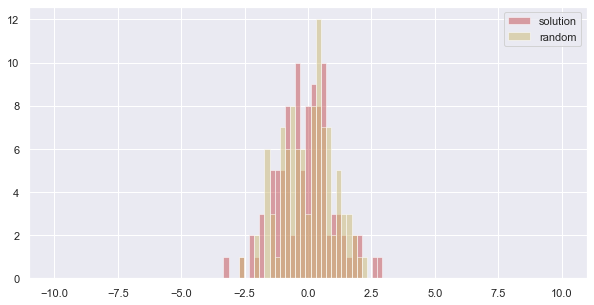

In [2]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [3]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: 0.16156024680491546, solution: 1.2448644980410049, reward: -40.970194
iter 2000. w: 1.2329710791050519, solution: 1.2448644980410049, reward: -0.007683
iter 3000. w: 1.247100605244873, solution: 1.2448644980410049, reward: -0.008552
iter 4000. w: 1.250307729225819, solution: 1.2448644980410049, reward: -0.007370
iter 5000. w: 1.2426627797922358, solution: 1.2448644980410049, reward: -0.009598


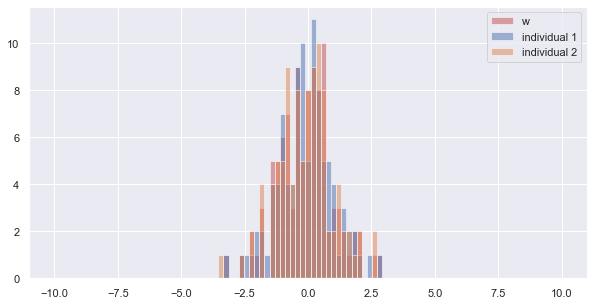

In [4]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [7]:
import pandas as pd
google = pd.read_csv('./../dataset/GOOG.csv')
google.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-10-02  959.979980  962.539978  947.840027  953.270020  953.270020   
1  2017-10-03  954.000000  958.000000  949.140015  957.789978  957.789978   
2  2017-10-04  957.000000  960.390015  950.690002  951.679993  951.679993   
3  2017-10-05  955.489990  970.909973  955.179993  969.960022  969.960022   
4  2017-10-06  966.700012  979.460022  963.359985  978.890015  978.890015   

    Volume  
0  1283400  
1   888300  
2   952400  
3  1213800  
4  1173900

In [8]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [9]:
close = google.Close.values.tolist()
get_state(close, 0, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
get_state(close, 1, 10)

array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 4.519958]])

In [11]:
get_state(close, 2, 10)

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  4.519958, -6.109985]])

In [12]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

In [13]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [14]:
window_size = 30
model = Model(window_size, 500, 3)

In [15]:
initial_money = 10000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 5
max_sell = 5


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])


for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell

    state = next_state
((initial_money - starting_money) / starting_money) * 100

1.8185009400000125

In [32]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        #print('sequence: {}'.format(sequence))
        decision, buy = self.model.predict(np.array(sequence))
        #print('decision: {}'.format(decision))
        print('buy: {}'.format(buy))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        #print('state: {}'.format(state))
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.show()

In [33]:
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 5,
    max_sell = 5,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [34]:
agent.fit(iterations = 500, checkpoint = 10)

buy: [[-9.54443315]]
buy: [[-21.87411446]]
buy: [[20.46535868]]
buy: [[12.0442688]]
buy: [[-132.10848604]]
buy: [[505.16546097]]
buy: [[-250.55596042]]
buy: [[586.70236206]]
buy: [[-1032.59522182]]
buy: [[1045.80998113]]
buy: [[-500.27760164]]
buy: [[697.58366529]]
buy: [[255.74093101]]
buy: [[1104.81088577]]
buy: [[-1361.11863069]]
buy: [[-64.82073463]]
buy: [[1195.50583079]]
buy: [[-327.62282351]]
buy: [[473.60692589]]
buy: [[-1322.88323376]]
buy: [[2525.73849211]]
buy: [[-12.89874847]]
buy: [[-13.59190838]]
buy: [[-20.92497654]]
buy: [[15.15760685]]
buy: [[24.58585115]]
buy: [[-120.45292494]]
buy: [[540.95037061]]
buy: [[-290.25802169]]
buy: [[546.58922033]]
buy: [[-968.65474227]]
buy: [[1038.74202622]]
buy: [[-588.19472056]]
buy: [[619.88931341]]
buy: [[334.03861059]]
buy: [[1160.51487725]]
buy: [[-1495.90948113]]
buy: [[-199.76332937]]
buy: [[1262.08853845]]
buy: [[-278.11976366]]
buy: [[406.75638066]]
buy: [[-1290.27354233]]
buy: [[2510.14092657]]
buy: [[189.97992422]]
buy: [[-9.

buy: [[1209.11480443]]
buy: [[-1455.73530526]]
buy: [[-118.84010847]]
buy: [[1587.06134022]]
buy: [[-420.10500905]]
buy: [[277.15638115]]
buy: [[-1409.25741582]]
buy: [[2521.03793924]]
buy: [[40.37671829]]
buy: [[-17.2342021]]
buy: [[-57.7206013]]
buy: [[65.00092221]]
buy: [[-135.41428202]]
buy: [[-126.78729165]]
buy: [[497.97608149]]
buy: [[-264.87358275]]
buy: [[462.98076966]]
buy: [[-1109.33582553]]
buy: [[801.2666406]]
buy: [[-431.82130868]]
buy: [[491.96162925]]
buy: [[60.26837803]]
buy: [[1138.63441308]]
buy: [[-1424.14084642]]
buy: [[-147.86457567]]
buy: [[1227.42365199]]
buy: [[-352.71184844]]
buy: [[477.68292815]]
buy: [[-1554.94099856]]
buy: [[2896.12289911]]
buy: [[91.94732809]]
buy: [[-18.52055444]]
buy: [[-29.5754113]]
buy: [[38.5384979]]
buy: [[-56.80805013]]
buy: [[9.30511667]]
buy: [[466.17859256]]
buy: [[-370.72008599]]
buy: [[572.84530934]]
buy: [[-835.05581328]]
buy: [[592.76793195]]
buy: [[-513.75649579]]
buy: [[615.17582103]]
buy: [[-23.25060861]]
buy: [[960.628188

buy: [[521.07556221]]
buy: [[60.02293167]]
buy: [[882.78701138]]
buy: [[-1541.56134165]]
buy: [[-300.0394818]]
buy: [[1306.41314055]]
buy: [[-495.20593367]]
buy: [[529.52664422]]
buy: [[-1580.89961516]]
buy: [[2588.72404129]]
buy: [[263.02585025]]
buy: [[-12.04259233]]
buy: [[-30.277443]]
buy: [[45.3664641]]
buy: [[-44.77289834]]
buy: [[-64.59718834]]
buy: [[545.77782308]]
buy: [[-320.99339555]]
buy: [[614.67533013]]
buy: [[-992.52003876]]
buy: [[783.81540231]]
buy: [[-422.93696934]]
buy: [[452.35161591]]
buy: [[73.74170949]]
buy: [[1096.07273776]]
buy: [[-1545.87701543]]
buy: [[-325.82518736]]
buy: [[1295.27900313]]
buy: [[-271.72834808]]
buy: [[481.07125687]]
buy: [[-1300.59115733]]
buy: [[2865.76502184]]
buy: [[16.31748214]]
buy: [[-16.87791282]]
buy: [[-64.14528774]]
buy: [[64.64167133]]
buy: [[-144.77629682]]
buy: [[-179.16431911]]
buy: [[509.83369653]]
buy: [[-238.46066222]]
buy: [[466.39232781]]
buy: [[-978.07789806]]
buy: [[559.60709981]]
buy: [[-498.41276941]]
buy: [[695.25561

buy: [[-1617.60538822]]
buy: [[-42.00014635]]
buy: [[1317.90137392]]
buy: [[-353.80680401]]
buy: [[416.17035664]]
buy: [[-1814.08866387]]
buy: [[2946.43924722]]
buy: [[220.45949123]]
buy: [[-13.26661958]]
buy: [[-39.909915]]
buy: [[68.32345664]]
buy: [[-95.55954714]]
buy: [[-81.29014534]]
buy: [[588.40339343]]
buy: [[-454.66832849]]
buy: [[249.9949747]]
buy: [[-1090.93334198]]
buy: [[721.80403917]]
buy: [[-556.44113795]]
buy: [[309.84690391]]
buy: [[-6.73568376]]
buy: [[1006.32669148]]
buy: [[-1600.59829136]]
buy: [[-272.89483125]]
buy: [[1311.78445232]]
buy: [[-258.56363575]]
buy: [[707.78352756]]
buy: [[-1161.97532023]]
buy: [[2999.07373076]]
buy: [[220.92193748]]
buy: [[-17.40167469]]
buy: [[-92.69944868]]
buy: [[133.12523604]]
buy: [[-303.74637487]]
buy: [[-122.88182996]]
buy: [[567.85139777]]
buy: [[-259.37259424]]
buy: [[229.05512582]]
buy: [[-942.64338843]]
buy: [[743.78389679]]
buy: [[-448.54458258]]
buy: [[453.26565019]]
buy: [[99.0513203]]
buy: [[1192.49609316]]
buy: [[-1603.

buy: [[-262.89755611]]
buy: [[279.53967141]]
buy: [[-1022.78053505]]
buy: [[787.67395568]]
buy: [[-641.223646]]
buy: [[353.12826149]]
buy: [[176.42925025]]
buy: [[916.33613109]]
buy: [[-1579.94602148]]
buy: [[-458.73818275]]
buy: [[1469.8071215]]
buy: [[-760.97654692]]
buy: [[628.97032637]]
buy: [[-1695.93326832]]
buy: [[3217.44360656]]
buy: [[855.72947536]]
buy: [[-12.74914419]]
buy: [[-43.10241754]]
buy: [[59.7845866]]
buy: [[-68.49363773]]
buy: [[-165.96814754]]
buy: [[669.86804988]]
buy: [[-368.30454677]]
buy: [[302.84672957]]
buy: [[-974.05357323]]
buy: [[793.71785448]]
buy: [[-803.19092959]]
buy: [[393.26363916]]
buy: [[172.70665311]]
buy: [[1003.16278325]]
buy: [[-1736.15021239]]
buy: [[-219.44017482]]
buy: [[1399.08338316]]
buy: [[-432.07396825]]
buy: [[572.03485592]]
buy: [[-1303.74143705]]
buy: [[2833.59570719]]
buy: [[363.27343218]]
buy: [[-11.7976664]]
buy: [[-54.05808679]]
buy: [[64.34421736]]
buy: [[-59.47673532]]
buy: [[-326.31857405]]
buy: [[868.03539432]]
buy: [[-443.2

buy: [[767.07866708]]
buy: [[-733.61985447]]
buy: [[562.57530534]]
buy: [[229.16536198]]
buy: [[696.89810088]]
buy: [[-1704.09273002]]
buy: [[-502.71842113]]
buy: [[1395.63861699]]
buy: [[-965.49711868]]
buy: [[544.39851537]]
buy: [[-1390.30217524]]
buy: [[3024.62164945]]
buy: [[1183.22113782]]
buy: [[-13.40830944]]
buy: [[-66.70392043]]
buy: [[73.48415165]]
buy: [[-111.74868683]]
buy: [[-337.85833123]]
buy: [[757.72831511]]
buy: [[-324.23831906]]
buy: [[69.98270467]]
buy: [[-1053.32157635]]
buy: [[937.5231721]]
buy: [[-651.33948974]]
buy: [[253.64707653]]
buy: [[357.22305068]]
buy: [[856.53154268]]
buy: [[-1495.26601358]]
buy: [[-249.88379052]]
buy: [[1691.30810216]]
buy: [[-566.10127542]]
buy: [[663.50028308]]
buy: [[-1495.45903773]]
buy: [[2638.06482344]]
buy: [[810.40954571]]
buy: [[-14.35020164]]
buy: [[-42.13620853]]
buy: [[53.24932716]]
buy: [[-4.9819477]]
buy: [[-232.50769256]]
buy: [[850.70542685]]
buy: [[-213.08794601]]
buy: [[230.99877292]]
buy: [[-1054.41208249]]
buy: [[987

buy: [[-64.98766621]]
buy: [[75.09249226]]
buy: [[-130.86183006]]
buy: [[-270.89426492]]
buy: [[695.96986307]]
buy: [[-372.77640709]]
buy: [[121.3039773]]
buy: [[-916.56275991]]
buy: [[784.58822741]]
buy: [[-622.20422147]]
buy: [[499.02299076]]
buy: [[302.94718716]]
buy: [[995.76975717]]
buy: [[-1597.53032386]]
buy: [[-259.64165339]]
buy: [[1555.73063168]]
buy: [[-547.96023021]]
buy: [[543.92262164]]
buy: [[-1407.6458176]]
buy: [[2678.03482825]]
buy: [[410.24373695]]
buy: [[-18.65204043]]
buy: [[-67.44780575]]
buy: [[60.71984846]]
buy: [[-127.11044725]]
buy: [[-297.9515968]]
buy: [[589.4453403]]
buy: [[-379.31937399]]
buy: [[-48.09250092]]
buy: [[-1155.80279263]]
buy: [[492.97315909]]
buy: [[-606.74533556]]
buy: [[229.44724445]]
buy: [[139.27917607]]
buy: [[864.28728933]]
buy: [[-1537.45902193]]
buy: [[-329.76877695]]
buy: [[1657.87174405]]
buy: [[-288.58576061]]
buy: [[483.02758264]]
buy: [[-1096.87740572]]
buy: [[2717.89953585]]
buy: [[529.59019454]]
buy: [[-19.64787857]]
buy: [[-95.

buy: [[-20.46468549]]
buy: [[-97.16321307]]
buy: [[146.74582854]]
buy: [[-261.50537649]]
buy: [[-189.74353985]]
buy: [[924.99689396]]
buy: [[-246.15949545]]
buy: [[78.64130446]]
buy: [[-816.43089444]]
buy: [[605.35140676]]
buy: [[-746.63320388]]
buy: [[528.41028663]]
buy: [[108.11229435]]
buy: [[592.24099102]]
buy: [[-1881.47163905]]
buy: [[-139.70107277]]
buy: [[1060.90712227]]
buy: [[-976.06388459]]
buy: [[587.0243964]]
buy: [[-1550.24524093]]
buy: [[3096.09017427]]
buy: [[1299.66633462]]
buy: [[-23.56375384]]
buy: [[-91.12431027]]
buy: [[96.60247098]]
buy: [[-184.34951941]]
buy: [[-329.10964106]]
buy: [[841.89930992]]
buy: [[-287.47536288]]
buy: [[39.48500104]]
buy: [[-931.52287666]]
buy: [[781.2935767]]
buy: [[-710.60996709]]
buy: [[620.25875961]]
buy: [[292.63573321]]
buy: [[663.76301147]]
buy: [[-1663.84932873]]
buy: [[-31.2896565]]
buy: [[1402.69314596]]
buy: [[-850.33608638]]
buy: [[574.88974698]]
buy: [[-1509.85546508]]
buy: [[2701.05102653]]
buy: [[873.11845313]]
buy: [[-20.5

buy: [[-295.5053261]]
buy: [[146.43674144]]
buy: [[-916.50251369]]
buy: [[646.37922877]]
buy: [[-494.14985828]]
buy: [[565.53865997]]
buy: [[355.11752612]]
buy: [[702.37161936]]
buy: [[-1441.13224229]]
buy: [[-23.73656752]]
buy: [[1655.35490589]]
buy: [[-938.29296449]]
buy: [[629.69638577]]
buy: [[-1667.45491129]]
buy: [[2412.9850638]]
buy: [[909.26805694]]
buy: [[-15.99329344]]
buy: [[-75.58989547]]
buy: [[24.474121]]
buy: [[-27.875446]]
buy: [[-597.61651179]]
buy: [[795.82552753]]
buy: [[-155.28982756]]
buy: [[220.31068964]]
buy: [[-1120.65580978]]
buy: [[725.87038397]]
buy: [[-496.85926128]]
buy: [[447.23470444]]
buy: [[197.87118674]]
buy: [[556.93465702]]
buy: [[-1265.29402005]]
buy: [[-329.95744573]]
buy: [[1754.44229788]]
buy: [[-1210.91033683]]
buy: [[609.77210886]]
buy: [[-1416.09124852]]
buy: [[1944.74326968]]
buy: [[1535.54187563]]
buy: [[-20.08418175]]
buy: [[-107.38263154]]
buy: [[63.77799271]]
buy: [[-127.48336546]]
buy: [[-669.49480013]]
buy: [[913.59765408]]
buy: [[-112.

buy: [[62.48887651]]
buy: [[-123.0896733]]
buy: [[-652.37426388]]
buy: [[905.59880639]]
buy: [[-131.10830483]]
buy: [[122.03017883]]
buy: [[-1061.19553506]]
buy: [[869.15005873]]
buy: [[-484.73282344]]
buy: [[633.65668546]]
buy: [[205.92610812]]
buy: [[762.65465219]]
buy: [[-1142.37576609]]
buy: [[-352.90145083]]
buy: [[1734.30045447]]
buy: [[-1073.87896565]]
buy: [[573.65585569]]
buy: [[-1731.77308673]]
buy: [[2188.71035211]]
buy: [[1456.13171304]]
buy: [[-15.12609889]]
buy: [[-78.18334994]]
buy: [[51.70744406]]
buy: [[-81.82186032]]
buy: [[-513.97439723]]
buy: [[819.39834736]]
buy: [[-227.27691925]]
buy: [[163.85353188]]
buy: [[-917.82626364]]
buy: [[721.68513256]]
buy: [[-523.5061172]]
buy: [[527.58350538]]
buy: [[334.299634]]
buy: [[470.71057271]]
buy: [[-1254.93038008]]
buy: [[-227.24052351]]
buy: [[1660.5008635]]
buy: [[-1134.88711648]]
buy: [[712.81516184]]
buy: [[-1513.41420159]]
buy: [[2061.83362876]]
buy: [[1352.11473758]]
buy: [[-20.59773421]]
buy: [[-92.59874025]]
buy: [[47

buy: [[-963.76401622]]
buy: [[669.86096624]]
buy: [[-551.33346101]]
buy: [[404.60708006]]
buy: [[189.98385479]]
buy: [[377.15996932]]
buy: [[-1523.7168676]]
buy: [[-233.54364974]]
buy: [[1481.16833822]]
buy: [[-1306.79217338]]
buy: [[740.35903917]]
buy: [[-1404.69457698]]
buy: [[2327.39980568]]
buy: [[1813.31151641]]
buy: [[-23.32320993]]
buy: [[-97.58276426]]
buy: [[36.86991557]]
buy: [[-73.11613016]]
buy: [[-710.7383526]]
buy: [[917.77535703]]
buy: [[-279.30741903]]
buy: [[-63.6131201]]
buy: [[-1197.30309517]]
buy: [[707.18223963]]
buy: [[-751.54392752]]
buy: [[495.08051299]]
buy: [[189.02526337]]
buy: [[344.77026857]]
buy: [[-1576.8554291]]
buy: [[-270.66754943]]
buy: [[1937.58461121]]
buy: [[-1355.85425527]]
buy: [[635.7031735]]
buy: [[-1437.35832663]]
buy: [[2060.51886937]]
buy: [[1720.0008308]]
buy: [[-20.97919167]]
buy: [[-118.43173591]]
buy: [[81.35834738]]
buy: [[-160.98701953]]
buy: [[-727.05416972]]
buy: [[1024.77056527]]
buy: [[-197.97703457]]
buy: [[-65.80592466]]
buy: [[-

buy: [[-92.12737724]]
buy: [[35.35522439]]
buy: [[-74.45576258]]
buy: [[-524.32414979]]
buy: [[834.75708203]]
buy: [[-87.88538892]]
buy: [[27.696775]]
buy: [[-897.72082309]]
buy: [[833.15976473]]
buy: [[-471.60168636]]
buy: [[361.97492922]]
buy: [[500.75645298]]
buy: [[343.04741469]]
buy: [[-1595.42656643]]
buy: [[-306.09999106]]
buy: [[1649.11011254]]
buy: [[-1525.04926548]]
buy: [[302.94176254]]
buy: [[-1444.15586784]]
buy: [[2102.05630949]]
buy: [[1447.03053358]]
buy: [[-30.34172332]]
buy: [[-112.96447358]]
buy: [[38.75820021]]
buy: [[-117.45989603]]
buy: [[-694.69784626]]
buy: [[839.85078138]]
buy: [[-115.13636807]]
buy: [[10.96689182]]
buy: [[-1098.89335097]]
buy: [[709.64247491]]
buy: [[-506.75058414]]
buy: [[261.73390826]]
buy: [[310.56529397]]
buy: [[251.81405169]]
buy: [[-1473.03652916]]
buy: [[-218.61215739]]
buy: [[1888.92601537]]
buy: [[-1535.04815599]]
buy: [[588.9908734]]
buy: [[-1576.99548359]]
buy: [[2132.07678819]]
buy: [[1782.43210853]]
buy: [[-30.61073607]]
buy: [[-1

buy: [[-301.55241999]]
buy: [[378.95876866]]
buy: [[492.00823824]]
buy: [[138.53354453]]
buy: [[-1424.9930818]]
buy: [[-128.65695519]]
buy: [[1332.2687257]]
buy: [[-1476.58579658]]
buy: [[293.64925887]]
buy: [[-1629.18884476]]
buy: [[2250.41529683]]
buy: [[1840.57786734]]
buy: [[-19.27473691]]
buy: [[-102.50879872]]
buy: [[64.07941239]]
buy: [[-134.26948886]]
buy: [[-589.24915292]]
buy: [[819.55081013]]
buy: [[-16.4118704]]
buy: [[106.35012928]]
buy: [[-983.7857267]]
buy: [[557.76155948]]
buy: [[-401.9528651]]
buy: [[365.15377524]]
buy: [[461.83386396]]
buy: [[81.46018059]]
buy: [[-1465.33215803]]
buy: [[-242.90786376]]
buy: [[1596.82825808]]
buy: [[-1703.82653679]]
buy: [[514.38835018]]
buy: [[-1800.43234467]]
buy: [[2143.49711815]]
buy: [[1694.27062243]]
buy: [[-21.87037074]]
buy: [[-103.48528496]]
buy: [[81.3955664]]
buy: [[-178.12845477]]
buy: [[-499.76900039]]
buy: [[792.76840027]]
buy: [[-120.16212449]]
buy: [[-65.89566994]]
buy: [[-902.89621107]]
buy: [[566.78636571]]
buy: [[-40

buy: [[40.13030926]]
buy: [[-556.16765587]]
buy: [[864.22887818]]
buy: [[-79.18752705]]
buy: [[85.62459071]]
buy: [[-1053.44107414]]
buy: [[769.05932469]]
buy: [[-376.07263249]]
buy: [[427.22473289]]
buy: [[195.10391691]]
buy: [[227.44417859]]
buy: [[-1365.00258311]]
buy: [[-414.44581495]]
buy: [[1501.24722272]]
buy: [[-1331.44491067]]
buy: [[369.47421137]]
buy: [[-1352.64279259]]
buy: [[2294.94577665]]
buy: [[1796.16841957]]
buy: [[-21.74045045]]
buy: [[-87.70163375]]
buy: [[55.23803806]]
buy: [[-92.85198153]]
buy: [[-471.58025956]]
buy: [[806.41039148]]
buy: [[47.93362613]]
buy: [[117.10991531]]
buy: [[-776.6007509]]
buy: [[577.83646376]]
buy: [[-122.31077794]]
buy: [[362.26593146]]
buy: [[518.31104766]]
buy: [[47.53101075]]
buy: [[-1396.51348701]]
buy: [[-331.52865547]]
buy: [[1613.12019208]]
buy: [[-1645.64580472]]
buy: [[156.14139277]]
buy: [[-1394.02736896]]
buy: [[2094.2741769]]
buy: [[1614.18577694]]
buy: [[-19.56427817]]
buy: [[-91.81501229]]
buy: [[69.91087261]]
buy: [[-119.3

buy: [[-262.01206533]]
buy: [[411.8579943]]
buy: [[447.72007561]]
buy: [[371.54576259]]
buy: [[-1386.6412546]]
buy: [[-94.40785709]]
buy: [[1722.57788645]]
buy: [[-1349.64229542]]
buy: [[112.05042474]]
buy: [[-1950.80200005]]
buy: [[2222.73312269]]
buy: [[1368.63173648]]
buy: [[-23.02639756]]
buy: [[-65.87769574]]
buy: [[30.42838264]]
buy: [[-45.65782317]]
buy: [[-372.88429988]]
buy: [[712.92732527]]
buy: [[-221.44403508]]
buy: [[286.92545795]]
buy: [[-981.66728824]]
buy: [[358.15295069]]
buy: [[-262.53069178]]
buy: [[377.27288154]]
buy: [[225.7866165]]
buy: [[236.28707263]]
buy: [[-1340.89650575]]
buy: [[-350.97840698]]
buy: [[1537.68695056]]
buy: [[-1188.1976983]]
buy: [[341.50341169]]
buy: [[-1490.30171799]]
buy: [[2396.27227045]]
buy: [[1251.89933901]]
buy: [[-12.93926311]]
buy: [[-89.06365265]]
buy: [[62.78833019]]
buy: [[-145.46539831]]
buy: [[-474.80629196]]
buy: [[632.03384237]]
buy: [[-27.55919422]]
buy: [[305.27118241]]
buy: [[-933.70060041]]
buy: [[364.36445484]]
buy: [[-155

buy: [[60.92621199]]
buy: [[-754.3412502]]
buy: [[519.92933387]]
buy: [[46.68325226]]
buy: [[322.48126726]]
buy: [[436.86182531]]
buy: [[504.81167706]]
buy: [[-1400.29711236]]
buy: [[-81.88793994]]
buy: [[1468.42218382]]
buy: [[-1482.30601975]]
buy: [[-144.9393756]]
buy: [[-2228.62679017]]
buy: [[2153.65240819]]
buy: [[1519.22552669]]
buy: [[-13.41190932]]
buy: [[-105.79833965]]
buy: [[89.20117904]]
buy: [[-185.99549162]]
buy: [[-543.90664857]]
buy: [[804.03606403]]
buy: [[24.40214067]]
buy: [[191.21250507]]
buy: [[-778.33293219]]
buy: [[558.46287373]]
buy: [[-191.17592753]]
buy: [[381.91673859]]
buy: [[483.11954263]]
buy: [[418.95286579]]
buy: [[-1382.51033582]]
buy: [[-140.90804188]]
buy: [[1655.63239368]]
buy: [[-1447.95423209]]
buy: [[125.07478948]]
buy: [[-1837.85827053]]
buy: [[2004.61946896]]
buy: [[1407.93556724]]
buy: [[-19.30662685]]
buy: [[-128.02046802]]
buy: [[111.73503467]]
buy: [[-291.23887631]]
buy: [[-492.19643809]]
buy: [[678.30710291]]
buy: [[109.78069368]]
buy: [[18

buy: [[-349.73098292]]
buy: [[1551.81468216]]
buy: [[-1406.64848688]]
buy: [[44.27127079]]
buy: [[-1687.86598253]]
buy: [[1544.05471942]]
buy: [[1410.85270683]]
buy: [[-15.88163615]]
buy: [[-131.47217023]]
buy: [[112.05665314]]
buy: [[-306.78801369]]
buy: [[-561.58309213]]
buy: [[666.31257387]]
buy: [[27.71893222]]
buy: [[160.75224105]]
buy: [[-604.94766518]]
buy: [[350.15640017]]
buy: [[-50.97626424]]
buy: [[520.56416]]
buy: [[536.42355028]]
buy: [[400.94810238]]
buy: [[-1058.05469719]]
buy: [[-124.5851316]]
buy: [[1471.07991403]]
buy: [[-1411.70192508]]
buy: [[132.69625335]]
buy: [[-2369.41609758]]
buy: [[1841.83960352]]
buy: [[1105.74885818]]
buy: [[-19.56857849]]
buy: [[-123.09387697]]
buy: [[85.70451586]]
buy: [[-235.3115981]]
buy: [[-600.90994198]]
buy: [[729.61419071]]
buy: [[13.70620282]]
buy: [[173.14002944]]
buy: [[-654.76004006]]
buy: [[461.2951935]]
buy: [[-179.84768179]]
buy: [[504.94474478]]
buy: [[638.57852996]]
buy: [[365.81458937]]
buy: [[-1333.43643858]]
buy: [[-64.79

buy: [[233.32414443]]
buy: [[-1014.50673671]]
buy: [[-151.72838841]]
buy: [[1596.6271982]]
buy: [[-1648.66016739]]
buy: [[95.82791054]]
buy: [[-1977.77382453]]
buy: [[1724.36625997]]
buy: [[1624.31641662]]
buy: [[-20.62249667]]
buy: [[-111.92329218]]
buy: [[98.19753476]]
buy: [[-212.37127106]]
buy: [[-453.17607007]]
buy: [[803.60155172]]
buy: [[167.20022074]]
buy: [[158.18435879]]
buy: [[-444.26605762]]
buy: [[643.25133987]]
buy: [[11.13180539]]
buy: [[423.1490739]]
buy: [[783.02179073]]
buy: [[496.47059007]]
buy: [[-1254.83892781]]
buy: [[-79.21474228]]
buy: [[1305.33437813]]
buy: [[-1483.31270787]]
buy: [[-203.68100568]]
buy: [[-1747.0859569]]
buy: [[1839.26699817]]
buy: [[1269.02833747]]
buy: [[-15.43513863]]
buy: [[-122.10654705]]
buy: [[88.91827894]]
buy: [[-227.76113538]]
buy: [[-649.40607924]]
buy: [[772.86585951]]
buy: [[43.40129278]]
buy: [[51.68003938]]
buy: [[-493.35544126]]
buy: [[602.23626765]]
buy: [[-207.65369854]]
buy: [[451.33154484]]
buy: [[868.07630377]]
buy: [[384.2

buy: [[-1576.44391138]]
buy: [[-100.4557094]]
buy: [[-1576.48098367]]
buy: [[1604.82132401]]
buy: [[1002.47878242]]
buy: [[-10.95322901]]
buy: [[-104.84611095]]
buy: [[67.76912872]]
buy: [[-165.08389213]]
buy: [[-632.8737688]]
buy: [[667.26949873]]
buy: [[136.02438372]]
buy: [[-68.30266732]]
buy: [[-610.47508904]]
buy: [[344.01741999]]
buy: [[69.49367508]]
buy: [[230.50871936]]
buy: [[784.47136597]]
buy: [[238.60448332]]
buy: [[-914.37394013]]
buy: [[-512.85500466]]
buy: [[1624.5857861]]
buy: [[-1504.32015735]]
buy: [[-34.07819257]]
buy: [[-1563.04644757]]
buy: [[1453.68337834]]
buy: [[1353.71677672]]
buy: [[-11.11988277]]
buy: [[-125.60811076]]
buy: [[104.34347469]]
buy: [[-265.26225764]]
buy: [[-580.6872676]]
buy: [[655.83201771]]
buy: [[264.26074585]]
buy: [[177.91485314]]
buy: [[-567.79035942]]
buy: [[231.6707584]]
buy: [[190.53889233]]
buy: [[355.63388753]]
buy: [[689.21935672]]
buy: [[271.68953156]]
buy: [[-1025.04936413]]
buy: [[-238.94562476]]
buy: [[1390.77864938]]
buy: [[-168

buy: [[1360.99048261]]
buy: [[1730.07005438]]
buy: [[-18.20602951]]
buy: [[-111.09336067]]
buy: [[38.19211432]]
buy: [[-118.13167726]]
buy: [[-757.45052213]]
buy: [[698.44325999]]
buy: [[199.49810166]]
buy: [[-171.98349078]]
buy: [[-639.89900637]]
buy: [[425.43454087]]
buy: [[23.07176556]]
buy: [[179.69743708]]
buy: [[997.9954888]]
buy: [[212.1910894]]
buy: [[-767.66778768]]
buy: [[-524.06016866]]
buy: [[1709.38501899]]
buy: [[-1461.90039076]]
buy: [[210.75516899]]
buy: [[-1582.7837042]]
buy: [[1125.02279122]]
buy: [[1963.27655709]]
buy: [[-11.64737937]]
buy: [[-103.67029509]]
buy: [[64.63037971]]
buy: [[-143.70371144]]
buy: [[-623.68841001]]
buy: [[674.13489918]]
buy: [[300.92662477]]
buy: [[-101.73885893]]
buy: [[-615.29716497]]
buy: [[408.79509856]]
buy: [[180.66744809]]
buy: [[154.55539789]]
buy: [[916.0983503]]
buy: [[315.22198212]]
buy: [[-1094.73693308]]
buy: [[-507.71476481]]
buy: [[1689.09455688]]
buy: [[-1561.90431999]]
buy: [[-233.07846385]]
buy: [[-1393.39955886]]
buy: [[14

buy: [[-1532.77417084]]
buy: [[-6.9475788]]
buy: [[-1479.36165183]]
buy: [[986.98749765]]
buy: [[1702.15164139]]
buy: [[-13.36457672]]
buy: [[-109.23731276]]
buy: [[63.38893719]]
buy: [[-149.91010156]]
buy: [[-691.24778643]]
buy: [[749.87945566]]
buy: [[133.3878463]]
buy: [[-75.74324352]]
buy: [[-630.80582765]]
buy: [[332.39902829]]
buy: [[102.61369353]]
buy: [[229.00206994]]
buy: [[763.96179191]]
buy: [[458.49983851]]
buy: [[-991.60118903]]
buy: [[-457.22969844]]
buy: [[1762.26176096]]
buy: [[-1468.7651471]]
buy: [[-51.16849411]]
buy: [[-1488.76833034]]
buy: [[1375.30596608]]
buy: [[1749.66106815]]
iter 30. reward: 2.148104
buy: [[-16.24261322]]
buy: [[-105.55991728]]
buy: [[64.98103446]]
buy: [[-151.69691236]]
buy: [[-607.98818511]]
buy: [[748.45924827]]
buy: [[115.9831587]]
buy: [[47.71665481]]
buy: [[-550.60014752]]
buy: [[330.94728536]]
buy: [[195.6831392]]
buy: [[265.26556118]]
buy: [[772.03305519]]
buy: [[612.72765506]]
buy: [[-909.31700013]]
buy: [[-507.44141759]]
buy: [[1707.2

buy: [[-625.63346797]]
buy: [[187.14549099]]
buy: [[241.78850919]]
buy: [[69.2161578]]
buy: [[784.57206895]]
buy: [[404.43744573]]
buy: [[-974.87293885]]
buy: [[-601.15044427]]
buy: [[1801.0636199]]
buy: [[-1172.53387555]]
buy: [[-199.26987345]]
buy: [[-1101.58010077]]
buy: [[1483.92559483]]
buy: [[1658.97904641]]
buy: [[-8.51787566]]
buy: [[-127.63607154]]
buy: [[113.04919077]]
buy: [[-249.87115165]]
buy: [[-680.12066621]]
buy: [[817.75811531]]
buy: [[184.39190091]]
buy: [[-88.32798411]]
buy: [[-610.86725496]]
buy: [[441.36274814]]
buy: [[189.98843638]]
buy: [[390.93693125]]
buy: [[736.93494304]]
buy: [[408.98931559]]
buy: [[-1076.2704581]]
buy: [[-262.70620417]]
buy: [[1648.96542709]]
buy: [[-1622.60307246]]
buy: [[-1.65593318]]
buy: [[-1906.44517018]]
buy: [[1436.11497373]]
buy: [[1712.45480681]]
buy: [[-8.69451343]]
buy: [[-122.46277435]]
buy: [[112.03961173]]
buy: [[-252.25533392]]
buy: [[-610.53551966]]
buy: [[698.27330629]]
buy: [[292.14517181]]
buy: [[-316.74801344]]
buy: [[-51

buy: [[507.99613087]]
buy: [[-1257.49875019]]
buy: [[-152.62445659]]
buy: [[1482.57242309]]
buy: [[-1571.16478601]]
buy: [[-172.13778126]]
buy: [[-1347.24494093]]
buy: [[1426.86649192]]
buy: [[1710.29693377]]
buy: [[-12.35952423]]
buy: [[-129.81657865]]
buy: [[128.3487597]]
buy: [[-280.26734685]]
buy: [[-588.77595711]]
buy: [[790.35100482]]
buy: [[264.54889571]]
buy: [[-381.90531734]]
buy: [[-411.08988045]]
buy: [[358.96300211]]
buy: [[287.83044382]]
buy: [[119.80144915]]
buy: [[924.79596041]]
buy: [[299.66668273]]
buy: [[-997.70270729]]
buy: [[-300.8905918]]
buy: [[1380.00628655]]
buy: [[-1389.74149811]]
buy: [[-240.53831567]]
buy: [[-1636.12545593]]
buy: [[1380.20368306]]
buy: [[1893.17442094]]
buy: [[-11.6636073]]
buy: [[-106.43482555]]
buy: [[79.42426798]]
buy: [[-143.9672568]]
buy: [[-621.64075031]]
buy: [[788.45976957]]
buy: [[344.59153565]]
buy: [[-173.45720125]]
buy: [[-712.87986635]]
buy: [[482.16647185]]
buy: [[250.68069992]]
buy: [[43.31565784]]
buy: [[853.70183976]]
buy: [[

buy: [[1381.84881883]]
buy: [[2235.43805743]]
buy: [[-14.24205175]]
buy: [[-90.91953926]]
buy: [[40.74166851]]
buy: [[-48.67924512]]
buy: [[-710.18516538]]
buy: [[851.00525262]]
buy: [[129.88667296]]
buy: [[-370.28790299]]
buy: [[-745.89094039]]
buy: [[462.9179808]]
buy: [[-104.01685855]]
buy: [[-2.14965162]]
buy: [[917.78276448]]
buy: [[290.62683673]]
buy: [[-1279.2098623]]
buy: [[-651.37177717]]
buy: [[1735.0710168]]
buy: [[-1470.09661645]]
buy: [[-151.30165403]]
buy: [[-856.31939635]]
buy: [[1287.15703888]]
buy: [[1877.50974028]]
buy: [[-16.39863924]]
buy: [[-127.60340136]]
buy: [[79.25881635]]
buy: [[-183.69293887]]
buy: [[-764.70277626]]
buy: [[800.08201838]]
buy: [[324.23750108]]
buy: [[-414.90593167]]
buy: [[-673.23862605]]
buy: [[405.76599777]]
buy: [[131.53845165]]
buy: [[-10.33748932]]
buy: [[1104.24858982]]
buy: [[328.82234046]]
buy: [[-1264.4234072]]
buy: [[-580.03677388]]
buy: [[1930.28804792]]
buy: [[-1520.36254232]]
buy: [[-309.44761049]]
buy: [[-1173.32354814]]
buy: [[1

buy: [[-275.10729106]]
buy: [[-468.60429308]]
buy: [[611.39971794]]
buy: [[148.68618841]]
buy: [[78.40140954]]
buy: [[1026.40756699]]
buy: [[388.45316779]]
buy: [[-1391.8667854]]
buy: [[-618.32491706]]
buy: [[1448.52032777]]
buy: [[-1716.6164885]]
buy: [[-299.42512282]]
buy: [[-969.41127898]]
buy: [[1739.4863882]]
buy: [[2114.27419765]]
buy: [[-19.72480198]]
buy: [[-112.80132358]]
buy: [[88.10824179]]
buy: [[-150.58261341]]
buy: [[-589.86263757]]
buy: [[877.84607751]]
buy: [[365.78121631]]
buy: [[-441.35139533]]
buy: [[-675.7379478]]
buy: [[348.64550826]]
buy: [[143.04013581]]
buy: [[-111.13940449]]
buy: [[1072.20746636]]
buy: [[275.37036462]]
buy: [[-1381.96074349]]
buy: [[-674.7588011]]
buy: [[1748.32864879]]
buy: [[-1644.83222421]]
buy: [[-305.54451295]]
buy: [[-637.52165612]]
buy: [[1524.53786923]]
buy: [[2018.02927256]]
buy: [[-11.94566135]]
buy: [[-98.88654985]]
buy: [[71.25953557]]
buy: [[-80.85474928]]
buy: [[-675.68277561]]
buy: [[957.14564346]]
buy: [[312.51103649]]
buy: [[-3

buy: [[-205.67568902]]
buy: [[-964.27653156]]
buy: [[1550.69323739]]
buy: [[2265.14524565]]
buy: [[-13.19159484]]
buy: [[-144.18326166]]
buy: [[124.08644465]]
buy: [[-238.17036084]]
buy: [[-813.6027532]]
buy: [[1005.83621234]]
buy: [[369.98838758]]
buy: [[-607.72080007]]
buy: [[-854.29885785]]
buy: [[612.76040144]]
buy: [[15.60564247]]
buy: [[10.42853804]]
buy: [[827.87252768]]
buy: [[572.12926855]]
buy: [[-1242.90780624]]
buy: [[-363.01837474]]
buy: [[1585.46734949]]
buy: [[-1475.6394676]]
buy: [[-154.67857749]]
buy: [[-1138.06261599]]
buy: [[1580.67817496]]
buy: [[2230.33655002]]
buy: [[-20.07847157]]
buy: [[-159.36054652]]
buy: [[138.25691337]]
buy: [[-313.56254316]]
buy: [[-766.88018938]]
buy: [[985.89767028]]
buy: [[286.28754438]]
buy: [[-477.57215851]]
buy: [[-557.64984304]]
buy: [[507.91071003]]
buy: [[35.9838962]]
buy: [[62.48007789]]
buy: [[1119.1022218]]
buy: [[499.18611826]]
buy: [[-1259.18349077]]
buy: [[-406.60855934]]
buy: [[1625.17877013]]
buy: [[-1678.30759434]]
buy: [[

buy: [[847.01255938]]
buy: [[687.86179751]]
buy: [[-1098.88642729]]
buy: [[-680.7548824]]
buy: [[1652.26610121]]
buy: [[-1528.70322605]]
buy: [[-157.02091589]]
buy: [[-981.07184395]]
buy: [[1582.47335254]]
buy: [[2478.62002781]]
buy: [[-16.19462285]]
buy: [[-118.47748619]]
buy: [[71.96841133]]
buy: [[-104.84625295]]
buy: [[-840.82009821]]
buy: [[1066.00452533]]
buy: [[228.62022958]]
buy: [[-452.62338008]]
buy: [[-751.91785124]]
buy: [[839.47545242]]
buy: [[35.03214636]]
buy: [[-219.54077439]]
buy: [[956.92863494]]
buy: [[602.47992878]]
buy: [[-944.61210838]]
buy: [[-859.25597236]]
buy: [[1949.33241814]]
buy: [[-1676.95212598]]
buy: [[-35.57585116]]
buy: [[-1134.66324236]]
buy: [[1471.19005618]]
buy: [[2288.24953422]]
buy: [[-10.83394995]]
buy: [[-130.50725451]]
buy: [[79.53944239]]
buy: [[-145.17791578]]
buy: [[-909.7792243]]
buy: [[984.62540569]]
buy: [[348.62244585]]
buy: [[-268.85380286]]
buy: [[-964.01599911]]
buy: [[744.13214726]]
buy: [[170.10483371]]
buy: [[-88.32511469]]
buy: [

buy: [[116.39705406]]
buy: [[-77.91290439]]
buy: [[988.25243533]]
buy: [[552.87747323]]
buy: [[-957.6180357]]
buy: [[-844.54761927]]
buy: [[2163.00282457]]
buy: [[-1633.7897425]]
buy: [[-40.05788854]]
buy: [[-821.56089651]]
buy: [[962.77914455]]
buy: [[2717.64636715]]
buy: [[-14.33959509]]
buy: [[-124.70110132]]
buy: [[60.40160751]]
buy: [[-110.48506944]]
buy: [[-940.99235962]]
buy: [[984.60942808]]
buy: [[249.81524149]]
buy: [[-513.69364057]]
buy: [[-767.24447804]]
buy: [[658.38899276]]
buy: [[-24.78705959]]
buy: [[-199.76545502]]
buy: [[1101.61323287]]
buy: [[451.76392365]]
buy: [[-932.47567256]]
buy: [[-748.48495791]]
buy: [[2107.13683708]]
buy: [[-1608.18607971]]
buy: [[-9.13348764]]
buy: [[-1023.35537779]]
buy: [[1065.16479656]]
buy: [[2482.35772106]]
iter 40. reward: 2.264304
buy: [[-8.07146805]]
buy: [[-126.57330394]]
buy: [[81.41423652]]
buy: [[-159.35056184]]
buy: [[-891.70988164]]
buy: [[911.00254649]]
buy: [[314.64374083]]
buy: [[-468.81818108]]
buy: [[-693.72064328]]
buy: [

buy: [[-1032.31575657]]
buy: [[812.10974882]]
buy: [[426.21601419]]
buy: [[-564.13066648]]
buy: [[-950.294332]]
buy: [[397.71171538]]
buy: [[-22.50584725]]
buy: [[-315.52720661]]
buy: [[1110.69219923]]
buy: [[256.58482659]]
buy: [[-799.56999364]]
buy: [[-652.99905623]]
buy: [[2141.85588637]]
buy: [[-1619.31347468]]
buy: [[-117.78555949]]
buy: [[-670.34164071]]
buy: [[593.5601984]]
buy: [[2602.32213091]]
buy: [[-12.89903437]]
buy: [[-114.72992979]]
buy: [[65.65263123]]
buy: [[-103.70885826]]
buy: [[-831.96242361]]
buy: [[898.37723314]]
buy: [[370.02563915]]
buy: [[-733.7632183]]
buy: [[-743.10122674]]
buy: [[469.88635606]]
buy: [[80.03309204]]
buy: [[-353.10754658]]
buy: [[1284.6574746]]
buy: [[281.00981236]]
buy: [[-915.0512003]]
buy: [[-717.36332147]]
buy: [[2019.49932258]]
buy: [[-1320.26276977]]
buy: [[-144.67962044]]
buy: [[-675.51196652]]
buy: [[1084.1224805]]
buy: [[2496.20238181]]
buy: [[-11.54339722]]
buy: [[-105.15113239]]
buy: [[24.63050404]]
buy: [[-12.11703257]]
buy: [[-964

buy: [[-1059.94922011]]
buy: [[1029.73757272]]
buy: [[90.8780367]]
buy: [[-581.22778116]]
buy: [[-972.81748569]]
buy: [[539.71942632]]
buy: [[-436.13992607]]
buy: [[-337.6063034]]
buy: [[1109.2838645]]
buy: [[183.12316962]]
buy: [[-857.71374947]]
buy: [[-845.92726733]]
buy: [[2250.40603965]]
buy: [[-1908.38273473]]
buy: [[434.99422736]]
buy: [[-819.34561871]]
buy: [[986.11920884]]
buy: [[2501.90490706]]
buy: [[-10.32148238]]
buy: [[-119.38479944]]
buy: [[35.27052106]]
buy: [[-80.47469302]]
buy: [[-1015.89831036]]
buy: [[841.81487183]]
buy: [[235.70040155]]
buy: [[-490.06625695]]
buy: [[-1051.90362967]]
buy: [[385.5106612]]
buy: [[-24.97056494]]
buy: [[-385.26950955]]
buy: [[1054.11037813]]
buy: [[444.20844257]]
buy: [[-699.15441335]]
buy: [[-834.08583844]]
buy: [[2276.30836318]]
buy: [[-1419.91806299]]
buy: [[94.39004324]]
buy: [[-781.54969828]]
buy: [[844.40142396]]
buy: [[2442.32184435]]
buy: [[-12.84567947]]
buy: [[-123.88217172]]
buy: [[51.36992568]]
buy: [[-95.07021584]]
buy: [[-9

buy: [[-11.69093688]]
buy: [[-127.10682491]]
buy: [[75.88197427]]
buy: [[-107.9414184]]
buy: [[-942.73058583]]
buy: [[1100.00290266]]
buy: [[287.6202907]]
buy: [[-394.25099818]]
buy: [[-1055.63585376]]
buy: [[381.86480064]]
buy: [[-64.07283162]]
buy: [[36.28499807]]
buy: [[870.33415751]]
buy: [[414.19037053]]
buy: [[-693.06155441]]
buy: [[-659.78451562]]
buy: [[2032.8598216]]
buy: [[-1618.04105537]]
buy: [[239.04817312]]
buy: [[-1071.5942439]]
buy: [[1448.15130185]]
buy: [[2906.96138581]]
buy: [[-15.74010425]]
buy: [[-135.13254843]]
buy: [[88.97421635]]
buy: [[-156.3640241]]
buy: [[-915.41674662]]
buy: [[1119.36077247]]
buy: [[176.72794719]]
buy: [[-479.72368537]]
buy: [[-783.54832796]]
buy: [[337.47731885]]
buy: [[-163.10226466]]
buy: [[-73.87965973]]
buy: [[1064.69783004]]
buy: [[506.46858303]]
buy: [[-605.12007854]]
buy: [[-731.60941147]]
buy: [[2314.12187038]]
buy: [[-1616.83074399]]
buy: [[271.12007034]]
buy: [[-1175.39533739]]
buy: [[1533.77883593]]
buy: [[2781.93339521]]
buy: [[

buy: [[-1858.44161677]]
buy: [[71.42961091]]
buy: [[-654.40615686]]
buy: [[979.02011157]]
buy: [[3379.63317788]]
buy: [[-3.10243493]]
buy: [[-113.47054771]]
buy: [[66.08200316]]
buy: [[-79.97466619]]
buy: [[-954.15970734]]
buy: [[1016.44364068]]
buy: [[299.74898754]]
buy: [[-445.09179794]]
buy: [[-891.71742199]]
buy: [[444.40419277]]
buy: [[36.13994529]]
buy: [[-182.92160456]]
buy: [[1024.82329513]]
buy: [[387.84073292]]
buy: [[-669.12943766]]
buy: [[-625.99861306]]
buy: [[2268.29713035]]
buy: [[-1688.58163923]]
buy: [[56.30431311]]
buy: [[-923.91875312]]
buy: [[913.01146684]]
buy: [[2916.88987145]]
buy: [[-8.57626591]]
buy: [[-96.34867445]]
buy: [[65.41320079]]
buy: [[-53.71840973]]
buy: [[-776.36368]]
buy: [[1056.17121385]]
buy: [[139.58081263]]
buy: [[-377.42848854]]
buy: [[-786.86023087]]
buy: [[523.23454675]]
buy: [[128.51589312]]
buy: [[-73.35922264]]
buy: [[1112.62627138]]
buy: [[477.09611634]]
buy: [[-598.80545772]]
buy: [[-854.53208018]]
buy: [[2365.97601708]]
buy: [[-1651.986

buy: [[-1031.72195384]]
buy: [[1109.9457918]]
buy: [[395.99143971]]
buy: [[-595.20838619]]
buy: [[-1037.16743114]]
buy: [[649.0056823]]
buy: [[-117.10769139]]
buy: [[-448.36509642]]
buy: [[1280.16885524]]
buy: [[418.52924915]]
buy: [[-846.76084937]]
buy: [[-743.70817552]]
buy: [[2461.37901422]]
buy: [[-1910.1421151]]
buy: [[93.9287051]]
buy: [[-354.3316078]]
buy: [[649.97529136]]
buy: [[3053.33678835]]
buy: [[-10.73619272]]
buy: [[-93.0602584]]
buy: [[12.94694395]]
buy: [[31.31457918]]
buy: [[-932.92860787]]
buy: [[962.00874096]]
buy: [[232.34930713]]
buy: [[-345.87745412]]
buy: [[-1027.21105411]]
buy: [[390.25592292]]
buy: [[-121.10447909]]
buy: [[-51.68378504]]
buy: [[996.95415409]]
buy: [[277.18257585]]
buy: [[-589.22972612]]
buy: [[-641.76486004]]
buy: [[2134.02124376]]
buy: [[-1660.7138213]]
buy: [[39.80476037]]
buy: [[-638.73758909]]
buy: [[932.88463001]]
buy: [[2647.14931367]]
buy: [[-9.4532837]]
buy: [[-82.7314066]]
buy: [[6.23582215]]
buy: [[101.37071125]]
buy: [[-955.8962894]

buy: [[1159.33187661]]
buy: [[518.89096004]]
buy: [[-809.17345434]]
buy: [[-594.45143251]]
buy: [[2136.65552121]]
buy: [[-1840.7872448]]
buy: [[57.36700494]]
buy: [[-721.42861551]]
buy: [[960.43257897]]
buy: [[3316.05026955]]
buy: [[-5.45080387]]
buy: [[-113.35773905]]
buy: [[51.71663517]]
buy: [[-50.31845967]]
buy: [[-982.74913356]]
buy: [[1023.99925197]]
buy: [[350.53120308]]
buy: [[-366.62947344]]
buy: [[-987.13185321]]
buy: [[250.83348894]]
buy: [[-69.38948302]]
buy: [[-141.25196331]]
buy: [[1074.93617911]]
buy: [[277.68874067]]
buy: [[-694.71336977]]
buy: [[-718.06513572]]
buy: [[2218.80586981]]
buy: [[-1931.00911496]]
buy: [[-175.09955028]]
buy: [[-665.33878095]]
buy: [[751.26943917]]
buy: [[2818.0261392]]
buy: [[-11.40697441]]
buy: [[-171.43873141]]
buy: [[114.43114886]]
buy: [[-238.01213667]]
buy: [[-1141.49828424]]
buy: [[1140.89615394]]
buy: [[485.1857474]]
buy: [[-689.27928073]]
buy: [[-855.33965018]]
buy: [[487.14969697]]
buy: [[-157.30842971]]
buy: [[-93.88491827]]
buy: [[

buy: [[-171.98164638]]
buy: [[123.69122717]]
buy: [[-208.94083596]]
buy: [[-1193.13922188]]
buy: [[1378.8898812]]
buy: [[390.13432976]]
buy: [[-737.70569912]]
buy: [[-1009.86297012]]
buy: [[554.53615897]]
buy: [[-441.6272503]]
buy: [[-56.22867554]]
buy: [[1122.97689991]]
buy: [[392.06529378]]
buy: [[-1012.36303315]]
buy: [[-227.54632684]]
buy: [[2212.31166126]]
buy: [[-2111.90219797]]
buy: [[91.31856324]]
buy: [[-1011.40549965]]
buy: [[767.31519864]]
buy: [[3621.22704143]]
buy: [[-16.19078036]]
buy: [[-180.47151911]]
buy: [[111.68866082]]
buy: [[-259.9068291]]
buy: [[-1153.22621209]]
buy: [[1133.05605728]]
buy: [[416.3328489]]
buy: [[-474.66129015]]
buy: [[-1028.88337595]]
buy: [[344.39491182]]
buy: [[-231.30663742]]
buy: [[-60.1368816]]
buy: [[1010.8282742]]
buy: [[540.24610804]]
buy: [[-937.14712555]]
buy: [[-454.00688797]]
buy: [[2227.88218421]]
buy: [[-1765.9902289]]
buy: [[-65.89527395]]
buy: [[-1365.80995812]]
buy: [[844.04665253]]
buy: [[3166.31981671]]
buy: [[-15.0079057]]
buy:

buy: [[-1123.77346688]]
buy: [[1223.42474539]]
buy: [[563.20659417]]
buy: [[-845.85413499]]
buy: [[-908.39596658]]
buy: [[560.21976636]]
buy: [[-258.85346035]]
buy: [[-474.18659671]]
buy: [[1163.52438838]]
buy: [[676.70153945]]
buy: [[-1012.17645384]]
buy: [[-300.74675089]]
buy: [[2314.51717505]]
buy: [[-1830.33519616]]
buy: [[-82.43098066]]
buy: [[-1154.06018447]]
buy: [[932.85643958]]
buy: [[3139.66276903]]
buy: [[-12.17337152]]
buy: [[-187.34056449]]
buy: [[146.76331317]]
buy: [[-317.99202863]]
buy: [[-1093.16841158]]
buy: [[1099.32646377]]
buy: [[603.13596829]]
buy: [[-769.70377871]]
buy: [[-1093.120047]]
buy: [[449.58311578]]
buy: [[-117.04655627]]
buy: [[-363.52705561]]
buy: [[977.33884457]]
buy: [[608.2218462]]
buy: [[-1099.44878762]]
buy: [[-320.84074756]]
buy: [[2025.0571588]]
buy: [[-1960.65140455]]
buy: [[-238.71103778]]
buy: [[-1078.17108576]]
buy: [[908.87033204]]
buy: [[2949.21150773]]
buy: [[-8.13168027]]
buy: [[-169.1055211]]
buy: [[151.64838257]]
buy: [[-267.87276737]]

buy: [[-884.0556923]]
buy: [[435.93442792]]
buy: [[-349.70179364]]
buy: [[20.13470717]]
buy: [[1044.65472795]]
buy: [[536.74179937]]
buy: [[-1051.01519281]]
buy: [[-26.86338772]]
buy: [[1781.95855142]]
buy: [[-2038.37100875]]
buy: [[78.93594453]]
buy: [[-1061.5710581]]
buy: [[1406.1515201]]
buy: [[2867.30317097]]
buy: [[-15.05389652]]
buy: [[-138.73375101]]
buy: [[77.902849]]
buy: [[-92.9095743]]
buy: [[-1049.45680775]]
buy: [[1254.14909656]]
buy: [[424.85270505]]
buy: [[-651.75982006]]
buy: [[-962.00387744]]
buy: [[390.98180185]]
buy: [[-541.84340448]]
buy: [[-54.48322434]]
buy: [[1087.42545272]]
buy: [[272.51239886]]
buy: [[-1113.13664258]]
buy: [[-444.48792708]]
buy: [[1923.16724181]]
buy: [[-2037.29338658]]
buy: [[-223.33981521]]
buy: [[-733.7023295]]
buy: [[1007.58856147]]
buy: [[3651.46969959]]
buy: [[-14.27318919]]
buy: [[-168.54338849]]
buy: [[122.17778879]]
buy: [[-239.80866994]]
buy: [[-1073.39948013]]
buy: [[1170.82605765]]
buy: [[479.85437828]]
buy: [[-848.04933973]]
buy: [

buy: [[1654.39510202]]
buy: [[3180.64208088]]
buy: [[-20.58572526]]
buy: [[-151.37318547]]
buy: [[114.23320822]]
buy: [[-197.77539243]]
buy: [[-871.30125919]]
buy: [[1192.73012151]]
buy: [[456.68610481]]
buy: [[-465.5058397]]
buy: [[-819.12773302]]
buy: [[496.1312205]]
buy: [[-156.62140303]]
buy: [[-144.47871068]]
buy: [[974.46494722]]
buy: [[548.76150215]]
buy: [[-964.25010921]]
buy: [[-313.77068695]]
buy: [[1822.29124296]]
buy: [[-2112.95742376]]
buy: [[-295.17313267]]
buy: [[-786.29707436]]
buy: [[1186.09104176]]
buy: [[2795.6705218]]
buy: [[-18.15986473]]
buy: [[-139.74467487]]
buy: [[83.3885016]]
buy: [[-108.36387537]]
buy: [[-951.12692169]]
buy: [[1239.89257627]]
buy: [[499.32924419]]
buy: [[-327.01670217]]
buy: [[-930.80291628]]
buy: [[286.30102094]]
buy: [[-209.73663223]]
buy: [[-148.61252485]]
buy: [[937.80520957]]
buy: [[444.61196051]]
buy: [[-1098.28660054]]
buy: [[-708.14428821]]
buy: [[2035.34751935]]
buy: [[-2225.05124656]]
buy: [[-396.09714997]]
buy: [[-740.68956715]]
bu

buy: [[3286.54974428]]
buy: [[-14.20832319]]
buy: [[-164.75234837]]
buy: [[122.30093921]]
buy: [[-202.86216733]]
buy: [[-1083.55938687]]
buy: [[1350.57310063]]
buy: [[365.01250606]]
buy: [[-488.01780579]]
buy: [[-1144.90334454]]
buy: [[523.20260132]]
buy: [[-502.37632187]]
buy: [[-175.01719037]]
buy: [[695.39699884]]
buy: [[574.29029955]]
buy: [[-1201.3029263]]
buy: [[-353.98244823]]
buy: [[1978.0835542]]
buy: [[-2331.71354135]]
buy: [[126.35278154]]
buy: [[-1114.24318504]]
buy: [[1230.48852288]]
buy: [[3563.81110247]]
buy: [[-13.29514084]]
buy: [[-170.57432019]]
buy: [[167.95570186]]
buy: [[-259.19178149]]
buy: [[-950.07339233]]
buy: [[1479.08721351]]
buy: [[490.68504301]]
buy: [[-458.01132266]]
buy: [[-961.88808012]]
buy: [[567.82563509]]
buy: [[-465.45856049]]
buy: [[-143.93127813]]
buy: [[819.20536291]]
buy: [[730.8466104]]
buy: [[-1199.40451538]]
buy: [[-353.21056583]]
buy: [[1808.00454008]]
buy: [[-2420.30674403]]
buy: [[-79.61325444]]
buy: [[-1038.28430367]]
buy: [[1527.04163113

buy: [[-312.58392599]]
buy: [[-1243.12778744]]
buy: [[1313.62349379]]
buy: [[119.0365127]]
buy: [[-637.97025756]]
buy: [[-1095.02925682]]
buy: [[457.89471922]]
buy: [[-436.03738059]]
buy: [[-344.35325817]]
buy: [[690.26660762]]
buy: [[576.80150301]]
buy: [[-979.38969869]]
buy: [[-467.66308383]]
buy: [[2371.59921936]]
buy: [[-2613.40483248]]
buy: [[213.86878361]]
buy: [[-1397.12283548]]
buy: [[1054.45926394]]
buy: [[3069.21922242]]
buy: [[-17.33016401]]
buy: [[-183.27568031]]
buy: [[146.61061097]]
buy: [[-311.68435803]]
buy: [[-1094.46011999]]
buy: [[1334.51811497]]
buy: [[40.08495767]]
buy: [[-511.28895766]]
buy: [[-982.73925905]]
buy: [[254.17014377]]
buy: [[-805.39178223]]
buy: [[-66.09912]]
buy: [[733.21010799]]
buy: [[601.02181069]]
buy: [[-1211.9366281]]
buy: [[-413.12753091]]
buy: [[2125.07457736]]
buy: [[-2378.87478743]]
buy: [[258.31466354]]
buy: [[-1431.33004892]]
buy: [[1663.96918829]]
buy: [[3127.42747555]]
buy: [[-12.28915136]]
buy: [[-174.55288551]]
buy: [[159.2051605]]
bu

buy: [[1279.3781053]]
buy: [[219.88909771]]
buy: [[-704.08426364]]
buy: [[-1045.1841142]]
buy: [[307.99640726]]
buy: [[-730.73218714]]
buy: [[-344.02414403]]
buy: [[764.40809368]]
buy: [[524.90949945]]
buy: [[-1354.24128612]]
buy: [[-460.52830987]]
buy: [[2000.56670419]]
buy: [[-2326.06591749]]
buy: [[60.0743509]]
buy: [[-1348.42245112]]
buy: [[1439.15387701]]
buy: [[3328.05679437]]
buy: [[-10.49366961]]
buy: [[-152.91546953]]
buy: [[121.747165]]
buy: [[-226.89574855]]
buy: [[-980.9934128]]
buy: [[1192.1726051]]
buy: [[142.4889566]]
buy: [[-374.89873611]]
buy: [[-1177.46124464]]
buy: [[223.3604342]]
buy: [[-737.0482758]]
buy: [[-241.95983794]]
buy: [[520.3887442]]
buy: [[550.8919414]]
buy: [[-1355.39041428]]
buy: [[-517.04126893]]
buy: [[1950.97010623]]
buy: [[-2344.92672799]]
buy: [[69.91633503]]
buy: [[-1021.13230843]]
buy: [[1654.93162274]]
buy: [[2923.27271686]]
buy: [[-14.80608613]]
buy: [[-194.74128379]]
buy: [[183.22442038]]
buy: [[-396.37399702]]
buy: [[-1037.68944006]]
buy: [[

buy: [[-656.84435109]]
buy: [[-65.58751695]]
buy: [[519.40719718]]
buy: [[477.99021278]]
buy: [[-1164.92375467]]
buy: [[-159.95327834]]
buy: [[1628.57041835]]
buy: [[-1853.71739229]]
buy: [[127.6423482]]
buy: [[-1489.60657905]]
buy: [[1251.98981156]]
buy: [[3234.8131804]]
buy: [[-12.15915729]]
buy: [[-189.22138973]]
buy: [[181.24979869]]
buy: [[-360.78453526]]
buy: [[-1021.41232193]]
buy: [[1322.46084513]]
buy: [[264.7393687]]
buy: [[-533.70655662]]
buy: [[-1166.76657116]]
buy: [[300.84796223]]
buy: [[-533.18337096]]
buy: [[-221.93422623]]
buy: [[750.91650624]]
buy: [[634.16528932]]
buy: [[-1252.90480766]]
buy: [[-228.92210005]]
buy: [[1966.34430496]]
buy: [[-2344.1508681]]
buy: [[74.71211827]]
buy: [[-1623.63072176]]
buy: [[1686.18166318]]
buy: [[3456.0434214]]
buy: [[-12.28195375]]
buy: [[-192.26842153]]
buy: [[196.39847421]]
buy: [[-377.59542332]]
buy: [[-1016.73842431]]
buy: [[1379.04143707]]
buy: [[289.89499458]]
buy: [[-858.88198971]]
buy: [[-997.69346926]]
buy: [[333.0550132]]
b

buy: [[-194.47407775]]
buy: [[141.45654535]]
buy: [[-372.1993736]]
buy: [[-1077.58772501]]
buy: [[1108.36035965]]
buy: [[27.78335558]]
buy: [[-773.22205487]]
buy: [[-940.91297101]]
buy: [[24.66397224]]
buy: [[-835.19269264]]
buy: [[-382.45778567]]
buy: [[471.8660811]]
buy: [[344.09292233]]
buy: [[-1151.14950028]]
buy: [[-540.25361366]]
buy: [[1764.97343435]]
buy: [[-1944.10799983]]
buy: [[26.31963454]]
buy: [[-1449.28482299]]
buy: [[1124.11285449]]
buy: [[3117.38148283]]
iter 60. reward: 2.504304
buy: [[-28.23642867]]
buy: [[-200.73949279]]
buy: [[160.62336367]]
buy: [[-415.11101961]]
buy: [[-978.24173966]]
buy: [[1103.4718159]]
buy: [[99.81362521]]
buy: [[-812.17696591]]
buy: [[-860.06868873]]
buy: [[-86.12441281]]
buy: [[-858.56005957]]
buy: [[-371.7680473]]
buy: [[487.4017231]]
buy: [[223.16617989]]
buy: [[-1158.612445]]
buy: [[-583.4330464]]
buy: [[1685.66402529]]
buy: [[-1944.1014481]]
buy: [[2.91194806]]
buy: [[-1382.4394286]]
buy: [[1411.53453453]]
buy: [[3058.50672091]]
buy: [[

buy: [[-949.63033822]]
buy: [[-454.71976061]]
buy: [[359.70538716]]
buy: [[342.04122428]]
buy: [[-1066.06345472]]
buy: [[-851.94506293]]
buy: [[1742.86799027]]
buy: [[-1777.0261819]]
buy: [[-245.66122448]]
buy: [[-1400.1156366]]
buy: [[890.91051559]]
buy: [[3224.45364274]]
buy: [[-25.55554124]]
buy: [[-186.16060395]]
buy: [[130.21329101]]
buy: [[-304.26845348]]
buy: [[-1083.41248006]]
buy: [[1255.1859516]]
buy: [[94.36236287]]
buy: [[-698.81965258]]
buy: [[-929.06488667]]
buy: [[118.60400316]]
buy: [[-954.68214411]]
buy: [[-341.2417529]]
buy: [[527.15828936]]
buy: [[259.50553197]]
buy: [[-1269.06726896]]
buy: [[-700.6105803]]
buy: [[1848.12232519]]
buy: [[-2112.03944914]]
buy: [[-307.11193861]]
buy: [[-1361.03826011]]
buy: [[1134.19748068]]
buy: [[3331.90605726]]
buy: [[-33.0955666]]
buy: [[-180.69648027]]
buy: [[112.07386322]]
buy: [[-277.49402198]]
buy: [[-1012.63203296]]
buy: [[1187.42876505]]
buy: [[130.30143303]]
buy: [[-694.10076574]]
buy: [[-957.74212906]]
buy: [[164.21542144]]


buy: [[269.8477495]]
buy: [[-1059.36475063]]
buy: [[-856.38417619]]
buy: [[124.6031818]]
buy: [[-951.68681123]]
buy: [[-374.3577621]]
buy: [[498.14879173]]
buy: [[254.03101272]]
buy: [[-1234.72031578]]
buy: [[-378.51269321]]
buy: [[1341.83982548]]
buy: [[-1982.43206653]]
buy: [[-92.08274758]]
buy: [[-1958.15112902]]
buy: [[1417.01652714]]
buy: [[3611.25412829]]
buy: [[-36.66169706]]
buy: [[-208.66290982]]
buy: [[142.42544613]]
buy: [[-379.70634634]]
buy: [[-1090.24937299]]
buy: [[1249.58608116]]
buy: [[31.35879691]]
buy: [[-811.44032385]]
buy: [[-909.86910549]]
buy: [[140.36440568]]
buy: [[-1061.14717825]]
buy: [[-672.84973894]]
buy: [[424.07785373]]
buy: [[318.76867498]]
buy: [[-1194.3169972]]
buy: [[-912.53201924]]
buy: [[1690.51932269]]
buy: [[-1956.9718674]]
buy: [[44.86183497]]
buy: [[-1827.01575218]]
buy: [[1423.07720168]]
buy: [[3496.37421508]]
buy: [[-38.74326371]]
buy: [[-266.3061068]]
buy: [[192.96179236]]
buy: [[-552.91601743]]
buy: [[-1267.10234124]]
buy: [[1234.04526552]]


buy: [[-924.0463212]]
buy: [[-1022.38886978]]
buy: [[364.43355526]]
buy: [[-865.91024593]]
buy: [[-562.47479095]]
buy: [[664.18769257]]
buy: [[650.56950989]]
buy: [[-1077.84206342]]
buy: [[-349.37437099]]
buy: [[2099.82410095]]
buy: [[-2222.27230436]]
buy: [[-107.87958788]]
buy: [[-1874.12135771]]
buy: [[858.51421342]]
buy: [[3663.21380761]]
buy: [[-40.03696383]]
buy: [[-213.23048686]]
buy: [[90.56856576]]
buy: [[-341.26277323]]
buy: [[-1209.27038991]]
buy: [[1019.63605409]]
buy: [[223.26667502]]
buy: [[-504.88887347]]
buy: [[-899.06566025]]
buy: [[44.98449845]]
buy: [[-747.43145693]]
buy: [[-370.75856585]]
buy: [[519.63650904]]
buy: [[403.86842215]]
buy: [[-1121.1272387]]
buy: [[-643.66168958]]
buy: [[1712.03260726]]
buy: [[-1977.03205499]]
buy: [[-255.38153779]]
buy: [[-1637.85901817]]
buy: [[605.69096678]]
buy: [[3159.67701389]]
buy: [[-39.1963428]]
buy: [[-198.53583876]]
buy: [[95.89313255]]
buy: [[-321.43416578]]
buy: [[-1114.61490942]]
buy: [[1033.57186398]]
buy: [[96.78724324]]


buy: [[-45.27501896]]
buy: [[-188.15562286]]
buy: [[29.97471974]]
buy: [[-224.28656958]]
buy: [[-1183.97787103]]
buy: [[890.43197796]]
buy: [[170.44595967]]
buy: [[-359.23248054]]
buy: [[-966.40324196]]
buy: [[135.62409045]]
buy: [[-783.26389104]]
buy: [[-302.52735112]]
buy: [[514.23345481]]
buy: [[622.23017784]]
buy: [[-1300.15171316]]
buy: [[-767.92096059]]
buy: [[1782.40096504]]
buy: [[-1824.37262179]]
buy: [[-550.2960223]]
buy: [[-1497.35810442]]
buy: [[509.89200632]]
buy: [[2888.82941702]]
buy: [[-45.50199365]]
buy: [[-212.40378131]]
buy: [[60.79391762]]
buy: [[-289.70668155]]
buy: [[-1256.61570473]]
buy: [[967.81258007]]
buy: [[366.26595125]]
buy: [[-547.77158754]]
buy: [[-1002.60136413]]
buy: [[7.85414592]]
buy: [[-764.29793213]]
buy: [[-479.12938667]]
buy: [[583.24507432]]
buy: [[571.16579695]]
buy: [[-1202.71444761]]
buy: [[-640.57034417]]
buy: [[1747.84097925]]
buy: [[-1931.87074763]]
buy: [[-680.23522317]]
buy: [[-1632.47976897]]
buy: [[547.86141158]]
buy: [[3588.34146789]]


buy: [[818.97122938]]
buy: [[-1386.75284066]]
buy: [[-846.17985103]]
buy: [[1870.3178842]]
buy: [[-2198.24319565]]
buy: [[-778.2683034]]
buy: [[-1613.34055115]]
buy: [[1305.31064691]]
buy: [[3203.98029578]]
buy: [[-48.32551774]]
buy: [[-216.35098171]]
buy: [[96.05985675]]
buy: [[-336.45568747]]
buy: [[-1162.78069882]]
buy: [[1116.32411571]]
buy: [[254.22832444]]
buy: [[-715.48077639]]
buy: [[-816.70677652]]
buy: [[88.40033365]]
buy: [[-715.65492899]]
buy: [[-633.01734407]]
buy: [[767.69615921]]
buy: [[468.02643256]]
buy: [[-1210.68659665]]
buy: [[-933.11338267]]
buy: [[1992.90530286]]
buy: [[-2195.04330095]]
buy: [[-227.4745745]]
buy: [[-1481.94519679]]
buy: [[844.61206928]]
buy: [[3475.99823441]]
buy: [[-44.47248257]]
buy: [[-257.84023459]]
buy: [[148.02627502]]
buy: [[-472.43918532]]
buy: [[-1333.01734629]]
buy: [[1210.25110833]]
buy: [[391.24292261]]
buy: [[-895.97807942]]
buy: [[-851.23786522]]
buy: [[309.23979094]]
buy: [[-963.56145862]]
buy: [[-461.40452627]]
buy: [[826.7559332]]

buy: [[-764.83308137]]
buy: [[-829.60319602]]
buy: [[296.9031193]]
buy: [[-760.58760525]]
buy: [[-282.82499584]]
buy: [[615.31592699]]
buy: [[641.72979629]]
buy: [[-1398.08828276]]
buy: [[-570.46713899]]
buy: [[2023.78921368]]
buy: [[-2156.53268997]]
buy: [[-721.59761754]]
buy: [[-1740.12141706]]
buy: [[968.37205696]]
buy: [[3091.73573166]]
buy: [[-53.7304149]]
buy: [[-192.95979706]]
buy: [[51.16134905]]
buy: [[-197.162262]]
buy: [[-1141.32328764]]
buy: [[1188.011401]]
buy: [[293.85481588]]
buy: [[-584.91744765]]
buy: [[-1011.21584541]]
buy: [[194.89041774]]
buy: [[-636.43135894]]
buy: [[-440.16586881]]
buy: [[552.2067228]]
buy: [[682.15794429]]
buy: [[-1038.66669069]]
buy: [[-1077.95445176]]
buy: [[2304.23889213]]
buy: [[-2043.47092571]]
buy: [[-454.11133036]]
buy: [[-968.63104664]]
buy: [[1241.21067558]]
buy: [[3417.50630132]]
buy: [[-53.54464434]]
buy: [[-235.50223856]]
buy: [[118.6691429]]
buy: [[-369.26986661]]
buy: [[-1158.57377508]]
buy: [[1238.71246233]]
buy: [[545.07079914]]
b

buy: [[-224.70676165]]
buy: [[52.35364264]]
buy: [[-288.66154219]]
buy: [[-1355.08786835]]
buy: [[1014.24939448]]
buy: [[373.62067419]]
buy: [[-648.56752122]]
buy: [[-1101.84254998]]
buy: [[-14.16365758]]
buy: [[-828.48359451]]
buy: [[-513.24985874]]
buy: [[571.25927779]]
buy: [[458.63735464]]
buy: [[-1145.79829081]]
buy: [[-830.03345012]]
buy: [[2298.00468766]]
buy: [[-2071.69881735]]
buy: [[-506.15031128]]
buy: [[-1150.90134669]]
buy: [[804.64881062]]
buy: [[3408.43499707]]
buy: [[-51.63840942]]
buy: [[-216.6712275]]
buy: [[43.37003433]]
buy: [[-235.87678924]]
buy: [[-1309.84410732]]
buy: [[1023.59239756]]
buy: [[695.84276401]]
buy: [[-687.466747]]
buy: [[-918.74352446]]
buy: [[165.13425168]]
buy: [[-650.73694048]]
buy: [[-639.64948269]]
buy: [[747.90352135]]
buy: [[398.98119923]]
buy: [[-1398.49710984]]
buy: [[-1048.7005189]]
buy: [[2079.65683131]]
buy: [[-2007.49951221]]
buy: [[-1169.3292565]]
buy: [[-1240.10556396]]
buy: [[600.21604336]]
buy: [[3661.55172118]]
buy: [[-54.75008392]

buy: [[-1039.36544395]]
buy: [[682.27308595]]
buy: [[3577.6929984]]
buy: [[-54.39491217]]
buy: [[-208.43876326]]
buy: [[0.71472625]]
buy: [[-191.52698557]]
buy: [[-1406.70774729]]
buy: [[950.79358979]]
buy: [[258.59338152]]
buy: [[-406.41619516]]
buy: [[-1329.65207283]]
buy: [[100.03111824]]
buy: [[-670.29533853]]
buy: [[-236.23647795]]
buy: [[350.95187621]]
buy: [[579.75679755]]
buy: [[-1135.01184752]]
buy: [[-785.81438323]]
buy: [[2312.61533573]]
buy: [[-1807.77291062]]
buy: [[-476.30944478]]
buy: [[-1562.09941524]]
buy: [[699.2694361]]
buy: [[3315.27696326]]
buy: [[-65.26613545]]
buy: [[-212.54071057]]
buy: [[4.04781348]]
buy: [[-200.00959468]]
buy: [[-1292.13482029]]
buy: [[947.06882666]]
buy: [[410.73929936]]
buy: [[-501.41198451]]
buy: [[-1272.95299327]]
buy: [[160.02708884]]
buy: [[-601.40446549]]
buy: [[-623.76113326]]
buy: [[508.5917358]]
buy: [[626.68423901]]
buy: [[-1247.09058972]]
buy: [[-1007.67973693]]
buy: [[2314.80695506]]
buy: [[-1973.33537236]]
buy: [[-704.70672436]]


buy: [[642.61728809]]
buy: [[-1314.52147279]]
buy: [[-830.2307561]]
buy: [[2200.68945587]]
buy: [[-1637.99706722]]
buy: [[-611.71301848]]
buy: [[-1744.30621771]]
buy: [[1093.09191018]]
buy: [[3490.03753749]]
buy: [[-59.98568695]]
buy: [[-220.10953442]]
buy: [[26.6360594]]
buy: [[-211.57022622]]
buy: [[-1398.02202577]]
buy: [[1185.29137409]]
buy: [[318.54570546]]
buy: [[-573.51417221]]
buy: [[-1088.08443616]]
buy: [[219.28937225]]
buy: [[-1067.95893794]]
buy: [[-361.0012835]]
buy: [[572.655654]]
buy: [[538.51190606]]
buy: [[-1325.10167942]]
buy: [[-1041.8013403]]
buy: [[2242.03361424]]
buy: [[-2156.81864547]]
buy: [[-496.09196697]]
buy: [[-1446.85505949]]
buy: [[756.98408992]]
buy: [[3861.24991353]]
buy: [[-59.04557717]]
buy: [[-241.34913287]]
buy: [[41.16029887]]
buy: [[-295.01890095]]
buy: [[-1487.02902965]]
buy: [[1080.34310507]]
buy: [[340.39584687]]
buy: [[-736.41644054]]
buy: [[-1088.93594849]]
buy: [[122.10258948]]
buy: [[-1043.50248285]]
buy: [[-510.01698951]]
buy: [[651.8635739

buy: [[-404.61071225]]
buy: [[-1175.03045107]]
buy: [[106.52989718]]
buy: [[-749.67607557]]
buy: [[-313.99248485]]
buy: [[512.69068542]]
buy: [[666.03243237]]
buy: [[-1349.40772663]]
buy: [[-858.57034389]]
buy: [[2140.28303866]]
buy: [[-1757.83624987]]
buy: [[-331.84556464]]
buy: [[-1677.7658966]]
buy: [[918.63255031]]
buy: [[3540.60477717]]
buy: [[-57.02114216]]
buy: [[-242.35094003]]
buy: [[92.12782974]]
buy: [[-372.49478832]]
buy: [[-1272.45261609]]
buy: [[1106.01970592]]
buy: [[415.0385785]]
buy: [[-703.26306105]]
buy: [[-990.77551287]]
buy: [[33.90812144]]
buy: [[-752.65006656]]
buy: [[-688.36358576]]
buy: [[728.98296229]]
buy: [[450.03846263]]
buy: [[-1460.78210616]]
buy: [[-891.1303309]]
buy: [[2423.57525966]]
buy: [[-2072.3748911]]
buy: [[-483.42248569]]
buy: [[-1630.99732471]]
buy: [[974.82815451]]
buy: [[3739.50560829]]
buy: [[-57.93115271]]
buy: [[-255.9143131]]
buy: [[69.34035169]]
buy: [[-410.79489824]]
buy: [[-1397.55605321]]
buy: [[889.44580009]]
buy: [[355.92223017]]
bu

buy: [[-1271.9880179]]
buy: [[-404.81795468]]
buy: [[2146.13524298]]
buy: [[-2042.78959856]]
buy: [[-98.62081902]]
buy: [[-2333.24426247]]
buy: [[1179.8401384]]
buy: [[3239.87057942]]
buy: [[-50.89882131]]
buy: [[-265.58644497]]
buy: [[163.99362745]]
buy: [[-561.65305855]]
buy: [[-1181.7386172]]
buy: [[1032.50171734]]
buy: [[253.39215056]]
buy: [[-772.13004886]]
buy: [[-1028.95381605]]
buy: [[28.30616575]]
buy: [[-795.3502975]]
buy: [[-582.09772165]]
buy: [[426.33872583]]
buy: [[816.73956888]]
buy: [[-1436.69323302]]
buy: [[-724.71255523]]
buy: [[2091.00795245]]
buy: [[-1656.89191888]]
buy: [[-331.76183636]]
buy: [[-2192.41511059]]
buy: [[1501.10997574]]
buy: [[3193.68128378]]
buy: [[-62.79688817]]
buy: [[-261.81046828]]
buy: [[136.15588482]]
buy: [[-523.76959902]]
buy: [[-1116.0335957]]
buy: [[1004.07092666]]
buy: [[255.96339206]]
buy: [[-588.31136028]]
buy: [[-946.01056581]]
buy: [[114.05268431]]
buy: [[-890.37067068]]
buy: [[-410.55479806]]
buy: [[408.65649155]]
buy: [[825.22623034]

buy: [[-603.36305241]]
buy: [[-1161.81240936]]
buy: [[-89.16014344]]
buy: [[-829.2809783]]
buy: [[-295.79957094]]
buy: [[265.76967447]]
buy: [[752.71001543]]
buy: [[-1367.94360221]]
buy: [[-387.86888879]]
buy: [[2234.70035191]]
buy: [[-2018.0642603]]
buy: [[-26.78044333]]
buy: [[-2095.3371541]]
buy: [[932.16561206]]
buy: [[2758.26977852]]
buy: [[-50.37884656]]
buy: [[-276.86666889]]
buy: [[163.1276625]]
buy: [[-598.88374661]]
buy: [[-1284.68735733]]
buy: [[1008.51959609]]
buy: [[136.63361251]]
buy: [[-779.75418836]]
buy: [[-937.72813511]]
buy: [[224.12882395]]
buy: [[-990.23146393]]
buy: [[-451.70393557]]
buy: [[518.54443824]]
buy: [[836.99908968]]
buy: [[-1463.30352855]]
buy: [[-501.63085131]]
buy: [[2234.04059902]]
buy: [[-1897.99993328]]
buy: [[-234.50631482]]
buy: [[-2229.12167717]]
buy: [[1226.50037483]]
buy: [[2721.50949778]]
buy: [[-54.79998663]]
buy: [[-298.14017949]]
buy: [[149.11496193]]
buy: [[-626.07159418]]
buy: [[-1444.84995312]]
buy: [[970.99226985]]
buy: [[135.03053489]

buy: [[-1231.31659913]]
buy: [[-842.82074636]]
buy: [[2563.54938718]]
buy: [[-1731.72110555]]
buy: [[-260.59200199]]
buy: [[-1815.54244515]]
buy: [[1547.40857844]]
buy: [[3438.81755068]]
buy: [[-51.41095151]]
buy: [[-253.85190494]]
buy: [[183.71023924]]
buy: [[-552.76711313]]
buy: [[-1042.00228971]]
buy: [[1176.176129]]
buy: [[171.32724341]]
buy: [[-817.1369775]]
buy: [[-741.50660693]]
buy: [[-11.0119216]]
buy: [[-861.1417961]]
buy: [[-554.94834762]]
buy: [[604.76305269]]
buy: [[638.8862067]]
buy: [[-1595.34830217]]
buy: [[-530.05554943]]
buy: [[2183.43734938]]
buy: [[-1809.48729464]]
buy: [[-260.22308653]]
buy: [[-1564.81154005]]
buy: [[1769.70990764]]
buy: [[3442.47308617]]
buy: [[-50.70530135]]
buy: [[-251.93036202]]
buy: [[127.31745326]]
buy: [[-468.86775113]]
buy: [[-1250.55677994]]
buy: [[1061.84678029]]
buy: [[258.35022952]]
buy: [[-691.25810025]]
buy: [[-1004.22444565]]
buy: [[33.21731129]]
buy: [[-882.18662534]]
buy: [[-713.51430848]]
buy: [[522.87535331]]
buy: [[647.81111343]

buy: [[142.02845193]]
buy: [[-837.6357755]]
buy: [[-840.16583231]]
buy: [[-101.56294865]]
buy: [[-579.01090439]]
buy: [[-755.63908737]]
buy: [[161.40670424]]
buy: [[959.29688475]]
buy: [[-1219.97761719]]
buy: [[-823.23207121]]
buy: [[2292.43948982]]
buy: [[-1600.50209372]]
buy: [[-262.38158696]]
buy: [[-1735.8779468]]
buy: [[1705.07885025]]
buy: [[2994.43609768]]
buy: [[-46.80212815]]
buy: [[-255.49011366]]
buy: [[212.10993721]]
buy: [[-564.66122308]]
buy: [[-987.58652646]]
buy: [[1306.44622379]]
buy: [[392.14007056]]
buy: [[-700.998574]]
buy: [[-539.96403096]]
buy: [[109.89590193]]
buy: [[-569.35795856]]
buy: [[-599.67325927]]
buy: [[679.18919301]]
buy: [[993.73867089]]
buy: [[-1100.38436057]]
buy: [[-602.30705712]]
buy: [[2253.78240595]]
buy: [[-1919.96890746]]
buy: [[-340.92830895]]
buy: [[-1732.15279533]]
buy: [[2045.21308369]]
buy: [[3671.33840055]]
buy: [[-52.72997492]]
buy: [[-238.72977355]]
buy: [[137.49093033]]
buy: [[-446.52751867]]
buy: [[-1095.88381945]]
buy: [[1162.8755317

buy: [[-683.92867535]]
buy: [[-580.37870786]]
buy: [[208.59374456]]
buy: [[990.78089344]]
buy: [[-1115.28851388]]
buy: [[-1161.28142324]]
buy: [[2482.61125783]]
buy: [[-2048.78817232]]
buy: [[-314.58056261]]
buy: [[-1508.64333998]]
buy: [[1657.57825736]]
buy: [[3938.8230196]]
buy: [[-52.31760441]]
buy: [[-225.42164039]]
buy: [[131.57791837]]
buy: [[-353.32421435]]
buy: [[-1146.91629363]]
buy: [[1465.33099357]]
buy: [[178.16155394]]
buy: [[-706.72346585]]
buy: [[-663.56370911]]
buy: [[327.18704934]]
buy: [[-740.83573718]]
buy: [[-738.80856387]]
buy: [[506.70052923]]
buy: [[730.70088149]]
buy: [[-1309.78536896]]
buy: [[-1050.32562147]]
buy: [[2566.28654519]]
buy: [[-2312.95190781]]
buy: [[-20.28536723]]
buy: [[-1420.08231002]]
buy: [[1370.90584681]]
buy: [[4060.99429184]]
buy: [[-55.25451859]]
buy: [[-233.43922278]]
buy: [[146.85426379]]
buy: [[-388.52246394]]
buy: [[-1097.37116966]]
buy: [[1475.91438848]]
buy: [[229.27818456]]
buy: [[-662.65921245]]
buy: [[-704.94500535]]
buy: [[117.759

buy: [[521.64982146]]
buy: [[967.66333444]]
buy: [[-1239.19179257]]
buy: [[-944.48711303]]
buy: [[2407.89214033]]
buy: [[-2269.65896727]]
buy: [[-363.97828065]]
buy: [[-1666.3105631]]
buy: [[1687.31035475]]
buy: [[3857.04834481]]
buy: [[-55.80002799]]
buy: [[-229.98548155]]
buy: [[176.92426019]]
buy: [[-433.74959653]]
buy: [[-920.6729079]]
buy: [[1469.13496939]]
buy: [[232.18043132]]
buy: [[-739.77302946]]
buy: [[-617.26710064]]
buy: [[-9.85718649]]
buy: [[-581.70839874]]
buy: [[-677.02456005]]
buy: [[535.6996344]]
buy: [[751.4364341]]
buy: [[-1187.67779011]]
buy: [[-914.68428829]]
buy: [[2242.63915257]]
buy: [[-2137.36211494]]
buy: [[-202.5583472]]
buy: [[-1243.72741739]]
buy: [[2063.17711313]]
buy: [[3951.39537498]]
buy: [[-58.76654257]]
buy: [[-239.44232113]]
buy: [[183.10032599]]
buy: [[-492.66648852]]
buy: [[-898.62422158]]
buy: [[1384.7783622]]
buy: [[152.85710068]]
buy: [[-670.21325298]]
buy: [[-417.58913859]]
buy: [[-71.3874515]]
buy: [[-524.89641575]]
buy: [[-626.484899]]
buy:

buy: [[1927.01897643]]
buy: [[3327.01467233]]
buy: [[-58.20165872]]
buy: [[-239.02317028]]
buy: [[171.41929136]]
buy: [[-494.77230832]]
buy: [[-942.73882945]]
buy: [[1294.99213645]]
buy: [[54.41977374]]
buy: [[-743.84194742]]
buy: [[-545.19374603]]
buy: [[-58.87239197]]
buy: [[-810.56881233]]
buy: [[-635.68247061]]
buy: [[488.3306502]]
buy: [[898.64746705]]
buy: [[-1201.929353]]
buy: [[-807.99281865]]
buy: [[2405.19800495]]
buy: [[-1861.90989932]]
buy: [[-179.60336777]]
buy: [[-1309.13454205]]
buy: [[2127.14242666]]
buy: [[3368.57189718]]
buy: [[-54.46880398]]
buy: [[-199.35829135]]
buy: [[125.818799]]
buy: [[-332.49490028]]
buy: [[-937.97532217]]
buy: [[1361.25943829]]
buy: [[-110.10936817]]
buy: [[-862.26122483]]
buy: [[-573.94393623]]
buy: [[-72.22885297]]
buy: [[-635.90901399]]
buy: [[-795.03776288]]
buy: [[474.54478953]]
buy: [[377.65904717]]
buy: [[-1061.98361699]]
buy: [[-1380.59175523]]
buy: [[2317.77584153]]
buy: [[-1931.58307625]]
buy: [[176.0406043]]
buy: [[-1309.3158023]]
b

buy: [[-83.20802466]]
buy: [[-782.45409732]]
buy: [[-712.33751798]]
buy: [[526.43842655]]
buy: [[475.83524534]]
buy: [[-1232.11863556]]
buy: [[-1116.03299087]]
buy: [[2393.28015879]]
buy: [[-2337.76616434]]
buy: [[-122.06018967]]
buy: [[-1314.90285625]]
buy: [[1685.14037959]]
buy: [[4005.19757844]]
buy: [[-57.66247998]]
buy: [[-272.05132118]]
buy: [[216.30894396]]
buy: [[-595.52909147]]
buy: [[-1047.47990529]]
buy: [[1418.96672815]]
buy: [[190.31974981]]
buy: [[-888.04790599]]
buy: [[-599.01707953]]
buy: [[-68.59084593]]
buy: [[-681.36375899]]
buy: [[-562.34045329]]
buy: [[576.13367684]]
buy: [[517.96291395]]
buy: [[-1150.25080612]]
buy: [[-916.59030984]]
buy: [[2259.32425262]]
buy: [[-2141.95313699]]
buy: [[-57.1883027]]
buy: [[-2046.28740625]]
buy: [[2136.25465564]]
buy: [[3953.97381373]]
buy: [[-51.39373541]]
buy: [[-243.69836895]]
buy: [[184.77073337]]
buy: [[-511.7985036]]
buy: [[-1014.18241687]]
buy: [[1351.09627732]]
buy: [[53.30270531]]
buy: [[-775.65445677]]
buy: [[-465.493694

buy: [[-2140.08531602]]
buy: [[2191.61511263]]
buy: [[4054.69421066]]
buy: [[-52.95533994]]
buy: [[-237.10502679]]
buy: [[200.45497953]]
buy: [[-480.08427534]]
buy: [[-934.55417084]]
buy: [[1571.0151386]]
buy: [[85.5610555]]
buy: [[-683.41481473]]
buy: [[-445.53105705]]
buy: [[-26.67481307]]
buy: [[-885.23328371]]
buy: [[-192.05988264]]
buy: [[666.84189015]]
buy: [[407.88705352]]
buy: [[-1348.74068459]]
buy: [[-616.34562138]]
buy: [[2378.57390852]]
buy: [[-2284.12282108]]
buy: [[96.02496698]]
buy: [[-1689.61384409]]
buy: [[2318.12970754]]
buy: [[4190.91897153]]
buy: [[-51.58085894]]
buy: [[-219.12079065]]
buy: [[177.59771504]]
buy: [[-403.23128523]]
buy: [[-912.78442166]]
buy: [[1587.70177084]]
buy: [[108.24645456]]
buy: [[-593.91011347]]
buy: [[-371.73061099]]
buy: [[87.11094415]]
buy: [[-622.95821]]
buy: [[-293.78266628]]
buy: [[843.80242821]]
buy: [[427.74881483]]
buy: [[-880.56314154]]
buy: [[-1136.11443749]]
buy: [[2458.09470957]]
buy: [[-2433.98161013]]
buy: [[289.11759768]]
buy:

buy: [[-574.11179043]]
buy: [[-1137.31164521]]
buy: [[1561.53777324]]
buy: [[241.87724557]]
buy: [[-824.75082409]]
buy: [[-568.39111635]]
buy: [[3.5265013]]
buy: [[-824.58670918]]
buy: [[-129.30061246]]
buy: [[880.48782388]]
buy: [[520.6715359]]
buy: [[-1171.41187168]]
buy: [[-721.81338551]]
buy: [[2485.23431547]]
buy: [[-2278.72572486]]
buy: [[81.21351741]]
buy: [[-2067.22101797]]
buy: [[2060.95624736]]
buy: [[4312.37161012]]
buy: [[-44.7929083]]
buy: [[-225.47119698]]
buy: [[199.05970929]]
buy: [[-456.55009301]]
buy: [[-947.92759335]]
buy: [[1515.81944671]]
buy: [[105.23181246]]
buy: [[-933.79043784]]
buy: [[-438.47906592]]
buy: [[-82.22294906]]
buy: [[-743.79655048]]
buy: [[-446.03684997]]
buy: [[709.79928742]]
buy: [[506.24892542]]
buy: [[-1226.87351374]]
buy: [[-976.31986338]]
buy: [[2325.7243561]]
buy: [[-1880.55093844]]
buy: [[41.09807127]]
buy: [[-1543.21341733]]
buy: [[2232.21604311]]
buy: [[4480.78890792]]
buy: [[-44.94101412]]
buy: [[-245.55570281]]
buy: [[223.24906476]]
buy

buy: [[-39.9594877]]
buy: [[-263.3505555]]
buy: [[261.60058053]]
buy: [[-599.88355212]]
buy: [[-1010.23321542]]
buy: [[1592.76265633]]
buy: [[412.40467887]]
buy: [[-935.60963065]]
buy: [[-344.3172576]]
buy: [[200.17956753]]
buy: [[-853.34034001]]
buy: [[-454.74508543]]
buy: [[1057.37163657]]
buy: [[485.53504863]]
buy: [[-1244.95706959]]
buy: [[-588.31525984]]
buy: [[2343.04933153]]
buy: [[-2258.43727902]]
buy: [[191.29810675]]
buy: [[-2047.84197575]]
buy: [[2276.57296077]]
buy: [[4502.01537814]]
buy: [[-42.25174019]]
buy: [[-263.52045021]]
buy: [[233.80819689]]
buy: [[-556.82422256]]
buy: [[-1098.51226764]]
buy: [[1555.32452425]]
buy: [[418.93422044]]
buy: [[-828.72121541]]
buy: [[-590.89520767]]
buy: [[28.76404822]]
buy: [[-566.53939506]]
buy: [[-272.80224457]]
buy: [[785.6683673]]
buy: [[592.18496908]]
buy: [[-1040.82374806]]
buy: [[-670.77148012]]
buy: [[2358.74855125]]
buy: [[-2171.0480872]]
buy: [[-23.03603482]]
buy: [[-1851.172211]]
buy: [[2119.16354311]]
buy: [[4327.25377963]]
b

buy: [[533.49484941]]
buy: [[398.6648685]]
buy: [[-1294.374384]]
buy: [[-678.35844435]]
buy: [[2316.15909949]]
buy: [[-2392.27466093]]
buy: [[193.35371299]]
buy: [[-2432.89050065]]
buy: [[2313.80698701]]
buy: [[4964.70193662]]
buy: [[-38.05750168]]
buy: [[-255.98323021]]
buy: [[207.67784086]]
buy: [[-483.48791283]]
buy: [[-1252.26374562]]
buy: [[1642.21241808]]
buy: [[343.99788345]]
buy: [[-855.70949182]]
buy: [[-675.13452002]]
buy: [[245.00490803]]
buy: [[-1088.11844336]]
buy: [[-215.53857208]]
buy: [[699.16886787]]
buy: [[434.31760052]]
buy: [[-1283.73005397]]
buy: [[-643.91553276]]
buy: [[2381.23782215]]
buy: [[-2431.88206959]]
buy: [[128.0638478]]
buy: [[-1947.42224885]]
buy: [[2062.24302714]]
buy: [[4627.85105733]]
iter 90. reward: 2.775204
buy: [[-37.79488792]]
buy: [[-259.84318511]]
buy: [[229.9452221]]
buy: [[-504.48173854]]
buy: [[-1199.18643149]]
buy: [[1714.32325619]]
buy: [[462.4783953]]
buy: [[-890.08583762]]
buy: [[-649.94812636]]
buy: [[288.1497701]]
buy: [[-943.11943253

buy: [[-96.77921834]]
buy: [[-1883.10675762]]
buy: [[2232.89247558]]
buy: [[4549.42903227]]
buy: [[-39.42275647]]
buy: [[-243.94979129]]
buy: [[216.43760153]]
buy: [[-468.93600228]]
buy: [[-1073.85083837]]
buy: [[1604.68040082]]
buy: [[530.01375103]]
buy: [[-909.61264656]]
buy: [[-626.62690411]]
buy: [[263.63603827]]
buy: [[-1012.02412924]]
buy: [[-236.44665835]]
buy: [[773.97775041]]
buy: [[322.87657476]]
buy: [[-1213.15196522]]
buy: [[-529.41366921]]
buy: [[2117.54183155]]
buy: [[-2099.13235266]]
buy: [[45.15208167]]
buy: [[-1753.12862434]]
buy: [[2533.05478396]]
buy: [[4620.47803966]]
buy: [[-35.33157081]]
buy: [[-269.5389739]]
buy: [[236.29669068]]
buy: [[-562.20567045]]
buy: [[-1218.24365079]]
buy: [[1555.71092076]]
buy: [[477.27358151]]
buy: [[-919.10856124]]
buy: [[-742.07521519]]
buy: [[-68.68700184]]
buy: [[-946.86121818]]
buy: [[-588.21678123]]
buy: [[645.20503278]]
buy: [[504.50400378]]
buy: [[-1153.63357197]]
buy: [[-963.58515395]]
buy: [[2322.8191876]]
buy: [[-2326.8701942

buy: [[180.73619879]]
buy: [[-1043.79371622]]
buy: [[-272.99121913]]
buy: [[749.43760963]]
buy: [[298.33950291]]
buy: [[-1406.87221316]]
buy: [[-626.66708307]]
buy: [[2494.52255208]]
buy: [[-2222.99197335]]
buy: [[17.27165224]]
buy: [[-1702.63259047]]
buy: [[2338.92805313]]
buy: [[3947.10098781]]
buy: [[-40.76117977]]
buy: [[-267.86581055]]
buy: [[220.19008512]]
buy: [[-557.16101515]]
buy: [[-1240.74494048]]
buy: [[1545.78456124]]
buy: [[248.36028736]]
buy: [[-994.17602409]]
buy: [[-558.04695905]]
buy: [[247.69926609]]
buy: [[-1316.27602216]]
buy: [[-251.43022053]]
buy: [[842.11923171]]
buy: [[389.93044568]]
buy: [[-1290.39229663]]
buy: [[-445.04683446]]
buy: [[2391.81715903]]
buy: [[-2271.72307111]]
buy: [[311.29816657]]
buy: [[-2160.41702537]]
buy: [[2280.31696027]]
buy: [[4362.60968404]]
buy: [[-34.67725464]]
buy: [[-243.28112417]]
buy: [[178.80601717]]
buy: [[-477.18990794]]
buy: [[-1195.56419279]]
buy: [[1254.5616274]]
buy: [[446.5135091]]
buy: [[-968.51342813]]
buy: [[-816.722831

buy: [[-39.80133585]]
buy: [[-268.06954447]]
buy: [[208.26757703]]
buy: [[-546.34800914]]
buy: [[-1299.41287965]]
buy: [[1506.18593253]]
buy: [[209.33664659]]
buy: [[-930.87668013]]
buy: [[-757.49788387]]
buy: [[404.01556093]]
buy: [[-1392.70259861]]
buy: [[-467.24058343]]
buy: [[679.08939391]]
buy: [[398.43583625]]
buy: [[-1409.58743707]]
buy: [[-637.38825853]]
buy: [[2497.97409369]]
buy: [[-2470.00427161]]
buy: [[364.25549194]]
buy: [[-2241.55660835]]
buy: [[2232.57310951]]
buy: [[3914.54524632]]
buy: [[-37.07083894]]
buy: [[-274.4551713]]
buy: [[200.52442123]]
buy: [[-529.84853344]]
buy: [[-1426.54144297]]
buy: [[1535.60969419]]
buy: [[292.84407432]]
buy: [[-934.44131434]]
buy: [[-875.68399516]]
buy: [[421.90574554]]
buy: [[-1277.94105707]]
buy: [[-445.42965773]]
buy: [[720.29166285]]
buy: [[467.31740466]]
buy: [[-1328.65838876]]
buy: [[-819.31607686]]
buy: [[2784.40346271]]
buy: [[-2466.69212156]]
buy: [[267.05395347]]
buy: [[-2350.20312834]]
buy: [[2089.41531708]]
buy: [[4154.7903

buy: [[1714.18222204]]
buy: [[177.9378387]]
buy: [[-836.5254173]]
buy: [[-732.45299927]]
buy: [[698.33166003]]
buy: [[-1216.40535406]]
buy: [[-502.81363412]]
buy: [[756.28645746]]
buy: [[373.36866341]]
buy: [[-1146.43437038]]
buy: [[-959.51210789]]
buy: [[2858.73521916]]
buy: [[-2513.65349829]]
buy: [[473.49716495]]
buy: [[-2006.63786459]]
buy: [[2532.11242015]]
buy: [[3853.91687513]]
buy: [[-44.76372797]]
buy: [[-243.11504991]]
buy: [[164.910807]]
buy: [[-424.01597306]]
buy: [[-1243.46617534]]
buy: [[1531.35276821]]
buy: [[210.10448821]]
buy: [[-761.20109101]]
buy: [[-768.8435943]]
buy: [[532.76940472]]
buy: [[-1256.86595062]]
buy: [[-632.73458719]]
buy: [[599.04420233]]
buy: [[666.50962252]]
buy: [[-1603.13690663]]
buy: [[-959.22841849]]
buy: [[2674.58919169]]
buy: [[-2300.30826793]]
buy: [[-97.72077342]]
buy: [[-1805.69464937]]
buy: [[2324.33860201]]
buy: [[3677.16438245]]
buy: [[-39.02591089]]
buy: [[-272.40340676]]
buy: [[209.00915662]]
buy: [[-542.94207864]]
buy: [[-1366.22972108

buy: [[1666.50373639]]
buy: [[216.80223879]]
buy: [[-833.6790884]]
buy: [[-1084.76267189]]
buy: [[639.42753437]]
buy: [[-1268.02159968]]
buy: [[-613.75853818]]
buy: [[529.71175754]]
buy: [[559.19745583]]
buy: [[-1482.22107309]]
buy: [[-1098.35518289]]
buy: [[2659.36338862]]
buy: [[-2706.74163681]]
buy: [[225.93585879]]
buy: [[-2390.28930745]]
buy: [[2208.38683662]]
buy: [[3923.94374716]]
buy: [[-49.15174532]]
buy: [[-293.20525331]]
buy: [[210.54577976]]
buy: [[-547.75147667]]
buy: [[-1456.37114647]]
buy: [[1705.60345209]]
buy: [[344.89790284]]
buy: [[-1001.50915093]]
buy: [[-1007.43085115]]
buy: [[708.98782058]]
buy: [[-1270.11865017]]
buy: [[-711.35297513]]
buy: [[722.69506008]]
buy: [[683.80753146]]
buy: [[-1387.45327112]]
buy: [[-1063.14720539]]
buy: [[2948.07024119]]
buy: [[-2518.14584477]]
buy: [[172.40862522]]
buy: [[-2440.8300413]]
buy: [[2477.91900156]]
buy: [[4177.25060505]]
buy: [[-39.9339468]]
buy: [[-281.26263578]]
buy: [[251.01426375]]
buy: [[-576.74404558]]
buy: [[-1306.6

buy: [[777.34297705]]
buy: [[499.55897716]]
buy: [[-1675.19663174]]
buy: [[-712.98088433]]
buy: [[2476.56517187]]
buy: [[-2608.34480218]]
buy: [[-214.46837736]]
buy: [[-1941.28587314]]
buy: [[2428.13645669]]
buy: [[4197.68096996]]
buy: [[-44.9929807]]
buy: [[-301.29169825]]
buy: [[218.44840207]]
buy: [[-573.20315072]]
buy: [[-1487.60210107]]
buy: [[1633.06145088]]
buy: [[616.12498539]]
buy: [[-1078.60251246]]
buy: [[-841.61312653]]
buy: [[795.89951156]]
buy: [[-1507.62475648]]
buy: [[-322.02778131]]
buy: [[671.97310409]]
buy: [[685.06128297]]
buy: [[-1575.28227079]]
buy: [[-362.35924446]]
buy: [[2509.9990937]]
buy: [[-2628.13785287]]
buy: [[-268.61030377]]
buy: [[-2083.82012796]]
buy: [[2038.48298826]]
buy: [[3899.94843979]]
buy: [[-45.98771862]]
buy: [[-306.46984688]]
buy: [[218.37785887]]
buy: [[-568.69084252]]
buy: [[-1528.14167389]]
buy: [[1698.29245637]]
buy: [[656.51052332]]
buy: [[-1006.59306483]]
buy: [[-807.60018862]]
buy: [[682.90705428]]
buy: [[-1424.47940529]]
buy: [[-343.5

buy: [[-861.62580644]]
buy: [[-747.77233039]]
buy: [[617.98876633]]
buy: [[-1169.58690532]]
buy: [[-331.09862978]]
buy: [[485.47759364]]
buy: [[488.17188412]]
buy: [[-1447.65614315]]
buy: [[-743.59456273]]
buy: [[2256.51923502]]
buy: [[-2501.79797112]]
buy: [[-435.24888012]]
buy: [[-2899.97110187]]
buy: [[2250.16332277]]
buy: [[3848.77034835]]
buy: [[-60.97599764]]
buy: [[-324.60442724]]
buy: [[265.60906135]]
buy: [[-691.77054213]]
buy: [[-1273.80537449]]
buy: [[1679.28136017]]
buy: [[684.76408457]]
buy: [[-1094.27549764]]
buy: [[-730.94182684]]
buy: [[721.54847853]]
buy: [[-1206.54008773]]
buy: [[-231.12746167]]
buy: [[420.8962142]]
buy: [[591.9617352]]
buy: [[-1573.20826971]]
buy: [[-504.54719831]]
buy: [[2177.34334984]]
buy: [[-2483.08984535]]
buy: [[-290.51664019]]
buy: [[-2605.38894867]]
buy: [[2527.87003691]]
buy: [[3876.88688769]]
buy: [[-44.51660911]]
buy: [[-302.00917906]]
buy: [[256.5530526]]
buy: [[-617.40692962]]
buy: [[-1345.57527964]]
buy: [[1712.94780119]]
buy: [[643.776

buy: [[-1238.40386639]]
buy: [[-336.99507053]]
buy: [[621.16000816]]
buy: [[610.90990397]]
buy: [[-1460.45102015]]
buy: [[-970.47098121]]
buy: [[2459.91837046]]
buy: [[-2149.19205865]]
buy: [[-394.02637918]]
buy: [[-1765.70182387]]
buy: [[2497.57279229]]
buy: [[3510.79333397]]
buy: [[-48.17129716]]
buy: [[-233.20202017]]
buy: [[158.54852476]]
buy: [[-352.81025106]]
buy: [[-1127.17026077]]
buy: [[1615.1570155]]
buy: [[625.1924135]]
buy: [[-550.84103886]]
buy: [[-699.88514609]]
buy: [[661.92624169]]
buy: [[-1268.40750738]]
buy: [[-416.23301131]]
buy: [[385.2215121]]
buy: [[578.14505842]]
buy: [[-1604.9504082]]
buy: [[-1222.95127544]]
buy: [[2448.20043333]]
buy: [[-2376.26108431]]
buy: [[-749.28121478]]
buy: [[-1728.38297868]]
buy: [[2848.53004312]]
buy: [[3876.39522456]]
buy: [[-46.99970642]]
buy: [[-257.31773415]]
buy: [[164.28130923]]
buy: [[-416.42152387]]
buy: [[-1305.11395689]]
buy: [[1586.84580174]]
buy: [[592.1821059]]
buy: [[-535.44959451]]
buy: [[-821.67948379]]
buy: [[916.95529

buy: [[606.50117616]]
buy: [[538.20841559]]
buy: [[-1536.94687701]]
buy: [[-496.62605497]]
buy: [[2228.78028884]]
buy: [[-2241.27212937]]
buy: [[-514.68537777]]
buy: [[-2393.83622743]]
buy: [[2565.47974067]]
buy: [[3885.23841008]]
buy: [[-54.49184226]]
buy: [[-273.32814338]]
buy: [[188.30909838]]
buy: [[-511.87519824]]
buy: [[-1210.56239892]]
buy: [[1478.2163628]]
buy: [[544.94316289]]
buy: [[-726.89100428]]
buy: [[-873.3096523]]
buy: [[444.38949885]]
buy: [[-1262.92337981]]
buy: [[-298.84045194]]
buy: [[341.87091765]]
buy: [[433.7648974]]
buy: [[-1627.65236037]]
buy: [[-677.67409245]]
buy: [[2377.7276732]]
buy: [[-2120.67734746]]
buy: [[-502.8305446]]
buy: [[-1994.55537492]]
buy: [[2683.03376097]]
buy: [[3732.65231006]]
buy: [[-50.27707633]]
buy: [[-236.62245612]]
buy: [[172.6076676]]
buy: [[-404.56013053]]
buy: [[-1053.83772962]]
buy: [[1544.58481012]]
buy: [[490.95920694]]
buy: [[-596.60804599]]
buy: [[-764.37277796]]
buy: [[403.4096986]]
buy: [[-1053.71183854]]
buy: [[-335.59147122

buy: [[2540.20746419]]
buy: [[-2542.37652245]]
buy: [[-546.76892234]]
buy: [[-1995.44820017]]
buy: [[1551.60144405]]
buy: [[3714.17757047]]
buy: [[-56.31481675]]
buy: [[-289.07879491]]
buy: [[176.07878615]]
buy: [[-528.74086075]]
buy: [[-1305.35751526]]
buy: [[1404.79633898]]
buy: [[765.31318405]]
buy: [[-502.12764137]]
buy: [[-756.71057235]]
buy: [[440.54767849]]
buy: [[-1128.22904533]]
buy: [[-66.06418404]]
buy: [[552.59276402]]
buy: [[795.42402048]]
buy: [[-1581.71924054]]
buy: [[-599.66913231]]
buy: [[2299.22528836]]
buy: [[-2183.35357133]]
buy: [[-620.19226668]]
buy: [[-2330.02860889]]
buy: [[1967.42621287]]
buy: [[3840.81115647]]
buy: [[-55.86457609]]
buy: [[-246.87982615]]
buy: [[86.39143268]]
buy: [[-318.14371986]]
buy: [[-1371.14664162]]
buy: [[1319.86166196]]
buy: [[666.1354157]]
buy: [[-386.48807463]]
buy: [[-884.00351846]]
buy: [[390.16772831]]
buy: [[-1066.07703519]]
buy: [[-206.68267303]]
buy: [[522.41371788]]
buy: [[638.72487378]]
buy: [[-1420.53603934]]
buy: [[-1059.164

buy: [[624.47362373]]
buy: [[-1267.8929818]]
buy: [[-541.97917106]]
buy: [[2544.7405877]]
buy: [[-2287.29503952]]
buy: [[-419.37331628]]
buy: [[-2463.35767765]]
buy: [[2463.43094164]]
buy: [[3808.23200444]]
buy: [[-52.42021209]]
buy: [[-253.27257179]]
buy: [[152.38700231]]
buy: [[-430.74683062]]
buy: [[-1158.35201826]]
buy: [[1381.37941648]]
buy: [[671.59611474]]
buy: [[-315.72599103]]
buy: [[-728.67472651]]
buy: [[429.3679675]]
buy: [[-944.3800974]]
buy: [[-11.85852897]]
buy: [[622.00900816]]
buy: [[674.21200035]]
buy: [[-1453.72425147]]
buy: [[-618.89500295]]
buy: [[2371.82345588]]
buy: [[-2312.88834902]]
buy: [[-521.73695245]]
buy: [[-2090.44022462]]
buy: [[2081.42916434]]
buy: [[3628.5720909]]
buy: [[-64.96594157]]
buy: [[-261.89311031]]
buy: [[163.46937334]]
buy: [[-455.57749969]]
buy: [[-1053.02708847]]
buy: [[1429.04247907]]
buy: [[741.44767098]]
buy: [[-451.63058132]]
buy: [[-716.89217123]]
buy: [[530.50660103]]
buy: [[-1031.34171032]]
buy: [[-101.04624962]]
buy: [[615.14381903

buy: [[-437.75190805]]
buy: [[-1232.24142857]]
buy: [[1282.07143419]]
buy: [[536.1378881]]
buy: [[-504.31112324]]
buy: [[-876.13258639]]
buy: [[226.70583864]]
buy: [[-1003.96979867]]
buy: [[-493.37051209]]
buy: [[618.67753144]]
buy: [[637.39344272]]
buy: [[-1266.11265349]]
buy: [[-972.55148472]]
buy: [[2766.5539495]]
buy: [[-2149.66914315]]
buy: [[-472.73189481]]
buy: [[-1927.07308564]]
buy: [[2217.45848818]]
buy: [[3460.35030332]]
buy: [[-61.68352098]]
buy: [[-277.18868132]]
buy: [[182.28701155]]
buy: [[-514.8905129]]
buy: [[-1146.80785699]]
buy: [[1438.17009466]]
buy: [[696.00576303]]
buy: [[-646.48350519]]
buy: [[-671.04013438]]
buy: [[338.88235615]]
buy: [[-1089.01816314]]
buy: [[-295.13513562]]
buy: [[735.39132916]]
buy: [[500.95203541]]
buy: [[-1407.75464912]]
buy: [[-713.14747647]]
buy: [[2332.34095434]]
buy: [[-2211.98073462]]
buy: [[-689.32723804]]
buy: [[-2229.60576397]]
buy: [[2341.04455097]]
buy: [[3678.92042267]]
buy: [[-65.3331282]]
buy: [[-287.95551706]]
buy: [[165.19543

buy: [[2401.12750196]]
buy: [[3382.9180234]]
buy: [[-68.75273472]]
buy: [[-267.15172231]]
buy: [[148.18814651]]
buy: [[-469.98475259]]
buy: [[-1098.99666456]]
buy: [[1331.09219737]]
buy: [[640.62601061]]
buy: [[-503.07393357]]
buy: [[-629.16249634]]
buy: [[257.30032324]]
buy: [[-977.19827004]]
buy: [[-264.94114307]]
buy: [[604.7331756]]
buy: [[742.78094438]]
buy: [[-1507.28126124]]
buy: [[-925.61265774]]
buy: [[2420.98944164]]
buy: [[-2078.34355477]]
buy: [[-801.67462732]]
buy: [[-2001.98897822]]
buy: [[2276.43473757]]
buy: [[3274.96049617]]
buy: [[-63.92710561]]
buy: [[-278.94501881]]
buy: [[144.40022992]]
buy: [[-456.42839741]]
buy: [[-1317.21280229]]
buy: [[1401.49121265]]
buy: [[744.6047162]]
buy: [[-749.46113114]]
buy: [[-811.07062916]]
buy: [[590.65030035]]
buy: [[-993.82781904]]
buy: [[-574.51851323]]
buy: [[710.95481937]]
buy: [[811.13110603]]
buy: [[-1556.26360269]]
buy: [[-1035.2285082]]
buy: [[2635.63860618]]
buy: [[-2219.61460096]]
buy: [[-756.22858128]]
buy: [[-2069.499306

buy: [[446.39185383]]
buy: [[-311.83275276]]
buy: [[-924.01034824]]
buy: [[148.86877641]]
buy: [[-1103.1276723]]
buy: [[-344.53518208]]
buy: [[424.75440773]]
buy: [[431.4677669]]
buy: [[-1331.08418913]]
buy: [[-957.02476579]]
buy: [[2465.18453411]]
buy: [[-2342.06843178]]
buy: [[-322.37106739]]
buy: [[-1603.69166809]]
buy: [[1906.0065023]]
buy: [[3395.95590471]]
buy: [[-68.14685006]]
buy: [[-243.59573781]]
buy: [[103.2845338]]
buy: [[-347.10688271]]
buy: [[-1174.55034306]]
buy: [[1403.69464105]]
buy: [[436.93196632]]
buy: [[-510.44491936]]
buy: [[-690.43388385]]
buy: [[280.9232915]]
buy: [[-1353.14997294]]
buy: [[-409.59335955]]
buy: [[481.33443714]]
buy: [[352.7568603]]
buy: [[-1426.64526561]]
buy: [[-750.34666141]]
buy: [[2362.26711767]]
buy: [[-2256.48960102]]
buy: [[-216.7221572]]
buy: [[-1803.87939021]]
buy: [[1908.99198662]]
buy: [[3879.47944221]]
buy: [[-62.56960447]]
buy: [[-286.93581385]]
buy: [[171.53334222]]
buy: [[-558.22475221]]
buy: [[-1207.88681728]]
buy: [[1293.36881705

buy: [[-236.67454006]]
buy: [[130.02362168]]
buy: [[-366.49569658]]
buy: [[-1072.1557943]]
buy: [[1446.61730229]]
buy: [[422.42423869]]
buy: [[-444.09227812]]
buy: [[-748.31126525]]
buy: [[222.54118449]]
buy: [[-1281.67267031]]
buy: [[-95.05891243]]
buy: [[326.99792874]]
buy: [[422.00640866]]
buy: [[-1400.51339529]]
buy: [[-752.32286594]]
buy: [[2070.24328263]]
buy: [[-2186.22360308]]
buy: [[-122.09296051]]
buy: [[-1997.30066558]]
buy: [[2131.89550422]]
buy: [[3713.33629553]]
buy: [[-69.35537462]]
buy: [[-239.30541512]]
buy: [[107.61615251]]
buy: [[-330.27049313]]
buy: [[-1142.63700202]]
buy: [[1500.3983088]]
buy: [[337.30559428]]
buy: [[-444.692526]]
buy: [[-871.29473134]]
buy: [[186.84363553]]
buy: [[-1357.42225905]]
buy: [[-311.44512801]]
buy: [[313.78147389]]
buy: [[497.79664617]]
buy: [[-1471.59401421]]
buy: [[-937.57559288]]
buy: [[2338.76151958]]
buy: [[-2079.58947433]]
buy: [[-52.49377518]]
buy: [[-1766.69806081]]
buy: [[2268.08080937]]
buy: [[4004.98347668]]
buy: [[-62.6466823

buy: [[570.5402904]]
buy: [[251.2927784]]
buy: [[-1470.42697539]]
buy: [[-1093.96208029]]
buy: [[3016.65487562]]
buy: [[-2231.09301185]]
buy: [[-214.22486738]]
buy: [[-1622.88060907]]
buy: [[2323.64334861]]
buy: [[3925.88152543]]
buy: [[-72.65225374]]
buy: [[-226.4766878]]
buy: [[43.10992347]]
buy: [[-255.68373115]]
buy: [[-1207.63008789]]
buy: [[1259.33069794]]
buy: [[304.54161607]]
buy: [[-258.94666963]]
buy: [[-771.31323423]]
buy: [[105.19217739]]
buy: [[-1252.52980715]]
buy: [[-420.20390213]]
buy: [[643.00330948]]
buy: [[584.51613868]]
buy: [[-1545.66509473]]
buy: [[-940.74420888]]
buy: [[2794.16746188]]
buy: [[-2132.98449115]]
buy: [[-445.92020998]]
buy: [[-1910.40913947]]
buy: [[1794.70173252]]
buy: [[3543.34847539]]
buy: [[-70.53840999]]
buy: [[-214.77856776]]
buy: [[58.42970455]]
buy: [[-237.24985068]]
buy: [[-1083.12862785]]
buy: [[1342.48110278]]
buy: [[326.55553886]]
buy: [[-180.09000722]]
buy: [[-826.59616024]]
buy: [[-24.06807817]]
buy: [[-1220.85393924]]
buy: [[-143.48165

buy: [[-337.44110408]]
buy: [[-863.63061429]]
buy: [[-11.30161977]]
buy: [[-1138.96723239]]
buy: [[-446.34721123]]
buy: [[432.46250418]]
buy: [[507.27253639]]
buy: [[-1549.9286257]]
buy: [[-1305.68186323]]
buy: [[2812.3140273]]
buy: [[-2227.861252]]
buy: [[-484.57861562]]
buy: [[-1611.532674]]
buy: [[2086.73054496]]
buy: [[3912.85451775]]
buy: [[-70.22892521]]
buy: [[-229.82224908]]
buy: [[95.57763658]]
buy: [[-327.97485661]]
buy: [[-1061.06131992]]
buy: [[1394.92138997]]
buy: [[225.56985095]]
buy: [[-271.2252664]]
buy: [[-605.5182929]]
buy: [[-153.38216792]]
buy: [[-1103.65035347]]
buy: [[-134.00153033]]
buy: [[502.66895476]]
buy: [[439.21402756]]
buy: [[-1692.61344806]]
buy: [[-980.96690886]]
buy: [[2844.08924472]]
buy: [[-2357.21516889]]
buy: [[-593.24684537]]
buy: [[-1732.20971298]]
buy: [[2228.56627198]]
buy: [[3527.55975723]]
buy: [[-69.021693]]
buy: [[-209.19411036]]
buy: [[62.1575211]]
buy: [[-237.9757361]]
buy: [[-1023.84837854]]
buy: [[1299.16041287]]
buy: [[358.45175969]]
bu

buy: [[997.51908593]]
buy: [[-1739.69491039]]
buy: [[-786.86067506]]
buy: [[2698.31258016]]
buy: [[-1498.37839758]]
buy: [[-205.21340397]]
buy: [[-2325.7405162]]
buy: [[2815.29475058]]
buy: [[3130.08068094]]
buy: [[-64.81540338]]
buy: [[-242.93868449]]
buy: [[144.86242653]]
buy: [[-451.94437569]]
buy: [[-940.23367243]]
buy: [[1222.3896487]]
buy: [[391.88375637]]
buy: [[-472.1320454]]
buy: [[-735.80426169]]
buy: [[-253.85166006]]
buy: [[-1073.9121258]]
buy: [[-412.1662481]]
buy: [[446.53912349]]
buy: [[629.45656366]]
buy: [[-1608.91848838]]
buy: [[-1055.83421434]]
buy: [[2545.8765211]]
buy: [[-1702.9960434]]
buy: [[-605.79337451]]
buy: [[-1948.24616021]]
buy: [[2664.99607117]]
buy: [[3174.63179073]]
buy: [[-69.12619497]]
buy: [[-226.68417034]]
buy: [[122.34767044]]
buy: [[-378.58381292]]
buy: [[-883.3944822]]
buy: [[1287.22751254]]
buy: [[319.05840609]]
buy: [[-334.32167747]]
buy: [[-741.88209472]]
buy: [[-90.42137495]]
buy: [[-1198.65499174]]
buy: [[-317.94050971]]
buy: [[482.67607779]

buy: [[-438.66648662]]
buy: [[-868.1837202]]
buy: [[1201.17555602]]
buy: [[128.30771585]]
buy: [[-341.14364531]]
buy: [[-607.95623154]]
buy: [[-174.38210789]]
buy: [[-1458.97287891]]
buy: [[-251.23053551]]
buy: [[374.88492327]]
buy: [[555.88627327]]
buy: [[-1878.85956355]]
buy: [[-793.58273101]]
buy: [[2483.39858872]]
buy: [[-1795.43725638]]
buy: [[-625.63271585]]
buy: [[-1806.74685295]]
buy: [[2815.85144305]]
buy: [[2785.35297374]]
buy: [[-58.67283061]]
buy: [[-240.5678456]]
buy: [[187.63840284]]
buy: [[-519.90089203]]
buy: [[-798.53259854]]
buy: [[1261.73980944]]
buy: [[302.34108642]]
buy: [[-394.72335684]]
buy: [[-576.21295153]]
buy: [[-147.90430189]]
buy: [[-1198.3404556]]
buy: [[-260.51020723]]
buy: [[441.86162523]]
buy: [[855.38256225]]
buy: [[-1597.66508969]]
buy: [[-903.73300845]]
buy: [[2278.7816471]]
buy: [[-1552.3170062]]
buy: [[-520.75779269]]
buy: [[-1903.15621015]]
buy: [[2993.91021799]]
buy: [[2985.61613415]]
buy: [[-54.16034781]]
buy: [[-262.1077263]]
buy: [[185.0071782

buy: [[-503.61191792]]
buy: [[2279.93048863]]
buy: [[-1676.67437319]]
buy: [[-224.95104556]]
buy: [[-2549.9964208]]
buy: [[2842.71545356]]
buy: [[2924.71234248]]
buy: [[-66.4271709]]
buy: [[-289.16825334]]
buy: [[200.62082865]]
buy: [[-662.26197006]]
buy: [[-1038.4243117]]
buy: [[1161.92824155]]
buy: [[205.55278543]]
buy: [[-666.86236792]]
buy: [[-664.69950085]]
buy: [[-348.22025667]]
buy: [[-1071.2905861]]
buy: [[-464.30765427]]
buy: [[193.54821442]]
buy: [[654.21618424]]
buy: [[-1418.9505393]]
buy: [[-760.63664239]]
buy: [[2386.4758087]]
buy: [[-1781.97086155]]
buy: [[-291.94309656]]
buy: [[-2396.45798317]]
buy: [[2519.31252679]]
buy: [[3013.02325579]]
buy: [[-67.07594033]]
buy: [[-303.5160971]]
buy: [[240.12794093]]
buy: [[-731.94180832]]
buy: [[-992.9323637]]
buy: [[1270.46436455]]
buy: [[267.05284388]]
buy: [[-696.91587046]]
buy: [[-619.80672206]]
buy: [[-93.91100345]]
buy: [[-1250.5422589]]
buy: [[-310.65072114]]
buy: [[507.36525679]]
buy: [[791.74754478]]
buy: [[-1723.901601]]
b

buy: [[225.1466949]]
buy: [[-549.67575203]]
buy: [[-507.31776307]]
buy: [[-338.38591378]]
buy: [[-1266.42016705]]
buy: [[-234.0892786]]
buy: [[337.57504282]]
buy: [[689.28218567]]
buy: [[-1434.98406861]]
buy: [[-512.74405171]]
buy: [[2217.10341126]]
buy: [[-1714.58187099]]
buy: [[-398.72122072]]
buy: [[-2477.69939755]]
buy: [[2426.1188104]]
buy: [[2262.20045894]]
buy: [[-56.38228059]]
buy: [[-290.79414858]]
buy: [[211.85869979]]
buy: [[-711.18452535]]
buy: [[-1064.72229037]]
buy: [[1028.06392964]]
buy: [[126.25060321]]
buy: [[-491.42215118]]
buy: [[-937.03420429]]
buy: [[-181.47782408]]
buy: [[-1022.89071162]]
buy: [[-273.83164391]]
buy: [[128.30802018]]
buy: [[1073.2651663]]
buy: [[-1370.90887995]]
buy: [[-657.58930853]]
buy: [[2631.57274095]]
buy: [[-1515.23991231]]
buy: [[-166.51880612]]
buy: [[-2821.13488141]]
buy: [[2915.10549676]]
buy: [[2123.39761736]]
buy: [[-57.87544531]]
buy: [[-298.60689753]]
buy: [[200.34627023]]
buy: [[-685.75094731]]
buy: [[-1196.50864603]]
buy: [[1146.93

buy: [[-1942.88185468]]
buy: [[-148.48186862]]
buy: [[-2964.16167941]]
buy: [[2488.89974119]]
buy: [[2317.33904275]]
buy: [[-60.27217695]]
buy: [[-269.00376674]]
buy: [[174.50451501]]
buy: [[-637.16890316]]
buy: [[-943.53454169]]
buy: [[836.53313778]]
buy: [[238.2050759]]
buy: [[-471.71998684]]
buy: [[-980.16284785]]
buy: [[-385.43793491]]
buy: [[-903.77426791]]
buy: [[-534.59349283]]
buy: [[243.38437704]]
buy: [[737.97110022]]
buy: [[-1735.51241729]]
buy: [[-797.34875174]]
buy: [[2468.97596788]]
buy: [[-1695.62671621]]
buy: [[-278.91416696]]
buy: [[-2673.0825363]]
buy: [[2775.60081934]]
buy: [[1858.88570089]]
buy: [[-55.51785058]]
buy: [[-287.51337482]]
buy: [[173.29371986]]
buy: [[-634.33741176]]
buy: [[-1184.14929488]]
buy: [[920.88969551]]
buy: [[399.24779938]]
buy: [[-540.07475163]]
buy: [[-1304.26169382]]
buy: [[-126.69257908]]
buy: [[-1090.14468688]]
buy: [[-613.21727454]]
buy: [[325.18731155]]
buy: [[887.04880239]]
buy: [[-1710.43843586]]
buy: [[-509.92585314]]
buy: [[2794.6742

buy: [[-56.72434577]]
buy: [[-284.40399712]]
buy: [[176.64540248]]
buy: [[-647.61256991]]
buy: [[-1119.64268264]]
buy: [[905.49094007]]
buy: [[351.04012323]]
buy: [[-514.06142203]]
buy: [[-980.3959746]]
buy: [[-159.44673752]]
buy: [[-998.69495731]]
buy: [[-432.93203658]]
buy: [[367.96340654]]
buy: [[742.33882116]]
buy: [[-1503.44730562]]
buy: [[-550.45964822]]
buy: [[2524.3170242]]
buy: [[-1745.64711546]]
buy: [[-258.19265676]]
buy: [[-2636.15203911]]
buy: [[2188.76228116]]
buy: [[2091.17114576]]
buy: [[-61.1002309]]
buy: [[-329.04160903]]
buy: [[245.30402999]]
buy: [[-810.8601689]]
buy: [[-1148.07932214]]
buy: [[1067.95833596]]
buy: [[473.38591705]]
buy: [[-587.86347684]]
buy: [[-911.24655941]]
buy: [[-214.34021636]]
buy: [[-1145.06848981]]
buy: [[-177.22436801]]
buy: [[405.48308069]]
buy: [[763.60102521]]
buy: [[-1644.95186811]]
buy: [[-191.14456422]]
buy: [[2249.22527222]]
buy: [[-2001.20937279]]
buy: [[-202.62017741]]
buy: [[-3160.91315505]]
buy: [[2377.30104814]]
buy: [[2515.30014

buy: [[-42.0573018]]
buy: [[-307.12315447]]
buy: [[235.93514318]]
buy: [[-749.3685148]]
buy: [[-1248.07482757]]
buy: [[1086.6286901]]
buy: [[386.77783737]]
buy: [[-516.19163994]]
buy: [[-844.03248902]]
buy: [[25.5636642]]
buy: [[-1091.27038099]]
buy: [[-323.35002846]]
buy: [[669.2011485]]
buy: [[1102.52418522]]
buy: [[-1561.9976717]]
buy: [[-391.14075014]]
buy: [[2583.04876155]]
buy: [[-1987.38205737]]
buy: [[-2.81103306]]
buy: [[-3088.78377448]]
buy: [[1781.60325838]]
buy: [[2610.48335279]]
buy: [[-45.5907891]]
buy: [[-321.22674794]]
buy: [[235.67077337]]
buy: [[-817.58876299]]
buy: [[-1244.07706425]]
buy: [[917.1769279]]
buy: [[394.15589936]]
buy: [[-397.14179299]]
buy: [[-700.95720827]]
buy: [[-202.44819527]]
buy: [[-1056.63718889]]
buy: [[-357.35835279]]
buy: [[620.95227477]]
buy: [[860.52715872]]
buy: [[-1593.53492429]]
buy: [[-415.15201896]]
buy: [[2755.17188892]]
buy: [[-2039.03535744]]
buy: [[-154.52743112]]
buy: [[-3379.55155638]]
buy: [[1937.40641614]]
buy: [[2226.46811732]]


buy: [[-1754.15972915]]
buy: [[-104.24535911]]
buy: [[2740.72409083]]
buy: [[-1701.55432412]]
buy: [[-499.17942095]]
buy: [[-3133.51891008]]
buy: [[1804.7403466]]
buy: [[1798.13925778]]
buy: [[-50.87578673]]
buy: [[-343.56033607]]
buy: [[227.05357781]]
buy: [[-840.85130733]]
buy: [[-1441.91678565]]
buy: [[943.56420842]]
buy: [[301.01360317]]
buy: [[-525.90973937]]
buy: [[-1114.92146925]]
buy: [[-88.96768515]]
buy: [[-1182.56994134]]
buy: [[-217.28917328]]
buy: [[455.80216176]]
buy: [[1280.33390933]]
buy: [[-1564.30145098]]
buy: [[-244.60521191]]
buy: [[2960.5894657]]
buy: [[-1852.5737548]]
buy: [[-89.62117429]]
buy: [[-3562.79048585]]
buy: [[1772.9353501]]
buy: [[2116.00729636]]
buy: [[-51.44601179]]
buy: [[-317.56758463]]
buy: [[204.41729157]]
buy: [[-777.53494455]]
buy: [[-1299.61135693]]
buy: [[829.26754682]]
buy: [[266.01374685]]
buy: [[-564.9464975]]
buy: [[-1074.2396228]]
buy: [[-227.35913917]]
buy: [[-1160.18024944]]
buy: [[-445.51882373]]
buy: [[458.05578688]]
buy: [[985.179088

buy: [[198.31402334]]
buy: [[-655.65845482]]
buy: [[-1278.8760633]]
buy: [[1050.47285488]]
buy: [[483.84553763]]
buy: [[-548.05819832]]
buy: [[-1095.49133464]]
buy: [[-388.81023468]]
buy: [[-1014.10358207]]
buy: [[-505.67536362]]
buy: [[306.70783073]]
buy: [[692.41219204]]
buy: [[-1474.4905754]]
buy: [[-676.40274039]]
buy: [[2670.81739334]]
buy: [[-2064.50594054]]
buy: [[-195.46201847]]
buy: [[-2619.85358607]]
buy: [[1669.55428808]]
buy: [[2999.24332433]]
buy: [[-48.73088783]]
buy: [[-312.12026676]]
buy: [[174.34020737]]
buy: [[-676.88380908]]
buy: [[-1484.94835372]]
buy: [[970.02387045]]
buy: [[328.55601166]]
buy: [[-622.17787178]]
buy: [[-1220.38207286]]
buy: [[-196.05732644]]
buy: [[-1106.06522663]]
buy: [[-382.82436168]]
buy: [[567.49615315]]
buy: [[890.07096089]]
buy: [[-1423.61219294]]
buy: [[-471.19135617]]
buy: [[2966.54314866]]
buy: [[-2087.94082805]]
buy: [[-247.54374274]]
buy: [[-2987.16753508]]
buy: [[1100.45990953]]
buy: [[2662.2385479]]
buy: [[-42.02003386]]
buy: [[-290.4

buy: [[-268.94581404]]
buy: [[2660.12744901]]
buy: [[-1764.50405927]]
buy: [[13.69116627]]
buy: [[-3871.69049508]]
buy: [[1162.93588939]]
buy: [[2919.70167031]]
buy: [[-37.7475682]]
buy: [[-334.8258741]]
buy: [[224.45090619]]
buy: [[-796.81931849]]
buy: [[-1561.3255827]]
buy: [[1008.76839741]]
buy: [[333.55355099]]
buy: [[-561.67161577]]
buy: [[-1105.56956264]]
buy: [[-99.11317348]]
buy: [[-1139.53568772]]
buy: [[-250.99786217]]
buy: [[442.50357881]]
buy: [[1137.48942493]]
buy: [[-1295.63832119]]
buy: [[-421.04808161]]
buy: [[2952.96854048]]
buy: [[-1804.51526087]]
buy: [[-71.98166421]]
buy: [[-3752.9352632]]
buy: [[1359.68686256]]
buy: [[2720.28345713]]
buy: [[-44.83829541]]
buy: [[-340.44446639]]
buy: [[199.13220797]]
buy: [[-727.31776678]]
buy: [[-1706.7344375]]
buy: [[1205.83698188]]
buy: [[346.64181977]]
buy: [[-422.53682675]]
buy: [[-1257.33397227]]
buy: [[256.48230005]]
buy: [[-1175.0372539]]
buy: [[-140.93309088]]
buy: [[199.55335507]]
buy: [[1296.93885986]]
buy: [[-1030.438645

buy: [[477.71213723]]
buy: [[-694.38649625]]
buy: [[-1181.77381918]]
buy: [[-169.67705851]]
buy: [[-1033.5705858]]
buy: [[-525.90712767]]
buy: [[587.59922497]]
buy: [[1021.02932199]]
buy: [[-1291.40894499]]
buy: [[-511.90240451]]
buy: [[3133.89920981]]
buy: [[-1919.70189433]]
buy: [[-223.93714473]]
buy: [[-3361.20606213]]
buy: [[1564.87586518]]
buy: [[2904.74704235]]
buy: [[-39.21060588]]
buy: [[-306.65648252]]
buy: [[137.64605391]]
buy: [[-626.16465979]]
buy: [[-1650.2474769]]
buy: [[839.68041919]]
buy: [[386.6959337]]
buy: [[-305.44624097]]
buy: [[-1313.78215538]]
buy: [[-178.9320806]]
buy: [[-846.85313455]]
buy: [[-300.44995555]]
buy: [[312.45681039]]
buy: [[871.28411272]]
buy: [[-691.33539957]]
buy: [[-501.96024474]]
buy: [[3189.91308778]]
buy: [[-1990.90182119]]
buy: [[-14.80339865]]
buy: [[-3354.93366621]]
buy: [[755.83050511]]
buy: [[2679.30849035]]
buy: [[-38.17762358]]
buy: [[-337.14193974]]
buy: [[222.47210352]]
buy: [[-846.11016254]]
buy: [[-1496.37358128]]
buy: [[766.405006

buy: [[-1170.81052392]]
buy: [[-75.55186017]]
buy: [[3413.85634496]]
buy: [[-2433.94511159]]
buy: [[325.67712331]]
buy: [[-3580.77933064]]
buy: [[1274.43659838]]
buy: [[2827.00647585]]
buy: [[-50.19169569]]
buy: [[-346.92843878]]
buy: [[232.35798475]]
buy: [[-818.95086129]]
buy: [[-1544.72140213]]
buy: [[1107.07231561]]
buy: [[280.74209252]]
buy: [[-865.35313541]]
buy: [[-1057.93695625]]
buy: [[-90.25374054]]
buy: [[-1129.13604395]]
buy: [[-505.23479152]]
buy: [[587.69164866]]
buy: [[861.78203731]]
buy: [[-1131.44904837]]
buy: [[-507.83663263]]
buy: [[3300.28971428]]
buy: [[-2114.13048298]]
buy: [[319.18683053]]
buy: [[-3346.46731291]]
buy: [[1486.72646784]]
buy: [[2969.77831398]]
buy: [[-37.38795303]]
buy: [[-340.91799474]]
buy: [[189.18459838]]
buy: [[-728.88650286]]
buy: [[-1819.37707242]]
buy: [[1050.26975297]]
buy: [[468.18040562]]
buy: [[-835.50387047]]
buy: [[-1092.73715235]]
buy: [[297.4355871]]
buy: [[-1210.17268478]]
buy: [[-587.01186622]]
buy: [[928.35865517]]
buy: [[830.418

buy: [[-795.48184113]]
buy: [[-955.72544198]]
buy: [[289.54864446]]
buy: [[-1299.63354677]]
buy: [[-454.33875593]]
buy: [[853.76253059]]
buy: [[689.71354647]]
buy: [[-1325.04882491]]
buy: [[-69.33368216]]
buy: [[3202.9735032]]
buy: [[-2424.08092187]]
buy: [[156.52309399]]
buy: [[-3148.2783718]]
buy: [[895.95223954]]
buy: [[2862.71789482]]
buy: [[-38.97818468]]
buy: [[-369.14693667]]
buy: [[241.02936735]]
buy: [[-884.99512289]]
buy: [[-1778.92978249]]
buy: [[992.49460619]]
buy: [[427.36978024]]
buy: [[-1005.16877655]]
buy: [[-1080.45361475]]
buy: [[332.25327841]]
buy: [[-1355.54765082]]
buy: [[-283.03031553]]
buy: [[865.53035461]]
buy: [[826.23790811]]
buy: [[-1178.62764506]]
buy: [[220.91305394]]
buy: [[3153.70055174]]
buy: [[-2256.16092599]]
buy: [[220.70484191]]
buy: [[-3373.04101289]]
buy: [[710.11534303]]
buy: [[2569.20812813]]
buy: [[-35.36300041]]
buy: [[-321.6963104]]
buy: [[195.5864358]]
buy: [[-716.25774906]]
buy: [[-1709.74758571]]
buy: [[1106.87992404]]
buy: [[93.52053382]]


buy: [[-2397.0111127]]
buy: [[188.33396792]]
buy: [[-3207.95155695]]
buy: [[997.92837148]]
buy: [[2672.05725808]]
buy: [[-27.39802353]]
buy: [[-300.76500354]]
buy: [[170.61893453]]
buy: [[-598.81548971]]
buy: [[-1740.52494783]]
buy: [[1151.91966165]]
buy: [[386.1804254]]
buy: [[-718.58126494]]
buy: [[-1207.15817336]]
buy: [[617.2404141]]
buy: [[-1139.03286081]]
buy: [[-654.28317097]]
buy: [[780.85811598]]
buy: [[915.04707117]]
buy: [[-1238.23608413]]
buy: [[-484.79199509]]
buy: [[3527.22068774]]
buy: [[-2346.45803261]]
buy: [[173.71596781]]
buy: [[-3013.05666381]]
buy: [[811.5180767]]
buy: [[2888.92035049]]
buy: [[-31.36538345]]
buy: [[-305.07105994]]
buy: [[213.1648786]]
buy: [[-632.52475819]]
buy: [[-1577.85605156]]
buy: [[1318.96376543]]
buy: [[551.58252238]]
buy: [[-827.86999423]]
buy: [[-1120.23013687]]
buy: [[506.3945367]]
buy: [[-1010.00240684]]
buy: [[-594.15237377]]
buy: [[713.21260658]]
buy: [[740.67942752]]
buy: [[-1142.45196078]]
buy: [[-444.16886959]]
buy: [[3213.85564383]

buy: [[1126.41977041]]
buy: [[-1007.31233992]]
buy: [[-617.89322585]]
buy: [[3384.00000549]]
buy: [[-2084.90775592]]
buy: [[178.55195555]]
buy: [[-3336.60114562]]
buy: [[1104.80591639]]
buy: [[2986.51842197]]
buy: [[-35.50747884]]
buy: [[-303.55068875]]
buy: [[177.76385886]]
buy: [[-615.03091366]]
buy: [[-1622.5789717]]
buy: [[1142.55051757]]
buy: [[468.89721503]]
buy: [[-752.00190074]]
buy: [[-1177.39464389]]
buy: [[352.95505941]]
buy: [[-1136.77754465]]
buy: [[-727.8262596]]
buy: [[679.96566451]]
buy: [[844.59507207]]
buy: [[-984.44156797]]
buy: [[-764.07546829]]
buy: [[3340.93213864]]
buy: [[-2363.7910594]]
buy: [[294.9579061]]
buy: [[-3193.21240248]]
buy: [[1240.76615838]]
buy: [[2757.8615155]]
buy: [[-29.67153971]]
buy: [[-323.01411312]]
buy: [[188.71071307]]
buy: [[-686.3802239]]
buy: [[-1779.19028556]]
buy: [[1081.71271784]]
buy: [[383.02331977]]
buy: [[-727.31859855]]
buy: [[-1324.08128536]]
buy: [[336.65219662]]
buy: [[-1296.08395289]]
buy: [[-750.40068398]]
buy: [[733.7057937

buy: [[945.26386164]]
buy: [[349.56244485]]
buy: [[-499.83963136]]
buy: [[-1326.08986379]]
buy: [[11.45037169]]
buy: [[-1020.65827411]]
buy: [[-538.37295872]]
buy: [[516.21222077]]
buy: [[1085.21684172]]
buy: [[-713.10783919]]
buy: [[-899.98868926]]
buy: [[3397.39324486]]
buy: [[-1983.33919944]]
buy: [[449.39701844]]
buy: [[-3602.86030447]]
buy: [[1431.11959988]]
buy: [[2606.32436903]]
buy: [[-15.67706407]]
buy: [[-274.11751288]]
buy: [[168.81016728]]
buy: [[-593.57821703]]
buy: [[-1588.66425788]]
buy: [[964.72632345]]
buy: [[206.81762535]]
buy: [[-509.66542543]]
buy: [[-1091.83128862]]
buy: [[20.33488573]]
buy: [[-1232.42252464]]
buy: [[-528.68376462]]
buy: [[720.05728863]]
buy: [[918.45316419]]
buy: [[-1093.41482151]]
buy: [[-763.39366597]]
buy: [[3515.66900161]]
buy: [[-2109.32722593]]
buy: [[175.42413105]]
buy: [[-3120.6021286]]
buy: [[1223.21574549]]
buy: [[2493.00437772]]
buy: [[-12.31662659]]
buy: [[-318.09982695]]
buy: [[232.79430447]]
buy: [[-779.57004823]]
buy: [[-1661.751885

buy: [[1025.3122212]]
buy: [[2854.83131861]]
buy: [[-27.4048731]]
buy: [[-294.97956989]]
buy: [[193.56842063]]
buy: [[-684.89768918]]
buy: [[-1439.07624669]]
buy: [[929.02364734]]
buy: [[386.01671851]]
buy: [[-147.19169441]]
buy: [[-953.51585388]]
buy: [[214.2423392]]
buy: [[-886.40895085]]
buy: [[-205.85176598]]
buy: [[543.08626071]]
buy: [[1250.48261108]]
buy: [[-970.82906901]]
buy: [[-555.15781888]]
buy: [[3240.64364048]]
buy: [[-1665.44072634]]
buy: [[-172.31339393]]
buy: [[-3565.86564999]]
buy: [[1476.01569126]]
buy: [[2328.89010747]]
buy: [[-29.05103503]]
buy: [[-284.92063053]]
buy: [[136.89538025]]
buy: [[-570.48017193]]
buy: [[-1584.18724323]]
buy: [[844.62835751]]
buy: [[558.30680272]]
buy: [[-301.03121017]]
buy: [[-1078.14570753]]
buy: [[193.86835142]]
buy: [[-901.38333007]]
buy: [[-400.84807697]]
buy: [[708.07779866]]
buy: [[1012.30288694]]
buy: [[-905.30831198]]
buy: [[-681.04025387]]
buy: [[3282.32363896]]
buy: [[-1889.72352836]]
buy: [[-282.77603566]]
buy: [[-3209.7594275

buy: [[754.16253296]]
buy: [[867.19964829]]
buy: [[-1085.70363483]]
buy: [[-247.26936303]]
buy: [[2655.33107782]]
buy: [[-1680.30072575]]
buy: [[-192.13596693]]
buy: [[-3270.43535674]]
buy: [[1317.43639266]]
buy: [[2360.71384847]]
buy: [[-34.16608692]]
buy: [[-322.17539322]]
buy: [[237.02296177]]
buy: [[-784.15581287]]
buy: [[-1401.20003145]]
buy: [[945.05564285]]
buy: [[644.9986386]]
buy: [[-648.81245091]]
buy: [[-856.90776202]]
buy: [[-62.23423551]]
buy: [[-627.08669727]]
buy: [[-344.2899315]]
buy: [[728.87301425]]
buy: [[955.04155132]]
buy: [[-766.59971841]]
buy: [[-466.20408311]]
buy: [[2755.57495292]]
buy: [[-1619.82766126]]
buy: [[-296.91379863]]
buy: [[-3409.52643005]]
buy: [[1270.64663595]]
buy: [[2766.86672312]]
buy: [[-33.08764803]]
buy: [[-315.05983132]]
buy: [[202.71112474]]
buy: [[-735.97386617]]
buy: [[-1519.99794401]]
buy: [[886.8467065]]
buy: [[435.66592633]]
buy: [[-619.39126932]]
buy: [[-1084.09090081]]
buy: [[22.85230837]]
buy: [[-813.95112969]]
buy: [[-384.65487055]

buy: [[-834.60364851]]
buy: [[-795.23339567]]
buy: [[-58.53793899]]
buy: [[-604.48607097]]
buy: [[-560.57266673]]
buy: [[875.26410199]]
buy: [[1008.97602467]]
buy: [[-901.90042117]]
buy: [[-359.66532712]]
buy: [[2948.00256842]]
buy: [[-1726.71830501]]
buy: [[-231.55256893]]
buy: [[-2888.94862664]]
buy: [[1208.73805655]]
buy: [[2981.92341628]]
buy: [[-27.46738504]]
buy: [[-324.86331357]]
buy: [[215.58999252]]
buy: [[-763.897797]]
buy: [[-1628.32629489]]
buy: [[957.77590182]]
buy: [[403.9035218]]
buy: [[-579.59889023]]
buy: [[-1043.56659394]]
buy: [[97.82748817]]
buy: [[-587.83537283]]
buy: [[-598.91404061]]
buy: [[596.95533979]]
buy: [[1359.10601247]]
buy: [[-786.80781156]]
buy: [[-461.41739712]]
buy: [[3403.85697673]]
buy: [[-1738.03831757]]
buy: [[-42.51163908]]
buy: [[-3120.58937542]]
buy: [[877.55220305]]
buy: [[2653.43513722]]
buy: [[-23.00714082]]
buy: [[-324.77840041]]
buy: [[279.71667397]]
buy: [[-894.81213874]]
buy: [[-1334.78983485]]
buy: [[833.61038876]]
buy: [[400.9551421]]


buy: [[-1835.35926449]]
buy: [[816.04134946]]
buy: [[373.12136296]]
buy: [[-745.29828429]]
buy: [[-1197.37532507]]
buy: [[-92.99129968]]
buy: [[-938.12476519]]
buy: [[-514.88092048]]
buy: [[588.07180304]]
buy: [[1045.3849024]]
buy: [[-1183.61807811]]
buy: [[-266.33854689]]
buy: [[3203.42688293]]
buy: [[-1993.73827137]]
buy: [[-291.49419001]]
buy: [[-3564.08398429]]
buy: [[505.26526261]]
buy: [[2538.84157985]]
buy: [[-24.03094554]]
buy: [[-363.01000276]]
buy: [[251.78623728]]
buy: [[-903.99416612]]
buy: [[-1784.32801865]]
buy: [[836.80421254]]
buy: [[542.1697111]]
buy: [[-961.18518438]]
buy: [[-1187.49454535]]
buy: [[-91.52150447]]
buy: [[-769.91876226]]
buy: [[-513.75861603]]
buy: [[832.1779256]]
buy: [[1166.09121717]]
buy: [[-978.52946877]]
buy: [[-46.51310609]]
buy: [[3136.02770617]]
buy: [[-1343.78121292]]
buy: [[-390.38041712]]
buy: [[-3446.19600789]]
buy: [[763.32833393]]
buy: [[2874.48166055]]
buy: [[-28.25137435]]
buy: [[-363.71557649]]
buy: [[281.97775085]]
buy: [[-950.73300941

buy: [[2716.2815095]]
buy: [[-1785.62846315]]
buy: [[-380.98126564]]
buy: [[-3928.80816007]]
buy: [[1583.00891903]]
buy: [[3015.59436756]]
buy: [[-33.65697688]]
buy: [[-323.99104622]]
buy: [[239.44746635]]
buy: [[-790.71726368]]
buy: [[-1399.80465949]]
buy: [[913.73098782]]
buy: [[715.29976558]]
buy: [[-706.96532781]]
buy: [[-897.10334088]]
buy: [[-162.86695416]]
buy: [[-441.23529439]]
buy: [[-665.07574318]]
buy: [[760.32333412]]
buy: [[994.85342982]]
buy: [[-1193.83690345]]
buy: [[-521.00469428]]
buy: [[3040.13356077]]
buy: [[-1860.09612861]]
buy: [[-794.71701421]]
buy: [[-3039.08858944]]
buy: [[1356.4350421]]
buy: [[2712.47297384]]
buy: [[-39.90118763]]
buy: [[-373.78757172]]
buy: [[279.93855126]]
buy: [[-957.51426601]]
buy: [[-1531.71341677]]
buy: [[870.80357942]]
buy: [[783.82176453]]
buy: [[-894.74864954]]
buy: [[-1094.28638921]]
buy: [[-219.88085835]]
buy: [[-704.67868418]]
buy: [[-599.5357993]]
buy: [[738.45504855]]
buy: [[952.39005872]]
buy: [[-1343.62125026]]
buy: [[-321.23721

buy: [[-745.16664787]]
buy: [[-1234.99866526]]
buy: [[-307.10178443]]
buy: [[-636.84030616]]
buy: [[-746.80248431]]
buy: [[886.57375461]]
buy: [[1095.74413158]]
buy: [[-1267.73591539]]
buy: [[-634.43089895]]
buy: [[3239.7919555]]
buy: [[-2101.07855341]]
buy: [[-423.27765229]]
buy: [[-3550.52595116]]
buy: [[1579.92526288]]
buy: [[2936.96249931]]
buy: [[-40.79468465]]
buy: [[-350.59408079]]
buy: [[273.87737141]]
buy: [[-897.80563812]]
buy: [[-1390.90807899]]
buy: [[898.22021197]]
buy: [[706.37928973]]
buy: [[-994.64664363]]
buy: [[-1145.94176406]]
buy: [[-345.64514366]]
buy: [[-517.23299741]]
buy: [[-804.37068793]]
buy: [[810.74085356]]
buy: [[950.90602563]]
buy: [[-1122.08055422]]
buy: [[-580.61828354]]
buy: [[2946.16666285]]
buy: [[-1730.4167503]]
buy: [[-620.9935589]]
buy: [[-3041.0336149]]
buy: [[1712.04996932]]
buy: [[2820.16166102]]
buy: [[-36.61618053]]
buy: [[-350.11144843]]
buy: [[256.57437641]]
buy: [[-866.60163346]]
buy: [[-1514.12162755]]
buy: [[900.71477147]]
buy: [[724.4956

buy: [[-3557.12430481]]
buy: [[869.58215108]]
buy: [[2993.30221743]]
iter 150. reward: 2.775204
buy: [[-41.89550922]]
buy: [[-357.39455401]]
buy: [[234.48283522]]
buy: [[-790.41726275]]
buy: [[-1687.38670798]]
buy: [[1129.06119913]]
buy: [[813.58625057]]
buy: [[-833.21489268]]
buy: [[-1360.46369837]]
buy: [[145.86013162]]
buy: [[-578.36779305]]
buy: [[-778.81067851]]
buy: [[679.82403945]]
buy: [[1238.00701452]]
buy: [[-1136.9073373]]
buy: [[-527.0268207]]
buy: [[3116.85102328]]
buy: [[-1975.03691884]]
buy: [[-600.66910494]]
buy: [[-3421.45942001]]
buy: [[954.24711859]]
buy: [[3468.52211536]]
buy: [[-31.59463088]]
buy: [[-322.67156817]]
buy: [[224.46752811]]
buy: [[-718.91146889]]
buy: [[-1520.53706409]]
buy: [[1056.23979317]]
buy: [[863.9455178]]
buy: [[-559.79948969]]
buy: [[-1239.2139005]]
buy: [[286.17480625]]
buy: [[-348.0321737]]
buy: [[-879.7774713]]
buy: [[669.47208603]]
buy: [[1414.95946189]]
buy: [[-1105.53150051]]
buy: [[-872.67607793]]
buy: [[3096.89533265]]
buy: [[-1847.865

buy: [[-2035.88562102]]
buy: [[-641.87749082]]
buy: [[-3167.04892128]]
buy: [[1126.38078042]]
buy: [[2467.72135627]]
buy: [[-37.10322088]]
buy: [[-361.62654708]]
buy: [[286.31188434]]
buy: [[-905.24694628]]
buy: [[-1510.19118926]]
buy: [[1079.04535942]]
buy: [[768.92959016]]
buy: [[-834.43428491]]
buy: [[-1035.67534784]]
buy: [[319.9446824]]
buy: [[-749.11962659]]
buy: [[-726.92877196]]
buy: [[747.64402984]]
buy: [[1290.81014222]]
buy: [[-1517.84111517]]
buy: [[-257.86556052]]
buy: [[2679.97560775]]
buy: [[-2085.23412799]]
buy: [[-845.53490825]]
buy: [[-3676.0036469]]
buy: [[1252.33777243]]
buy: [[2928.31949727]]
buy: [[-41.00822181]]
buy: [[-328.46576235]]
buy: [[140.35002649]]
buy: [[-584.14882367]]
buy: [[-1892.87287622]]
buy: [[1105.51713182]]
buy: [[771.45687307]]
buy: [[-561.70347033]]
buy: [[-1576.74058191]]
buy: [[471.97280861]]
buy: [[-653.49469755]]
buy: [[-712.36501433]]
buy: [[578.07544627]]
buy: [[1305.82246727]]
buy: [[-1307.22131293]]
buy: [[-675.1338155]]
buy: [[3228.23

buy: [[-664.00621446]]
buy: [[-1885.58410916]]
buy: [[1177.58754751]]
buy: [[1053.71188178]]
buy: [[-696.19982058]]
buy: [[-1570.94546453]]
buy: [[416.33118048]]
buy: [[-496.60519773]]
buy: [[-824.66440655]]
buy: [[835.04590292]]
buy: [[1065.07272431]]
buy: [[-1097.15018804]]
buy: [[-746.81587498]]
buy: [[3149.26044945]]
buy: [[-2360.74075295]]
buy: [[-565.89306749]]
buy: [[-3551.19463041]]
buy: [[589.85081149]]
buy: [[3929.93703441]]
buy: [[-38.99130079]]
buy: [[-318.21018427]]
buy: [[163.8698574]]
buy: [[-593.66595046]]
buy: [[-1702.35952729]]
buy: [[1075.96265063]]
buy: [[945.52332297]]
buy: [[-646.60694636]]
buy: [[-1539.33227846]]
buy: [[258.3197173]]
buy: [[-423.46592412]]
buy: [[-852.33366698]]
buy: [[688.07204509]]
buy: [[1152.37641312]]
buy: [[-1272.66238266]]
buy: [[-851.32478335]]
buy: [[3068.73869167]]
buy: [[-2058.74983444]]
buy: [[-832.49932024]]
buy: [[-2915.72594036]]
buy: [[621.0279564]]
buy: [[3558.89598704]]
buy: [[-47.68494721]]
buy: [[-359.36064637]]
buy: [[207.625

buy: [[185.54325934]]
buy: [[-358.44974013]]
buy: [[-731.82653957]]
buy: [[640.75866653]]
buy: [[1351.25722336]]
buy: [[-1095.51141916]]
buy: [[-835.09676293]]
buy: [[3178.24252586]]
buy: [[-2061.6040823]]
buy: [[-771.89280257]]
buy: [[-3384.58737759]]
buy: [[910.96997278]]
buy: [[3261.35268536]]
buy: [[-32.62080846]]
buy: [[-350.21220814]]
buy: [[231.33304457]]
buy: [[-786.35156726]]
buy: [[-1678.31130046]]
buy: [[991.07654893]]
buy: [[956.46296886]]
buy: [[-654.35114206]]
buy: [[-1440.61911846]]
buy: [[208.33259168]]
buy: [[-398.32495149]]
buy: [[-790.68311254]]
buy: [[543.2572544]]
buy: [[1391.81597438]]
buy: [[-1303.90679965]]
buy: [[-661.35264022]]
buy: [[2983.78073829]]
buy: [[-2005.92349448]]
buy: [[-926.8246791]]
buy: [[-3611.69924066]]
buy: [[729.29548718]]
buy: [[3118.40470947]]
buy: [[-23.69323994]]
buy: [[-324.13931372]]
buy: [[211.46912175]]
buy: [[-677.22509806]]
buy: [[-1686.60255547]]
buy: [[1049.94081564]]
buy: [[1034.66008576]]
buy: [[-681.23454217]]
buy: [[-1485.2837

buy: [[-935.41136166]]
buy: [[-3686.84075271]]
buy: [[1338.92396356]]
buy: [[2742.90506608]]
buy: [[-46.07468306]]
buy: [[-347.04855484]]
buy: [[224.4756759]]
buy: [[-751.43957164]]
buy: [[-1593.15983445]]
buy: [[1169.55941097]]
buy: [[775.36783162]]
buy: [[-497.12664718]]
buy: [[-1516.19512789]]
buy: [[318.13644348]]
buy: [[-435.70284937]]
buy: [[-428.57510542]]
buy: [[492.40844201]]
buy: [[1387.31363639]]
buy: [[-1423.33867114]]
buy: [[-538.40157194]]
buy: [[2988.50658623]]
buy: [[-2124.11915195]]
buy: [[-920.88930292]]
buy: [[-3330.81808406]]
buy: [[1113.62820042]]
buy: [[2977.91112853]]
buy: [[-51.12387167]]
buy: [[-370.7715291]]
buy: [[251.81982177]]
buy: [[-829.97894181]]
buy: [[-1655.82302643]]
buy: [[1278.23240742]]
buy: [[690.55177443]]
buy: [[-701.34313958]]
buy: [[-1401.49272602]]
buy: [[350.10205665]]
buy: [[-716.04806666]]
buy: [[-359.8687182]]
buy: [[524.597713]]
buy: [[1362.34022664]]
buy: [[-1390.78941945]]
buy: [[-423.04815677]]
buy: [[3196.24720327]]
buy: [[-2197.1659

buy: [[-353.08007704]]
buy: [[199.98382568]]
buy: [[-740.53861581]]
buy: [[-1791.6467831]]
buy: [[1058.61181934]]
buy: [[804.34721467]]
buy: [[-580.69122488]]
buy: [[-1485.34222108]]
buy: [[355.55527247]]
buy: [[-501.80949773]]
buy: [[-467.04912823]]
buy: [[665.89441535]]
buy: [[1209.17461246]]
buy: [[-1169.49958226]]
buy: [[-531.66914403]]
buy: [[3188.2761754]]
buy: [[-1950.05807946]]
buy: [[-937.1756241]]
buy: [[-3289.3856198]]
buy: [[785.77613948]]
buy: [[3187.46809801]]
buy: [[-33.18252095]]
buy: [[-346.36582635]]
buy: [[221.71418095]]
buy: [[-748.64976488]]
buy: [[-1729.18092108]]
buy: [[1118.80324524]]
buy: [[847.34063983]]
buy: [[-540.95437707]]
buy: [[-1385.33494818]]
buy: [[464.74636808]]
buy: [[-705.33129398]]
buy: [[-469.94303513]]
buy: [[736.67967311]]
buy: [[1315.87669753]]
buy: [[-1296.61810462]]
buy: [[-594.01993111]]
buy: [[3078.86743164]]
buy: [[-2136.4703216]]
buy: [[-825.12205019]]
buy: [[-3657.03871726]]
buy: [[1053.21108494]]
buy: [[2851.57350884]]
buy: [[-48.31998

buy: [[-41.27148271]]
buy: [[-359.36479049]]
buy: [[186.36147789]]
buy: [[-758.20981723]]
buy: [[-1868.61154296]]
buy: [[975.45380562]]
buy: [[619.81643024]]
buy: [[-409.75055921]]
buy: [[-1812.29734838]]
buy: [[205.98798825]]
buy: [[-843.63113552]]
buy: [[-604.70843128]]
buy: [[249.97744804]]
buy: [[1257.83415142]]
buy: [[-1310.70343464]]
buy: [[-673.29306449]]
buy: [[3329.63735888]]
buy: [[-1903.27815554]]
buy: [[-813.62070701]]
buy: [[-3632.92598996]]
buy: [[1341.15835709]]
buy: [[2468.42895132]]
buy: [[-41.5905775]]
buy: [[-331.04916224]]
buy: [[159.13733071]]
buy: [[-666.43950191]]
buy: [[-1758.18764884]]
buy: [[944.15560605]]
buy: [[563.89462286]]
buy: [[-376.55073971]]
buy: [[-1822.03601656]]
buy: [[106.97097342]]
buy: [[-745.70236943]]
buy: [[-612.31504172]]
buy: [[225.39325339]]
buy: [[967.02901563]]
buy: [[-1022.24886759]]
buy: [[-766.14422061]]
buy: [[3347.3394484]]
buy: [[-1906.76735103]]
buy: [[-648.80993496]]
buy: [[-3348.45777948]]
buy: [[1566.1016896]]
buy: [[2623.38326

buy: [[-545.4739553]]
buy: [[3303.6440608]]
buy: [[-2200.54784864]]
buy: [[-755.47977444]]
buy: [[-3940.7759452]]
buy: [[1418.15487118]]
buy: [[2844.26580177]]
buy: [[-45.33972344]]
buy: [[-375.72697167]]
buy: [[205.54515556]]
buy: [[-819.23586616]]
buy: [[-1872.89338861]]
buy: [[967.00197683]]
buy: [[693.63351082]]
buy: [[-627.0264936]]
buy: [[-1722.95573546]]
buy: [[245.47518829]]
buy: [[-804.53966391]]
buy: [[-600.1229204]]
buy: [[226.53981145]]
buy: [[1380.44121446]]
buy: [[-1408.07452036]]
buy: [[-525.62617155]]
buy: [[3012.66350428]]
buy: [[-1610.54416601]]
buy: [[-1125.21818897]]
buy: [[-3660.2226685]]
buy: [[1126.64313047]]
buy: [[2684.64123419]]
buy: [[-45.92766008]]
buy: [[-403.62761397]]
buy: [[259.33343664]]
buy: [[-935.42210011]]
buy: [[-1861.4903644]]
buy: [[1082.35370506]]
buy: [[813.23455728]]
buy: [[-661.75741028]]
buy: [[-1513.20149559]]
buy: [[148.9027751]]
buy: [[-669.14718336]]
buy: [[-490.48247523]]
buy: [[359.72416709]]
buy: [[1248.73838676]]
buy: [[-1276.9350275

buy: [[1017.12181547]]
buy: [[1063.90081209]]
buy: [[-894.70778606]]
buy: [[-1680.35560872]]
buy: [[274.23600133]]
buy: [[-523.63126662]]
buy: [[-607.66421527]]
buy: [[465.39895722]]
buy: [[1028.87087797]]
buy: [[-1182.50928633]]
buy: [[-257.20059084]]
buy: [[3158.03577877]]
buy: [[-1690.30375615]]
buy: [[-1468.83852475]]
buy: [[-3486.123448]]
buy: [[988.77049604]]
buy: [[3045.01910551]]
buy: [[-43.77262991]]
buy: [[-359.62464895]]
buy: [[202.25305266]]
buy: [[-820.61669352]]
buy: [[-1682.33638474]]
buy: [[742.0741492]]
buy: [[831.79927313]]
buy: [[-671.88715485]]
buy: [[-1461.1686041]]
buy: [[-114.57733344]]
buy: [[-691.75112232]]
buy: [[-583.01797138]]
buy: [[549.0187269]]
buy: [[995.74369592]]
buy: [[-1194.44490445]]
buy: [[-9.78403527]]
buy: [[2974.82331097]]
buy: [[-1263.45204411]]
buy: [[-1354.48109965]]
buy: [[-3326.50953418]]
buy: [[1059.05968095]]
buy: [[2554.52367648]]
buy: [[-40.39386015]]
buy: [[-355.48434499]]
buy: [[176.37883114]]
buy: [[-684.19823809]]
buy: [[-1927.21885

buy: [[849.78931356]]
buy: [[2431.13411035]]
buy: [[-45.85598136]]
buy: [[-363.35877446]]
buy: [[191.67161124]]
buy: [[-816.45984622]]
buy: [[-1755.59814682]]
buy: [[780.40685917]]
buy: [[691.899554]]
buy: [[-578.53906899]]
buy: [[-1401.26362282]]
buy: [[-5.90398869]]
buy: [[-671.63071534]]
buy: [[-486.11049235]]
buy: [[612.28099741]]
buy: [[687.11073428]]
buy: [[-971.38155557]]
buy: [[-236.08598203]]
buy: [[3438.78119766]]
buy: [[-1640.57582266]]
buy: [[-1275.93668693]]
buy: [[-3869.90771248]]
buy: [[1490.68474659]]
buy: [[2304.29730756]]
buy: [[-41.95784631]]
buy: [[-347.98777679]]
buy: [[163.19809554]]
buy: [[-717.57452438]]
buy: [[-1808.16456626]]
buy: [[759.70019939]]
buy: [[924.43651412]]
buy: [[-688.50654082]]
buy: [[-1665.04039788]]
buy: [[315.6091284]]
buy: [[-593.95868983]]
buy: [[-684.04435222]]
buy: [[653.67860354]]
buy: [[984.56423043]]
buy: [[-1185.97777981]]
buy: [[-313.74866758]]
buy: [[3521.29279825]]
buy: [[-1629.9568117]]
buy: [[-1505.24607107]]
buy: [[-3403.92205047

buy: [[-44.99311325]]
buy: [[-414.02138558]]
buy: [[244.77637165]]
buy: [[-968.84274622]]
buy: [[-1977.17041198]]
buy: [[848.01914343]]
buy: [[828.74837805]]
buy: [[-890.45259467]]
buy: [[-1894.80081696]]
buy: [[504.28890023]]
buy: [[-749.24606815]]
buy: [[-731.14524768]]
buy: [[708.42154298]]
buy: [[1434.05487034]]
buy: [[-1150.13885971]]
buy: [[-117.33473014]]
buy: [[3861.71890309]]
buy: [[-1711.24011516]]
buy: [[-1118.74546838]]
buy: [[-4283.72339986]]
buy: [[1841.79538483]]
buy: [[1721.29185542]]
buy: [[-47.23077203]]
buy: [[-418.01368785]]
buy: [[262.59675313]]
buy: [[-1015.94547869]]
buy: [[-1855.42914539]]
buy: [[738.76739167]]
buy: [[1016.00426789]]
buy: [[-1037.20449763]]
buy: [[-1740.88914746]]
buy: [[296.10691932]]
buy: [[-414.23369362]]
buy: [[-895.11034973]]
buy: [[735.96189212]]
buy: [[1438.53597453]]
buy: [[-903.851405]]
buy: [[-125.15353892]]
buy: [[3857.6066293]]
buy: [[-1427.61908025]]
buy: [[-1459.13864326]]
buy: [[-4007.97257501]]
buy: [[1757.30961809]]
buy: [[1778.

buy: [[-1610.42762559]]
buy: [[-1345.05831079]]
buy: [[-3163.400859]]
buy: [[1662.20020526]]
buy: [[1871.28993154]]
buy: [[-44.46768438]]
buy: [[-324.59462123]]
buy: [[117.75728051]]
buy: [[-612.83180457]]
buy: [[-1813.38439014]]
buy: [[706.50369725]]
buy: [[774.54714847]]
buy: [[-746.74972987]]
buy: [[-1905.56206413]]
buy: [[376.58693453]]
buy: [[-765.42333741]]
buy: [[-905.98522396]]
buy: [[442.06109312]]
buy: [[961.35376531]]
buy: [[-850.55597407]]
buy: [[-613.74153718]]
buy: [[3653.08260194]]
buy: [[-1232.56032256]]
buy: [[-1093.10227988]]
buy: [[-3018.31552489]]
buy: [[1721.47402818]]
buy: [[1936.24840241]]
buy: [[-43.32038171]]
buy: [[-329.40906584]]
buy: [[170.99220041]]
buy: [[-681.87505532]]
buy: [[-1691.05137502]]
buy: [[849.4113928]]
buy: [[767.14087024]]
buy: [[-1050.07776586]]
buy: [[-1696.77083321]]
buy: [[613.09742708]]
buy: [[-729.82775804]]
buy: [[-1005.53600369]]
buy: [[726.18466509]]
buy: [[1121.41518011]]
buy: [[-1103.19481704]]
buy: [[-567.69748679]]
buy: [[3611.54

buy: [[831.87616761]]
buy: [[-542.51971169]]
buy: [[-461.87202315]]
buy: [[541.21783819]]
buy: [[1329.57482451]]
buy: [[-909.41757188]]
buy: [[-65.59006928]]
buy: [[3740.61768839]]
buy: [[-1988.47803291]]
buy: [[-944.49027945]]
buy: [[-3612.02059716]]
buy: [[2167.11943002]]
buy: [[1957.64746433]]
buy: [[-35.48984781]]
buy: [[-347.52232338]]
buy: [[244.56383283]]
buy: [[-742.83032932]]
buy: [[-1723.31688422]]
buy: [[1326.62240999]]
buy: [[806.04579826]]
buy: [[-904.71939833]]
buy: [[-1466.80344859]]
buy: [[833.25664983]]
buy: [[-654.03071571]]
buy: [[-489.98654507]]
buy: [[505.15116722]]
buy: [[1254.50953807]]
buy: [[-1379.16048118]]
buy: [[-327.28764707]]
buy: [[3685.01967089]]
buy: [[-2121.51290528]]
buy: [[-1526.43119638]]
buy: [[-3407.69651611]]
buy: [[2014.24909227]]
buy: [[2349.05882019]]
buy: [[-44.88047623]]
buy: [[-367.96362105]]
buy: [[218.14637795]]
buy: [[-728.33721182]]
buy: [[-1926.69721764]]
buy: [[1371.50030329]]
buy: [[815.66155866]]
buy: [[-881.92289942]]
buy: [[-1784.

buy: [[-377.85238378]]
buy: [[276.09284295]]
buy: [[-874.8582443]]
buy: [[-1786.03607091]]
buy: [[1213.40628406]]
buy: [[775.59159805]]
buy: [[-1069.28159379]]
buy: [[-1698.96466319]]
buy: [[718.4729651]]
buy: [[-763.77970078]]
buy: [[-676.39164166]]
buy: [[378.60017952]]
buy: [[1393.74522726]]
buy: [[-1109.40504911]]
buy: [[-504.886796]]
buy: [[3536.99732412]]
buy: [[-1996.4162513]]
buy: [[-997.54133472]]
buy: [[-3860.17175656]]
buy: [[2130.65821227]]
buy: [[1813.37051172]]
iter 170. reward: 2.775204
buy: [[-38.17204481]]
buy: [[-401.33632033]]
buy: [[295.6219869]]
buy: [[-948.86204294]]
buy: [[-1903.27758479]]
buy: [[1267.05948026]]
buy: [[683.8565581]]
buy: [[-1217.36454178]]
buy: [[-1675.81921379]]
buy: [[750.60063025]]
buy: [[-773.93703023]]
buy: [[-789.04903836]]
buy: [[338.91010713]]
buy: [[1311.86883944]]
buy: [[-995.11696149]]
buy: [[-605.61214404]]
buy: [[3805.79617255]]
buy: [[-2117.14954234]]
buy: [[-809.31705297]]
buy: [[-4069.26920869]]
buy: [[2113.21310933]]
buy: [[1881.

buy: [[-811.85580462]]
buy: [[-4031.06261502]]
buy: [[2053.15897173]]
buy: [[1685.13036342]]
buy: [[-40.76800908]]
buy: [[-414.12090463]]
buy: [[282.55972339]]
buy: [[-994.44307621]]
buy: [[-1991.70304013]]
buy: [[1102.5797793]]
buy: [[546.62254899]]
buy: [[-1220.94240326]]
buy: [[-1872.38866183]]
buy: [[642.60573128]]
buy: [[-1199.63143829]]
buy: [[-703.90033139]]
buy: [[117.86134741]]
buy: [[1581.43695239]]
buy: [[-1212.14257493]]
buy: [[-155.22311495]]
buy: [[3542.97568631]]
buy: [[-1915.43160362]]
buy: [[-765.48135743]]
buy: [[-3956.82952544]]
buy: [[1684.9506971]]
buy: [[1288.23782363]]
buy: [[-35.2849387]]
buy: [[-420.16698317]]
buy: [[377.47107539]]
buy: [[-1139.53627501]]
buy: [[-1645.44419011]]
buy: [[1161.69694222]]
buy: [[778.33560294]]
buy: [[-1224.58017089]]
buy: [[-1534.06017502]]
buy: [[584.14754063]]
buy: [[-830.87396068]]
buy: [[-579.40883345]]
buy: [[373.76581208]]
buy: [[1613.1812802]]
buy: [[-1238.4222737]]
buy: [[74.9734021]]
buy: [[3204.04091456]]
buy: [[-1750.953

buy: [[-28.86644526]]
buy: [[-390.50481561]]
buy: [[288.49582292]]
buy: [[-929.27428172]]
buy: [[-1896.39998136]]
buy: [[1116.29131406]]
buy: [[804.25904923]]
buy: [[-1185.59245676]]
buy: [[-1933.48088086]]
buy: [[782.60296445]]
buy: [[-974.52528808]]
buy: [[-533.45585844]]
buy: [[128.71136421]]
buy: [[1442.11058698]]
buy: [[-1042.26574868]]
buy: [[-378.74007832]]
buy: [[3304.2978701]]
buy: [[-1705.76701937]]
buy: [[-858.21886744]]
buy: [[-4082.09136594]]
buy: [[2171.7586007]]
buy: [[1521.69209301]]
buy: [[-36.10004811]]
buy: [[-391.280374]]
buy: [[259.67963889]]
buy: [[-870.04393255]]
buy: [[-1959.29805554]]
buy: [[1172.46316488]]
buy: [[885.72583357]]
buy: [[-1095.97097221]]
buy: [[-1907.75001501]]
buy: [[814.48905356]]
buy: [[-977.58605125]]
buy: [[-377.11460568]]
buy: [[484.73610298]]
buy: [[1289.51448501]]
buy: [[-977.82723261]]
buy: [[-326.29578834]]
buy: [[3435.71792896]]
buy: [[-2121.41519642]]
buy: [[-724.00795518]]
buy: [[-4173.01156296]]
buy: [[1987.44315665]]
buy: [[1784.65

buy: [[-2218.78641915]]
buy: [[-1076.82905566]]
buy: [[-3095.52912255]]
buy: [[1783.07756198]]
buy: [[1941.0351319]]
buy: [[-28.89988755]]
buy: [[-359.69888276]]
buy: [[231.12978233]]
buy: [[-689.85118869]]
buy: [[-2029.34882755]]
buy: [[1501.68453604]]
buy: [[904.49517702]]
buy: [[-975.33711429]]
buy: [[-1845.39961669]]
buy: [[967.90134057]]
buy: [[-901.01129792]]
buy: [[-280.33817984]]
buy: [[355.84909825]]
buy: [[1431.37482955]]
buy: [[-755.37638119]]
buy: [[-525.74426309]]
buy: [[3522.31689959]]
buy: [[-2368.0283629]]
buy: [[-827.24682746]]
buy: [[-3591.13598773]]
buy: [[1878.246015]]
buy: [[2549.78744614]]
buy: [[-34.12192713]]
buy: [[-405.76040662]]
buy: [[275.03223906]]
buy: [[-940.69622154]]
buy: [[-1997.73765079]]
buy: [[1096.60144796]]
buy: [[845.31668703]]
buy: [[-1151.85878871]]
buy: [[-1847.77025092]]
buy: [[240.82996191]]
buy: [[-1047.9024146]]
buy: [[-296.32136938]]
buy: [[440.08503731]]
buy: [[1125.34388696]]
buy: [[-944.99933767]]
buy: [[-243.56100947]]
buy: [[3456.271

buy: [[1279.76290368]]
buy: [[753.81800967]]
buy: [[-1305.88536709]]
buy: [[-1928.18508086]]
buy: [[1048.82854427]]
buy: [[-930.7839998]]
buy: [[-516.12102678]]
buy: [[591.38943075]]
buy: [[1135.45279867]]
buy: [[-875.57654497]]
buy: [[-543.20836182]]
buy: [[3577.94929206]]
buy: [[-2265.64481468]]
buy: [[-936.6926335]]
buy: [[-2849.44520558]]
buy: [[963.1084405]]
buy: [[2054.80399479]]
buy: [[-26.98746977]]
buy: [[-346.87287785]]
buy: [[211.25040886]]
buy: [[-691.24674269]]
buy: [[-2003.45625064]]
buy: [[1238.09335007]]
buy: [[728.14916517]]
buy: [[-1341.95534834]]
buy: [[-1843.71273679]]
buy: [[879.41290134]]
buy: [[-919.00925763]]
buy: [[-539.90943975]]
buy: [[519.17976296]]
buy: [[997.78381599]]
buy: [[-943.74508025]]
buy: [[-401.47445856]]
buy: [[3477.78312858]]
buy: [[-2280.54361095]]
buy: [[-1059.22936806]]
buy: [[-3068.42091087]]
buy: [[1234.71273517]]
buy: [[1725.62919586]]
buy: [[-35.66350263]]
buy: [[-398.59778436]]
buy: [[232.43987044]]
buy: [[-798.86747341]]
buy: [[-2259.23

buy: [[-1967.83432929]]
buy: [[-808.55932378]]
buy: [[-2599.0065975]]
buy: [[1336.13449091]]
buy: [[2014.12033653]]
buy: [[-29.12229038]]
buy: [[-329.61088831]]
buy: [[161.75510748]]
buy: [[-596.18333953]]
buy: [[-2051.86360596]]
buy: [[1192.46109471]]
buy: [[583.41202848]]
buy: [[-1121.44063121]]
buy: [[-1965.98378623]]
buy: [[882.72942391]]
buy: [[-1104.98561808]]
buy: [[-182.1640907]]
buy: [[451.04376775]]
buy: [[1162.55236866]]
buy: [[-842.25934353]]
buy: [[-450.7420804]]
buy: [[3431.98101701]]
buy: [[-1886.31512788]]
buy: [[-993.75454443]]
buy: [[-3040.0485646]]
buy: [[1023.45429663]]
buy: [[1360.39984819]]
buy: [[-29.5491647]]
buy: [[-367.06984265]]
buy: [[226.03647287]]
buy: [[-768.61238654]]
buy: [[-2010.46374046]]
buy: [[1128.38571988]]
buy: [[859.14104482]]
buy: [[-1303.68811091]]
buy: [[-1960.53228558]]
buy: [[766.14458961]]
buy: [[-1071.11538448]]
buy: [[-305.40569882]]
buy: [[462.99324212]]
buy: [[1097.97134696]]
buy: [[-1122.15172119]]
buy: [[-247.76640701]]
buy: [[3367.9

buy: [[-321.78010495]]
buy: [[156.4968764]]
buy: [[-540.82660875]]
buy: [[-2059.75652939]]
buy: [[1278.71753516]]
buy: [[666.21634574]]
buy: [[-1284.58543914]]
buy: [[-2157.03624916]]
buy: [[779.93831235]]
buy: [[-1243.90019303]]
buy: [[-345.66208749]]
buy: [[485.62039688]]
buy: [[984.56307567]]
buy: [[-951.7953879]]
buy: [[-680.53939178]]
buy: [[3421.83139801]]
buy: [[-2445.30956975]]
buy: [[-846.8091849]]
buy: [[-2649.07485034]]
buy: [[1040.97510608]]
buy: [[1641.11382019]]
buy: [[-29.64525124]]
buy: [[-309.85619221]]
buy: [[169.20042727]]
buy: [[-531.70812717]]
buy: [[-1907.97226303]]
buy: [[1303.82060666]]
buy: [[697.02944343]]
buy: [[-1390.41128193]]
buy: [[-2016.91708602]]
buy: [[777.55515079]]
buy: [[-1021.50480048]]
buy: [[-392.99278473]]
buy: [[414.56350807]]
buy: [[908.18058068]]
buy: [[-965.22724292]]
buy: [[-730.51243611]]
buy: [[2972.71859959]]
buy: [[-2139.07783133]]
buy: [[-982.12041835]]
buy: [[-2788.91872834]]
buy: [[1061.9275408]]
buy: [[1719.6896183]]
buy: [[-27.5630

buy: [[-2128.29579333]]
buy: [[-907.96302423]]
buy: [[-2971.33687321]]
buy: [[928.08982936]]
buy: [[1744.93449998]]
buy: [[-32.16016166]]
buy: [[-315.0634577]]
buy: [[140.11970918]]
buy: [[-557.03524231]]
buy: [[-1987.11290966]]
buy: [[1076.32668833]]
buy: [[518.2318528]]
buy: [[-1404.8637498]]
buy: [[-1888.51243981]]
buy: [[398.82382264]]
buy: [[-1312.77845608]]
buy: [[-517.44372855]]
buy: [[418.11316207]]
buy: [[820.26959403]]
buy: [[-1010.92221198]]
buy: [[-856.77571714]]
buy: [[3224.06030161]]
buy: [[-1715.95494723]]
buy: [[-1264.35370737]]
buy: [[-2861.1276318]]
buy: [[823.82076238]]
buy: [[1820.85635607]]
buy: [[-27.398066]]
buy: [[-303.47662674]]
buy: [[146.37457532]]
buy: [[-542.30176218]]
buy: [[-1916.52315]]
buy: [[1134.59931834]]
buy: [[441.52490839]]
buy: [[-1118.49411122]]
buy: [[-1836.64344768]]
buy: [[480.12996764]]
buy: [[-1440.89628393]]
buy: [[-308.69372889]]
buy: [[290.71688446]]
buy: [[710.80727858]]
buy: [[-963.54760572]]
buy: [[-670.88842407]]
buy: [[2809.10199399

buy: [[-1779.18602653]]
buy: [[935.28564189]]
buy: [[-1165.26806593]]
buy: [[-351.92513131]]
buy: [[685.64932846]]
buy: [[905.21548653]]
buy: [[-1139.1165009]]
buy: [[-774.39984887]]
buy: [[3335.5730687]]
buy: [[-1874.74875817]]
buy: [[-1043.19249277]]
buy: [[-2735.81937938]]
buy: [[1516.82831409]]
buy: [[1361.06582914]]
buy: [[-32.07843611]]
buy: [[-273.0230963]]
buy: [[86.01622018]]
buy: [[-388.54059888]]
buy: [[-1901.21271876]]
buy: [[1093.84108655]]
buy: [[487.27621608]]
buy: [[-1181.19728767]]
buy: [[-1783.63581394]]
buy: [[861.99247567]]
buy: [[-1216.93915029]]
buy: [[-447.81016381]]
buy: [[616.53618152]]
buy: [[706.01525647]]
buy: [[-1102.82503379]]
buy: [[-1007.92283002]]
buy: [[3337.47904401]]
buy: [[-2037.65462181]]
buy: [[-1048.77946977]]
buy: [[-2572.18143229]]
buy: [[870.42468508]]
buy: [[1139.66506771]]
buy: [[-30.94265963]]
buy: [[-282.04301951]]
buy: [[103.47957491]]
buy: [[-392.96120455]]
buy: [[-1945.09305241]]
buy: [[1220.50846259]]
buy: [[668.48008993]]
buy: [[-1269

buy: [[1477.70694215]]
buy: [[702.31974691]]
buy: [[-1288.60890244]]
buy: [[-1797.24541993]]
buy: [[1194.24927732]]
buy: [[-1089.7746572]]
buy: [[-303.74376989]]
buy: [[574.57437444]]
buy: [[1220.08439445]]
buy: [[-905.52377012]]
buy: [[-686.9721222]]
buy: [[3025.40264042]]
buy: [[-2264.92125616]]
buy: [[-910.94911204]]
buy: [[-3182.17039295]]
buy: [[1264.01268008]]
buy: [[1782.62117345]]
buy: [[-31.63125222]]
buy: [[-298.65178579]]
buy: [[157.71886329]]
buy: [[-511.62940307]]
buy: [[-1821.14410611]]
buy: [[1259.96812866]]
buy: [[662.36288371]]
buy: [[-1238.44541339]]
buy: [[-1803.71947253]]
buy: [[1121.0477146]]
buy: [[-1205.08629923]]
buy: [[-312.40005567]]
buy: [[614.19430826]]
buy: [[1049.636681]]
buy: [[-1255.87125326]]
buy: [[-613.73525046]]
buy: [[3229.44330592]]
buy: [[-2223.40600196]]
buy: [[-1076.73799715]]
buy: [[-2657.7087358]]
buy: [[1412.77959303]]
buy: [[1333.61785675]]
buy: [[-26.01370035]]
buy: [[-304.70674144]]
buy: [[164.97016881]]
buy: [[-549.20962249]]
buy: [[-1889

buy: [[-1390.36175098]]
buy: [[-719.50717154]]
buy: [[2837.63628948]]
buy: [[-1733.55026235]]
buy: [[-1058.46464627]]
buy: [[-2223.93947677]]
buy: [[1240.82134563]]
buy: [[1470.65635016]]
buy: [[-19.81689847]]
buy: [[-275.43593703]]
buy: [[150.90613506]]
buy: [[-458.33876416]]
buy: [[-1798.46791624]]
buy: [[1210.04546639]]
buy: [[658.17710484]]
buy: [[-1359.4049451]]
buy: [[-1751.94596387]]
buy: [[1087.70878189]]
buy: [[-1234.45044381]]
buy: [[-343.27308452]]
buy: [[869.4945294]]
buy: [[863.37532615]]
buy: [[-991.94190025]]
buy: [[-785.22302446]]
buy: [[3048.30471785]]
buy: [[-1896.21033373]]
buy: [[-939.08000726]]
buy: [[-2800.5553503]]
buy: [[1058.97221506]]
buy: [[1485.38392973]]
buy: [[-21.90915831]]
buy: [[-238.13988445]]
buy: [[109.7287292]]
buy: [[-318.3713818]]
buy: [[-1686.00377558]]
buy: [[1303.4432943]]
buy: [[443.32450563]]
buy: [[-1028.83756407]]
buy: [[-1742.11931227]]
buy: [[1048.29375608]]
buy: [[-1487.22743918]]
buy: [[-123.95796196]]
buy: [[739.13327908]]
buy: [[926.8

buy: [[-1275.67414905]]
buy: [[-1372.98562578]]
buy: [[1066.58409276]]
buy: [[-1371.40477404]]
buy: [[-354.99964469]]
buy: [[1145.9768117]]
buy: [[767.00858304]]
buy: [[-1233.24397834]]
buy: [[-1073.45366925]]
buy: [[2847.04107662]]
buy: [[-1673.6636677]]
buy: [[-980.02350944]]
buy: [[-2299.20165943]]
buy: [[1069.45918293]]
buy: [[1912.31915883]]
buy: [[-26.39375843]]
buy: [[-267.97675805]]
buy: [[140.4663217]]
buy: [[-406.90677834]]
buy: [[-1721.00920862]]
buy: [[1254.99820876]]
buy: [[809.98676931]]
buy: [[-1423.55791321]]
buy: [[-1824.00536263]]
buy: [[1128.78954818]]
buy: [[-1417.335589]]
buy: [[-546.71011953]]
buy: [[791.47292335]]
buy: [[1102.16560164]]
buy: [[-1412.04125573]]
buy: [[-1099.63828179]]
buy: [[2704.93402193]]
buy: [[-1447.11822279]]
buy: [[-1422.78142463]]
buy: [[-2301.68332877]]
buy: [[1271.25989541]]
buy: [[1743.73841627]]
buy: [[-16.58267976]]
buy: [[-243.96078912]]
buy: [[134.00487391]]
buy: [[-394.41810992]]
buy: [[-1630.46564483]]
buy: [[1124.73870977]]
buy: [

buy: [[3013.6370176]]
buy: [[-1475.02496051]]
buy: [[-1564.79944395]]
buy: [[-2118.51360654]]
buy: [[139.31064123]]
buy: [[2123.81951257]]
buy: [[-26.08641585]]
buy: [[-290.63033148]]
buy: [[182.5274667]]
buy: [[-497.73871443]]
buy: [[-1777.21099561]]
buy: [[1410.13343965]]
buy: [[776.25114151]]
buy: [[-1631.06423931]]
buy: [[-1482.55708052]]
buy: [[1360.0076192]]
buy: [[-1715.9105806]]
buy: [[-453.43559602]]
buy: [[1227.44179454]]
buy: [[1025.68090861]]
buy: [[-1556.73313559]]
buy: [[-687.83661732]]
buy: [[2853.71469027]]
buy: [[-1531.88744664]]
buy: [[-1277.10820924]]
buy: [[-2297.75786356]]
buy: [[961.4192894]]
buy: [[2176.68533119]]
buy: [[-27.92516131]]
buy: [[-235.51583089]]
buy: [[99.38410255]]
buy: [[-253.53828174]]
buy: [[-1738.65734953]]
buy: [[1449.39000107]]
buy: [[584.99343591]]
buy: [[-1581.09037877]]
buy: [[-1563.73736936]]
buy: [[1258.88651022]]
buy: [[-1586.3074664]]
buy: [[-601.20572132]]
buy: [[889.04646342]]
buy: [[751.56120261]]
buy: [[-1240.84393839]]
buy: [[-1153

buy: [[-1630.27279852]]
buy: [[808.46896568]]
buy: [[-1528.41338309]]
buy: [[-644.22213666]]
buy: [[885.14876456]]
buy: [[712.07301589]]
buy: [[-1347.9237607]]
buy: [[-1395.82900567]]
buy: [[2999.69232502]]
buy: [[-1408.50970415]]
buy: [[-1350.35565997]]
buy: [[-1752.50778279]]
buy: [[761.84252985]]
buy: [[1895.26987457]]
buy: [[-21.944262]]
buy: [[-268.43054749]]
buy: [[132.77316671]]
buy: [[-448.59957603]]
buy: [[-1759.2913798]]
buy: [[1069.33078871]]
buy: [[659.80611642]]
buy: [[-1515.55063348]]
buy: [[-1451.09534275]]
buy: [[866.78661699]]
buy: [[-1596.41332588]]
buy: [[-689.60327146]]
buy: [[828.29896741]]
buy: [[684.99578561]]
buy: [[-1257.58993794]]
buy: [[-1027.77037535]]
buy: [[2675.50122182]]
buy: [[-1418.2898038]]
buy: [[-1432.5194171]]
buy: [[-2380.90716684]]
buy: [[495.69703793]]
buy: [[1829.17389284]]
buy: [[-20.15646162]]
buy: [[-278.09194575]]
buy: [[133.4838359]]
buy: [[-455.84848578]]
buy: [[-1858.90219107]]
buy: [[1067.66673274]]
buy: [[736.59498967]]
buy: [[-1578.83

buy: [[-16.48913954]]
buy: [[-242.1263416]]
buy: [[96.14319323]]
buy: [[-334.48660658]]
buy: [[-1692.40911452]]
buy: [[937.0445114]]
buy: [[996.22335299]]
buy: [[-1242.27618269]]
buy: [[-1644.18238621]]
buy: [[856.9945826]]
buy: [[-1008.91183669]]
buy: [[-722.18746967]]
buy: [[876.7464494]]
buy: [[869.88277735]]
buy: [[-1221.35204924]]
buy: [[-804.97884164]]
buy: [[2609.36855293]]
buy: [[-1346.98054408]]
buy: [[-1754.62948879]]
buy: [[-1640.24839012]]
buy: [[410.68852451]]
buy: [[1602.22194733]]
buy: [[-18.9699843]]
buy: [[-246.98264063]]
buy: [[87.51661776]]
buy: [[-305.38310863]]
buy: [[-1800.14765902]]
buy: [[1063.3209306]]
buy: [[946.32449795]]
buy: [[-1319.63954403]]
buy: [[-1735.66294043]]
buy: [[863.94680409]]
buy: [[-1192.80251632]]
buy: [[-706.74289073]]
buy: [[915.93934125]]
buy: [[900.08193907]]
buy: [[-1280.81099855]]
buy: [[-1139.82889435]]
buy: [[2669.18117782]]
buy: [[-1378.11000902]]
buy: [[-1590.02025054]]
buy: [[-2077.13725064]]
buy: [[499.73423396]]
buy: [[2197.23050

buy: [[-1832.78130968]]
buy: [[-1646.07535747]]
buy: [[561.79712979]]
buy: [[1642.11562064]]
buy: [[-23.09846428]]
buy: [[-285.47514222]]
buy: [[112.35162972]]
buy: [[-453.52551681]]
buy: [[-1900.33592431]]
buy: [[879.7824052]]
buy: [[992.95335399]]
buy: [[-1532.10483762]]
buy: [[-1904.1262979]]
buy: [[950.19014697]]
buy: [[-1174.37650113]]
buy: [[-817.41747339]]
buy: [[952.79636798]]
buy: [[1080.73095165]]
buy: [[-1612.65747295]]
buy: [[-1002.00781989]]
buy: [[2717.82872099]]
buy: [[-1046.25341607]]
buy: [[-1932.74743139]]
buy: [[-2167.62085968]]
buy: [[467.93411321]]
buy: [[1684.77217409]]
buy: [[-14.19848347]]
buy: [[-254.31581833]]
buy: [[118.51890498]]
buy: [[-417.0225924]]
buy: [[-1711.59432728]]
buy: [[873.32465095]]
buy: [[826.37220255]]
buy: [[-1366.3618152]]
buy: [[-1693.70346974]]
buy: [[682.01084371]]
buy: [[-1117.59259224]]
buy: [[-571.2245633]]
buy: [[1188.60112542]]
buy: [[904.49144619]]
buy: [[-1329.05936402]]
buy: [[-933.71176568]]
buy: [[2765.85831129]]
buy: [[-1174.4

buy: [[-1690.22223931]]
buy: [[827.03322134]]
buy: [[923.35721308]]
buy: [[-1045.96503679]]
buy: [[-1756.39363782]]
buy: [[855.79930501]]
buy: [[-1231.87818089]]
buy: [[-525.77379346]]
buy: [[1062.30415714]]
buy: [[928.0226848]]
buy: [[-1412.04511416]]
buy: [[-836.13029436]]
buy: [[2616.41356045]]
buy: [[-1071.78063065]]
buy: [[-1931.74050199]]
buy: [[-1325.09784977]]
buy: [[808.63269358]]
buy: [[1325.37427829]]
buy: [[-7.92547399]]
buy: [[-255.40651721]]
buy: [[140.97978856]]
buy: [[-466.35202683]]
buy: [[-1661.66003936]]
buy: [[802.89229469]]
buy: [[864.76378294]]
buy: [[-1447.35772497]]
buy: [[-1590.97934653]]
buy: [[581.4752989]]
buy: [[-1253.9163415]]
buy: [[-390.76839224]]
buy: [[1228.41461454]]
buy: [[794.34977387]]
buy: [[-1474.84751068]]
buy: [[-651.21966325]]
buy: [[2753.72994645]]
buy: [[-1022.45272451]]
buy: [[-1755.41507343]]
buy: [[-1615.50620453]]
buy: [[1016.80257366]]
buy: [[1020.05405644]]
buy: [[-13.12150451]]
buy: [[-260.14798691]]
buy: [[147.77757773]]
buy: [[-464.

buy: [[3.63078227]]
buy: [[-194.14875669]]
buy: [[99.46867451]]
buy: [[-185.67132783]]
buy: [[-1608.59041872]]
buy: [[1232.87951881]]
buy: [[926.15825476]]
buy: [[-982.63857585]]
buy: [[-1602.13182407]]
buy: [[1177.48436052]]
buy: [[-1312.05866814]]
buy: [[-163.25619482]]
buy: [[1333.88812673]]
buy: [[925.81896587]]
buy: [[-1246.73304218]]
buy: [[-878.65055203]]
buy: [[2779.6642876]]
buy: [[-1696.82488684]]
buy: [[-1403.52722563]]
buy: [[-1374.52503942]]
buy: [[983.40504523]]
buy: [[1778.88129323]]
buy: [[4.35533491]]
buy: [[-209.5155253]]
buy: [[188.15653539]]
buy: [[-375.54736637]]
buy: [[-1300.14474193]]
buy: [[1197.93188953]]
buy: [[910.36376073]]
buy: [[-1093.02174744]]
buy: [[-1257.91730468]]
buy: [[535.46259644]]
buy: [[-1280.87202953]]
buy: [[-25.34115654]]
buy: [[1204.52697314]]
buy: [[641.8844118]]
buy: [[-1237.0088364]]
buy: [[-474.86215286]]
buy: [[2238.73837525]]
buy: [[-1299.48276673]]
buy: [[-1464.6170509]]
buy: [[-1314.51750022]]
buy: [[1611.89112186]]
buy: [[2019.05464

buy: [[-440.95587575]]
buy: [[-1533.22092434]]
buy: [[1083.40587765]]
buy: [[1003.86223994]]
buy: [[-1280.18233584]]
buy: [[-1359.4225615]]
buy: [[955.30632703]]
buy: [[-1310.69541086]]
buy: [[-154.9097949]]
buy: [[1261.09057021]]
buy: [[823.70642089]]
buy: [[-1421.81218348]]
buy: [[-283.81567401]]
buy: [[2257.56240272]]
buy: [[-1382.66572732]]
buy: [[-1461.26727371]]
buy: [[-1636.19034196]]
buy: [[742.32853218]]
buy: [[1714.68139264]]
buy: [[11.44301625]]
buy: [[-178.66876564]]
buy: [[117.57752802]]
buy: [[-200.1465554]]
buy: [[-1435.61771336]]
buy: [[1120.18940428]]
buy: [[1051.60390627]]
buy: [[-1029.49331514]]
buy: [[-1363.04079495]]
buy: [[1038.45017223]]
buy: [[-1451.60296925]]
buy: [[-169.2708679]]
buy: [[1302.78630162]]
buy: [[696.84455103]]
buy: [[-1417.6498892]]
buy: [[-547.88825066]]
buy: [[2248.86820874]]
buy: [[-1484.01361236]]
buy: [[-1654.84835382]]
buy: [[-1070.22795011]]
buy: [[993.97633304]]
buy: [[1889.81424697]]
buy: [[21.51375708]]
buy: [[-183.318883]]
buy: [[95.89

buy: [[2601.42712501]]
buy: [[-1026.0479412]]
buy: [[-1719.6549433]]
buy: [[-1013.5349545]]
buy: [[548.35943041]]
buy: [[2174.65487244]]
buy: [[18.04871526]]
buy: [[-222.1418948]]
buy: [[250.20974297]]
buy: [[-462.3681701]]
buy: [[-1296.54985062]]
buy: [[1250.248781]]
buy: [[1171.34733993]]
buy: [[-1370.0164315]]
buy: [[-1420.14202607]]
buy: [[853.16906607]]
buy: [[-1108.62219493]]
buy: [[-677.10822546]]
buy: [[1343.95168038]]
buy: [[973.20476535]]
buy: [[-1501.34121032]]
buy: [[-622.62586518]]
buy: [[2373.15525249]]
buy: [[-1334.199317]]
buy: [[-1391.85346803]]
buy: [[-1496.06855108]]
buy: [[1801.91292735]]
buy: [[2365.66656973]]
buy: [[20.69031138]]
buy: [[-217.8299713]]
buy: [[206.79643887]]
buy: [[-436.1036552]]
buy: [[-1406.2134441]]
buy: [[994.00610173]]
buy: [[1149.46972914]]
buy: [[-1303.30373313]]
buy: [[-1380.75388283]]
buy: [[851.09389602]]
buy: [[-1075.25961244]]
buy: [[-291.84717748]]
buy: [[1479.86768719]]
buy: [[1089.41070934]]
buy: [[-1295.86709572]]
buy: [[-188.7903866

buy: [[1063.70582301]]
buy: [[-887.10285543]]
buy: [[-206.9345928]]
buy: [[1605.61004749]]
buy: [[916.23488755]]
buy: [[-1239.76832665]]
buy: [[-658.55998094]]
buy: [[2623.93125319]]
buy: [[-974.52364728]]
buy: [[-1525.95916925]]
buy: [[-850.87664874]]
buy: [[1645.27190807]]
buy: [[2009.95378253]]
buy: [[20.70808262]]
buy: [[-143.02550937]]
buy: [[98.00216958]]
buy: [[-100.25114962]]
buy: [[-1360.66468974]]
buy: [[1075.93676212]]
buy: [[991.31733872]]
buy: [[-1199.43380517]]
buy: [[-1434.78231412]]
buy: [[920.53200469]]
buy: [[-1096.19414064]]
buy: [[-484.98715692]]
buy: [[1425.29639462]]
buy: [[923.2680769]]
buy: [[-1427.21059558]]
buy: [[-913.40414815]]
buy: [[2609.89880973]]
buy: [[-972.19268471]]
buy: [[-1752.3195538]]
buy: [[-429.64493278]]
buy: [[1035.04199732]]
buy: [[2263.14279827]]
buy: [[10.4742369]]
buy: [[-201.46141969]]
buy: [[167.44242862]]
buy: [[-337.26197599]]
buy: [[-1332.24422509]]
buy: [[989.38232838]]
buy: [[1247.62233188]]
buy: [[-1242.0016114]]
buy: [[-1331.53728

buy: [[956.90202389]]
buy: [[2256.59591634]]
buy: [[28.19419294]]
buy: [[-183.88260035]]
buy: [[201.7857493]]
buy: [[-285.69321881]]
buy: [[-1376.13962801]]
buy: [[1469.02483821]]
buy: [[979.99529635]]
buy: [[-874.11115308]]
buy: [[-1042.71728919]]
buy: [[1031.41256985]]
buy: [[-1267.15331919]]
buy: [[5.14346538]]
buy: [[1460.67536909]]
buy: [[933.665273]]
buy: [[-1274.3215379]]
buy: [[-687.15255735]]
buy: [[2602.42575987]]
buy: [[-1525.72956901]]
buy: [[-1589.34041675]]
buy: [[-1481.90088215]]
buy: [[1649.33102056]]
buy: [[2435.48091661]]
buy: [[17.13845987]]
buy: [[-159.04846401]]
buy: [[85.90491687]]
buy: [[-97.07717403]]
buy: [[-1485.66269447]]
buy: [[1141.84038925]]
buy: [[1110.88436994]]
buy: [[-869.98943286]]
buy: [[-1417.54810422]]
buy: [[1031.61025259]]
buy: [[-1157.85088948]]
buy: [[11.69379242]]
buy: [[1466.35915181]]
buy: [[791.86753864]]
buy: [[-1220.0941417]]
buy: [[-423.0776092]]
buy: [[2658.52190077]]
buy: [[-1219.65938129]]
buy: [[-1729.83528456]]
buy: [[-876.74939771]

buy: [[-1017.21356045]]
buy: [[-391.01119471]]
buy: [[2966.81926678]]
buy: [[-1453.8117285]]
buy: [[-1845.51885612]]
buy: [[-1032.09767386]]
buy: [[1026.78571965]]
buy: [[2589.14265836]]
buy: [[20.12280421]]
buy: [[-184.52719254]]
buy: [[128.46113825]]
buy: [[-168.71767297]]
buy: [[-1584.17450836]]
buy: [[1321.3865344]]
buy: [[1268.70008155]]
buy: [[-1013.69793679]]
buy: [[-1333.45023236]]
buy: [[1065.59214154]]
buy: [[-1068.50186921]]
buy: [[-296.86242363]]
buy: [[1748.59871785]]
buy: [[715.83407187]]
buy: [[-1024.51777968]]
buy: [[-717.95445475]]
buy: [[2954.14706445]]
buy: [[-1505.56042426]]
buy: [[-1692.66272254]]
buy: [[-1152.71003905]]
buy: [[1197.99240093]]
buy: [[2812.74558957]]
buy: [[17.84782362]]
buy: [[-222.77009797]]
buy: [[211.81096142]]
buy: [[-393.09427155]]
buy: [[-1511.13644791]]
buy: [[1351.75450465]]
buy: [[1139.16337161]]
buy: [[-1356.27219324]]
buy: [[-855.1728928]]
buy: [[1030.52949328]]
buy: [[-1207.20921249]]
buy: [[-254.24047294]]
buy: [[2027.65285122]]
buy: [

buy: [[-1161.60172979]]
buy: [[-1279.48798682]]
buy: [[928.93060969]]
buy: [[-615.32518289]]
buy: [[-657.76684452]]
buy: [[1552.71537909]]
buy: [[859.1546721]]
buy: [[-1100.12100897]]
buy: [[-913.414052]]
buy: [[2767.57854304]]
buy: [[-1403.74351251]]
buy: [[-2003.13146034]]
buy: [[-1267.63870744]]
buy: [[1565.6976882]]
buy: [[2328.91530444]]
buy: [[8.11340896]]
buy: [[-223.42073615]]
buy: [[201.49251046]]
buy: [[-425.50119737]]
buy: [[-1318.26515875]]
buy: [[1074.13916328]]
buy: [[1300.90770169]]
buy: [[-1115.35326919]]
buy: [[-1038.42991193]]
buy: [[644.46898379]]
buy: [[-833.06920839]]
buy: [[-449.4306244]]
buy: [[1542.52123572]]
buy: [[703.22765107]]
buy: [[-1367.02564393]]
buy: [[-490.30780787]]
buy: [[2471.91830721]]
buy: [[-1130.75223733]]
buy: [[-2422.26354734]]
buy: [[-1455.719792]]
buy: [[1500.80246752]]
buy: [[2436.69912815]]
buy: [[9.00222872]]
buy: [[-226.22949257]]
buy: [[204.29773715]]
buy: [[-465.23293914]]
buy: [[-1359.57560588]]
buy: [[1016.82476938]]
buy: [[992.38138

buy: [[1088.67839591]]
buy: [[-1233.93762458]]
buy: [[-952.34890537]]
buy: [[955.02295865]]
buy: [[-1113.75652256]]
buy: [[-411.70124672]]
buy: [[1384.95029971]]
buy: [[1120.36627937]]
buy: [[-1526.94062022]]
buy: [[-674.47475177]]
buy: [[2209.15972962]]
buy: [[-1159.49883788]]
buy: [[-2131.54713556]]
buy: [[-1690.13871371]]
buy: [[2224.98207922]]
buy: [[1921.41944788]]
buy: [[23.22262272]]
buy: [[-176.1167585]]
buy: [[210.57033123]]
buy: [[-313.81240421]]
buy: [[-1185.63655463]]
buy: [[1324.9782658]]
buy: [[1018.0989157]]
buy: [[-1151.4953932]]
buy: [[-865.87946487]]
buy: [[1073.05972421]]
buy: [[-1233.75128724]]
buy: [[-391.47731881]]
buy: [[1769.77918102]]
buy: [[868.85924717]]
buy: [[-1470.18911198]]
buy: [[-500.64392439]]
buy: [[2558.50799488]]
buy: [[-1301.28561434]]
buy: [[-1919.81108618]]
buy: [[-1395.9154233]]
buy: [[1847.73217235]]
buy: [[2343.61365092]]
buy: [[21.25365541]]
buy: [[-170.72487558]]
buy: [[157.47603913]]
buy: [[-222.00444402]]
buy: [[-1333.58625196]]
buy: [[122

buy: [[-614.83843087]]
buy: [[2629.28826026]]
buy: [[-1334.04386371]]
buy: [[-2242.69615667]]
buy: [[-1332.28960344]]
buy: [[1123.25029554]]
buy: [[1910.43670644]]
buy: [[17.74605477]]
buy: [[-175.12296104]]
buy: [[164.11114739]]
buy: [[-289.46784681]]
buy: [[-1224.92709884]]
buy: [[1031.18051726]]
buy: [[1114.65968332]]
buy: [[-1123.7114217]]
buy: [[-861.95953318]]
buy: [[942.06461199]]
buy: [[-812.77666513]]
buy: [[-480.2305637]]
buy: [[1759.02027637]]
buy: [[761.00348822]]
buy: [[-1322.88751809]]
buy: [[-645.17328761]]
buy: [[2809.90653074]]
buy: [[-1400.25753365]]
buy: [[-2212.15353592]]
buy: [[-1044.71479977]]
buy: [[1185.62923464]]
buy: [[1507.14544535]]
buy: [[20.14586546]]
buy: [[-211.83681753]]
buy: [[255.58696885]]
buy: [[-446.94224266]]
buy: [[-1216.2267979]]
buy: [[1318.1766327]]
buy: [[1225.25857349]]
buy: [[-1286.51319552]]
buy: [[-765.67624394]]
buy: [[1143.12158123]]
buy: [[-926.15162696]]
buy: [[-243.55855662]]
buy: [[1929.06172452]]
buy: [[804.35697796]]
buy: [[-1517.

buy: [[-819.24824242]]
buy: [[905.67155468]]
buy: [[-636.59724181]]
buy: [[-200.10578192]]
buy: [[1820.53612823]]
buy: [[750.78414357]]
buy: [[-913.05270556]]
buy: [[-567.65718253]]
buy: [[2748.88028567]]
buy: [[-1162.74230856]]
buy: [[-1905.83883893]]
buy: [[-1427.22686267]]
buy: [[756.71682596]]
buy: [[1765.04392784]]
buy: [[10.72110054]]
buy: [[-176.62468582]]
buy: [[153.98046967]]
buy: [[-322.70460506]]
buy: [[-1082.3192197]]
buy: [[829.65554377]]
buy: [[1205.90603508]]
buy: [[-754.79169207]]
buy: [[-631.09449943]]
buy: [[634.56560755]]
buy: [[-413.88426587]]
buy: [[-260.57168952]]
buy: [[1759.23726646]]
buy: [[765.82667432]]
buy: [[-1082.37940838]]
buy: [[-534.89202692]]
buy: [[2752.03132031]]
buy: [[-1145.80210299]]
buy: [[-2304.38940214]]
buy: [[-1166.77562003]]
buy: [[1329.45303405]]
buy: [[1539.7584192]]
buy: [[14.3438032]]
buy: [[-186.60541189]]
buy: [[181.0901078]]
buy: [[-352.40295708]]
buy: [[-1186.82722529]]
buy: [[1021.89337116]]
buy: [[1095.43781185]]
buy: [[-1068.69822

buy: [[1.73492328]]
buy: [[-202.57919955]]
buy: [[146.6680826]]
buy: [[-344.703779]]
buy: [[-1299.53278409]]
buy: [[926.96342195]]
buy: [[1139.74752963]]
buy: [[-1051.29050235]]
buy: [[-774.63789621]]
buy: [[1075.18431235]]
buy: [[-507.16569135]]
buy: [[-492.23832111]]
buy: [[1897.84322661]]
buy: [[763.5707262]]
buy: [[-983.74791826]]
buy: [[-735.10443877]]
buy: [[3100.95030176]]
buy: [[-1703.68546142]]
buy: [[-1667.00501451]]
buy: [[-1521.43421063]]
buy: [[1167.14289964]]
buy: [[1418.45417923]]
buy: [[9.51479463]]
buy: [[-232.96108542]]
buy: [[236.19758655]]
buy: [[-560.86678043]]
buy: [[-1237.69237527]]
buy: [[916.48979376]]
buy: [[1026.64171696]]
buy: [[-1341.81178759]]
buy: [[-631.95251495]]
buy: [[1083.10366363]]
buy: [[-604.59512895]]
buy: [[-712.50269345]]
buy: [[1853.85795271]]
buy: [[745.3501185]]
buy: [[-1143.39850316]]
buy: [[-413.64498612]]
buy: [[3034.55155286]]
buy: [[-1555.32408289]]
buy: [[-1687.68802472]]
buy: [[-1853.95124385]]
buy: [[1524.0002137]]
buy: [[1073.361747

buy: [[3312.5247448]]
buy: [[-1362.71487715]]
buy: [[-1642.07536809]]
buy: [[-1477.01598356]]
buy: [[481.13639001]]
buy: [[1204.75533143]]
buy: [[13.92489676]]
buy: [[-231.3626689]]
buy: [[198.88893046]]
buy: [[-502.09759759]]
buy: [[-1425.36362156]]
buy: [[893.65793691]]
buy: [[957.59638341]]
buy: [[-1074.48626086]]
buy: [[-841.99953378]]
buy: [[850.60978812]]
buy: [[-688.06898708]]
buy: [[-318.10181115]]
buy: [[1883.49513457]]
buy: [[921.4975648]]
buy: [[-964.37524263]]
buy: [[-447.43895099]]
buy: [[3251.81215574]]
buy: [[-1304.80206541]]
buy: [[-1763.13003661]]
buy: [[-2014.86706334]]
buy: [[1242.60126604]]
buy: [[1343.97179625]]
buy: [[10.5945163]]
buy: [[-265.88061398]]
buy: [[243.6180554]]
buy: [[-615.82345773]]
buy: [[-1470.71663771]]
buy: [[916.86906409]]
buy: [[1227.60232043]]
buy: [[-1330.58038023]]
buy: [[-1034.97516316]]
buy: [[1246.36323981]]
buy: [[-611.46491992]]
buy: [[-530.2419957]]
buy: [[1662.7645034]]
buy: [[1099.91775842]]
buy: [[-1551.68378553]]
buy: [[-398.244626

buy: [[-1165.6214721]]
buy: [[-717.24532961]]
buy: [[906.97575547]]
buy: [[-556.42815233]]
buy: [[-590.11517418]]
buy: [[1735.17702066]]
buy: [[1072.79366701]]
buy: [[-1224.22664775]]
buy: [[-658.32349696]]
buy: [[3233.48469688]]
buy: [[-717.50725868]]
buy: [[-2100.88310483]]
buy: [[-2318.30664867]]
buy: [[1250.91551994]]
buy: [[1437.12278961]]
buy: [[17.33907077]]
buy: [[-233.9608226]]
buy: [[181.48390079]]
buy: [[-434.74820414]]
buy: [[-1608.63912674]]
buy: [[971.42494101]]
buy: [[1203.46759488]]
buy: [[-1315.29382151]]
buy: [[-1052.09875816]]
buy: [[1068.98462338]]
buy: [[-614.57486459]]
buy: [[-576.8989434]]
buy: [[1560.63764514]]
buy: [[765.15448812]]
buy: [[-1170.71959891]]
buy: [[-927.65315535]]
buy: [[3049.42739077]]
buy: [[-1084.97825216]]
buy: [[-2152.68689239]]
buy: [[-2439.12320572]]
buy: [[854.16472568]]
buy: [[2011.43243865]]
buy: [[15.97570827]]
buy: [[-255.90882594]]
buy: [[258.91174725]]
buy: [[-603.59505412]]
buy: [[-1449.57200222]]
buy: [[1066.82547823]]
buy: [[1030.

buy: [[2023.84705449]]
buy: [[27.76677745]]
buy: [[-233.92448012]]
buy: [[224.2235812]]
buy: [[-475.22382884]]
buy: [[-1571.03766614]]
buy: [[1054.05529654]]
buy: [[1311.17130018]]
buy: [[-1641.86097925]]
buy: [[-906.66256303]]
buy: [[1008.45366937]]
buy: [[-924.01141377]]
buy: [[-904.28204985]]
buy: [[1903.99088457]]
buy: [[784.2006423]]
buy: [[-1571.52400103]]
buy: [[-674.66013453]]
buy: [[3375.532818]]
buy: [[-1377.66237959]]
buy: [[-2129.22652594]]
buy: [[-1392.53558806]]
buy: [[942.39875067]]
buy: [[2281.67800985]]
buy: [[25.87245905]]
buy: [[-204.11178112]]
buy: [[181.2070074]]
buy: [[-308.53957571]]
buy: [[-1560.44082486]]
buy: [[1218.05113212]]
buy: [[1344.03506733]]
buy: [[-1463.15824492]]
buy: [[-1024.5784028]]
buy: [[1257.1710453]]
buy: [[-668.62576701]]
buy: [[-765.15001891]]
buy: [[1571.08901757]]
buy: [[779.19857094]]
buy: [[-1264.3304168]]
buy: [[-1037.73062549]]
buy: [[3244.75066729]]
buy: [[-1463.52834222]]
buy: [[-1718.85785046]]
buy: [[-1398.26656276]]
buy: [[1142.91

buy: [[814.07243477]]
buy: [[-1627.35356937]]
buy: [[-503.23360773]]
buy: [[3087.92367471]]
buy: [[-1459.05489693]]
buy: [[-1736.69792809]]
buy: [[-1945.22760105]]
buy: [[1486.94114337]]
buy: [[1534.6214706]]
buy: [[19.01611133]]
buy: [[-216.18105106]]
buy: [[177.52871564]]
buy: [[-414.80138734]]
buy: [[-1484.20116675]]
buy: [[933.54348879]]
buy: [[1065.1943584]]
buy: [[-1153.67890596]]
buy: [[-1013.49474328]]
buy: [[1100.64059536]]
buy: [[-859.50320128]]
buy: [[-761.25954069]]
buy: [[1374.44134122]]
buy: [[922.14886821]]
buy: [[-1540.6580292]]
buy: [[-565.99795254]]
buy: [[3044.4783245]]
buy: [[-1409.98505639]]
buy: [[-1859.61348493]]
buy: [[-1658.89423851]]
buy: [[1144.54917372]]
buy: [[1471.51647188]]
buy: [[26.29806898]]
buy: [[-203.69245284]]
buy: [[153.03832946]]
buy: [[-279.02007983]]
buy: [[-1644.14102171]]
buy: [[1085.63783936]]
buy: [[1360.59498043]]
buy: [[-1310.9412992]]
buy: [[-1490.9738178]]
buy: [[1272.64433188]]
buy: [[-510.73869475]]
buy: [[-736.6371808]]
buy: [[1418.1

buy: [[-219.16291213]]
buy: [[-1485.60154982]]
buy: [[1184.95683874]]
buy: [[1192.89755289]]
buy: [[-1418.0857784]]
buy: [[-1068.4656422]]
buy: [[966.10277499]]
buy: [[-970.47760729]]
buy: [[-1036.14843619]]
buy: [[1343.17944926]]
buy: [[680.53925471]]
buy: [[-1460.07873949]]
buy: [[-1419.72881223]]
buy: [[3156.19064678]]
buy: [[-1633.90783245]]
buy: [[-1727.2722124]]
buy: [[-976.76638624]]
buy: [[904.54275074]]
buy: [[2378.00995051]]
buy: [[14.11224176]]
buy: [[-235.22547325]]
buy: [[147.34419407]]
buy: [[-399.36859272]]
buy: [[-1717.39606773]]
buy: [[905.60545673]]
buy: [[1099.65709797]]
buy: [[-1208.26034588]]
buy: [[-1293.05406735]]
buy: [[721.33431274]]
buy: [[-902.08268341]]
buy: [[-731.87394534]]
buy: [[1106.91198357]]
buy: [[708.40646527]]
buy: [[-1395.11172728]]
buy: [[-855.73883732]]
buy: [[3188.50222176]]
buy: [[-1572.9591655]]
buy: [[-1496.70411814]]
buy: [[-1787.7485415]]
buy: [[435.01942483]]
buy: [[1872.18820232]]
buy: [[12.58815316]]
buy: [[-209.63202745]]
buy: [[136.19

buy: [[1319.34243711]]
buy: [[1850.04393927]]
buy: [[19.94582998]]
buy: [[-246.97521924]]
buy: [[237.01825855]]
buy: [[-513.11064211]]
buy: [[-1518.97849387]]
buy: [[1141.91244594]]
buy: [[1256.52984305]]
buy: [[-1201.74459552]]
buy: [[-1084.68202879]]
buy: [[866.32163575]]
buy: [[-501.20422405]]
buy: [[-346.53364411]]
buy: [[1412.57182116]]
buy: [[996.90639781]]
buy: [[-1423.97075601]]
buy: [[-521.00625675]]
buy: [[3336.22093528]]
buy: [[-1715.65500081]]
buy: [[-1827.90288325]]
buy: [[-1708.98201053]]
buy: [[1367.13118846]]
buy: [[1827.53146177]]
buy: [[13.58529422]]
buy: [[-220.23120013]]
buy: [[171.55217553]]
buy: [[-390.19776575]]
buy: [[-1510.45827557]]
buy: [[1057.63677986]]
buy: [[1038.45426742]]
buy: [[-987.61755321]]
buy: [[-1129.22678185]]
buy: [[942.66547505]]
buy: [[-853.26733536]]
buy: [[-156.05547146]]
buy: [[1198.72183115]]
buy: [[1132.02417694]]
buy: [[-1547.51354666]]
buy: [[-578.60541182]]
buy: [[3186.62362691]]
buy: [[-1440.37576336]]
buy: [[-1769.40736824]]
buy: [[-

buy: [[-1431.62882094]]
buy: [[-858.96031087]]
buy: [[850.08619827]]
buy: [[-893.00734963]]
buy: [[-525.96114746]]
buy: [[1428.74903387]]
buy: [[1085.15957046]]
buy: [[-1762.83040117]]
buy: [[-414.13747915]]
buy: [[3151.24944596]]
buy: [[-1017.15637144]]
buy: [[-1687.86970194]]
buy: [[-1272.72954194]]
buy: [[1271.06400845]]
buy: [[1006.60192663]]
buy: [[23.17217764]]
buy: [[-218.98215021]]
buy: [[215.2895408]]
buy: [[-437.1237146]]
buy: [[-1463.80594891]]
buy: [[1133.09784151]]
buy: [[1068.36876408]]
buy: [[-1356.18263748]]
buy: [[-1005.13923035]]
buy: [[1171.04389367]]
buy: [[-918.88149713]]
buy: [[-763.19495221]]
buy: [[1604.35880423]]
buy: [[1268.09363539]]
buy: [[-1763.74457424]]
buy: [[-492.51377171]]
buy: [[3343.49564329]]
buy: [[-1517.89807009]]
buy: [[-1729.86527836]]
buy: [[-1309.27399419]]
buy: [[1310.60568946]]
buy: [[1692.95058181]]
buy: [[26.80598329]]
buy: [[-189.6965086]]
buy: [[136.20863602]]
buy: [[-277.00203254]]
buy: [[-1559.57413897]]
buy: [[992.66583645]]
buy: [[10

buy: [[14.47143002]]
buy: [[-211.20679004]]
buy: [[177.28908722]]
buy: [[-353.3890108]]
buy: [[-1379.70875157]]
buy: [[1023.15943739]]
buy: [[1436.42277006]]
buy: [[-952.92392035]]
buy: [[-1355.24772845]]
buy: [[862.99588797]]
buy: [[-197.15079497]]
buy: [[-301.74487931]]
buy: [[989.27003338]]
buy: [[1179.21469439]]
buy: [[-1564.22511327]]
buy: [[-608.85288535]]
buy: [[2956.31958663]]
buy: [[-1418.04250175]]
buy: [[-2164.23260491]]
buy: [[-1233.04010837]]
buy: [[1406.93455181]]
buy: [[1738.56658855]]
buy: [[-0.65510907]]
buy: [[-230.39209204]]
buy: [[109.56348146]]
buy: [[-306.34208256]]
buy: [[-1737.5806485]]
buy: [[1027.34440757]]
buy: [[1074.44032665]]
buy: [[-1159.41394579]]
buy: [[-1494.51825058]]
buy: [[1121.16024238]]
buy: [[-744.0925266]]
buy: [[-326.75678736]]
buy: [[1195.38378958]]
buy: [[1280.12009559]]
buy: [[-1503.45325349]]
buy: [[-888.00002655]]
buy: [[3483.58981689]]
buy: [[-1405.41272225]]
buy: [[-1696.80008792]]
buy: [[-1453.64547787]]
buy: [[828.29114089]]
buy: [[163

buy: [[-1742.10437353]]
buy: [[846.91102797]]
buy: [[-736.66961408]]
buy: [[-32.63487028]]
buy: [[764.55521166]]
buy: [[824.04857442]]
buy: [[-1349.36961822]]
buy: [[-524.02866203]]
buy: [[3172.80834572]]
buy: [[-1655.73474019]]
buy: [[-1338.4548021]]
buy: [[-928.319342]]
buy: [[1011.81133962]]
buy: [[2091.48466357]]
buy: [[10.00383689]]
buy: [[-183.16676297]]
buy: [[94.83581992]]
buy: [[-194.36037407]]
buy: [[-1523.05707151]]
buy: [[995.45155686]]
buy: [[1058.41724248]]
buy: [[-1001.76250134]]
buy: [[-1379.85428589]]
buy: [[886.43377252]]
buy: [[-628.97330398]]
buy: [[-272.51678911]]
buy: [[991.68813225]]
buy: [[935.54245862]]
buy: [[-1506.52418499]]
buy: [[-782.78321903]]
buy: [[3220.21307446]]
buy: [[-1354.91360623]]
buy: [[-1571.64736387]]
buy: [[-887.40802001]]
buy: [[936.23810005]]
buy: [[1771.3306996]]
buy: [[16.22037652]]
buy: [[-171.43296875]]
buy: [[127.85757143]]
buy: [[-217.35087444]]
buy: [[-1338.69070229]]
buy: [[1030.21307415]]
buy: [[1040.14472091]]
buy: [[-827.83271698

buy: [[16.86675673]]
buy: [[-167.05021725]]
buy: [[94.83681942]]
buy: [[-162.61661312]]
buy: [[-1485.77423146]]
buy: [[1048.95975219]]
buy: [[897.09665274]]
buy: [[-784.31148694]]
buy: [[-1417.88047002]]
buy: [[980.14091246]]
buy: [[-629.96840842]]
buy: [[106.25188214]]
buy: [[1027.36133203]]
buy: [[1193.26611699]]
buy: [[-1315.16746467]]
buy: [[-657.22296537]]
buy: [[3637.49062977]]
buy: [[-1323.03614117]]
buy: [[-1196.54494743]]
buy: [[-939.67722077]]
buy: [[1155.12217542]]
buy: [[1368.70823666]]
buy: [[23.07667763]]
buy: [[-166.13712775]]
buy: [[103.40518061]]
buy: [[-140.11595284]]
buy: [[-1582.1789609]]
buy: [[1232.64626909]]
buy: [[842.93595963]]
buy: [[-819.21731504]]
buy: [[-1415.8598239]]
buy: [[1221.65135321]]
buy: [[-994.60070032]]
buy: [[-197.07558117]]
buy: [[1203.82303683]]
buy: [[1190.03733445]]
buy: [[-1606.93473751]]
buy: [[-529.85064673]]
buy: [[3631.18480025]]
buy: [[-1678.74830782]]
buy: [[-945.49830436]]
buy: [[-1087.46229866]]
buy: [[1248.87018601]]
buy: [[1784.30

buy: [[-398.41067896]]
buy: [[1025.80101978]]
buy: [[1403.76526536]]
buy: [[-1771.09657104]]
buy: [[-271.35525197]]
buy: [[3191.59542528]]
buy: [[-2173.07376375]]
buy: [[-702.11460682]]
buy: [[-2201.04197515]]
buy: [[1554.83544016]]
buy: [[1909.94896284]]
buy: [[32.32933089]]
buy: [[-220.60083758]]
buy: [[216.11418007]]
buy: [[-395.30928923]]
buy: [[-1629.69749753]]
buy: [[1260.09015432]]
buy: [[1136.10415944]]
buy: [[-1328.95452408]]
buy: [[-1509.16994269]]
buy: [[1322.13053856]]
buy: [[-678.03649799]]
buy: [[-473.23768607]]
buy: [[1234.43959116]]
buy: [[1186.7495145]]
buy: [[-1779.18516925]]
buy: [[-350.06918116]]
buy: [[3202.97964891]]
buy: [[-2048.91000274]]
buy: [[-1143.12403556]]
buy: [[-1884.69088185]]
buy: [[1248.35847953]]
buy: [[1889.500173]]
buy: [[22.81125493]]
buy: [[-221.40228818]]
buy: [[181.32301281]]
buy: [[-358.16136597]]
buy: [[-1673.27430658]]
buy: [[1176.02771491]]
buy: [[1107.49553254]]
buy: [[-1335.03170059]]
buy: [[-1719.30646953]]
buy: [[1471.78802863]]
buy: [[

buy: [[-2202.82821901]]
buy: [[-1263.21413173]]
buy: [[-1740.61895453]]
buy: [[758.58608188]]
buy: [[1781.45661093]]
buy: [[26.27033159]]
buy: [[-156.81527712]]
buy: [[50.60935809]]
buy: [[-19.99595532]]
buy: [[-1775.58894555]]
buy: [[1112.14673897]]
buy: [[1181.98323109]]
buy: [[-1140.83911435]]
buy: [[-1765.22108357]]
buy: [[1656.65354274]]
buy: [[-650.82462295]]
buy: [[-522.91626372]]
buy: [[1305.13253256]]
buy: [[1081.64450082]]
buy: [[-1414.02108497]]
buy: [[-610.08307227]]
buy: [[3625.5192569]]
buy: [[-2062.54107895]]
buy: [[-1020.89545212]]
buy: [[-1278.82493013]]
buy: [[362.48567705]]
buy: [[1610.68829348]]
buy: [[15.16949677]]
buy: [[-209.85895709]]
buy: [[100.00801297]]
buy: [[-174.9274879]]
buy: [[-1880.73690092]]
buy: [[1255.28125093]]
buy: [[1276.62198006]]
buy: [[-1133.72525709]]
buy: [[-1907.60843348]]
buy: [[1803.5827275]]
buy: [[-694.75973506]]
buy: [[-684.09632563]]
buy: [[1255.01072221]]
buy: [[1192.9558716]]
buy: [[-1518.29837983]]
buy: [[-506.28012351]]
buy: [[3285

buy: [[-2007.65855646]]
buy: [[1054.1722346]]
buy: [[1180.2826047]]
buy: [[-1307.20240237]]
buy: [[-1962.57656961]]
buy: [[1591.2553179]]
buy: [[-662.21290336]]
buy: [[-691.57945223]]
buy: [[949.09672546]]
buy: [[938.14407644]]
buy: [[-1582.38456943]]
buy: [[-489.91361979]]
buy: [[3150.05785665]]
buy: [[-1887.6673253]]
buy: [[-1000.47138659]]
buy: [[-2053.7865495]]
buy: [[153.64501453]]
buy: [[2035.71993537]]
buy: [[33.65292748]]
buy: [[-188.53608551]]
buy: [[78.97551864]]
buy: [[-129.50726578]]
buy: [[-2005.74824245]]
buy: [[1057.20702783]]
buy: [[1164.05884841]]
buy: [[-1489.23342201]]
buy: [[-2087.91840096]]
buy: [[1842.6791056]]
buy: [[-907.18087467]]
buy: [[-982.02551806]]
buy: [[1047.36870499]]
buy: [[1038.87998382]]
buy: [[-1664.3349013]]
buy: [[-435.1067129]]
buy: [[3220.32590748]]
buy: [[-1884.30304424]]
buy: [[-944.93677769]]
buy: [[-1460.07146945]]
buy: [[54.93399439]]
buy: [[1897.15224952]]
buy: [[27.9762091]]
buy: [[-213.53573238]]
buy: [[136.71260446]]
buy: [[-249.9083596

buy: [[-1742.4591046]]
buy: [[673.01905461]]
buy: [[1702.31437756]]
buy: [[18.00721389]]
buy: [[-203.82512125]]
buy: [[89.83082523]]
buy: [[-144.23491459]]
buy: [[-1977.70274875]]
buy: [[1301.85709248]]
buy: [[1058.16497468]]
buy: [[-1335.28248358]]
buy: [[-2083.11114243]]
buy: [[2035.77856031]]
buy: [[-639.23819918]]
buy: [[-797.57345875]]
buy: [[999.51512371]]
buy: [[1202.45851029]]
buy: [[-1741.20699274]]
buy: [[-597.09740687]]
buy: [[3564.84677352]]
buy: [[-2269.87582813]]
buy: [[-933.67115764]]
buy: [[-1649.64170533]]
buy: [[553.37557103]]
buy: [[2014.59937898]]
buy: [[14.94086075]]
buy: [[-247.18289514]]
buy: [[115.53527252]]
buy: [[-265.3210455]]
buy: [[-2166.96331359]]
buy: [[1263.61417399]]
buy: [[1216.52041311]]
buy: [[-1635.74229764]]
buy: [[-2159.15552398]]
buy: [[1875.08746414]]
buy: [[-934.53890752]]
buy: [[-991.02455496]]
buy: [[1198.8539098]]
buy: [[1216.27699391]]
buy: [[-1732.3090433]]
buy: [[-327.87338817]]
buy: [[3652.33881556]]
buy: [[-2151.25254043]]
buy: [[-518.6

buy: [[-578.83858592]]
buy: [[-1274.18045025]]
buy: [[988.49921187]]
buy: [[1365.32469718]]
buy: [[-1978.27599872]]
buy: [[-805.00809116]]
buy: [[3390.74900817]]
buy: [[-2128.13737639]]
buy: [[-961.84499586]]
buy: [[-1317.05660275]]
buy: [[398.55677197]]
buy: [[1513.83707442]]
buy: [[34.11079637]]
buy: [[-142.08118894]]
buy: [[56.74233557]]
buy: [[60.8177739]]
buy: [[-1858.44564659]]
buy: [[1365.68168669]]
buy: [[1114.68631786]]
buy: [[-1400.4033137]]
buy: [[-2175.69742537]]
buy: [[2289.84924757]]
buy: [[-502.58434829]]
buy: [[-1176.90976403]]
buy: [[1204.35224301]]
buy: [[1240.15116447]]
buy: [[-1806.95939177]]
buy: [[-792.45192005]]
buy: [[3713.22275305]]
buy: [[-2618.98969401]]
buy: [[-619.15918821]]
buy: [[-1120.99346202]]
buy: [[704.78949858]]
buy: [[1872.71877228]]
buy: [[26.43771848]]
buy: [[-147.4664378]]
buy: [[49.8719928]]
buy: [[-14.71897174]]
buy: [[-1736.7820318]]
buy: [[1103.41363797]]
buy: [[917.15321145]]
buy: [[-1166.83139967]]
buy: [[-2078.40873847]]
buy: [[1688.98420

buy: [[1134.30913839]]
buy: [[989.22561021]]
buy: [[-1533.72058593]]
buy: [[-2196.7391905]]
buy: [[2055.06685545]]
buy: [[-564.44779757]]
buy: [[-1356.59243954]]
buy: [[1096.82353928]]
buy: [[1377.10277961]]
buy: [[-1797.24962064]]
buy: [[-504.9902178]]
buy: [[3781.07746721]]
buy: [[-2215.76334234]]
buy: [[-809.29639628]]
buy: [[-1371.720895]]
buy: [[201.70056824]]
buy: [[1805.11239241]]
buy: [[31.58023381]]
buy: [[-138.36599519]]
buy: [[12.2387518]]
buy: [[121.32567436]]
buy: [[-2005.52912225]]
buy: [[1287.01775302]]
buy: [[1001.36250437]]
buy: [[-1487.00876819]]
buy: [[-2362.11998988]]
buy: [[2334.2792751]]
buy: [[-761.02910141]]
buy: [[-1335.8511221]]
buy: [[1217.56546932]]
buy: [[1345.00133091]]
buy: [[-1975.97621513]]
buy: [[-944.63690411]]
buy: [[3922.47665228]]
buy: [[-2343.60700962]]
buy: [[-885.04208574]]
buy: [[-939.78013339]]
buy: [[298.04287275]]
buy: [[1868.15861205]]
buy: [[25.76796717]]
buy: [[-171.24076532]]
buy: [[16.94160355]]
buy: [[-51.58201909]]
buy: [[-1997.674811

buy: [[-1264.18673692]]
buy: [[859.79163257]]
buy: [[1823.04688988]]
buy: [[-2136.58294942]]
buy: [[-695.95517044]]
buy: [[3654.53786621]]
buy: [[-2332.21707516]]
buy: [[-913.33957922]]
buy: [[-1441.67852427]]
buy: [[1202.82127715]]
buy: [[1644.66471907]]
buy: [[16.51574987]]
buy: [[-250.28071015]]
buy: [[224.72529577]]
buy: [[-443.1377273]]
buy: [[-1794.17125782]]
buy: [[1427.95101649]]
buy: [[831.84617504]]
buy: [[-1731.32655379]]
buy: [[-2306.07807316]]
buy: [[2089.74705618]]
buy: [[-762.34953937]]
buy: [[-1053.55195347]]
buy: [[681.9692128]]
buy: [[1934.62592498]]
buy: [[-2311.32445385]]
buy: [[-496.57053167]]
buy: [[3528.22193181]]
buy: [[-2137.42423295]]
buy: [[-842.46452831]]
buy: [[-1949.56202515]]
buy: [[1813.79677807]]
buy: [[1394.00939304]]
buy: [[14.22891925]]
buy: [[-206.41950227]]
buy: [[110.20587219]]
buy: [[-190.72113248]]
buy: [[-1927.33333408]]
buy: [[1337.71135531]]
buy: [[768.57472538]]
buy: [[-1668.63510128]]
buy: [[-2208.23390521]]
buy: [[1909.31028217]]
buy: [[-8

buy: [[25.88288576]]
buy: [[-206.62388894]]
buy: [[167.74155156]]
buy: [[-222.30777068]]
buy: [[-1834.3683526]]
buy: [[1472.32100761]]
buy: [[1093.44038365]]
buy: [[-1807.53746018]]
buy: [[-2618.51096631]]
buy: [[2331.87990798]]
buy: [[-918.83046404]]
buy: [[-1517.79409653]]
buy: [[854.68553886]]
buy: [[1773.22702292]]
buy: [[-2554.02530739]]
buy: [[-367.04656884]]
buy: [[3341.74932155]]
buy: [[-2472.77716975]]
buy: [[-559.78261237]]
buy: [[-1408.41762668]]
buy: [[1137.74938454]]
buy: [[2074.42394161]]
buy: [[20.70557016]]
buy: [[-190.76105383]]
buy: [[140.00597782]]
buy: [[-137.28583457]]
buy: [[-1832.49528732]]
buy: [[1616.23771673]]
buy: [[922.04189182]]
buy: [[-1761.86791328]]
buy: [[-2246.1470447]]
buy: [[2321.17689124]]
buy: [[-951.26132619]]
buy: [[-1294.59081143]]
buy: [[1062.3771112]]
buy: [[1509.53778753]]
buy: [[-2275.77864336]]
buy: [[-747.45598543]]
buy: [[3734.53297285]]
buy: [[-2764.07504645]]
buy: [[-480.32948416]]
buy: [[-1445.20418507]]
buy: [[1173.31434098]]
buy: [[1

buy: [[891.89903214]]
buy: [[1631.18674674]]
buy: [[-2322.80093402]]
buy: [[-858.73999999]]
buy: [[3946.89311319]]
buy: [[-2689.50935458]]
buy: [[-363.97425655]]
buy: [[-1772.47108347]]
buy: [[681.51919258]]
buy: [[2741.63562705]]
buy: [[7.43450896]]
buy: [[-251.82378602]]
buy: [[158.66727785]]
buy: [[-266.41612141]]
buy: [[-2106.92390208]]
buy: [[1686.08323043]]
buy: [[1054.57521328]]
buy: [[-1867.07073815]]
buy: [[-2476.22347171]]
buy: [[2352.51725146]]
buy: [[-1057.83688639]]
buy: [[-1618.24493429]]
buy: [[675.55766677]]
buy: [[1644.26835124]]
buy: [[-2175.22462431]]
buy: [[-1100.17208032]]
buy: [[3516.1995074]]
buy: [[-2813.43925025]]
buy: [[-499.10069289]]
buy: [[-2239.36698938]]
buy: [[935.61707402]]
buy: [[2705.58472602]]
buy: [[21.47783647]]
buy: [[-219.72252254]]
buy: [[109.23130594]]
buy: [[-143.65203868]]
buy: [[-2206.42074529]]
buy: [[1566.95099438]]
buy: [[993.52111888]]
buy: [[-1776.66257714]]
buy: [[-2505.46685225]]
buy: [[2391.44584957]]
buy: [[-948.51673132]]
buy: [[-1

buy: [[-1278.02893486]]
buy: [[3733.23751596]]
buy: [[-2490.77133476]]
buy: [[-43.74341214]]
buy: [[-2073.98409132]]
buy: [[681.98162024]]
buy: [[3402.19245041]]
buy: [[16.44205062]]
buy: [[-248.30920147]]
buy: [[135.1854358]]
buy: [[-215.26686854]]
buy: [[-2289.57883329]]
buy: [[1692.6445255]]
buy: [[1044.84511202]]
buy: [[-1758.00561818]]
buy: [[-2540.03898465]]
buy: [[2295.40174376]]
buy: [[-994.95429417]]
buy: [[-1372.65673253]]
buy: [[653.17829185]]
buy: [[1603.14764092]]
buy: [[-1564.61403134]]
buy: [[-1029.68955313]]
buy: [[3721.73544746]]
buy: [[-2580.96120514]]
buy: [[-12.72432146]]
buy: [[-2366.98895336]]
buy: [[513.57902242]]
buy: [[3337.78831419]]
buy: [[18.91671184]]
buy: [[-213.75508258]]
buy: [[91.0675683]]
buy: [[-63.70074107]]
buy: [[-2336.16346214]]
buy: [[1810.14332775]]
buy: [[781.47250813]]
buy: [[-1916.18157567]]
buy: [[-2613.16503325]]
buy: [[2543.23689185]]
buy: [[-1126.19752154]]
buy: [[-1872.81366628]]
buy: [[763.16139312]]
buy: [[1491.85145112]]
buy: [[-1958.

buy: [[2610.92010642]]
buy: [[14.85438312]]
buy: [[-250.0108251]]
buy: [[129.96754636]]
buy: [[-189.8953905]]
buy: [[-2375.51560979]]
buy: [[1800.67705993]]
buy: [[994.69612022]]
buy: [[-1931.07113681]]
buy: [[-2566.17718969]]
buy: [[2707.72621598]]
buy: [[-1017.43330675]]
buy: [[-1469.91098833]]
buy: [[871.02624015]]
buy: [[1820.83223031]]
buy: [[-1928.16548807]]
buy: [[-1125.60253961]]
buy: [[4106.70175138]]
buy: [[-2875.38512134]]
buy: [[-232.04274874]]
buy: [[-2002.61051679]]
buy: [[431.96094274]]
buy: [[2972.76120248]]
buy: [[10.3106602]]
buy: [[-223.20467582]]
buy: [[119.29335415]]
buy: [[-130.60290675]]
buy: [[-2182.64396996]]
buy: [[1820.49613438]]
buy: [[824.25266815]]
buy: [[-1958.0923634]]
buy: [[-2504.48523236]]
buy: [[2830.87503214]]
buy: [[-1099.24570881]]
buy: [[-1676.59971936]]
buy: [[841.16168756]]
buy: [[1687.96215182]]
buy: [[-2020.51102597]]
buy: [[-1281.50875687]]
buy: [[3954.40918459]]
buy: [[-2823.85237355]]
buy: [[17.71260639]]
buy: [[-2009.82367737]]
buy: [[860

buy: [[2427.52913182]]
buy: [[-1440.59113216]]
buy: [[-2036.68895812]]
buy: [[791.35795395]]
buy: [[1249.09079112]]
buy: [[-2140.22587413]]
buy: [[-1038.97907942]]
buy: [[3794.53833702]]
buy: [[-2545.80122161]]
buy: [[411.80051933]]
buy: [[-1918.41804254]]
buy: [[1408.8200509]]
buy: [[3096.57247413]]
buy: [[34.39835753]]
buy: [[-212.50732663]]
buy: [[179.37177556]]
buy: [[-207.09573794]]
buy: [[-2137.07879544]]
buy: [[1844.08497256]]
buy: [[615.74162913]]
buy: [[-2268.49391145]]
buy: [[-2351.51993991]]
buy: [[2517.49205391]]
buy: [[-1448.83580256]]
buy: [[-1691.40410173]]
buy: [[981.40838686]]
buy: [[1236.05897747]]
buy: [[-1940.1573181]]
buy: [[-1252.44294751]]
buy: [[3780.58895347]]
buy: [[-2776.98582952]]
buy: [[505.250956]]
buy: [[-2275.23995029]]
buy: [[1059.51008988]]
buy: [[2955.10299786]]
buy: [[31.91564611]]
buy: [[-265.32447224]]
buy: [[198.7422623]]
buy: [[-322.20607127]]
buy: [[-2429.30817044]]
buy: [[1880.77637379]]
buy: [[784.89087748]]
buy: [[-2106.86575251]]
buy: [[-266

buy: [[-2906.36272459]]
buy: [[103.96222501]]
buy: [[-2296.61882887]]
buy: [[1122.92249152]]
buy: [[3484.89797746]]
buy: [[20.89606459]]
buy: [[-263.69199332]]
buy: [[187.80670912]]
buy: [[-307.19061993]]
buy: [[-2305.86613246]]
buy: [[1796.81042082]]
buy: [[931.43059846]]
buy: [[-2192.52729535]]
buy: [[-2739.16970035]]
buy: [[2272.33830949]]
buy: [[-1034.46223781]]
buy: [[-1758.65472629]]
buy: [[915.9699415]]
buy: [[1305.63740498]]
buy: [[-2255.41738339]]
buy: [[-1344.91514364]]
buy: [[3991.20087394]]
buy: [[-2974.56257522]]
buy: [[175.81846978]]
buy: [[-2172.12266923]]
buy: [[882.69307805]]
buy: [[3384.30945418]]
buy: [[29.40918516]]
buy: [[-301.00160872]]
buy: [[253.52833599]]
buy: [[-458.66861737]]
buy: [[-2428.24747565]]
buy: [[1862.85488173]]
buy: [[1117.04596087]]
buy: [[-2463.42416795]]
buy: [[-2704.19932615]]
buy: [[2622.12875272]]
buy: [[-1144.82163594]]
buy: [[-1897.97544607]]
buy: [[907.83964918]]
buy: [[1479.65191223]]
buy: [[-2318.74804786]]
buy: [[-1180.68374031]]
buy: [

buy: [[-2672.07456399]]
buy: [[2232.85702824]]
buy: [[-1118.55935208]]
buy: [[-1698.46014114]]
buy: [[616.75118745]]
buy: [[1469.23802325]]
buy: [[-2323.68727233]]
buy: [[-1471.69033808]]
buy: [[3651.19892538]]
buy: [[-2755.86987952]]
buy: [[-261.40739256]]
buy: [[-2172.75749261]]
buy: [[1184.70114784]]
buy: [[3277.87233919]]
buy: [[33.16221408]]
buy: [[-246.23369834]]
buy: [[211.82898265]]
buy: [[-310.97475809]]
buy: [[-2193.48683819]]
buy: [[1759.36929523]]
buy: [[966.52328175]]
buy: [[-2379.56683334]]
buy: [[-2656.85478377]]
buy: [[2242.3847396]]
buy: [[-1154.48916333]]
buy: [[-1651.76470238]]
buy: [[820.85065545]]
buy: [[1483.88014237]]
buy: [[-2492.45028978]]
buy: [[-1530.64280173]]
buy: [[3795.11044027]]
buy: [[-2922.78344401]]
buy: [[-276.63619784]]
buy: [[-1822.86236926]]
buy: [[954.38121356]]
buy: [[2819.06543218]]
buy: [[39.47003252]]
buy: [[-239.69590192]]
buy: [[203.52581129]]
buy: [[-296.00471423]]
buy: [[-2215.95667504]]
buy: [[1694.32583834]]
buy: [[1009.22417191]]
buy: 

buy: [[995.50902233]]
buy: [[-2080.42993375]]
buy: [[-2628.36560608]]
buy: [[2337.91042886]]
buy: [[-1179.14121004]]
buy: [[-1772.10890131]]
buy: [[1024.32574572]]
buy: [[1219.61576126]]
buy: [[-2331.61520228]]
buy: [[-1677.50729127]]
buy: [[3797.2728622]]
buy: [[-2725.53671953]]
buy: [[-342.92271465]]
buy: [[-2047.03038201]]
buy: [[303.85675637]]
buy: [[2983.47642769]]
buy: [[31.31015488]]
buy: [[-239.24923184]]
buy: [[185.10057646]]
buy: [[-282.49121384]]
buy: [[-2207.04569351]]
buy: [[1699.40711158]]
buy: [[802.91869674]]
buy: [[-2118.07182269]]
buy: [[-2643.8363218]]
buy: [[2060.82260196]]
buy: [[-1226.55573686]]
buy: [[-1913.70955443]]
buy: [[665.32974336]]
buy: [[1433.0636859]]
buy: [[-2262.15214888]]
buy: [[-1858.37029304]]
buy: [[3805.47090415]]
buy: [[-2658.08082372]]
buy: [[107.3316569]]
buy: [[-2355.50271449]]
buy: [[788.36839525]]
buy: [[3135.47245306]]
buy: [[28.74888828]]
buy: [[-211.96389476]]
buy: [[114.26874963]]
buy: [[-106.17436342]]
buy: [[-2319.81234164]]
buy: [[17

buy: [[-1462.31206451]]
buy: [[3838.57146101]]
buy: [[-2742.02786858]]
buy: [[-118.75958548]]
buy: [[-1745.05693319]]
buy: [[158.69412111]]
buy: [[2641.6998048]]
buy: [[44.27724291]]
buy: [[-208.22011586]]
buy: [[100.36283195]]
buy: [[-89.8393636]]
buy: [[-2502.15982117]]
buy: [[1633.43849677]]
buy: [[748.88987608]]
buy: [[-2131.83276751]]
buy: [[-2706.92746716]]
buy: [[2281.91135094]]
buy: [[-1343.8787681]]
buy: [[-1738.45659149]]
buy: [[896.24113061]]
buy: [[1271.47396146]]
buy: [[-1908.94354744]]
buy: [[-1751.78599828]]
buy: [[4189.87946007]]
buy: [[-2837.77033929]]
buy: [[206.09971337]]
buy: [[-2100.47940629]]
buy: [[-299.90209141]]
buy: [[3052.97233218]]
buy: [[30.42761555]]
buy: [[-195.88349157]]
buy: [[82.41358763]]
buy: [[-48.25289566]]
buy: [[-2340.89468587]]
buy: [[1693.75130099]]
buy: [[587.26074933]]
buy: [[-1981.3033575]]
buy: [[-2441.50007289]]
buy: [[2230.97095762]]
buy: [[-1417.64214096]]
buy: [[-1495.09397217]]
buy: [[868.82104977]]
buy: [[1040.11510674]]
buy: [[-1974.

buy: [[1642.30596384]]
buy: [[-2077.96528174]]
buy: [[-1141.81270353]]
buy: [[3893.63304515]]
buy: [[-2900.16097589]]
buy: [[-113.36171563]]
buy: [[-2471.51460708]]
buy: [[649.79895204]]
buy: [[3150.07286574]]
buy: [[41.79962523]]
buy: [[-241.39184661]]
buy: [[211.01384013]]
buy: [[-246.60456142]]
buy: [[-2316.45046299]]
buy: [[2006.02369456]]
buy: [[1022.11105293]]
buy: [[-2141.07969321]]
buy: [[-2545.0551317]]
buy: [[2291.54336591]]
buy: [[-963.09139693]]
buy: [[-1383.87167496]]
buy: [[982.50083985]]
buy: [[1347.62806012]]
buy: [[-1661.98342734]]
buy: [[-1489.23213155]]
buy: [[3876.06319605]]
buy: [[-2971.26715907]]
buy: [[344.9013391]]
buy: [[-2320.14974684]]
buy: [[904.70358457]]
buy: [[3816.49616247]]
buy: [[33.21089069]]
buy: [[-239.02327316]]
buy: [[191.46045691]]
buy: [[-262.83979613]]
buy: [[-2272.54645337]]
buy: [[1878.08925548]]
buy: [[702.98780995]]
buy: [[-2128.22399204]]
buy: [[-2578.01892255]]
buy: [[2324.56408363]]
buy: [[-1115.08057687]]
buy: [[-1388.6915149]]
buy: [[7

buy: [[169.64747825]]
buy: [[-224.11217191]]
buy: [[-2553.37514447]]
buy: [[1846.32933659]]
buy: [[904.2174185]]
buy: [[-2209.8426088]]
buy: [[-2867.62521625]]
buy: [[2495.61987175]]
buy: [[-1250.27197376]]
buy: [[-1423.1458985]]
buy: [[879.0353421]]
buy: [[1450.68199617]]
buy: [[-2042.65000525]]
buy: [[-1285.09810469]]
buy: [[4320.10192562]]
buy: [[-3055.5706447]]
buy: [[61.43178355]]
buy: [[-2425.60104109]]
buy: [[218.77436383]]
buy: [[3299.00176958]]
buy: [[36.17903203]]
buy: [[-223.03190136]]
buy: [[149.92913983]]
buy: [[-100.4930899]]
buy: [[-2414.18457673]]
buy: [[2058.24502443]]
buy: [[1032.61705225]]
buy: [[-2088.02984798]]
buy: [[-2581.54067075]]
buy: [[2695.65437408]]
buy: [[-1088.31280606]]
buy: [[-1349.21592518]]
buy: [[796.86239522]]
buy: [[1499.53920861]]
buy: [[-1766.24639218]]
buy: [[-1567.63983598]]
buy: [[3862.59815002]]
buy: [[-2927.67842232]]
buy: [[107.37999112]]
buy: [[-1936.07727979]]
buy: [[397.42430837]]
buy: [[3755.97896966]]
buy: [[48.10272924]]
buy: [[-235.7

buy: [[662.87342313]]
buy: [[1369.10666188]]
buy: [[-1903.7837088]]
buy: [[-1539.51744301]]
buy: [[3948.24510529]]
buy: [[-2938.8635711]]
buy: [[61.5805802]]
buy: [[-2245.22841594]]
buy: [[-286.1034027]]
buy: [[3438.24880936]]
buy: [[39.43387711]]
buy: [[-225.06917013]]
buy: [[112.75909888]]
buy: [[-78.01455206]]
buy: [[-2610.17870482]]
buy: [[1933.02530889]]
buy: [[854.65453246]]
buy: [[-2031.40311466]]
buy: [[-2743.56157907]]
buy: [[2554.16697217]]
buy: [[-1483.76930437]]
buy: [[-1346.92988577]]
buy: [[894.97935797]]
buy: [[1263.51897081]]
buy: [[-1933.10433305]]
buy: [[-1506.20913698]]
buy: [[4503.26889705]]
buy: [[-3217.07289368]]
buy: [[-118.48663606]]
buy: [[-2042.19008755]]
buy: [[19.24511744]]
buy: [[3412.47578143]]
buy: [[30.03177139]]
buy: [[-231.05715799]]
buy: [[128.23206981]]
buy: [[-137.56374504]]
buy: [[-2454.95221427]]
buy: [[1837.68561896]]
buy: [[847.91474561]]
buy: [[-2189.09941116]]
buy: [[-2710.98603371]]
buy: [[2340.45616613]]
buy: [[-1377.84733136]]
buy: [[-1592.

buy: [[-1707.03877303]]
buy: [[3525.86714868]]
buy: [[-3023.24397357]]
buy: [[320.33215068]]
buy: [[-2168.62672234]]
buy: [[405.25634321]]
buy: [[3500.05725575]]
buy: [[33.20986208]]
buy: [[-213.87110111]]
buy: [[191.17427954]]
buy: [[-151.95049631]]
buy: [[-2172.22720851]]
buy: [[2186.20233813]]
buy: [[713.35833363]]
buy: [[-2103.27978672]]
buy: [[-2363.31873543]]
buy: [[2340.93659227]]
buy: [[-1143.30177513]]
buy: [[-1172.21923652]]
buy: [[611.78123917]]
buy: [[1292.6938669]]
buy: [[-1894.36228489]]
buy: [[-1747.19604248]]
buy: [[3780.98869768]]
buy: [[-3122.37271721]]
buy: [[-142.90928601]]
buy: [[-2102.47773355]]
buy: [[743.33093364]]
buy: [[3450.71368226]]
buy: [[28.29201558]]
buy: [[-224.62628592]]
buy: [[171.48680406]]
buy: [[-152.04726871]]
buy: [[-2319.63991441]]
buy: [[2196.54560949]]
buy: [[521.78909602]]
buy: [[-2141.79390286]]
buy: [[-2444.79465163]]
buy: [[2263.18748307]]
buy: [[-1221.68487701]]
buy: [[-1281.92760674]]
buy: [[584.17513758]]
buy: [[1194.61312461]]
buy: [[-

buy: [[2430.38607453]]
buy: [[954.93324194]]
buy: [[-1911.68684127]]
buy: [[-2345.23363802]]
buy: [[2801.10008422]]
buy: [[-1383.75044303]]
buy: [[-1131.68540966]]
buy: [[778.48962015]]
buy: [[1214.4314928]]
buy: [[-1800.81731204]]
buy: [[-1694.97346711]]
buy: [[3631.42567218]]
buy: [[-3390.5777162]]
buy: [[-34.00077589]]
buy: [[-2322.10546733]]
buy: [[193.79625773]]
buy: [[4524.49590303]]
buy: [[41.8410024]]
buy: [[-212.31096378]]
buy: [[196.29775113]]
buy: [[-156.98150183]]
buy: [[-2212.80388698]]
buy: [[2150.68640821]]
buy: [[830.21913392]]
buy: [[-2108.32943828]]
buy: [[-2201.93745428]]
buy: [[2455.70944453]]
buy: [[-1119.89721235]]
buy: [[-1500.99394947]]
buy: [[710.75409653]]
buy: [[1392.64055063]]
buy: [[-1567.40895711]]
buy: [[-1727.14231575]]
buy: [[3690.20912033]]
buy: [[-2964.16675252]]
buy: [[-201.81106338]]
buy: [[-2449.8252171]]
buy: [[460.10649245]]
buy: [[3786.16723862]]
buy: [[31.354519]]
buy: [[-231.8048753]]
buy: [[224.07149971]]
buy: [[-232.83506417]]
buy: [[-2110.0

buy: [[27.05855908]]
buy: [[-233.23351107]]
buy: [[149.33576419]]
buy: [[-191.31033451]]
buy: [[-2284.7007094]]
buy: [[1800.74084027]]
buy: [[932.85979788]]
buy: [[-1949.0508391]]
buy: [[-2321.54581365]]
buy: [[2200.12822489]]
buy: [[-1130.32040602]]
buy: [[-1548.09495778]]
buy: [[829.30430279]]
buy: [[1151.27471879]]
buy: [[-1823.6497446]]
buy: [[-1445.85921203]]
buy: [[3520.55637496]]
buy: [[-2635.81086623]]
buy: [[-27.31929459]]
buy: [[-2019.27538589]]
buy: [[-213.76884991]]
buy: [[3696.39938277]]
buy: [[40.03659788]]
buy: [[-216.89898286]]
buy: [[178.10598797]]
buy: [[-138.62199149]]
buy: [[-2272.35989555]]
buy: [[2131.99851641]]
buy: [[867.47614382]]
buy: [[-1723.5533996]]
buy: [[-2498.41296435]]
buy: [[2556.57416267]]
buy: [[-1308.82100604]]
buy: [[-1237.17434704]]
buy: [[420.98023157]]
buy: [[1344.14890521]]
buy: [[-2014.60387612]]
buy: [[-1388.58505869]]
buy: [[3615.78753233]]
buy: [[-2866.92234584]]
buy: [[-71.54092833]]
buy: [[-2429.21608499]]
buy: [[680.63562515]]
buy: [[395

buy: [[112.04184339]]
buy: [[4218.66096352]]
buy: [[34.84378907]]
buy: [[-170.29888701]]
buy: [[89.25057005]]
buy: [[87.14645098]]
buy: [[-2245.95231823]]
buy: [[2092.13306784]]
buy: [[814.03290354]]
buy: [[-1706.20654466]]
buy: [[-2348.4667469]]
buy: [[2200.16734224]]
buy: [[-1115.95226453]]
buy: [[-1324.3339328]]
buy: [[621.63375967]]
buy: [[992.70639331]]
buy: [[-1738.53291708]]
buy: [[-1995.5124584]]
buy: [[3732.67897727]]
buy: [[-3121.07020724]]
buy: [[-170.21451779]]
buy: [[-1680.03030809]]
buy: [[7.83621717]]
buy: [[4294.74104047]]
buy: [[36.2505057]]
buy: [[-222.0667393]]
buy: [[197.00765408]]
buy: [[-189.33756548]]
buy: [[-2183.72847171]]
buy: [[2112.42146416]]
buy: [[853.1173934]]
buy: [[-1898.01072455]]
buy: [[-2149.13697314]]
buy: [[2236.76611174]]
buy: [[-879.93298623]]
buy: [[-1332.88602369]]
buy: [[601.43316076]]
buy: [[1224.30201879]]
buy: [[-1768.96236544]]
buy: [[-1967.5204901]]
buy: [[3771.12374847]]
buy: [[-2791.64504917]]
buy: [[-280.30616086]]
buy: [[-2382.6259679

buy: [[3878.8706772]]
buy: [[-3161.77592704]]
buy: [[-493.70165707]]
buy: [[-2239.48924074]]
buy: [[-627.01645731]]
buy: [[4080.08178969]]
buy: [[37.24192674]]
buy: [[-227.7152954]]
buy: [[156.27660229]]
buy: [[-168.22344223]]
buy: [[-2329.95738899]]
buy: [[1925.51801073]]
buy: [[995.37093621]]
buy: [[-1616.02307836]]
buy: [[-2050.42051837]]
buy: [[2377.55493201]]
buy: [[-849.80403088]]
buy: [[-1323.20051324]]
buy: [[927.71606061]]
buy: [[1310.87753461]]
buy: [[-1443.33608327]]
buy: [[-1637.96253029]]
buy: [[3841.41654878]]
buy: [[-3014.58173012]]
buy: [[-200.94675937]]
buy: [[-2777.04104842]]
buy: [[-244.96098832]]
buy: [[3730.66580911]]
buy: [[24.53721821]]
buy: [[-185.37885837]]
buy: [[88.76954999]]
buy: [[-1.59447496]]
buy: [[-2217.38158257]]
buy: [[1968.16362837]]
buy: [[556.3849065]]
buy: [[-1666.33137633]]
buy: [[-1890.69068417]]
buy: [[2268.43711518]]
buy: [[-1061.35726638]]
buy: [[-1205.33424191]]
buy: [[704.76430859]]
buy: [[985.4671388]]
buy: [[-1423.46754979]]
buy: [[-1979.

buy: [[4076.93322602]]
buy: [[-3492.57616076]]
buy: [[-65.03684298]]
buy: [[-2695.68502199]]
buy: [[-55.14384757]]
buy: [[3798.77273928]]
buy: [[39.27056548]]
buy: [[-191.74031237]]
buy: [[156.63002808]]
buy: [[-60.30632589]]
buy: [[-2173.17113202]]
buy: [[2188.70924628]]
buy: [[726.88357751]]
buy: [[-1554.8259056]]
buy: [[-2148.69197757]]
buy: [[2491.6951645]]
buy: [[-1049.61602703]]
buy: [[-1068.19388208]]
buy: [[804.25566224]]
buy: [[1325.40006153]]
buy: [[-1930.1737417]]
buy: [[-1601.70886338]]
buy: [[3839.05554643]]
buy: [[-3390.11493671]]
buy: [[-70.23661396]]
buy: [[-2191.48340644]]
buy: [[38.7279277]]
buy: [[3836.42922598]]
buy: [[30.44043512]]
buy: [[-200.94009464]]
buy: [[130.05623765]]
buy: [[-66.52113584]]
buy: [[-2221.44862056]]
buy: [[2101.51597326]]
buy: [[697.18899577]]
buy: [[-1467.74087891]]
buy: [[-1798.12820068]]
buy: [[2150.35531629]]
buy: [[-1236.79142306]]
buy: [[-1004.18987852]]
buy: [[1024.74307831]]
buy: [[1064.11441674]]
buy: [[-1847.88377904]]
buy: [[-1793.0

buy: [[-2064.7860028]]
buy: [[500.10375949]]
buy: [[3554.1285489]]
buy: [[37.6245041]]
buy: [[-210.40579579]]
buy: [[183.74887616]]
buy: [[-145.92700675]]
buy: [[-2201.23109344]]
buy: [[2278.83053873]]
buy: [[508.94904985]]
buy: [[-1451.66945918]]
buy: [[-1973.85881273]]
buy: [[2145.69126918]]
buy: [[-1493.01047284]]
buy: [[-814.05259959]]
buy: [[846.5777365]]
buy: [[1139.78505747]]
buy: [[-2019.27652816]]
buy: [[-1500.85519]]
buy: [[4143.99005923]]
buy: [[-3655.51415844]]
buy: [[9.53517708]]
buy: [[-2402.2393016]]
buy: [[413.32796211]]
buy: [[3974.02654249]]
buy: [[40.44467884]]
buy: [[-200.02943644]]
buy: [[186.27848429]]
buy: [[-131.70681151]]
buy: [[-2114.27837376]]
buy: [[2209.41518535]]
buy: [[602.46813791]]
buy: [[-1506.66022597]]
buy: [[-2043.60361293]]
buy: [[1963.89730559]]
buy: [[-1093.73595803]]
buy: [[-978.7819366]]
buy: [[794.1715712]]
buy: [[908.07454391]]
buy: [[-1828.44665397]]
buy: [[-1440.05273522]]
buy: [[3882.11048671]]
buy: [[-3637.56967254]]
buy: [[-8.17467022]]


buy: [[-15.20295689]]
buy: [[-1770.16508069]]
buy: [[2139.37142012]]
buy: [[1159.07376337]]
buy: [[-1464.14197519]]
buy: [[-1728.36173406]]
buy: [[2222.90620609]]
buy: [[-692.9182751]]
buy: [[-1283.91002634]]
buy: [[1132.57301993]]
buy: [[1033.07210079]]
buy: [[-1871.94048727]]
buy: [[-1924.00330051]]
buy: [[3679.97183335]]
buy: [[-3230.43314631]]
buy: [[-760.70844758]]
buy: [[-1653.16575601]]
buy: [[446.14691413]]
buy: [[3798.43351654]]
buy: [[49.93841123]]
buy: [[-173.99376604]]
buy: [[152.71997453]]
buy: [[-35.02784156]]
buy: [[-2077.81134817]]
buy: [[2013.10899263]]
buy: [[1012.17414579]]
buy: [[-1528.42691236]]
buy: [[-1892.66266601]]
buy: [[2380.19703472]]
buy: [[-1063.74634506]]
buy: [[-1038.21747823]]
buy: [[1352.58189298]]
buy: [[1240.27833379]]
buy: [[-1848.02114294]]
buy: [[-1607.86659438]]
buy: [[3762.77215942]]
buy: [[-3144.93751283]]
buy: [[-530.30857926]]
buy: [[-1914.64735327]]
buy: [[-261.46418353]]
buy: [[3487.02624978]]
buy: [[41.96440917]]
buy: [[-173.93620357]]
buy

buy: [[2307.67380828]]
buy: [[778.68926358]]
buy: [[-1378.37354907]]
buy: [[-1730.51893016]]
buy: [[2138.50349347]]
buy: [[-1399.60079015]]
buy: [[-922.29844669]]
buy: [[1120.06418635]]
buy: [[888.22386314]]
buy: [[-1857.3482872]]
buy: [[-1977.5356656]]
buy: [[3830.41226205]]
buy: [[-3742.94689641]]
buy: [[-322.871999]]
buy: [[-2038.47033587]]
buy: [[-40.52453309]]
buy: [[4261.81967981]]
buy: [[56.33393079]]
buy: [[-178.01659601]]
buy: [[215.27734394]]
buy: [[-77.44859127]]
buy: [[-2049.57987723]]
buy: [[2419.24990794]]
buy: [[786.07461964]]
buy: [[-1580.48266982]]
buy: [[-1868.24967997]]
buy: [[2436.16698835]]
buy: [[-1329.05193452]]
buy: [[-1040.52777695]]
buy: [[1094.95152521]]
buy: [[1070.94622503]]
buy: [[-2121.51703644]]
buy: [[-1852.52992861]]
buy: [[3795.4508588]]
buy: [[-3670.06732899]]
buy: [[-119.37996006]]
buy: [[-2202.38395669]]
buy: [[161.8453205]]
buy: [[4088.15903134]]
buy: [[57.66391]]
buy: [[-152.79579317]]
buy: [[204.38655007]]
buy: [[-30.50908639]]
buy: [[-1836.0253

buy: [[-11.65279688]]
buy: [[-2060.70877685]]
buy: [[2162.94206769]]
buy: [[808.87800391]]
buy: [[-1271.05048181]]
buy: [[-1798.76288493]]
buy: [[2251.39248408]]
buy: [[-1498.29515544]]
buy: [[-1115.60752557]]
buy: [[855.09149035]]
buy: [[1374.12093443]]
buy: [[-2137.24908685]]
buy: [[-1991.07677536]]
buy: [[3966.82510374]]
buy: [[-3320.32759599]]
buy: [[-533.46272148]]
buy: [[-1767.50382859]]
buy: [[49.58584134]]
buy: [[3316.23784299]]
buy: [[62.01998245]]
buy: [[-163.77376451]]
buy: [[152.00653592]]
buy: [[-3.11808331]]
buy: [[-2135.00737625]]
buy: [[2061.14138526]]
buy: [[974.77431228]]
buy: [[-1245.6398025]]
buy: [[-2056.68858129]]
buy: [[2432.58237471]]
buy: [[-1113.68211643]]
buy: [[-1195.86733672]]
buy: [[885.68254966]]
buy: [[1364.38172294]]
buy: [[-2214.21715959]]
buy: [[-2198.92235175]]
buy: [[3955.68438483]]
buy: [[-3474.70360586]]
buy: [[-797.53298031]]
buy: [[-2256.1610625]]
buy: [[-37.26982215]]
buy: [[3230.34162636]]
buy: [[58.81739699]]
buy: [[-174.15727084]]
buy: [[192

buy: [[115.86496037]]
buy: [[4041.36823894]]
buy: [[51.9043517]]
buy: [[-165.56787665]]
buy: [[153.45116613]]
buy: [[21.29357765]]
buy: [[-2060.02544129]]
buy: [[2205.37197742]]
buy: [[1100.33044387]]
buy: [[-1301.04138042]]
buy: [[-1795.93131688]]
buy: [[2247.85869466]]
buy: [[-1352.58241313]]
buy: [[-1056.38589228]]
buy: [[891.002766]]
buy: [[1122.70096311]]
buy: [[-2055.39143082]]
buy: [[-2011.924678]]
buy: [[3458.58119348]]
buy: [[-3056.31922356]]
buy: [[-992.52276892]]
buy: [[-1814.88821297]]
buy: [[-91.98303528]]
buy: [[4095.66754522]]
buy: [[47.08986841]]
buy: [[-211.0971292]]
buy: [[258.5914391]]
buy: [[-225.35826103]]
buy: [[-1902.18670248]]
buy: [[2330.56772992]]
buy: [[1101.98373743]]
buy: [[-1249.65205877]]
buy: [[-1655.75653054]]
buy: [[2310.97504731]]
buy: [[-1276.53711629]]
buy: [[-943.52626006]]
buy: [[958.71770389]]
buy: [[1301.80652357]]
buy: [[-2515.40858728]]
buy: [[-1805.31707909]]
buy: [[3310.42640618]]
buy: [[-3505.74900459]]
buy: [[-814.8046801]]
buy: [[-2594.47

buy: [[-1456.60598655]]
buy: [[144.24460249]]
buy: [[3994.59495078]]
buy: [[55.63923016]]
buy: [[-137.84884023]]
buy: [[164.57468282]]
buy: [[64.68101072]]
buy: [[-1888.10367205]]
buy: [[2278.71445605]]
buy: [[949.26679312]]
buy: [[-1576.65966897]]
buy: [[-1572.52651959]]
buy: [[2136.75916891]]
buy: [[-1372.19394064]]
buy: [[-990.43651264]]
buy: [[1176.70836808]]
buy: [[862.34048847]]
buy: [[-1894.2172832]]
buy: [[-1835.35908263]]
buy: [[3406.09523062]]
buy: [[-3094.0225422]]
buy: [[-413.09744954]]
buy: [[-1140.85726203]]
buy: [[83.91584877]]
buy: [[3931.86206221]]
buy: [[55.14160493]]
buy: [[-156.48897641]]
buy: [[146.16252841]]
buy: [[38.12628544]]
buy: [[-2095.57713724]]
buy: [[2215.74150135]]
buy: [[840.77517736]]
buy: [[-1406.60380744]]
buy: [[-1728.35892158]]
buy: [[2194.11587431]]
buy: [[-1313.09255631]]
buy: [[-595.58681881]]
buy: [[866.17092997]]
buy: [[609.75257712]]
buy: [[-1546.54743437]]
buy: [[-1832.8400547]]
buy: [[3443.55642516]]
buy: [[-3296.11272691]]
buy: [[81.295288

buy: [[645.73349949]]
buy: [[-1924.54400191]]
buy: [[-2387.20350923]]
buy: [[3750.26666627]]
buy: [[-3145.19177308]]
buy: [[-567.05573656]]
buy: [[-1163.75778919]]
buy: [[599.72702465]]
buy: [[4043.16581776]]
buy: [[42.70751872]]
buy: [[-145.74694298]]
buy: [[86.22144908]]
buy: [[134.10573774]]
buy: [[-2076.97603769]]
buy: [[2061.59576639]]
buy: [[948.22820001]]
buy: [[-1292.93652774]]
buy: [[-1926.71931254]]
buy: [[1830.98203936]]
buy: [[-1019.7673688]]
buy: [[-947.24427621]]
buy: [[1195.19746655]]
buy: [[635.18939158]]
buy: [[-1707.54303786]]
buy: [[-2212.22682259]]
buy: [[4087.5495659]]
buy: [[-3140.94955787]]
buy: [[-517.49846843]]
buy: [[-1416.62043615]]
buy: [[-299.96012102]]
buy: [[3992.32334775]]
buy: [[33.45487963]]
buy: [[-98.02415817]]
buy: [[3.64579783]]
buy: [[354.24036959]]
buy: [[-1986.9186486]]
buy: [[2054.84192276]]
buy: [[883.33097082]]
buy: [[-1359.39120874]]
buy: [[-1748.23020173]]
buy: [[1812.17164596]]
buy: [[-1188.54583989]]
buy: [[-1151.2133781]]
buy: [[1163.200

buy: [[-160.89006787]]
buy: [[190.26332892]]
buy: [[-36.14989442]]
buy: [[-1809.01682337]]
buy: [[2376.16301353]]
buy: [[633.00808441]]
buy: [[-1331.05049552]]
buy: [[-1676.21020255]]
buy: [[2399.88992799]]
buy: [[-1115.79638667]]
buy: [[-852.46959089]]
buy: [[1158.61429923]]
buy: [[1066.36813302]]
buy: [[-1773.50918762]]
buy: [[-2054.00002172]]
buy: [[3813.13373198]]
buy: [[-3609.71809685]]
buy: [[22.12378385]]
buy: [[-2108.02940891]]
buy: [[1076.03332717]]
buy: [[3276.43758625]]
buy: [[49.83226476]]
buy: [[-168.46543079]]
buy: [[192.83931537]]
buy: [[-42.81579219]]
buy: [[-1936.64200288]]
buy: [[2310.00576746]]
buy: [[911.25132926]]
buy: [[-1440.55115423]]
buy: [[-1636.26528233]]
buy: [[2284.56488137]]
buy: [[-1100.55055584]]
buy: [[-736.75383473]]
buy: [[1337.01229627]]
buy: [[760.13021196]]
buy: [[-1883.44414732]]
buy: [[-1792.55974449]]
buy: [[3953.26105818]]
buy: [[-3480.50155869]]
buy: [[-549.39013374]]
buy: [[-2217.63814255]]
buy: [[558.77782024]]
buy: [[3840.23113884]]
buy: [[

buy: [[-3128.18809729]]
buy: [[-196.2077538]]
buy: [[-2286.91078607]]
buy: [[661.06812357]]
buy: [[3676.34989759]]
buy: [[51.30716188]]
buy: [[-171.46703266]]
buy: [[229.43289829]]
buy: [[-103.46472859]]
buy: [[-1857.88536195]]
buy: [[2403.922062]]
buy: [[735.46390882]]
buy: [[-1554.29557747]]
buy: [[-1494.71283103]]
buy: [[2178.31596973]]
buy: [[-1164.51859022]]
buy: [[-766.45949281]]
buy: [[1017.20089709]]
buy: [[613.50585528]]
buy: [[-1939.29958219]]
buy: [[-1940.62979387]]
buy: [[3731.56686736]]
buy: [[-3527.57766619]]
buy: [[-202.62815398]]
buy: [[-1997.56756262]]
buy: [[636.69836787]]
buy: [[3804.37833125]]
buy: [[52.15617534]]
buy: [[-144.13874919]]
buy: [[184.50115036]]
buy: [[71.72093751]]
buy: [[-1911.50018169]]
buy: [[2587.08665104]]
buy: [[846.39256678]]
buy: [[-1466.25484243]]
buy: [[-1486.29015924]]
buy: [[2333.98528004]]
buy: [[-1057.75426812]]
buy: [[-330.69762987]]
buy: [[1375.9194559]]
buy: [[656.66891713]]
buy: [[-1854.35508089]]
buy: [[-1776.33639205]]
buy: [[3829.2

buy: [[-105.70135125]]
buy: [[228.60054262]]
buy: [[67.50572346]]
buy: [[-1574.5360281]]
buy: [[2608.10477523]]
buy: [[705.92714128]]
buy: [[-1499.08082183]]
buy: [[-1141.18777701]]
buy: [[2264.28117307]]
buy: [[-1370.16323312]]
buy: [[-412.0365251]]
buy: [[1654.85664166]]
buy: [[671.39410756]]
buy: [[-1941.22318838]]
buy: [[-1876.11709577]]
buy: [[3503.61558011]]
buy: [[-3354.08368605]]
buy: [[-112.06311828]]
buy: [[-1785.09187068]]
buy: [[653.50415442]]
buy: [[4000.81479175]]
buy: [[57.59493308]]
buy: [[-110.24942053]]
buy: [[181.15044913]]
buy: [[134.9531642]]
buy: [[-1691.71167288]]
buy: [[2543.15679128]]
buy: [[860.49656464]]
buy: [[-1372.78210593]]
buy: [[-1407.32511749]]
buy: [[2429.65578587]]
buy: [[-1123.50179561]]
buy: [[-556.09697374]]
buy: [[1433.50286982]]
buy: [[618.92217781]]
buy: [[-2195.8160213]]
buy: [[-1673.67657282]]
buy: [[3665.51272705]]
buy: [[-3515.10187467]]
buy: [[-501.13002167]]
buy: [[-1585.30476054]]
buy: [[457.90734432]]
buy: [[4155.04089965]]
buy: [[61.20

buy: [[-485.70791335]]
buy: [[-1447.83160477]]
buy: [[-80.03333298]]
buy: [[4441.32234681]]
buy: [[60.97590002]]
buy: [[-101.18648152]]
buy: [[128.19134131]]
buy: [[218.73713134]]
buy: [[-1828.72812954]]
buy: [[2488.67691323]]
buy: [[840.433874]]
buy: [[-741.55742127]]
buy: [[-1292.29272632]]
buy: [[2316.79310011]]
buy: [[-914.69643251]]
buy: [[35.83063783]]
buy: [[1416.67351142]]
buy: [[599.74458313]]
buy: [[-1715.52526312]]
buy: [[-1645.82232196]]
buy: [[4146.84809807]]
buy: [[-3700.77180637]]
buy: [[-632.09336694]]
buy: [[-1800.48190215]]
buy: [[192.07516506]]
buy: [[4077.1381183]]
buy: [[61.71298622]]
buy: [[-146.77069499]]
buy: [[158.77517153]]
buy: [[81.52525073]]
buy: [[-2090.75445494]]
buy: [[2477.6257723]]
buy: [[805.07474058]]
buy: [[-1059.35553306]]
buy: [[-1500.66881814]]
buy: [[2263.07956889]]
buy: [[-1069.11820098]]
buy: [[-124.96416896]]
buy: [[1281.95840787]]
buy: [[638.94608499]]
buy: [[-1778.97216847]]
buy: [[-1598.16375311]]
buy: [[4059.70305619]]
buy: [[-3796.286985

buy: [[52.38998234]]
buy: [[-170.87663395]]
buy: [[175.16389319]]
buy: [[3.32748681]]
buy: [[-2129.67931734]]
buy: [[2479.4488328]]
buy: [[797.56090504]]
buy: [[-1299.90801031]]
buy: [[-1524.19870855]]
buy: [[2779.83327043]]
buy: [[-1197.17444839]]
buy: [[-498.78192715]]
buy: [[1336.0954334]]
buy: [[1225.63852483]]
buy: [[-2010.1910167]]
buy: [[-1462.97389981]]
buy: [[3948.522789]]
buy: [[-3644.53330831]]
buy: [[-778.26155521]]
buy: [[-2145.69348742]]
buy: [[-260.11562853]]
buy: [[3762.53181077]]
buy: [[43.80446771]]
buy: [[-216.46822619]]
buy: [[223.16865597]]
buy: [[-183.70535053]]
buy: [[-2192.46304969]]
buy: [[2463.86179106]]
buy: [[662.48533543]]
buy: [[-1554.24162205]]
buy: [[-1324.05094167]]
buy: [[2628.5774519]]
buy: [[-1138.32835035]]
buy: [[-407.44075999]]
buy: [[1467.28357072]]
buy: [[1224.1503116]]
buy: [[-1853.74041495]]
buy: [[-1232.69937246]]
buy: [[4111.56785274]]
buy: [[-3512.7694373]]
buy: [[-505.11821277]]
buy: [[-2683.77602721]]
buy: [[-278.18431785]]
buy: [[3572.96

buy: [[46.85033559]]
buy: [[-110.67548005]]
buy: [[100.95287452]]
buy: [[216.44681939]]
buy: [[-1957.02895394]]
buy: [[2534.61332381]]
buy: [[359.17962996]]
buy: [[-1062.80700149]]
buy: [[-1307.37638558]]
buy: [[2416.20213423]]
buy: [[-1606.75145702]]
buy: [[-482.44543525]]
buy: [[1377.43255036]]
buy: [[649.54003435]]
buy: [[-1921.69968283]]
buy: [[-2080.31792459]]
buy: [[4138.69342804]]
buy: [[-3605.93419816]]
buy: [[-106.3440124]]
buy: [[-2128.35367117]]
buy: [[140.58227113]]
buy: [[4080.17452329]]
buy: [[47.39378107]]
buy: [[-161.10695607]]
buy: [[200.47771211]]
buy: [[-37.99724868]]
buy: [[-1857.8436811]]
buy: [[2450.22763354]]
buy: [[748.64742366]]
buy: [[-1358.64923015]]
buy: [[-1140.91244463]]
buy: [[2452.24471309]]
buy: [[-1321.63138064]]
buy: [[-752.68030252]]
buy: [[1675.76933334]]
buy: [[811.15020606]]
buy: [[-2249.85845848]]
buy: [[-1769.50452233]]
buy: [[3861.5624078]]
buy: [[-3646.41218478]]
buy: [[-805.16311393]]
buy: [[-2291.9747177]]
buy: [[405.72004694]]
buy: [[3790.3

buy: [[3683.88317797]]
buy: [[40.69793194]]
buy: [[-169.77979735]]
buy: [[158.34835221]]
buy: [[-41.36149543]]
buy: [[-2045.21501084]]
buy: [[2312.73885934]]
buy: [[341.57060943]]
buy: [[-1396.88382973]]
buy: [[-1316.72022775]]
buy: [[2466.85787727]]
buy: [[-1474.1314932]]
buy: [[-437.73420762]]
buy: [[1500.06376562]]
buy: [[881.85726607]]
buy: [[-2238.21093713]]
buy: [[-1627.56573697]]
buy: [[4238.74340375]]
buy: [[-3297.47314226]]
buy: [[-466.78360454]]
buy: [[-2610.18861646]]
buy: [[-206.43241818]]
buy: [[3270.1040745]]
buy: [[51.19179689]]
buy: [[-175.04343367]]
buy: [[213.76858835]]
buy: [[-103.48454191]]
buy: [[-1997.80665946]]
buy: [[2470.00824426]]
buy: [[442.99952863]]
buy: [[-1489.8175654]]
buy: [[-1073.75508897]]
buy: [[2436.29386614]]
buy: [[-1172.52204974]]
buy: [[-953.48032645]]
buy: [[1396.16702425]]
buy: [[792.50752598]]
buy: [[-1829.60762095]]
buy: [[-1978.68692511]]
buy: [[3977.55607845]]
buy: [[-3577.53177346]]
buy: [[-323.41593448]]
buy: [[-2593.10091215]]
buy: [[-3

buy: [[51.12365783]]
buy: [[-66.10319796]]
buy: [[40.73826276]]
buy: [[334.30203281]]
buy: [[-1810.54632727]]
buy: [[2149.67011193]]
buy: [[425.48208423]]
buy: [[-1233.70041444]]
buy: [[-1179.87196741]]
buy: [[2200.12953645]]
buy: [[-1422.85111498]]
buy: [[-686.23406395]]
buy: [[1914.41251752]]
buy: [[306.0916383]]
buy: [[-1712.17355875]]
buy: [[-1924.23556757]]
buy: [[4251.91536791]]
buy: [[-3135.13878204]]
buy: [[-490.6616162]]
buy: [[-1153.90419764]]
buy: [[-405.80690947]]
buy: [[3550.55389182]]
buy: [[43.11487773]]
buy: [[-107.78464367]]
buy: [[42.17986652]]
buy: [[259.7359708]]
buy: [[-2097.94387966]]
buy: [[2276.4883738]]
buy: [[222.55835595]]
buy: [[-1120.86026162]]
buy: [[-1404.77098371]]
buy: [[2134.59331739]]
buy: [[-1563.28817331]]
buy: [[-533.02876512]]
buy: [[1574.33912094]]
buy: [[271.06922348]]
buy: [[-1824.96196668]]
buy: [[-1934.39353697]]
buy: [[4477.87246154]]
buy: [[-3641.41731552]]
buy: [[-261.24509728]]
buy: [[-1783.79459665]]
buy: [[-524.13743648]]
buy: [[3724.85

buy: [[-14.74538006]]
buy: [[-1709.83603186]]
buy: [[-2096.00929473]]
buy: [[4019.47203875]]
buy: [[-3395.82422329]]
buy: [[-345.31808176]]
buy: [[-1798.13583326]]
buy: [[523.20178968]]
buy: [[3894.22681664]]
buy: [[46.25347466]]
buy: [[-106.04430221]]
buy: [[75.77474044]]
buy: [[233.85738226]]
buy: [[-1963.88390612]]
buy: [[2332.21607184]]
buy: [[395.55271831]]
buy: [[-1132.68236032]]
buy: [[-1422.79565151]]
buy: [[1981.08898577]]
buy: [[-1431.25034769]]
buy: [[-639.55940375]]
buy: [[1706.93487177]]
buy: [[206.08640606]]
buy: [[-1716.45928968]]
buy: [[-2195.66974289]]
buy: [[4259.08112225]]
buy: [[-3566.94102076]]
buy: [[-322.32299267]]
buy: [[-1954.84904026]]
buy: [[163.8947416]]
buy: [[3683.78308202]]
buy: [[36.21987596]]
buy: [[-104.35035642]]
buy: [[97.99621069]]
buy: [[245.63107072]]
buy: [[-1818.23161949]]
buy: [[2608.81692223]]
buy: [[383.4157878]]
buy: [[-1076.65224121]]
buy: [[-1194.98105009]]
buy: [[2238.21865107]]
buy: [[-1401.34626356]]
buy: [[-622.83904328]]
buy: [[1707.8

buy: [[39.00644085]]
buy: [[-113.69769484]]
buy: [[41.73252269]]
buy: [[305.38395898]]
buy: [[-2195.9503876]]
buy: [[2495.29196657]]
buy: [[322.20338305]]
buy: [[-1353.28732549]]
buy: [[-1518.40213699]]
buy: [[2267.06912741]]
buy: [[-1516.22225755]]
buy: [[-813.87374807]]
buy: [[1437.38781159]]
buy: [[282.91496628]]
buy: [[-1578.43839938]]
buy: [[-2179.65197167]]
buy: [[4354.04471686]]
buy: [[-3854.22040725]]
buy: [[99.28162672]]
buy: [[-1772.74504308]]
buy: [[-604.6484306]]
buy: [[4375.78999555]]
buy: [[41.47091476]]
buy: [[-116.16019064]]
buy: [[23.56345431]]
buy: [[241.04000367]]
buy: [[-2214.98722077]]
buy: [[2113.63227766]]
buy: [[156.27933061]]
buy: [[-1365.8082731]]
buy: [[-1533.1131148]]
buy: [[2279.16389675]]
buy: [[-1431.89796756]]
buy: [[-913.46541479]]
buy: [[1783.8594228]]
buy: [[207.64919659]]
buy: [[-1381.31269963]]
buy: [[-2139.64323219]]
buy: [[4595.94949862]]
buy: [[-3571.32982413]]
buy: [[288.06722079]]
buy: [[-2164.44127637]]
buy: [[-781.02974546]]
buy: [[3484.32955

buy: [[-125.04182883]]
buy: [[88.86232236]]
buy: [[286.7042197]]
buy: [[-2204.04185467]]
buy: [[2682.9717148]]
buy: [[790.19504048]]
buy: [[-1274.98396564]]
buy: [[-1847.30669346]]
buy: [[2517.0352698]]
buy: [[-1166.90589203]]
buy: [[-916.60133108]]
buy: [[1494.06414844]]
buy: [[400.91891585]]
buy: [[-1859.15825176]]
buy: [[-2148.61712216]]
buy: [[4295.53706174]]
buy: [[-4130.91487689]]
buy: [[-337.42422737]]
buy: [[-1888.58931899]]
buy: [[-347.68193645]]
buy: [[4659.14078671]]
buy: [[41.87764577]]
buy: [[-178.42966142]]
buy: [[177.79881345]]
buy: [[-2.28996185]]
buy: [[-2135.91017719]]
buy: [[2614.1855924]]
buy: [[594.11645355]]
buy: [[-1518.91654799]]
buy: [[-1528.74292021]]
buy: [[2354.42854655]]
buy: [[-1167.4918135]]
buy: [[-924.85310787]]
buy: [[1592.2980885]]
buy: [[443.18172241]]
buy: [[-1796.65437399]]
buy: [[-2256.27479071]]
buy: [[4239.09139949]]
buy: [[-3885.84460031]]
buy: [[-372.23992522]]
buy: [[-2481.5778683]]
buy: [[-44.74845649]]
buy: [[4226.49408416]]
buy: [[43.68417

buy: [[-1308.43887853]]
buy: [[2118.19281922]]
buy: [[-1212.21270543]]
buy: [[-1211.27438747]]
buy: [[1440.95573275]]
buy: [[524.14517079]]
buy: [[-1815.0444328]]
buy: [[-2294.9877557]]
buy: [[3845.60271544]]
buy: [[-3156.55758839]]
buy: [[-686.14513735]]
buy: [[-1941.39502708]]
buy: [[338.66072755]]
buy: [[3939.23864663]]
buy: [[49.63466808]]
buy: [[-183.80474154]]
buy: [[216.70701455]]
buy: [[-105.91950321]]
buy: [[-1992.61751887]]
buy: [[2343.32482135]]
buy: [[875.00293551]]
buy: [[-1902.41191323]]
buy: [[-1320.4268655]]
buy: [[1749.55437958]]
buy: [[-905.26915609]]
buy: [[-1265.9414412]]
buy: [[1808.94145704]]
buy: [[454.9689769]]
buy: [[-1863.80038684]]
buy: [[-2112.90338676]]
buy: [[4095.98054331]]
buy: [[-3506.45863502]]
buy: [[-781.07067632]]
buy: [[-1914.64438736]]
buy: [[-87.57150187]]
buy: [[4277.79430821]]
buy: [[48.31384114]]
buy: [[-186.44611676]]
buy: [[181.0867956]]
buy: [[-67.68479277]]
buy: [[-2118.40828973]]
buy: [[2255.51836556]]
buy: [[963.98329892]]
buy: [[-1772.2

buy: [[-1341.85882503]]
buy: [[-489.75445664]]
buy: [[4271.1357939]]
buy: [[74.55530706]]
buy: [[-39.08253747]]
buy: [[40.44609581]]
buy: [[420.84900335]]
buy: [[-1906.89076121]]
buy: [[2143.36236614]]
buy: [[488.63151824]]
buy: [[-1552.3334138]]
buy: [[-1772.68786141]]
buy: [[2139.34377241]]
buy: [[-1014.92846188]]
buy: [[-1293.54024696]]
buy: [[1654.97441138]]
buy: [[727.68653824]]
buy: [[-1608.51479866]]
buy: [[-2491.31918856]]
buy: [[4280.06382817]]
buy: [[-2907.40326712]]
buy: [[-340.40845779]]
buy: [[-647.95270918]]
buy: [[-204.05335619]]
buy: [[3722.88649137]]
buy: [[45.67491883]]
buy: [[-149.92551106]]
buy: [[113.82075976]]
buy: [[152.58455002]]
buy: [[-2233.54081006]]
buy: [[2433.0529642]]
buy: [[826.3457513]]
buy: [[-2050.10161128]]
buy: [[-1615.09548793]]
buy: [[2526.98877506]]
buy: [[-1153.2146274]]
buy: [[-1324.71108744]]
buy: [[1700.47336473]]
buy: [[647.36935042]]
buy: [[-1678.14724602]]
buy: [[-2257.7467558]]
buy: [[4284.9816104]]
buy: [[-3159.4676639]]
buy: [[-705.6620

buy: [[3810.422942]]
buy: [[63.40957599]]
buy: [[-133.5823187]]
buy: [[132.0696913]]
buy: [[70.62582184]]
buy: [[-2075.3984659]]
buy: [[2059.08812005]]
buy: [[670.74599711]]
buy: [[-1828.98097523]]
buy: [[-1600.5156407]]
buy: [[2035.72275272]]
buy: [[-1017.96406645]]
buy: [[-1571.02731951]]
buy: [[1693.85569028]]
buy: [[761.69885919]]
buy: [[-1446.02116357]]
buy: [[-2238.29516649]]
buy: [[4197.28251055]]
buy: [[-2757.16185508]]
buy: [[-515.96037119]]
buy: [[-1947.22738771]]
buy: [[-634.41109305]]
buy: [[3638.5342037]]
buy: [[60.30005992]]
buy: [[-124.95951478]]
buy: [[99.54385245]]
buy: [[136.95474183]]
buy: [[-2123.50597829]]
buy: [[2073.0731062]]
buy: [[635.64739481]]
buy: [[-1722.28864363]]
buy: [[-1549.51600974]]
buy: [[2214.5737512]]
buy: [[-1110.39604151]]
buy: [[-1756.84651937]]
buy: [[1776.29189269]]
buy: [[983.58864579]]
buy: [[-1645.8882008]]
buy: [[-2329.05983342]]
buy: [[4388.50951074]]
buy: [[-3092.38202177]]
buy: [[-723.48273004]]
buy: [[-1835.98506726]]
buy: [[-705.65897

buy: [[56.54161768]]
buy: [[-197.11499063]]
buy: [[175.91849388]]
buy: [[-143.67597317]]
buy: [[-2254.37904796]]
buy: [[1925.84020609]]
buy: [[834.45283553]]
buy: [[-1935.64166053]]
buy: [[-1750.30398725]]
buy: [[2319.91217341]]
buy: [[-877.98533098]]
buy: [[-1350.54499165]]
buy: [[1477.0465761]]
buy: [[1179.95377654]]
buy: [[-1870.59401157]]
buy: [[-1706.71780774]]
buy: [[4562.05342465]]
buy: [[-2648.991732]]
buy: [[-1062.23659324]]
buy: [[-2340.10076589]]
buy: [[-722.52602938]]
buy: [[2898.98255949]]
buy: [[64.98083341]]
buy: [[-159.76248108]]
buy: [[171.63933436]]
buy: [[-5.42083187]]
buy: [[-2140.87138555]]
buy: [[2093.1946528]]
buy: [[1016.60498022]]
buy: [[-2150.47941106]]
buy: [[-1822.60717914]]
buy: [[2366.10464538]]
buy: [[-707.59173385]]
buy: [[-1931.78511686]]
buy: [[1761.12362354]]
buy: [[936.85406442]]
buy: [[-1651.69611685]]
buy: [[-2166.64412377]]
buy: [[4594.01217997]]
buy: [[-3027.17300019]]
buy: [[-868.31628554]]
buy: [[-1792.65252595]]
buy: [[-358.66032769]]
buy: [[3

buy: [[1010.3591864]]
buy: [[-1646.13344611]]
buy: [[-2502.07390771]]
buy: [[4951.12127902]]
buy: [[-2935.59070847]]
buy: [[-1412.23641954]]
buy: [[-1108.07280547]]
buy: [[-1553.73147689]]
buy: [[3586.1998156]]
buy: [[60.40821029]]
buy: [[-161.03972459]]
buy: [[101.28287249]]
buy: [[86.42699142]]
buy: [[-2424.70344338]]
buy: [[2077.28486778]]
buy: [[766.79745288]]
buy: [[-1834.51581137]]
buy: [[-2117.68089335]]
buy: [[2486.54959904]]
buy: [[-895.81281041]]
buy: [[-1663.7466809]]
buy: [[1667.47299585]]
buy: [[1109.76505964]]
buy: [[-1486.46486144]]
buy: [[-2059.5313141]]
buy: [[4784.15421909]]
buy: [[-3117.60362281]]
buy: [[-703.87423425]]
buy: [[-1965.14725504]]
buy: [[-1201.36479532]]
buy: [[3571.06721629]]
buy: [[60.79696825]]
buy: [[-110.80630577]]
buy: [[23.74757537]]
buy: [[269.92026681]]
buy: [[-2313.8399414]]
buy: [[1866.79297398]]
buy: [[743.27979447]]
buy: [[-1713.0668305]]
buy: [[-2132.32822782]]
buy: [[2392.27007242]]
buy: [[-767.9790202]]
buy: [[-1815.98704501]]
buy: [[1571

buy: [[-1360.24724057]]
buy: [[1467.90587529]]
buy: [[1255.37614]]
buy: [[-1834.43679407]]
buy: [[-1830.31674616]]
buy: [[4592.79953297]]
buy: [[-3074.93361484]]
buy: [[-907.64260119]]
buy: [[-2195.02464985]]
buy: [[-649.58087459]]
buy: [[2927.90952128]]
buy: [[71.67257108]]
buy: [[-93.68700485]]
buy: [[80.60872946]]
buy: [[247.65891936]]
buy: [[-2138.56165685]]
buy: [[2150.02830555]]
buy: [[492.80737197]]
buy: [[-1682.02255913]]
buy: [[-1905.73845132]]
buy: [[2465.70030116]]
buy: [[-1390.23412002]]
buy: [[-1323.21839282]]
buy: [[1734.01464427]]
buy: [[977.82807132]]
buy: [[-1755.41223852]]
buy: [[-2151.72892287]]
buy: [[4769.37174405]]
buy: [[-2992.22262561]]
buy: [[-453.73927195]]
buy: [[-1465.31604945]]
buy: [[-161.99054212]]
buy: [[3080.74778814]]
buy: [[67.00874971]]
buy: [[-147.70244208]]
buy: [[149.87892337]]
buy: [[50.67805275]]
buy: [[-2157.39875257]]
buy: [[2137.71807727]]
buy: [[842.92694981]]
buy: [[-1690.39462073]]
buy: [[-2082.61847901]]
buy: [[2267.59036697]]
buy: [[-919

buy: [[1359.62274374]]
buy: [[-1624.94216765]]
buy: [[-2121.9189725]]
buy: [[4772.54033367]]
buy: [[-2855.87838216]]
buy: [[-559.10212245]]
buy: [[-1805.29479207]]
buy: [[-31.25490568]]
buy: [[2984.98387861]]
buy: [[69.91056365]]
buy: [[-145.63385507]]
buy: [[124.23985387]]
buy: [[114.72373227]]
buy: [[-2273.837417]]
buy: [[2132.10673707]]
buy: [[1036.2110419]]
buy: [[-1553.15369167]]
buy: [[-2410.24366061]]
buy: [[2526.43930832]]
buy: [[-963.92865477]]
buy: [[-1639.01771826]]
buy: [[1489.75403596]]
buy: [[1186.82808375]]
buy: [[-1745.0401627]]
buy: [[-2118.89603257]]
buy: [[4447.98160125]]
buy: [[-3208.16021538]]
buy: [[-387.88221368]]
buy: [[-1949.03854764]]
buy: [[7.57539587]]
buy: [[3918.20627716]]
buy: [[64.24875188]]
buy: [[-177.69117796]]
buy: [[171.0712059]]
buy: [[-46.79075792]]
buy: [[-2268.57733282]]
buy: [[2112.53608177]]
buy: [[928.79543427]]
buy: [[-1888.13517803]]
buy: [[-1919.60041433]]
buy: [[2532.70456543]]
buy: [[-902.51371049]]
buy: [[-1836.92872842]]
buy: [[1970.67

buy: [[4475.65670279]]
buy: [[-2556.51518189]]
buy: [[-562.97137298]]
buy: [[-2601.25456795]]
buy: [[36.63042581]]
buy: [[2786.66046425]]
buy: [[51.0032419]]
buy: [[-202.54672414]]
buy: [[167.46254268]]
buy: [[-160.97182761]]
buy: [[-2223.07812443]]
buy: [[1804.57683192]]
buy: [[841.92099866]]
buy: [[-1755.51674467]]
buy: [[-2194.51289942]]
buy: [[2341.02648547]]
buy: [[-671.67694317]]
buy: [[-1450.54175407]]
buy: [[1203.48174632]]
buy: [[1290.45683881]]
buy: [[-1387.12660207]]
buy: [[-1893.53234992]]
buy: [[3972.42430146]]
buy: [[-2657.38860823]]
buy: [[-529.23402943]]
buy: [[-2532.14450399]]
buy: [[-327.8761234]]
buy: [[2503.64651212]]
buy: [[60.37323412]]
buy: [[-153.79024484]]
buy: [[126.41587711]]
buy: [[34.23482223]]
buy: [[-2143.02434831]]
buy: [[1931.77386285]]
buy: [[936.99391139]]
buy: [[-1474.53151083]]
buy: [[-2073.5391163]]
buy: [[2422.55883899]]
buy: [[-673.60404036]]
buy: [[-1651.20352504]]
buy: [[1582.4894848]]
buy: [[1288.20710422]]
buy: [[-1123.26287064]]
buy: [[-2526

buy: [[-198.45520128]]
buy: [[69.18087943]]
buy: [[0.75225312]]
buy: [[-2613.56941455]]
buy: [[1663.84523331]]
buy: [[928.04525485]]
buy: [[-1668.146028]]
buy: [[-2866.3671002]]
buy: [[2234.93266762]]
buy: [[-1113.55448971]]
buy: [[-1666.24495214]]
buy: [[1167.11967887]]
buy: [[901.03119503]]
buy: [[-1521.44585748]]
buy: [[-1769.85564159]]
buy: [[4726.22845208]]
buy: [[-2894.17433677]]
buy: [[-576.7960183]]
buy: [[-2411.50392355]]
buy: [[-972.62262336]]
buy: [[2788.81996398]]
buy: [[53.14105819]]
buy: [[-277.63414148]]
buy: [[213.37171285]]
buy: [[-375.55296814]]
buy: [[-2642.3115414]]
buy: [[1771.41933148]]
buy: [[883.88825904]]
buy: [[-1995.70095109]]
buy: [[-2742.6038658]]
buy: [[2096.57690465]]
buy: [[-1205.5182861]]
buy: [[-1573.43377342]]
buy: [[1250.40670043]]
buy: [[1162.87303899]]
buy: [[-1754.04764751]]
buy: [[-1724.38328589]]
buy: [[4555.31581703]]
buy: [[-2764.90382242]]
buy: [[-542.30487489]]
buy: [[-3311.9521063]]
buy: [[-471.34888944]]
buy: [[2886.19725929]]
buy: [[51.47

buy: [[-1580.7007045]]
buy: [[1475.54845428]]
buy: [[843.86631302]]
buy: [[-1396.78332324]]
buy: [[-1824.62169707]]
buy: [[4873.42303874]]
buy: [[-2906.25431905]]
buy: [[7.95636282]]
buy: [[-2574.43330871]]
buy: [[-901.18946795]]
buy: [[3292.95367337]]
buy: [[48.90847424]]
buy: [[-172.97388195]]
buy: [[95.32274883]]
buy: [[23.33698129]]
buy: [[-2379.18802583]]
buy: [[1912.9476555]]
buy: [[469.71809368]]
buy: [[-1736.07383412]]
buy: [[-2727.93017076]]
buy: [[2206.75087604]]
buy: [[-1136.54214865]]
buy: [[-1694.37239356]]
buy: [[905.03188934]]
buy: [[1009.54227037]]
buy: [[-1654.62039223]]
buy: [[-1978.9242872]]
buy: [[4460.76339863]]
buy: [[-2911.67629618]]
buy: [[-162.50158477]]
buy: [[-2102.8529146]]
buy: [[-285.43388536]]
buy: [[3071.76901821]]
buy: [[49.51441934]]
buy: [[-203.99552982]]
buy: [[138.19809419]]
buy: [[-65.90089667]]
buy: [[-2454.24712048]]
buy: [[2022.46587942]]
buy: [[780.22309752]]
buy: [[-1863.42513008]]
buy: [[-2546.24894168]]
buy: [[2330.11301494]]
buy: [[-878.731

buy: [[-930.39121366]]
buy: [[-2448.34018849]]
buy: [[-333.9321668]]
buy: [[3603.34202513]]
buy: [[44.36321391]]
buy: [[-226.98244358]]
buy: [[107.42385163]]
buy: [[-82.76478895]]
buy: [[-2684.49625509]]
buy: [[1853.33516887]]
buy: [[905.55126075]]
buy: [[-2084.43246596]]
buy: [[-2758.6914992]]
buy: [[2635.71508832]]
buy: [[-1272.25807791]]
buy: [[-1763.67987602]]
buy: [[1342.38808533]]
buy: [[1288.94830666]]
buy: [[-2163.21921957]]
buy: [[-1781.89589833]]
buy: [[4500.93526632]]
buy: [[-2665.61729627]]
buy: [[-878.37792763]]
buy: [[-2404.96237532]]
buy: [[-1232.73205715]]
buy: [[3420.24073379]]
buy: [[54.28982736]]
buy: [[-210.20980471]]
buy: [[115.53278635]]
buy: [[-69.85858979]]
buy: [[-2589.48061497]]
buy: [[1847.74877471]]
buy: [[839.33781425]]
buy: [[-1720.6602927]]
buy: [[-2760.35290808]]
buy: [[2372.43140788]]
buy: [[-1233.1336199]]
buy: [[-1657.08421729]]
buy: [[1238.80625619]]
buy: [[1535.6340773]]
buy: [[-1817.18176182]]
buy: [[-1713.15602811]]
buy: [[4633.74002529]]
buy: [[-

buy: [[46.84541883]]
buy: [[-224.29135166]]
buy: [[143.93114279]]
buy: [[-112.39009288]]
buy: [[-2534.71511931]]
buy: [[1930.53899398]]
buy: [[989.75070088]]
buy: [[-1988.69809066]]
buy: [[-2943.79248044]]
buy: [[2704.22491766]]
buy: [[-856.37155073]]
buy: [[-1875.74324186]]
buy: [[1116.52334557]]
buy: [[1576.57948397]]
buy: [[-1512.46120492]]
buy: [[-1942.00723907]]
buy: [[4384.41113094]]
buy: [[-2659.08853216]]
buy: [[-573.47873068]]
buy: [[-2623.06186659]]
buy: [[-734.90982972]]
buy: [[3242.01681347]]
buy: [[41.79586267]]
buy: [[-213.09356085]]
buy: [[113.62783722]]
buy: [[-55.12391406]]
buy: [[-2565.8228237]]
buy: [[2017.31390206]]
buy: [[643.21166734]]
buy: [[-1871.52673756]]
buy: [[-2694.54270821]]
buy: [[2340.64170755]]
buy: [[-1254.85645302]]
buy: [[-1497.1904855]]
buy: [[1212.94403403]]
buy: [[1319.53982448]]
buy: [[-1400.24920767]]
buy: [[-2079.68898022]]
buy: [[4788.25804631]]
buy: [[-2598.37968993]]
buy: [[-462.93876819]]
buy: [[-2412.34328063]]
buy: [[-436.81687128]]
buy: 

buy: [[-2781.93659704]]
buy: [[2285.35450934]]
buy: [[-1091.57200864]]
buy: [[-1689.7804001]]
buy: [[1107.42203668]]
buy: [[1481.7920988]]
buy: [[-1808.98266882]]
buy: [[-2144.31271319]]
buy: [[5042.98300591]]
buy: [[-2664.46911092]]
buy: [[-447.13642878]]
buy: [[-2577.57793303]]
buy: [[-713.36380493]]
buy: [[2580.46403098]]
buy: [[63.17328459]]
buy: [[-166.77910984]]
buy: [[79.85287334]]
buy: [[38.16184797]]
buy: [[-2492.83014898]]
buy: [[1740.08472162]]
buy: [[582.15319915]]
buy: [[-1613.80792654]]
buy: [[-2782.36564365]]
buy: [[2437.39206604]]
buy: [[-1029.29759249]]
buy: [[-1777.65970061]]
buy: [[902.41221888]]
buy: [[1421.16146926]]
buy: [[-1809.96714725]]
buy: [[-2217.08871084]]
buy: [[4769.74373983]]
buy: [[-2837.1567602]]
buy: [[-802.18715258]]
buy: [[-2325.4996171]]
buy: [[-908.43974114]]
buy: [[2728.61742292]]
buy: [[54.95573798]]
buy: [[-165.88591251]]
buy: [[49.15644887]]
buy: [[111.99882506]]
buy: [[-2565.65968963]]
buy: [[1796.49379371]]
buy: [[722.69204226]]
buy: [[-1818

buy: [[-1039.31450599]]
buy: [[-1781.28005547]]
buy: [[1153.49553857]]
buy: [[1287.62276723]]
buy: [[-1821.42477863]]
buy: [[-1919.4683715]]
buy: [[5111.86431034]]
buy: [[-2702.28976947]]
buy: [[-609.8328076]]
buy: [[-2269.09531867]]
buy: [[-1330.01628685]]
buy: [[2597.64526181]]
buy: [[43.36037305]]
buy: [[-263.07938493]]
buy: [[166.90147604]]
buy: [[-288.89997128]]
buy: [[-2643.57551167]]
buy: [[1774.78753901]]
buy: [[696.59823393]]
buy: [[-1839.42889533]]
buy: [[-2757.72972035]]
buy: [[2444.36940385]]
buy: [[-952.6726702]]
buy: [[-1528.68759698]]
buy: [[980.09442803]]
buy: [[1649.70995172]]
buy: [[-1619.53529291]]
buy: [[-1425.13863876]]
buy: [[4937.54961661]]
buy: [[-2745.74557204]]
buy: [[-506.89683582]]
buy: [[-2847.29413031]]
buy: [[-706.46239696]]
buy: [[2837.526687]]
buy: [[51.82984754]]
buy: [[-213.89975677]]
buy: [[139.17184859]]
buy: [[-198.06847063]]
buy: [[-2422.51292355]]
buy: [[1581.57841293]]
buy: [[475.28258478]]
buy: [[-1837.51047784]]
buy: [[-2652.87024453]]
buy: [[

buy: [[4612.69653446]]
buy: [[-2958.11505054]]
buy: [[-665.44823671]]
buy: [[-2355.04942727]]
buy: [[-1170.22579775]]
buy: [[3193.13513624]]
buy: [[52.45050384]]
buy: [[-270.59429066]]
buy: [[251.93964061]]
buy: [[-375.99672511]]
buy: [[-2521.83544934]]
buy: [[2086.69235282]]
buy: [[705.86360801]]
buy: [[-1995.23065699]]
buy: [[-2676.47452949]]
buy: [[2296.21134987]]
buy: [[-977.7628909]]
buy: [[-2004.14786937]]
buy: [[987.19614471]]
buy: [[1473.47278732]]
buy: [[-2120.38921032]]
buy: [[-2027.83890102]]
buy: [[5026.70798627]]
buy: [[-3180.83361383]]
buy: [[-345.9484925]]
buy: [[-2790.35039506]]
buy: [[-327.52381373]]
buy: [[3570.96994611]]
buy: [[57.33885145]]
buy: [[-240.11069991]]
buy: [[216.23581178]]
buy: [[-285.57640186]]
buy: [[-2437.27451154]]
buy: [[1923.89584078]]
buy: [[793.08233835]]
buy: [[-1970.81634644]]
buy: [[-2528.51666632]]
buy: [[2493.7270203]]
buy: [[-1068.19246817]]
buy: [[-2179.5064259]]
buy: [[1372.87608669]]
buy: [[1359.19929733]]
buy: [[-2619.88794161]]
buy: [[

buy: [[5290.38879763]]
buy: [[-3197.66056785]]
buy: [[-428.06605655]]
buy: [[-1847.39093027]]
buy: [[-205.05673842]]
buy: [[3244.11747259]]
buy: [[49.19662494]]
buy: [[-225.05471351]]
buy: [[82.15559031]]
buy: [[-92.22037531]]
buy: [[-2831.68922186]]
buy: [[1709.00455678]]
buy: [[450.30716919]]
buy: [[-2084.3853918]]
buy: [[-2978.09211885]]
buy: [[2123.42120155]]
buy: [[-1419.6392687]]
buy: [[-2182.73685922]]
buy: [[886.53072488]]
buy: [[1058.24195755]]
buy: [[-1717.89704525]]
buy: [[-2382.75509737]]
buy: [[5258.9427857]]
buy: [[-3207.33089122]]
buy: [[-376.30933437]]
buy: [[-2406.38134777]]
buy: [[-1230.91169113]]
buy: [[3042.66667939]]
buy: [[43.99248249]]
buy: [[-226.56440567]]
buy: [[85.36269214]]
buy: [[-78.6470659]]
buy: [[-2759.33856896]]
buy: [[1734.49521735]]
buy: [[673.24681447]]
buy: [[-2083.27663471]]
buy: [[-3086.77998402]]
buy: [[2056.28197502]]
buy: [[-1290.34086323]]
buy: [[-2292.75419468]]
buy: [[770.40137705]]
buy: [[1137.63708642]]
buy: [[-1765.13143404]]
buy: [[-245

buy: [[-2437.95408469]]
buy: [[1982.52541022]]
buy: [[721.88206459]]
buy: [[-2170.88922707]]
buy: [[-2817.59669212]]
buy: [[2408.65187804]]
buy: [[-1412.42602628]]
buy: [[-2312.72144247]]
buy: [[997.11260227]]
buy: [[1162.33356363]]
buy: [[-1841.55875608]]
buy: [[-2280.78383917]]
buy: [[4722.3997399]]
buy: [[-2904.72835313]]
buy: [[-640.38303514]]
buy: [[-1400.88269281]]
buy: [[-334.67904596]]
buy: [[3657.26471483]]
buy: [[56.64701369]]
buy: [[-156.23726551]]
buy: [[97.06937038]]
buy: [[56.99291093]]
buy: [[-2346.31681307]]
buy: [[1893.12638429]]
buy: [[478.07145272]]
buy: [[-2014.76882625]]
buy: [[-2754.96908703]]
buy: [[2298.5204456]]
buy: [[-1454.52142914]]
buy: [[-2197.44606395]]
buy: [[1004.82156234]]
buy: [[1048.70701661]]
buy: [[-1756.76926043]]
buy: [[-2429.48042413]]
buy: [[4798.0993712]]
buy: [[-2869.94755124]]
buy: [[-369.66935564]]
buy: [[-1329.06218449]]
buy: [[-414.5762404]]
buy: [[2886.70261739]]
buy: [[42.19243278]]
buy: [[-190.15528984]]
buy: [[131.38846979]]
buy: [[2.

buy: [[36.63744926]]
buy: [[-193.26128223]]
buy: [[66.10972433]]
buy: [[-10.765006]]
buy: [[-2467.38518775]]
buy: [[1604.98452273]]
buy: [[694.23910757]]
buy: [[-2259.80464231]]
buy: [[-2896.32722706]]
buy: [[2219.70674858]]
buy: [[-1329.9274772]]
buy: [[-2657.11817621]]
buy: [[1134.28515965]]
buy: [[896.06525691]]
buy: [[-1735.56126706]]
buy: [[-2330.38042642]]
buy: [[5148.70878387]]
buy: [[-3246.02126322]]
buy: [[-430.06346093]]
buy: [[-1228.98561891]]
buy: [[-857.61677606]]
buy: [[2479.01504813]]
buy: [[38.11135423]]
buy: [[-232.94865278]]
buy: [[111.57791714]]
buy: [[-122.95243957]]
buy: [[-2672.72192731]]
buy: [[1813.40616013]]
buy: [[689.11815306]]
buy: [[-2371.55707742]]
buy: [[-2845.99746929]]
buy: [[2619.81155494]]
buy: [[-1518.01614935]]
buy: [[-2257.75374289]]
buy: [[1566.59873324]]
buy: [[1074.85970172]]
buy: [[-1803.3431827]]
buy: [[-1904.86487158]]
buy: [[5046.99931054]]
buy: [[-3310.20287318]]
buy: [[7.34278216]]
buy: [[-2042.67387404]]
buy: [[-946.4519773]]
buy: [[3082.

buy: [[1369.96450853]]
buy: [[1088.86188118]]
buy: [[-2012.6731428]]
buy: [[-2048.04578822]]
buy: [[4921.36555774]]
buy: [[-3266.93429102]]
buy: [[-242.17459554]]
buy: [[-2017.66945732]]
buy: [[-723.73478472]]
buy: [[2637.45107057]]
buy: [[34.32739806]]
buy: [[-180.34683496]]
buy: [[51.5966311]]
buy: [[59.881432]]
buy: [[-2420.02981827]]
buy: [[1669.99978674]]
buy: [[808.15035419]]
buy: [[-2232.5470783]]
buy: [[-2988.65095884]]
buy: [[2495.30705795]]
buy: [[-1535.64494822]]
buy: [[-2649.80745418]]
buy: [[1119.9502572]]
buy: [[1155.78190455]]
buy: [[-1949.12388757]]
buy: [[-2239.15274293]]
buy: [[4800.2490049]]
buy: [[-3054.15690565]]
buy: [[-604.96462149]]
buy: [[-1279.57342401]]
buy: [[-517.06960114]]
buy: [[2775.18897242]]
buy: [[14.90938749]]
buy: [[-202.81896502]]
buy: [[99.30833391]]
buy: [[-29.23978256]]
buy: [[-2254.30955524]]
buy: [[1979.27408677]]
buy: [[638.73817686]]
buy: [[-2116.00639819]]
buy: [[-2738.89293578]]
buy: [[2706.5078892]]
buy: [[-1454.11372711]]
buy: [[-2614.24

buy: [[23.71823442]]
buy: [[-253.83913608]]
buy: [[106.90454074]]
buy: [[-199.46742051]]
buy: [[-2685.24031746]]
buy: [[1720.86387608]]
buy: [[460.95323485]]
buy: [[-2373.38100473]]
buy: [[-2875.73708704]]
buy: [[2731.10716715]]
buy: [[-1565.08204819]]
buy: [[-2510.97575677]]
buy: [[1025.66287486]]
buy: [[1452.99118689]]
buy: [[-1808.22378096]]
buy: [[-2166.41478402]]
buy: [[5127.01532102]]
buy: [[-2964.10796443]]
buy: [[-232.08635404]]
buy: [[-2587.17320346]]
buy: [[-786.43651928]]
buy: [[2259.44707868]]
buy: [[17.08369302]]
buy: [[-232.48567507]]
buy: [[110.47876233]]
buy: [[-112.21286343]]
buy: [[-2510.09905834]]
buy: [[1973.99042891]]
buy: [[520.48212146]]
buy: [[-2472.69019138]]
buy: [[-2707.73647393]]
buy: [[2978.21896298]]
buy: [[-1829.74025449]]
buy: [[-2522.96870761]]
buy: [[1328.63679184]]
buy: [[1289.59768987]]
buy: [[-1683.61072403]]
buy: [[-2026.71938359]]
buy: [[5036.48265789]]
buy: [[-3168.15172384]]
buy: [[47.89103665]]
buy: [[-2159.78778952]]
buy: [[-339.30910463]]
buy

buy: [[-2823.03207817]]
buy: [[2784.28030005]]
buy: [[-1793.65815936]]
buy: [[-2277.09765189]]
buy: [[1218.65735281]]
buy: [[1186.52515605]]
buy: [[-1493.33779066]]
buy: [[-2172.87708974]]
buy: [[5266.28967866]]
buy: [[-3646.95518504]]
buy: [[252.70755591]]
buy: [[-2051.08379723]]
buy: [[-855.65672017]]
buy: [[3817.38682206]]
buy: [[22.26501496]]
buy: [[-212.75515773]]
buy: [[41.79482527]]
buy: [[-32.98187338]]
buy: [[-2597.7525645]]
buy: [[1567.87340554]]
buy: [[548.38529357]]
buy: [[-2534.47188168]]
buy: [[-2776.49194551]]
buy: [[2355.25721999]]
buy: [[-1682.01576736]]
buy: [[-2718.69244656]]
buy: [[1073.19775516]]
buy: [[1058.57380835]]
buy: [[-1542.46644339]]
buy: [[-2327.86670474]]
buy: [[5158.36933768]]
buy: [[-2751.46911661]]
buy: [[-121.18647701]]
buy: [[-1611.46692736]]
buy: [[-1008.75593598]]
buy: [[2791.83842019]]
buy: [[22.16874972]]
buy: [[-250.14883205]]
buy: [[103.82871485]]
buy: [[-139.22889954]]
buy: [[-2714.52463063]]
buy: [[1971.21784449]]
buy: [[507.97003329]]
buy: 

buy: [[-2642.79355858]]
buy: [[1344.0693295]]
buy: [[1098.10017335]]
buy: [[-1257.25955645]]
buy: [[-2186.34570044]]
buy: [[5367.54922987]]
buy: [[-3391.98223564]]
buy: [[354.97829282]]
buy: [[-1758.53900636]]
buy: [[-780.33617287]]
buy: [[3315.7208167]]
buy: [[18.54877489]]
buy: [[-212.52819575]]
buy: [[52.2583042]]
buy: [[22.28679874]]
buy: [[-2646.88298102]]
buy: [[1955.36589345]]
buy: [[484.19475757]]
buy: [[-2531.4086182]]
buy: [[-2731.28634321]]
buy: [[2744.77541695]]
buy: [[-1730.89657406]]
buy: [[-2431.5824301]]
buy: [[1336.80221471]]
buy: [[1051.95905812]]
buy: [[-1552.40889773]]
buy: [[-2137.77746308]]
buy: [[5537.86355735]]
buy: [[-3144.0788257]]
buy: [[3.48499724]]
buy: [[-1496.17167719]]
buy: [[-437.28528815]]
buy: [[3382.69177341]]
buy: [[22.82331626]]
buy: [[-200.94597659]]
buy: [[54.19603632]]
buy: [[-11.21694036]]
buy: [[-2509.95959785]]
buy: [[1716.03608638]]
buy: [[393.5307657]]
buy: [[-2478.37751165]]
buy: [[-2812.13659325]]
buy: [[2458.95838287]]
buy: [[-1806.43743

buy: [[3690.39402611]]
buy: [[25.68633438]]
buy: [[-263.32451118]]
buy: [[229.66535392]]
buy: [[-371.95029573]]
buy: [[-2308.34699376]]
buy: [[1924.42731156]]
buy: [[583.10820184]]
buy: [[-3075.84774616]]
buy: [[-2301.95501141]]
buy: [[2429.7565136]]
buy: [[-2033.98744885]]
buy: [[-2729.70744106]]
buy: [[1491.19895143]]
buy: [[634.45182984]]
buy: [[-1973.40957201]]
buy: [[-1585.90351844]]
buy: [[5066.2576235]]
buy: [[-3007.52416954]]
buy: [[-134.88351099]]
buy: [[-1826.3909208]]
buy: [[402.32031441]]
buy: [[3137.00118034]]
buy: [[22.23321325]]
buy: [[-263.70345231]]
buy: [[188.35524857]]
buy: [[-279.80269477]]
buy: [[-2519.97695075]]
buy: [[2083.93082368]]
buy: [[516.49007781]]
buy: [[-2960.08287712]]
buy: [[-2274.04830416]]
buy: [[2576.70833575]]
buy: [[-2081.77217995]]
buy: [[-2634.60821621]]
buy: [[1667.92359246]]
buy: [[516.00013271]]
buy: [[-2001.11685081]]
buy: [[-1689.96125595]]
buy: [[5129.64511261]]
buy: [[-3661.9939771]]
buy: [[-83.24647545]]
buy: [[-1980.63937176]]
buy: [[-4

buy: [[-317.28655212]]
buy: [[3009.02862041]]
buy: [[19.98604928]]
buy: [[-315.46901871]]
buy: [[280.02707593]]
buy: [[-522.9398266]]
buy: [[-2479.27968044]]
buy: [[2168.92344976]]
buy: [[528.86958519]]
buy: [[-2775.20939231]]
buy: [[-2178.61926032]]
buy: [[2546.04441758]]
buy: [[-1866.66325589]]
buy: [[-2109.58863374]]
buy: [[1518.18258701]]
buy: [[1026.86599252]]
buy: [[-1701.27808163]]
buy: [[-1047.32000734]]
buy: [[4547.52031439]]
buy: [[-3279.37187029]]
buy: [[319.68144541]]
buy: [[-2891.11209848]]
buy: [[-201.79789676]]
buy: [[3545.62925778]]
buy: [[20.68683507]]
buy: [[-284.6442685]]
buy: [[226.75278496]]
buy: [[-454.76353821]]
buy: [[-2400.32268846]]
buy: [[1838.33268975]]
buy: [[338.61252143]]
buy: [[-2843.61233165]]
buy: [[-2096.11273944]]
buy: [[2407.94430591]]
buy: [[-1894.52403421]]
buy: [[-2223.87746325]]
buy: [[1237.16413408]]
buy: [[860.36805893]]
buy: [[-1728.53060457]]
buy: [[-1278.8594866]]
buy: [[4428.14522874]]
buy: [[-2648.19868205]]
buy: [[-90.713635]]
buy: [[-24

buy: [[7.79291007]]
buy: [[-349.86477322]]
buy: [[268.5664647]]
buy: [[-571.9837364]]
buy: [[-2656.88811484]]
buy: [[2082.64032328]]
buy: [[773.3195418]]
buy: [[-3151.92630411]]
buy: [[-2166.23878616]]
buy: [[2647.39611703]]
buy: [[-1940.30619344]]
buy: [[-2089.62861392]]
buy: [[1413.91785345]]
buy: [[1005.06339994]]
buy: [[-1798.98042731]]
buy: [[-920.04376933]]
buy: [[4260.68088936]]
buy: [[-3141.38663911]]
buy: [[-255.03313017]]
buy: [[-2418.27931737]]
buy: [[-883.92438936]]
buy: [[3662.49531248]]
buy: [[19.15380639]]
buy: [[-336.29654349]]
buy: [[298.70985279]]
buy: [[-595.12546334]]
buy: [[-2609.75693934]]
buy: [[2161.2704945]]
buy: [[436.41713924]]
buy: [[-3369.33580469]]
buy: [[-2122.16235134]]
buy: [[2492.67260138]]
buy: [[-2124.57461283]]
buy: [[-1925.65675761]]
buy: [[1574.04324807]]
buy: [[749.30667629]]
buy: [[-1805.47503127]]
buy: [[-813.87029813]]
buy: [[4765.90338318]]
buy: [[-3202.97827105]]
buy: [[333.65300661]]
buy: [[-2538.681812]]
buy: [[-369.43159542]]
buy: [[3508.

buy: [[1412.60196254]]
buy: [[579.52754385]]
buy: [[-1843.3209537]]
buy: [[-1248.1922726]]
buy: [[4561.96906874]]
buy: [[-3575.02930163]]
buy: [[265.57791433]]
buy: [[-2795.03547061]]
buy: [[-886.69396457]]
buy: [[4098.11972639]]
buy: [[29.57234511]]
buy: [[-358.24435677]]
buy: [[330.36692932]]
buy: [[-649.26934988]]
buy: [[-2811.22485496]]
buy: [[2272.97750607]]
buy: [[542.93045067]]
buy: [[-3560.51262947]]
buy: [[-2327.7949106]]
buy: [[2567.52229793]]
buy: [[-2062.23489652]]
buy: [[-2254.62285723]]
buy: [[1352.84173911]]
buy: [[616.31883649]]
buy: [[-1695.01554518]]
buy: [[-1097.46545118]]
buy: [[4616.29052718]]
buy: [[-3427.25707339]]
buy: [[282.15095948]]
buy: [[-2643.53844806]]
buy: [[-802.7769094]]
buy: [[4065.01818783]]
buy: [[38.21254564]]
buy: [[-387.85729809]]
buy: [[365.44892516]]
buy: [[-780.17956908]]
buy: [[-2945.76498653]]
buy: [[2177.32684073]]
buy: [[555.19822572]]
buy: [[-3543.16341931]]
buy: [[-2437.46870813]]
buy: [[2475.97380072]]
buy: [[-2093.03346181]]
buy: [[-22

buy: [[21.11786275]]
buy: [[-444.99364899]]
buy: [[412.34344646]]
buy: [[-1027.45323905]]
buy: [[-2875.86392944]]
buy: [[1922.18839511]]
buy: [[689.53812768]]
buy: [[-3583.15737119]]
buy: [[-2125.58540296]]
buy: [[2126.93162348]]
buy: [[-1820.79322856]]
buy: [[-2230.09953767]]
buy: [[1266.3864127]]
buy: [[803.1894388]]
buy: [[-1569.55420621]]
buy: [[-594.93573701]]
buy: [[4117.78852487]]
buy: [[-3120.25078698]]
buy: [[223.86331578]]
buy: [[-3742.16564155]]
buy: [[-972.63192276]]
buy: [[3378.27556122]]
buy: [[20.01201678]]
buy: [[-359.0527446]]
buy: [[257.23627289]]
buy: [[-601.40552265]]
buy: [[-2892.10598752]]
buy: [[1943.21161805]]
buy: [[592.4467276]]
buy: [[-3175.55795543]]
buy: [[-2308.23021478]]
buy: [[1949.34648787]]
buy: [[-1687.60604356]]
buy: [[-2184.17072617]]
buy: [[1312.94167458]]
buy: [[602.36339575]]
buy: [[-1421.22931313]]
buy: [[-1193.57103518]]
buy: [[4696.0941782]]
buy: [[-3371.24943394]]
buy: [[11.45378924]]
buy: [[-2711.03756583]]
buy: [[-1513.33215594]]
buy: [[355

buy: [[-1355.02836789]]
buy: [[4912.67386485]]
buy: [[-3399.38545858]]
buy: [[440.99876712]]
buy: [[-2971.38793596]]
buy: [[-852.09803649]]
buy: [[3832.74344785]]
buy: [[32.98285119]]
buy: [[-326.91912185]]
buy: [[275.20819663]]
buy: [[-587.01851486]]
buy: [[-2643.06857374]]
buy: [[1850.58201623]]
buy: [[596.81123336]]
buy: [[-2920.01382846]]
buy: [[-2271.91276368]]
buy: [[2237.90494168]]
buy: [[-1704.76190948]]
buy: [[-2079.49653242]]
buy: [[1447.35466059]]
buy: [[802.50480987]]
buy: [[-1594.22946888]]
buy: [[-1175.35709892]]
buy: [[4835.05972461]]
buy: [[-3193.28389462]]
buy: [[-145.74063075]]
buy: [[-3034.91454479]]
buy: [[-480.27833208]]
buy: [[2925.30011811]]
buy: [[25.34688982]]
buy: [[-353.37367155]]
buy: [[277.5710214]]
buy: [[-583.13125465]]
buy: [[-2844.03178886]]
buy: [[2107.142038]]
buy: [[764.59465153]]
buy: [[-3037.6632736]]
buy: [[-2172.1378137]]
buy: [[2481.96926945]]
buy: [[-1719.06837191]]
buy: [[-2407.89677864]]
buy: [[1478.93105681]]
buy: [[855.06899957]]
buy: [[-15

buy: [[-3178.25404219]]
buy: [[-278.1207865]]
buy: [[-2651.01347132]]
buy: [[-654.38021379]]
buy: [[3126.7335392]]
buy: [[37.69434361]]
buy: [[-351.24550778]]
buy: [[299.12957675]]
buy: [[-657.0323149]]
buy: [[-2804.69670549]]
buy: [[1887.3572739]]
buy: [[664.91372262]]
buy: [[-3006.14180005]]
buy: [[-2494.17240675]]
buy: [[2586.37737252]]
buy: [[-1667.63113318]]
buy: [[-2622.46383965]]
buy: [[1104.60647239]]
buy: [[1132.50351682]]
buy: [[-1558.65844565]]
buy: [[-1384.99212025]]
buy: [[4820.25500473]]
buy: [[-3356.09430193]]
buy: [[-135.27148025]]
buy: [[-3334.75345357]]
buy: [[-615.65785261]]
buy: [[3085.38530486]]
buy: [[25.44518979]]
buy: [[-335.95061428]]
buy: [[265.40826168]]
buy: [[-616.01548927]]
buy: [[-2571.05636972]]
buy: [[1612.11962264]]
buy: [[833.34925623]]
buy: [[-2812.3098226]]
buy: [[-2710.65203513]]
buy: [[2134.23100321]]
buy: [[-1275.86788031]]
buy: [[-2438.12253847]]
buy: [[834.05025449]]
buy: [[1093.53337313]]
buy: [[-1516.7679596]]
buy: [[-1324.20432846]]
buy: [[4

buy: [[1813.56149371]]
buy: [[645.29752935]]
buy: [[-3009.12078215]]
buy: [[-2863.68435353]]
buy: [[2323.21559419]]
buy: [[-1625.68146601]]
buy: [[-2616.85643602]]
buy: [[750.01919686]]
buy: [[859.28315357]]
buy: [[-1660.10068256]]
buy: [[-1610.53693884]]
buy: [[4782.25797625]]
buy: [[-3533.46262852]]
buy: [[-99.45014247]]
buy: [[-3029.57604729]]
buy: [[-1013.65491342]]
buy: [[3199.29010532]]
buy: [[30.34422053]]
buy: [[-422.87554747]]
buy: [[362.36476789]]
buy: [[-883.93314998]]
buy: [[-3065.17668856]]
buy: [[1955.5975866]]
buy: [[694.18406498]]
buy: [[-3492.14162797]]
buy: [[-2542.80550269]]
buy: [[2757.24289182]]
buy: [[-1754.96843204]]
buy: [[-2608.54700368]]
buy: [[1208.89922774]]
buy: [[1154.44766695]]
buy: [[-1484.3128463]]
buy: [[-706.03866196]]
buy: [[4947.79162088]]
buy: [[-3705.04884565]]
buy: [[410.97701526]]
buy: [[-3820.32808704]]
buy: [[-1108.61119029]]
buy: [[2991.50736644]]
buy: [[17.04423451]]
buy: [[-376.96170746]]
buy: [[267.58042242]]
buy: [[-681.93291051]]
buy: [[

buy: [[-2923.6175083]]
buy: [[1385.96580214]]
buy: [[1054.71005335]]
buy: [[-1469.06975815]]
buy: [[-1387.15813161]]
buy: [[5234.87173031]]
buy: [[-3438.60082709]]
buy: [[-358.42492051]]
buy: [[-3098.20027653]]
buy: [[-1317.17553226]]
buy: [[2368.71906379]]
buy: [[41.00564142]]
buy: [[-360.46184541]]
buy: [[274.23140394]]
buy: [[-660.6046541]]
buy: [[-2957.9836634]]
buy: [[1609.02795713]]
buy: [[910.39213298]]
buy: [[-3361.50181465]]
buy: [[-2651.6587396]]
buy: [[2286.64037217]]
buy: [[-1138.62781103]]
buy: [[-3027.15912272]]
buy: [[1349.05001655]]
buy: [[1014.62546842]]
buy: [[-1208.85886545]]
buy: [[-1577.79464056]]
buy: [[5232.47789521]]
buy: [[-3387.68344651]]
buy: [[-443.30271382]]
buy: [[-3140.55726948]]
buy: [[-1361.88652369]]
buy: [[2873.48193211]]
buy: [[39.15737076]]
buy: [[-354.63339851]]
buy: [[239.5727988]]
buy: [[-618.04678679]]
buy: [[-3025.71298729]]
buy: [[1562.49729832]]
buy: [[757.44511933]]
buy: [[-3092.59653059]]
buy: [[-2638.07942062]]
buy: [[2383.06293121]]
buy: 

buy: [[347.46344012]]
buy: [[-771.7527624]]
buy: [[-2641.49034981]]
buy: [[1632.18295568]]
buy: [[860.64902596]]
buy: [[-3060.5885512]]
buy: [[-2549.63594182]]
buy: [[2257.19648658]]
buy: [[-1141.46981653]]
buy: [[-2758.38770255]]
buy: [[1251.16847585]]
buy: [[1069.60768674]]
buy: [[-1313.30786025]]
buy: [[-1220.43868225]]
buy: [[4911.16249012]]
buy: [[-3458.78035481]]
buy: [[-51.31686234]]
buy: [[-3227.1529653]]
buy: [[-348.37343448]]
buy: [[2426.35298034]]
buy: [[42.5757536]]
buy: [[-340.25727408]]
buy: [[330.38190178]]
buy: [[-727.66097096]]
buy: [[-2486.0566602]]
buy: [[1574.59078682]]
buy: [[951.78670946]]
buy: [[-2930.43724155]]
buy: [[-2524.29903373]]
buy: [[2389.90021401]]
buy: [[-878.65870838]]
buy: [[-2860.45901621]]
buy: [[1097.26506678]]
buy: [[1437.55002357]]
buy: [[-1494.20777626]]
buy: [[-1319.05947517]]
buy: [[4860.92817743]]
buy: [[-3089.75711117]]
buy: [[-925.88628437]]
buy: [[-3421.7498394]]
buy: [[221.76099863]]
buy: [[2076.47732697]]
buy: [[44.05417936]]
buy: [[-36

buy: [[960.28576245]]
buy: [[-1305.48521446]]
buy: [[-1185.95655628]]
buy: [[4637.14969493]]
buy: [[-3592.23551227]]
buy: [[88.02586172]]
buy: [[-3971.38128543]]
buy: [[-866.30853845]]
buy: [[2503.30804217]]
buy: [[47.52338358]]
buy: [[-311.44412638]]
buy: [[189.78203321]]
buy: [[-458.54156024]]
buy: [[-2936.02115194]]
buy: [[1498.155266]]
buy: [[813.1568081]]
buy: [[-2562.94123841]]
buy: [[-2832.07519441]]
buy: [[2267.98861056]]
buy: [[-1157.3095843]]
buy: [[-2689.00292004]]
buy: [[1242.32523519]]
buy: [[1076.73291883]]
buy: [[-912.72681873]]
buy: [[-1472.33410269]]
buy: [[5013.63722247]]
buy: [[-3692.69658607]]
buy: [[-136.12151619]]
buy: [[-3214.06673781]]
buy: [[-1723.334888]]
buy: [[2555.62241223]]
buy: [[39.02004459]]
buy: [[-382.19397047]]
buy: [[284.91542399]]
buy: [[-729.8653933]]
buy: [[-2988.23942453]]
buy: [[1648.66844132]]
buy: [[842.74809596]]
buy: [[-2510.89427282]]
buy: [[-2726.19184705]]
buy: [[1973.64629648]]
buy: [[-1021.37269781]]
buy: [[-2110.7745387]]
buy: [[1422.

buy: [[41.36494755]]
buy: [[-335.59874737]]
buy: [[295.66224863]]
buy: [[-649.19594201]]
buy: [[-2667.87827081]]
buy: [[1719.09678037]]
buy: [[685.75933651]]
buy: [[-2962.23769758]]
buy: [[-2521.95388214]]
buy: [[2068.30061871]]
buy: [[-1454.39021126]]
buy: [[-2482.74981267]]
buy: [[1213.14043874]]
buy: [[984.39142789]]
buy: [[-1443.2432388]]
buy: [[-1120.69898411]]
buy: [[4681.56596135]]
buy: [[-3723.95975894]]
buy: [[-119.77945853]]
buy: [[-3310.34464818]]
buy: [[-789.04069258]]
buy: [[2825.87919615]]
buy: [[45.55577499]]
buy: [[-310.45189823]]
buy: [[289.23573617]]
buy: [[-602.41929241]]
buy: [[-2510.85870004]]
buy: [[1581.08768795]]
buy: [[787.46394889]]
buy: [[-3175.15377692]]
buy: [[-2544.38022987]]
buy: [[1911.02510009]]
buy: [[-1162.09783555]]
buy: [[-2756.22051569]]
buy: [[1323.6997792]]
buy: [[901.13380908]]
buy: [[-1259.92338468]]
buy: [[-1288.62321467]]
buy: [[4762.47480466]]
buy: [[-3214.11477724]]
buy: [[-90.49814883]]
buy: [[-2793.63073115]]
buy: [[-625.51330732]]
buy: [

buy: [[1824.70408368]]
buy: [[-912.51759857]]
buy: [[-2570.01952414]]
buy: [[1011.82208507]]
buy: [[1118.83847593]]
buy: [[-1336.48033466]]
buy: [[-1310.259721]]
buy: [[5076.23052022]]
buy: [[-3405.42099115]]
buy: [[-453.00794762]]
buy: [[-2970.62989867]]
buy: [[-993.78817709]]
buy: [[2050.60361773]]
buy: [[29.94881441]]
buy: [[-324.80344905]]
buy: [[272.75663023]]
buy: [[-609.56348761]]
buy: [[-2595.97926281]]
buy: [[1783.69264272]]
buy: [[315.32241119]]
buy: [[-2758.02357038]]
buy: [[-2609.23378795]]
buy: [[2164.31004601]]
buy: [[-1316.72857473]]
buy: [[-2485.13969405]]
buy: [[888.13376834]]
buy: [[1226.61219857]]
buy: [[-1245.39216981]]
buy: [[-1293.79009391]]
buy: [[4735.89775367]]
buy: [[-3572.47704425]]
buy: [[208.07311865]]
buy: [[-3237.53600676]]
buy: [[-558.14046478]]
buy: [[2274.57729657]]
buy: [[28.53386241]]
buy: [[-311.53640456]]
buy: [[243.05194234]]
buy: [[-578.06931824]]
buy: [[-2534.14371923]]
buy: [[1588.23285496]]
buy: [[232.28510286]]
buy: [[-2554.03862792]]
buy: [[

buy: [[5049.104283]]
buy: [[-3585.81789457]]
buy: [[-685.26332005]]
buy: [[-3060.8273727]]
buy: [[-1026.14650586]]
buy: [[2104.45422202]]
buy: [[31.16702148]]
buy: [[-343.11833546]]
buy: [[192.08263669]]
buy: [[-618.95251101]]
buy: [[-2899.97559937]]
buy: [[1146.61744]]
buy: [[488.59666201]]
buy: [[-2718.48704069]]
buy: [[-3035.15148569]]
buy: [[1370.15026666]]
buy: [[-1278.27813842]]
buy: [[-2569.15883395]]
buy: [[886.7583151]]
buy: [[645.88959847]]
buy: [[-1465.41852152]]
buy: [[-1146.36370125]]
buy: [[5170.87914429]]
buy: [[-3562.89949397]]
buy: [[-430.83234873]]
buy: [[-2703.59340078]]
buy: [[-1756.03074883]]
buy: [[2017.32564428]]
buy: [[34.25004]]
buy: [[-350.88631421]]
buy: [[259.66391745]]
buy: [[-697.96534066]]
buy: [[-2764.52705055]]
buy: [[1377.39629763]]
buy: [[547.90653738]]
buy: [[-2840.48687538]]
buy: [[-2821.37432046]]
buy: [[1823.47736157]]
buy: [[-1273.59658217]]
buy: [[-2497.58928693]]
buy: [[1020.28807678]]
buy: [[890.28514872]]
buy: [[-1521.85386461]]
buy: [[-1023.

buy: [[150.41750017]]
buy: [[-378.5527036]]
buy: [[-2641.01847483]]
buy: [[1306.39239704]]
buy: [[831.91906605]]
buy: [[-2385.29861432]]
buy: [[-2808.60881245]]
buy: [[1660.0680364]]
buy: [[-735.84583954]]
buy: [[-2471.71056836]]
buy: [[1202.88106104]]
buy: [[644.48973039]]
buy: [[-1124.27811069]]
buy: [[-1445.37203096]]
buy: [[4789.35663207]]
buy: [[-3494.75489869]]
buy: [[-692.35214404]]
buy: [[-2649.1372992]]
buy: [[-1869.69255663]]
buy: [[2681.80948057]]
buy: [[30.13911221]]
buy: [[-350.24213448]]
buy: [[251.23908475]]
buy: [[-651.3998325]]
buy: [[-2777.6058082]]
buy: [[1493.85220383]]
buy: [[656.29765846]]
buy: [[-2742.82617752]]
buy: [[-2900.45268733]]
buy: [[1804.76960606]]
buy: [[-899.79776612]]
buy: [[-2644.25031289]]
buy: [[877.31791093]]
buy: [[1051.37763109]]
buy: [[-1456.47176549]]
buy: [[-1275.12261035]]
buy: [[5025.09796789]]
buy: [[-3597.62626953]]
buy: [[-513.62778492]]
buy: [[-2846.4652374]]
buy: [[-1176.13863152]]
buy: [[2557.02795677]]
buy: [[25.00816245]]
buy: [[-3

buy: [[-1206.79862528]]
buy: [[4830.02169984]]
buy: [[-3671.4268291]]
buy: [[-606.84815104]]
buy: [[-2484.18900658]]
buy: [[-1956.53588057]]
buy: [[2223.72851924]]
buy: [[31.20792542]]
buy: [[-383.72447088]]
buy: [[310.78969968]]
buy: [[-943.67418578]]
buy: [[-2597.41712267]]
buy: [[1045.68008696]]
buy: [[360.9177564]]
buy: [[-2479.69913983]]
buy: [[-2455.64684452]]
buy: [[1203.0008374]]
buy: [[-993.73069134]]
buy: [[-2134.04710292]]
buy: [[1121.81308106]]
buy: [[1000.99578933]]
buy: [[-1312.32813741]]
buy: [[-553.75483255]]
buy: [[4686.15315726]]
buy: [[-3183.3796759]]
buy: [[-164.15645357]]
buy: [[-3864.09845329]]
buy: [[-1004.1480386]]
buy: [[1253.01551841]]
buy: [[42.07347022]]
buy: [[-334.72058827]]
buy: [[303.06122939]]
buy: [[-780.26882763]]
buy: [[-2445.04552483]]
buy: [[1285.1883767]]
buy: [[409.08727771]]
buy: [[-2457.31168193]]
buy: [[-2269.2371749]]
buy: [[1447.31828487]]
buy: [[-907.9839412]]
buy: [[-2412.69104246]]
buy: [[1342.909018]]
buy: [[966.75930853]]
buy: [[-1554.8

buy: [[-1509.5939458]]
buy: [[1973.13246833]]
buy: [[46.4885171]]
buy: [[-306.49209476]]
buy: [[219.3408309]]
buy: [[-523.74643941]]
buy: [[-2774.71944379]]
buy: [[1504.73921093]]
buy: [[377.6861395]]
buy: [[-2515.14301252]]
buy: [[-2956.10406021]]
buy: [[1843.30770676]]
buy: [[-985.97773036]]
buy: [[-2108.21094035]]
buy: [[1167.37814971]]
buy: [[1053.55152656]]
buy: [[-1474.73687786]]
buy: [[-817.15003566]]
buy: [[5323.05099995]]
buy: [[-3662.27584763]]
buy: [[99.56468738]]
buy: [[-3170.8831401]]
buy: [[-1661.93618651]]
buy: [[2406.00850173]]
buy: [[47.19844786]]
buy: [[-279.78080838]]
buy: [[185.854724]]
buy: [[-464.11568524]]
buy: [[-2560.69423646]]
buy: [[1198.35828168]]
buy: [[654.54288488]]
buy: [[-2140.53570683]]
buy: [[-2958.06874021]]
buy: [[1781.31114919]]
buy: [[-794.97547468]]
buy: [[-2449.88694285]]
buy: [[1049.97244749]]
buy: [[875.60795187]]
buy: [[-1816.78489027]]
buy: [[-981.12526944]]
buy: [[5054.17008683]]
buy: [[-3786.69817271]]
buy: [[-587.1946305]]
buy: [[-2745.99

buy: [[440.85450173]]
buy: [[-2395.27407378]]
buy: [[-2433.53686113]]
buy: [[1714.1408021]]
buy: [[-1093.01296725]]
buy: [[-2753.56301814]]
buy: [[1691.52556117]]
buy: [[658.18970282]]
buy: [[-1741.21501645]]
buy: [[-1250.57789791]]
buy: [[5188.14734578]]
buy: [[-3718.91651884]]
buy: [[-620.6982038]]
buy: [[-2472.2938273]]
buy: [[-1892.29530544]]
buy: [[2101.19201945]]
buy: [[38.78479423]]
buy: [[-310.45560684]]
buy: [[222.90463752]]
buy: [[-609.21374506]]
buy: [[-2524.92879497]]
buy: [[1177.91955062]]
buy: [[555.58506308]]
buy: [[-2200.82848986]]
buy: [[-2541.17183093]]
buy: [[1401.16081982]]
buy: [[-800.98531171]]
buy: [[-2540.49687522]]
buy: [[1361.45990563]]
buy: [[1010.47582398]]
buy: [[-1751.70010415]]
buy: [[-939.93767471]]
buy: [[5020.21154005]]
buy: [[-3545.69646259]]
buy: [[-723.28060786]]
buy: [[-2942.11410664]]
buy: [[-1951.05824066]]
buy: [[1748.35985859]]
buy: [[34.6352646]]
buy: [[-264.70320539]]
buy: [[120.32487976]]
buy: [[-388.47839461]]
buy: [[-2552.07859893]]
buy: [

buy: [[-296.70876068]]
buy: [[146.55534334]]
buy: [[-463.37612869]]
buy: [[-2688.35768651]]
buy: [[1237.09377542]]
buy: [[246.47661474]]
buy: [[-2226.23408447]]
buy: [[-2855.49957521]]
buy: [[1527.58453418]]
buy: [[-1124.80466947]]
buy: [[-2361.50754703]]
buy: [[1129.69818764]]
buy: [[812.58105265]]
buy: [[-1854.0695324]]
buy: [[-1057.50062436]]
buy: [[5755.8812828]]
buy: [[-3814.59481945]]
buy: [[-654.66868608]]
buy: [[-2643.2019411]]
buy: [[-1548.24951823]]
buy: [[1751.53439284]]
buy: [[21.05649973]]
buy: [[-358.68990879]]
buy: [[226.08258374]]
buy: [[-719.31225624]]
buy: [[-2716.73308467]]
buy: [[1145.62146993]]
buy: [[484.83247706]]
buy: [[-2380.25664777]]
buy: [[-2982.07944827]]
buy: [[1745.66795568]]
buy: [[-828.33069831]]
buy: [[-2580.96445479]]
buy: [[1203.77898784]]
buy: [[1421.91572097]]
buy: [[-2023.7385132]]
buy: [[-804.02058733]]
buy: [[5492.47863832]]
buy: [[-3614.23038635]]
buy: [[-851.14987657]]
buy: [[-3241.45359402]]
buy: [[-1566.30308108]]
buy: [[982.98511547]]
buy: 

buy: [[-832.25698132]]
buy: [[-2499.50590866]]
buy: [[1443.28093742]]
buy: [[965.92038164]]
buy: [[-1616.13828376]]
buy: [[-929.16073543]]
buy: [[5100.23808833]]
buy: [[-3299.62873658]]
buy: [[-396.50227313]]
buy: [[-3177.31826099]]
buy: [[-1741.17383961]]
buy: [[1152.94299371]]
buy: [[27.18151684]]
buy: [[-325.38777273]]
buy: [[213.11512672]]
buy: [[-645.55797747]]
buy: [[-2571.12709338]]
buy: [[1169.00949399]]
buy: [[318.01998769]]
buy: [[-2134.32627954]]
buy: [[-2721.03157506]]
buy: [[1616.78837997]]
buy: [[-1057.53706227]]
buy: [[-2379.78704317]]
buy: [[1277.40264695]]
buy: [[1386.96687987]]
buy: [[-2056.09967643]]
buy: [[-1058.67963771]]
buy: [[5217.53963837]]
buy: [[-3297.92015552]]
buy: [[-681.98040929]]
buy: [[-3343.69562402]]
buy: [[-1580.9967573]]
buy: [[1302.29310672]]
buy: [[28.87151948]]
buy: [[-276.05819742]]
buy: [[180.36972653]]
buy: [[-568.59801648]]
buy: [[-2261.86052176]]
buy: [[868.05097461]]
buy: [[136.25753509]]
buy: [[-2215.22590631]]
buy: [[-2510.99579946]]
buy:

buy: [[-2488.94299194]]
buy: [[1091.61735221]]
buy: [[104.17579832]]
buy: [[-2380.96427236]]
buy: [[-2711.86395491]]
buy: [[1281.43265792]]
buy: [[-995.6059329]]
buy: [[-2676.91466264]]
buy: [[1220.40320175]]
buy: [[1203.5608383]]
buy: [[-1995.0498068]]
buy: [[-761.52944307]]
buy: [[5351.33248734]]
buy: [[-3398.96328573]]
buy: [[-224.64101143]]
buy: [[-3114.50802962]]
buy: [[-912.58300631]]
buy: [[1022.7934153]]
buy: [[39.32513878]]
buy: [[-362.20289034]]
buy: [[316.93449901]]
buy: [[-884.52442131]]
buy: [[-2475.58343357]]
buy: [[1081.31416783]]
buy: [[530.60576893]]
buy: [[-2208.63053695]]
buy: [[-2839.21857282]]
buy: [[1479.18189839]]
buy: [[-357.31942631]]
buy: [[-2618.13578251]]
buy: [[1200.72239781]]
buy: [[1679.42902267]]
buy: [[-1627.61055987]]
buy: [[-889.4215283]]
buy: [[5064.43038527]]
buy: [[-3430.57924241]]
buy: [[-515.24029752]]
buy: [[-3642.70068737]]
buy: [[-850.80468865]]
buy: [[991.7447911]]
buy: [[33.57106133]]
buy: [[-351.2415253]]
buy: [[257.44195476]]
buy: [[-796.9

buy: [[-1937.58897827]]
buy: [[-2382.76692453]]
buy: [[1407.35586075]]
buy: [[-438.5998388]]
buy: [[-2228.86394299]]
buy: [[1134.43116547]]
buy: [[1491.08228485]]
buy: [[-1292.97194831]]
buy: [[-995.56307798]]
buy: [[5181.29562849]]
buy: [[-3436.43628588]]
buy: [[-758.16870466]]
buy: [[-4118.32608753]]
buy: [[-1084.0797318]]
buy: [[657.23316536]]
buy: [[22.90069486]]
buy: [[-377.2228479]]
buy: [[265.37599511]]
buy: [[-884.28531998]]
buy: [[-2603.24372957]]
buy: [[965.02481559]]
buy: [[316.22700064]]
buy: [[-2005.86540887]]
buy: [[-2560.64184618]]
buy: [[1402.18275216]]
buy: [[-392.16395479]]
buy: [[-2488.29040642]]
buy: [[1011.98539793]]
buy: [[1560.34066975]]
buy: [[-1431.26267009]]
buy: [[-1057.96806991]]
buy: [[4937.63009485]]
buy: [[-3000.50007203]]
buy: [[-759.77287269]]
buy: [[-4277.86290592]]
buy: [[-1392.44131674]]
buy: [[827.56525073]]
buy: [[34.54987668]]
buy: [[-338.49166118]]
buy: [[246.4654512]]
buy: [[-711.27482848]]
buy: [[-2631.74279201]]
buy: [[1240.34352726]]
buy: [[3

buy: [[-2339.63044829]]
buy: [[1132.32036294]]
buy: [[-590.74233261]]
buy: [[-2369.79173913]]
buy: [[1445.102875]]
buy: [[1412.32983558]]
buy: [[-1342.34811418]]
buy: [[-800.37490759]]
buy: [[5192.52478985]]
buy: [[-3166.48755037]]
buy: [[-105.94251503]]
buy: [[-3791.30281622]]
buy: [[-1389.19946831]]
buy: [[235.54295677]]
buy: [[33.19621635]]
buy: [[-301.10297082]]
buy: [[203.488739]]
buy: [[-627.00800095]]
buy: [[-2396.9165853]]
buy: [[946.3038285]]
buy: [[359.37905913]]
buy: [[-2003.49435582]]
buy: [[-2487.74247542]]
buy: [[1511.94296439]]
buy: [[-466.81838751]]
buy: [[-2437.74884626]]
buy: [[1385.68270868]]
buy: [[1511.31187737]]
buy: [[-1587.41785461]]
buy: [[-1147.51822158]]
buy: [[5239.25581811]]
buy: [[-3203.67847071]]
buy: [[-635.06674226]]
buy: [[-3230.75776588]]
buy: [[-1744.16295984]]
buy: [[554.65413813]]
buy: [[35.37913576]]
buy: [[-348.56262157]]
buy: [[280.28911424]]
buy: [[-831.50245192]]
buy: [[-2490.89728322]]
buy: [[1004.37070235]]
buy: [[373.78498592]]
buy: [[-2420

buy: [[-2283.07709673]]
buy: [[1180.51453987]]
buy: [[425.30007614]]
buy: [[-1977.34569638]]
buy: [[-2672.51968036]]
buy: [[1446.60895608]]
buy: [[-423.02506994]]
buy: [[-2396.93440654]]
buy: [[1444.68614354]]
buy: [[1474.70247604]]
buy: [[-1452.04826027]]
buy: [[-1274.60943214]]
buy: [[5160.87592418]]
buy: [[-3289.04779168]]
buy: [[-327.64080593]]
buy: [[-3764.96832392]]
buy: [[-533.6845687]]
buy: [[1133.57247792]]
buy: [[27.03656719]]
buy: [[-261.99148173]]
buy: [[150.4983032]]
buy: [[-423.4875296]]
buy: [[-2360.12645347]]
buy: [[1145.13154329]]
buy: [[266.69879993]]
buy: [[-2169.79203105]]
buy: [[-2610.90162685]]
buy: [[1606.39685066]]
buy: [[-769.72175976]]
buy: [[-2300.53560179]]
buy: [[1481.41327717]]
buy: [[1278.79157995]]
buy: [[-1656.35464303]]
buy: [[-1228.20707536]]
buy: [[5156.96133619]]
buy: [[-2997.70661926]]
buy: [[-42.25208422]]
buy: [[-2455.30285861]]
buy: [[-1465.34450381]]
buy: [[1293.80915544]]
buy: [[27.99857888]]
buy: [[-258.35274405]]
buy: [[164.07275743]]
buy: [

buy: [[-1121.15415561]]
buy: [[5393.57040603]]
buy: [[-3301.00603698]]
buy: [[-423.89244896]]
buy: [[-3072.27399119]]
buy: [[-1492.00609434]]
buy: [[1502.89497397]]
buy: [[32.13703079]]
buy: [[-304.70114516]]
buy: [[232.19249152]]
buy: [[-621.29521609]]
buy: [[-2317.85874062]]
buy: [[1158.53896126]]
buy: [[561.50803238]]
buy: [[-1835.1167485]]
buy: [[-2660.20703729]]
buy: [[1391.83380346]]
buy: [[-316.29479241]]
buy: [[-1968.57450221]]
buy: [[1284.78112146]]
buy: [[1236.04694195]]
buy: [[-1501.19356812]]
buy: [[-1117.04535041]]
buy: [[5568.73732362]]
buy: [[-3840.46482102]]
buy: [[-177.59164608]]
buy: [[-3520.18046346]]
buy: [[-534.17463697]]
buy: [[737.63685754]]
buy: [[38.19978002]]
buy: [[-291.58369212]]
buy: [[139.2230227]]
buy: [[-477.42543621]]
buy: [[-2699.73266469]]
buy: [[993.096535]]
buy: [[398.90237436]]
buy: [[-1966.63488113]]
buy: [[-2885.51700957]]
buy: [[1386.84739866]]
buy: [[-718.34973979]]
buy: [[-2124.94431886]]
buy: [[1332.46381338]]
buy: [[1329.68321351]]
buy: [[-1

buy: [[-2067.68858993]]
buy: [[-2442.41835004]]
buy: [[1470.08569015]]
buy: [[-361.57771305]]
buy: [[-2377.29784589]]
buy: [[1466.71857228]]
buy: [[1006.08913633]]
buy: [[-792.26542148]]
buy: [[-1401.0749338]]
buy: [[5127.17071924]]
buy: [[-3397.13641373]]
buy: [[-295.31039584]]
buy: [[-2351.2920084]]
buy: [[-1148.24036206]]
buy: [[1751.64060143]]
buy: [[40.52236129]]
buy: [[-266.72301528]]
buy: [[217.58806467]]
buy: [[-509.76728618]]
buy: [[-2184.95804564]]
buy: [[1141.69824404]]
buy: [[671.28417945]]
buy: [[-2054.13197382]]
buy: [[-2573.62113879]]
buy: [[1184.72033165]]
buy: [[-145.43922198]]
buy: [[-2109.033138]]
buy: [[1096.43490599]]
buy: [[1060.95010733]]
buy: [[-960.24653266]]
buy: [[-1266.86250503]]
buy: [[4850.69586589]]
buy: [[-3273.62124515]]
buy: [[-564.52010998]]
buy: [[-2660.34580644]]
buy: [[-607.74485307]]
buy: [[1414.250407]]
buy: [[41.29430939]]
buy: [[-275.95328587]]
buy: [[227.93199184]]
buy: [[-575.26578851]]
buy: [[-2149.98284225]]
buy: [[951.74182293]]
buy: [[832

buy: [[-1174.88415837]]
buy: [[-1303.71407342]]
buy: [[5232.68261393]]
buy: [[-3602.23251907]]
buy: [[-263.48954139]]
buy: [[-3094.14284039]]
buy: [[-836.36366857]]
buy: [[1700.32234642]]
buy: [[37.07697602]]
buy: [[-265.06351473]]
buy: [[202.30352658]]
buy: [[-485.49592458]]
buy: [[-2220.87323039]]
buy: [[1150.81459964]]
buy: [[666.37853188]]
buy: [[-2243.37009325]]
buy: [[-2335.19956662]]
buy: [[1383.84915242]]
buy: [[-640.2345637]]
buy: [[-2493.12752005]]
buy: [[1751.18190303]]
buy: [[1083.0630915]]
buy: [[-1197.03666061]]
buy: [[-1224.72246357]]
buy: [[5155.40262712]]
buy: [[-3295.4490923]]
buy: [[-307.03061986]]
buy: [[-2903.45261737]]
buy: [[-622.02802737]]
buy: [[1727.99931017]]
buy: [[31.71609694]]
buy: [[-248.94759307]]
buy: [[159.01853345]]
buy: [[-359.76636021]]
buy: [[-2261.85114779]]
buy: [[1298.14965359]]
buy: [[547.04439892]]
buy: [[-1889.99156759]]
buy: [[-2589.17043354]]
buy: [[954.82928774]]
buy: [[-600.73970856]]
buy: [[-2221.60888357]]
buy: [[984.60741322]]
buy: [[7

buy: [[-1481.419578]]
buy: [[-2282.23372047]]
buy: [[1261.59110175]]
buy: [[-167.08002814]]
buy: [[-1901.48535746]]
buy: [[1197.24718548]]
buy: [[1313.18692418]]
buy: [[-878.29461998]]
buy: [[-1070.85642358]]
buy: [[4982.34949722]]
buy: [[-3530.7663395]]
buy: [[-426.57295923]]
buy: [[-3234.78556518]]
buy: [[-911.84295863]]
buy: [[1664.36588698]]
buy: [[38.6913057]]
buy: [[-257.48729097]]
buy: [[211.48571147]]
buy: [[-431.09213484]]
buy: [[-2190.33185277]]
buy: [[1468.88925348]]
buy: [[605.82081607]]
buy: [[-1613.48323443]]
buy: [[-2403.36600769]]
buy: [[1331.97399993]]
buy: [[-323.05253022]]
buy: [[-1981.81021796]]
buy: [[1201.745479]]
buy: [[1277.17832477]]
buy: [[-802.10779233]]
buy: [[-1346.43841853]]
buy: [[4947.84487323]]
buy: [[-3523.33405877]]
buy: [[-270.097128]]
buy: [[-2928.86574965]]
buy: [[-197.38413945]]
buy: [[1961.44867912]]
buy: [[28.10791142]]
buy: [[-268.84048686]]
buy: [[235.02629813]]
buy: [[-550.51475136]]
buy: [[-1988.3623117]]
buy: [[1232.22114505]]
buy: [[582.17

buy: [[28.90911491]]
buy: [[-286.42870193]]
buy: [[262.80357823]]
buy: [[-539.51641313]]
buy: [[-2148.88901089]]
buy: [[1661.97880363]]
buy: [[725.97937168]]
buy: [[-1972.77257914]]
buy: [[-1765.85796524]]
buy: [[1816.38588111]]
buy: [[-577.98017032]]
buy: [[-1852.07388952]]
buy: [[1931.70354908]]
buy: [[988.43192364]]
buy: [[-1192.24452018]]
buy: [[-515.4991272]]
buy: [[4871.98609986]]
buy: [[-3765.62376252]]
buy: [[-469.93228263]]
buy: [[-2902.78036926]]
buy: [[-938.93939522]]
buy: [[2166.08592777]]
buy: [[33.72552642]]
buy: [[-294.55315252]]
buy: [[243.86628638]]
buy: [[-568.46481787]]
buy: [[-2279.44277895]]
buy: [[1446.30639013]]
buy: [[646.8734007]]
buy: [[-1826.52170775]]
buy: [[-1942.22169608]]
buy: [[1413.80392536]]
buy: [[-197.82051999]]
buy: [[-1628.79496949]]
buy: [[1410.08174807]]
buy: [[1125.13128477]]
buy: [[-506.22765659]]
buy: [[-814.28973652]]
buy: [[5067.63347897]]
buy: [[-3463.43428051]]
buy: [[-490.17982182]]
buy: [[-3244.47783866]]
buy: [[-945.39734303]]
buy: [[20

buy: [[-235.17861758]]
buy: [[125.81246337]]
buy: [[-240.05692615]]
buy: [[-2373.5004505]]
buy: [[1463.8446229]]
buy: [[736.13360864]]
buy: [[-1547.52833555]]
buy: [[-2271.82398906]]
buy: [[1481.90095332]]
buy: [[-355.49884537]]
buy: [[-1906.06803082]]
buy: [[1224.15660257]]
buy: [[957.65954928]]
buy: [[-1018.09075345]]
buy: [[-1164.64918838]]
buy: [[5265.31786783]]
buy: [[-4018.81563221]]
buy: [[-888.47698925]]
buy: [[-2245.70808686]]
buy: [[-1370.7523274]]
buy: [[2220.38658205]]
buy: [[27.83876084]]
buy: [[-274.8226685]]
buy: [[205.53832643]]
buy: [[-449.54045925]]
buy: [[-2269.03468528]]
buy: [[1553.15270276]]
buy: [[526.60063238]]
buy: [[-1660.32139435]]
buy: [[-2291.89933175]]
buy: [[1279.61009431]]
buy: [[-449.01238747]]
buy: [[-1604.14542668]]
buy: [[1156.11905598]]
buy: [[986.89375051]]
buy: [[-1115.84011106]]
buy: [[-784.16341361]]
buy: [[5115.55510066]]
buy: [[-3801.14306733]]
buy: [[-458.72972525]]
buy: [[-2777.66332378]]
buy: [[-922.15526216]]
buy: [[2055.24559471]]
buy: [[

buy: [[132.86613885]]
buy: [[-170.59178808]]
buy: [[-2218.93753458]]
buy: [[1757.92569189]]
buy: [[788.84705758]]
buy: [[-1832.69664612]]
buy: [[-1930.24260267]]
buy: [[1586.89286718]]
buy: [[-467.90778178]]
buy: [[-1577.43525129]]
buy: [[1840.26701133]]
buy: [[755.93822466]]
buy: [[-722.12927529]]
buy: [[-1320.31419393]]
buy: [[4921.8354099]]
buy: [[-3927.43983153]]
buy: [[-655.37530449]]
buy: [[-2310.93043506]]
buy: [[-1713.53709799]]
buy: [[2855.80739888]]
buy: [[23.77045548]]
buy: [[-236.27975739]]
buy: [[189.76016654]]
buy: [[-289.23443595]]
buy: [[-2078.27329569]]
buy: [[1786.66544825]]
buy: [[687.56540041]]
buy: [[-1930.82138851]]
buy: [[-2048.57246152]]
buy: [[1436.82002043]]
buy: [[-622.55944701]]
buy: [[-1714.39469317]]
buy: [[1661.28238801]]
buy: [[734.33722945]]
buy: [[-828.42493474]]
buy: [[-951.70743891]]
buy: [[4913.55715902]]
buy: [[-3830.5584917]]
buy: [[-289.90918305]]
buy: [[-2195.2300622]]
buy: [[-711.79169176]]
buy: [[2965.11919071]]
buy: [[17.56552619]]
buy: [[-20

buy: [[11.22975351]]
buy: [[-232.70253645]]
buy: [[91.41895625]]
buy: [[-127.82820227]]
buy: [[-2359.2966638]]
buy: [[1766.04225043]]
buy: [[650.21160989]]
buy: [[-1798.90777106]]
buy: [[-2271.84712364]]
buy: [[1369.99554269]]
buy: [[-845.69399615]]
buy: [[-1762.02867283]]
buy: [[1426.87497799]]
buy: [[268.35824928]]
buy: [[-857.3485799]]
buy: [[-1695.3964039]]
buy: [[4864.54771208]]
buy: [[-3921.15436782]]
buy: [[-392.48395934]]
buy: [[-2578.32499958]]
buy: [[-1531.42811163]]
buy: [[3224.99133244]]
buy: [[30.49330156]]
buy: [[-271.26457542]]
buy: [[198.50047179]]
buy: [[-394.8377081]]
buy: [[-2337.32336687]]
buy: [[1707.95949471]]
buy: [[620.97864153]]
buy: [[-1609.80142313]]
buy: [[-2190.16566492]]
buy: [[1222.00556648]]
buy: [[-1036.47572755]]
buy: [[-1568.4509957]]
buy: [[1565.51003384]]
buy: [[429.54552536]]
buy: [[-1358.97572396]]
buy: [[-1344.18555818]]
buy: [[5092.18841438]]
buy: [[-4226.61194183]]
buy: [[-516.91758399]]
buy: [[-3364.93568129]]
buy: [[-1168.53777614]]
buy: [[26

buy: [[-1236.56266508]]
buy: [[4620.72800763]]
buy: [[-3908.55635617]]
buy: [[-473.88409123]]
buy: [[-2436.1607184]]
buy: [[-775.84250796]]
buy: [[2633.46645893]]
buy: [[24.77581185]]
buy: [[-210.98378404]]
buy: [[119.95296813]]
buy: [[-127.36246338]]
buy: [[-2198.37410941]]
buy: [[1780.78766898]]
buy: [[626.94898982]]
buy: [[-1639.64144212]]
buy: [[-2320.2891352]]
buy: [[1534.3428904]]
buy: [[-915.64488565]]
buy: [[-1608.3661426]]
buy: [[1837.47962074]]
buy: [[569.7649203]]
buy: [[-1419.7023404]]
buy: [[-1223.94121152]]
buy: [[5224.25450839]]
buy: [[-4288.0672739]]
buy: [[-282.79382839]]
buy: [[-2096.2842303]]
buy: [[-1065.91181746]]
buy: [[2455.46396227]]
buy: [[25.63666845]]
buy: [[-243.0843846]]
buy: [[232.14034412]]
buy: [[-302.6819071]]
buy: [[-2049.79819352]]
buy: [[2092.90824551]]
buy: [[844.90598639]]
buy: [[-2027.4309031]]
buy: [[-1777.72751229]]
buy: [[1549.26239708]]
buy: [[-725.69753128]]
buy: [[-1872.20435564]]
buy: [[2026.89756544]]
buy: [[284.255188]]
buy: [[-1279.55469

buy: [[-132.93668737]]
buy: [[-1977.09677354]]
buy: [[1689.41472793]]
buy: [[755.84290557]]
buy: [[-1653.8821592]]
buy: [[-2048.69827643]]
buy: [[1298.79510257]]
buy: [[-668.20576416]]
buy: [[-1816.69908465]]
buy: [[1474.4364776]]
buy: [[498.22111033]]
buy: [[-1238.40735212]]
buy: [[-1616.88646202]]
buy: [[4436.25736457]]
buy: [[-3819.82478061]]
buy: [[-636.13327619]]
buy: [[-2325.1041115]]
buy: [[-918.33296007]]
buy: [[2777.09285557]]
buy: [[20.48136705]]
buy: [[-287.34820657]]
buy: [[266.04968908]]
buy: [[-502.79054595]]
buy: [[-2091.01319216]]
buy: [[1862.75340428]]
buy: [[766.93829514]]
buy: [[-1820.92641753]]
buy: [[-1936.93621044]]
buy: [[1405.70794184]]
buy: [[-546.45946379]]
buy: [[-1713.07463016]]
buy: [[1461.14750739]]
buy: [[813.93912571]]
buy: [[-1517.86883896]]
buy: [[-1244.16089506]]
buy: [[4572.25071299]]
buy: [[-4265.54252289]]
buy: [[-846.19911631]]
buy: [[-3554.87271468]]
buy: [[-595.12820724]]
buy: [[2629.83968019]]
buy: [[14.86004492]]
buy: [[-231.20422475]]
buy: [[

buy: [[3067.12344517]]
buy: [[20.61727519]]
buy: [[-241.62003574]]
buy: [[180.14703074]]
buy: [[-307.72549139]]
buy: [[-2083.08858859]]
buy: [[1707.56016407]]
buy: [[652.17187358]]
buy: [[-1789.56152899]]
buy: [[-1979.25140602]]
buy: [[1130.40926697]]
buy: [[-873.08324853]]
buy: [[-1648.14493929]]
buy: [[1735.75503135]]
buy: [[714.12858725]]
buy: [[-1303.64451744]]
buy: [[-1190.74388274]]
buy: [[4475.65453883]]
buy: [[-3696.76191499]]
buy: [[-416.43562361]]
buy: [[-2517.88260986]]
buy: [[-1245.13527191]]
buy: [[2910.51670324]]
buy: [[18.75896155]]
buy: [[-254.65368328]]
buy: [[192.83814735]]
buy: [[-365.36804297]]
buy: [[-2133.92971605]]
buy: [[1716.90377053]]
buy: [[478.70511756]]
buy: [[-1867.23677013]]
buy: [[-1986.47075448]]
buy: [[1263.16093392]]
buy: [[-838.61531758]]
buy: [[-1662.72673842]]
buy: [[1691.91006792]]
buy: [[811.91318823]]
buy: [[-1369.69559516]]
buy: [[-1529.96449506]]
buy: [[4423.85701028]]
buy: [[-3532.10354556]]
buy: [[-466.74368114]]
buy: [[-3165.44477431]]
buy:

buy: [[2297.58278317]]
buy: [[640.49082451]]
buy: [[-2027.0690118]]
buy: [[-1941.82332229]]
buy: [[1537.34487193]]
buy: [[-878.44736225]]
buy: [[-1494.30249855]]
buy: [[1686.13738328]]
buy: [[874.8297353]]
buy: [[-1678.13680406]]
buy: [[-999.36189766]]
buy: [[4303.19478784]]
buy: [[-4282.9859712]]
buy: [[-494.61221389]]
buy: [[-3516.48709567]]
buy: [[-467.55103445]]
buy: [[3556.3309253]]
buy: [[9.7247956]]
buy: [[-212.85447644]]
buy: [[141.76989237]]
buy: [[-120.19075275]]
buy: [[-2002.44160826]]
buy: [[2086.26745514]]
buy: [[661.33668953]]
buy: [[-1356.80357878]]
buy: [[-1996.72110009]]
buy: [[1602.04328688]]
buy: [[-901.19801327]]
buy: [[-1508.37847573]]
buy: [[1931.43574429]]
buy: [[623.99026696]]
buy: [[-1411.17365982]]
buy: [[-1219.6115893]]
buy: [[4365.29865358]]
buy: [[-4210.66685567]]
buy: [[-366.986549]]
buy: [[-2710.06604658]]
buy: [[-1148.2569618]]
buy: [[3504.11613164]]
buy: [[13.92605929]]
buy: [[-261.89970213]]
buy: [[164.26458]]
buy: [[-258.5240733]]
buy: [[-2322.1910953

buy: [[-1583.8104759]]
buy: [[1816.90203519]]
buy: [[-31.11069399]]
buy: [[-1359.83432797]]
buy: [[-1361.27847041]]
buy: [[4584.79779918]]
buy: [[-4119.29590683]]
buy: [[-138.16782675]]
buy: [[-2568.739184]]
buy: [[-1738.78533304]]
buy: [[3807.29455125]]
buy: [[14.58637525]]
buy: [[-166.84891541]]
buy: [[51.33073962]]
buy: [[80.30941114]]
buy: [[-2032.48672219]]
buy: [[1916.24039915]]
buy: [[598.47842468]]
buy: [[-1021.41931625]]
buy: [[-2027.38516379]]
buy: [[1406.34320821]]
buy: [[-951.07427457]]
buy: [[-1666.79563157]]
buy: [[1926.31015184]]
buy: [[222.07672243]]
buy: [[-1236.72047175]]
buy: [[-1769.24211605]]
buy: [[4520.92211301]]
buy: [[-4392.43237954]]
buy: [[-101.73268488]]
buy: [[-2382.77262646]]
buy: [[-1375.73026134]]
buy: [[3498.98908557]]
buy: [[7.40847797]]
buy: [[-202.56854067]]
buy: [[37.28503042]]
buy: [[46.24754278]]
buy: [[-2325.38302292]]
buy: [[1944.9613952]]
buy: [[631.09125611]]
buy: [[-1093.6832407]]
buy: [[-2351.23223124]]
buy: [[1452.32674626]]
buy: [[-920.476

buy: [[-1384.20911178]]
buy: [[1677.57312083]]
buy: [[953.46555148]]
buy: [[-1042.47603883]]
buy: [[-1657.27884868]]
buy: [[4375.89947266]]
buy: [[-4553.65416432]]
buy: [[-343.32461288]]
buy: [[-3689.16279377]]
buy: [[-2341.55631961]]
buy: [[3959.343694]]
buy: [[7.82455595]]
buy: [[-215.44800872]]
buy: [[74.04288885]]
buy: [[-36.45775009]]
buy: [[-2277.81178331]]
buy: [[1942.2001179]]
buy: [[602.17515426]]
buy: [[-1205.13223788]]
buy: [[-2597.80961076]]
buy: [[1493.2786365]]
buy: [[-630.44884572]]
buy: [[-1874.07657683]]
buy: [[1503.62858437]]
buy: [[776.51439487]]
buy: [[-1098.83226099]]
buy: [[-1738.667579]]
buy: [[4493.35460216]]
buy: [[-4245.47826098]]
buy: [[-290.82823612]]
buy: [[-2733.62608953]]
buy: [[-1631.7595955]]
buy: [[3636.03751674]]
buy: [[20.44105056]]
buy: [[-227.41589009]]
buy: [[120.69957208]]
buy: [[-134.29888495]]
buy: [[-2275.96797644]]
buy: [[1919.57815996]]
buy: [[735.35928437]]
buy: [[-1185.02449706]]
buy: [[-2348.90074244]]
buy: [[1741.02594133]]
buy: [[-543.6

buy: [[17.10883153]]
buy: [[-199.76536076]]
buy: [[76.79758741]]
buy: [[-17.66156553]]
buy: [[-2232.27883539]]
buy: [[1865.36426496]]
buy: [[657.68389163]]
buy: [[-1283.680623]]
buy: [[-2638.89695735]]
buy: [[2087.85980259]]
buy: [[-702.02851626]]
buy: [[-1752.04003298]]
buy: [[1528.02007071]]
buy: [[1118.73198565]]
buy: [[-1430.60670698]]
buy: [[-1099.2424369]]
buy: [[4322.39150251]]
buy: [[-4165.09772548]]
buy: [[-255.08089096]]
buy: [[-2498.09919028]]
buy: [[-1784.29150249]]
buy: [[2897.10116511]]
buy: [[21.61621431]]
buy: [[-190.0589783]]
buy: [[41.75877608]]
buy: [[101.45943153]]
buy: [[-2420.08022886]]
buy: [[2042.10837662]]
buy: [[683.33159927]]
buy: [[-1173.02118999]]
buy: [[-2637.32604459]]
buy: [[1746.7342348]]
buy: [[-491.98251891]]
buy: [[-1505.30190256]]
buy: [[1533.69825311]]
buy: [[763.39729667]]
buy: [[-857.20187584]]
buy: [[-1675.67966164]]
buy: [[4754.96290116]]
buy: [[-4623.72495081]]
buy: [[10.13526141]]
buy: [[-2405.2440948]]
buy: [[-2280.77782526]]
buy: [[3393.258

buy: [[31.02221971]]
buy: [[-218.27295614]]
buy: [[69.46080471]]
buy: [[-47.9690925]]
buy: [[-2473.16451059]]
buy: [[1770.65237141]]
buy: [[848.97407723]]
buy: [[-815.88607624]]
buy: [[-2617.62443209]]
buy: [[1490.50222426]]
buy: [[-615.52039868]]
buy: [[-1483.15402524]]
buy: [[1233.24119295]]
buy: [[1038.26406583]]
buy: [[-1349.74897643]]
buy: [[-1194.38422524]]
buy: [[4311.76872321]]
buy: [[-4167.10953656]]
buy: [[-700.73190083]]
buy: [[-2812.66654843]]
buy: [[-2567.88115699]]
buy: [[3653.23891303]]
buy: [[24.4909128]]
buy: [[-248.73123886]]
buy: [[119.86263393]]
buy: [[-163.79276413]]
buy: [[-2416.92123915]]
buy: [[1797.18856384]]
buy: [[1152.95659763]]
buy: [[-1096.73633536]]
buy: [[-2664.67799195]]
buy: [[1732.4778546]]
buy: [[-540.3269191]]
buy: [[-1863.51100075]]
buy: [[1155.7237708]]
buy: [[1128.10933134]]
buy: [[-1380.34151648]]
buy: [[-1118.26387979]]
buy: [[4160.64807651]]
buy: [[-4183.38987287]]
buy: [[-881.71778643]]
buy: [[-3065.89507045]]
buy: [[-2304.92463992]]
buy: [[3

buy: [[-233.64717201]]
buy: [[-2253.36326797]]
buy: [[1932.97736631]]
buy: [[809.73504868]]
buy: [[-1122.19852124]]
buy: [[-2544.78817729]]
buy: [[1707.73976739]]
buy: [[-462.56643647]]
buy: [[-1902.62311438]]
buy: [[1231.46767828]]
buy: [[1190.38034612]]
buy: [[-1458.50963721]]
buy: [[-1305.39856339]]
buy: [[4362.73393132]]
buy: [[-4323.65398309]]
buy: [[-616.68163408]]
buy: [[-3258.07972124]]
buy: [[-1641.23566018]]
buy: [[3189.33221817]]
buy: [[29.22495213]]
buy: [[-260.43629742]]
buy: [[189.45920643]]
buy: [[-325.5875392]]
buy: [[-2297.41754736]]
buy: [[1857.89406352]]
buy: [[639.91374795]]
buy: [[-1233.86486271]]
buy: [[-2448.37920751]]
buy: [[1065.45740119]]
buy: [[-619.64754417]]
buy: [[-1558.50269814]]
buy: [[1111.70371673]]
buy: [[820.39493117]]
buy: [[-1028.22780363]]
buy: [[-1408.34507324]]
buy: [[4338.24848415]]
buy: [[-4174.60017459]]
buy: [[-301.20636104]]
buy: [[-3397.30580451]]
buy: [[-1294.32615765]]
buy: [[3372.28573445]]
buy: [[19.07921248]]
buy: [[-231.0015288]]
buy

buy: [[4175.25710354]]
buy: [[-4276.41798952]]
buy: [[-318.97091822]]
buy: [[-3852.86073952]]
buy: [[-1457.93140967]]
buy: [[3296.01424733]]
buy: [[41.81557687]]
buy: [[-217.09206245]]
buy: [[99.13851389]]
buy: [[-103.21928482]]
buy: [[-2304.18242682]]
buy: [[1576.97805025]]
buy: [[1252.2808541]]
buy: [[-336.86829104]]
buy: [[-2800.0554769]]
buy: [[1297.07491928]]
buy: [[265.65648752]]
buy: [[-1626.13865278]]
buy: [[1040.01509891]]
buy: [[1014.24998457]]
buy: [[-823.66262589]]
buy: [[-1491.99907094]]
buy: [[4308.49734871]]
buy: [[-4313.97387773]]
buy: [[-541.02594411]]
buy: [[-3558.10564696]]
buy: [[-2219.37461262]]
buy: [[3272.17609218]]
buy: [[31.01360273]]
buy: [[-290.87485449]]
buy: [[260.26093901]]
buy: [[-500.67691674]]
buy: [[-2076.46386465]]
buy: [[1674.72792387]]
buy: [[1254.65066839]]
buy: [[-836.27267266]]
buy: [[-2582.83484164]]
buy: [[1224.95215976]]
buy: [[166.55942242]]
buy: [[-1827.73145191]]
buy: [[1262.11585432]]
buy: [[1227.0529304]]
buy: [[-1443.06862825]]
buy: [[-1

buy: [[34.60365241]]
buy: [[-261.46676521]]
buy: [[194.20176014]]
buy: [[-367.47908734]]
buy: [[-2201.56674659]]
buy: [[1590.91894659]]
buy: [[1030.4533715]]
buy: [[-897.27168571]]
buy: [[-2537.08184469]]
buy: [[1875.59973325]]
buy: [[-145.64820188]]
buy: [[-2212.45141657]]
buy: [[1390.1764001]]
buy: [[1297.46854193]]
buy: [[-1568.41571843]]
buy: [[-978.0759736]]
buy: [[4307.17448714]]
buy: [[-4271.42704111]]
buy: [[-669.41746013]]
buy: [[-3545.77664699]]
buy: [[-1939.77319373]]
buy: [[2812.95971332]]
buy: [[38.57781534]]
buy: [[-273.42253017]]
buy: [[221.20074973]]
buy: [[-436.06292771]]
buy: [[-2227.36430838]]
buy: [[1595.28345478]]
buy: [[931.2356172]]
buy: [[-976.34448562]]
buy: [[-2673.16511995]]
buy: [[1533.54869855]]
buy: [[-508.08207365]]
buy: [[-1962.28134955]]
buy: [[1114.17134229]]
buy: [[1004.00730506]]
buy: [[-1841.12280082]]
buy: [[-1013.24395402]]
buy: [[4125.9204997]]
buy: [[-4255.81580369]]
buy: [[-734.55419968]]
buy: [[-3771.96042429]]
buy: [[-1659.48291736]]
buy: [[2

buy: [[-742.44954834]]
buy: [[-2633.45331751]]
buy: [[1549.94991067]]
buy: [[-477.48586834]]
buy: [[-1715.27385418]]
buy: [[1036.43122237]]
buy: [[922.97152415]]
buy: [[-1598.8238226]]
buy: [[-1318.53611812]]
buy: [[4633.29465223]]
buy: [[-4746.48765347]]
buy: [[-631.33376407]]
buy: [[-4152.64878829]]
buy: [[-1314.87417625]]
buy: [[3182.77004589]]
buy: [[31.03736697]]
buy: [[-289.92463562]]
buy: [[265.13429882]]
buy: [[-507.04897877]]
buy: [[-2116.77533514]]
buy: [[1787.81812215]]
buy: [[958.90787899]]
buy: [[-966.08671503]]
buy: [[-2465.64718639]]
buy: [[1239.25866083]]
buy: [[-450.58475279]]
buy: [[-1925.16967745]]
buy: [[1329.30073328]]
buy: [[886.42645555]]
buy: [[-1662.64458348]]
buy: [[-1068.21945206]]
buy: [[4291.80417573]]
buy: [[-4612.00200781]]
buy: [[-479.84664424]]
buy: [[-4091.4676891]]
buy: [[-873.12064866]]
buy: [[3276.47786261]]
iter 380. reward: 2.956002
buy: [[41.78621489]]
buy: [[-263.19387612]]
buy: [[283.86760854]]
buy: [[-490.74212383]]
buy: [[-1957.88324762]]
buy

buy: [[19.4761324]]
buy: [[-285.81658023]]
buy: [[279.94502871]]
buy: [[-500.68719223]]
buy: [[-1938.22381568]]
buy: [[2002.05845052]]
buy: [[809.49362385]]
buy: [[-700.72065696]]
buy: [[-2347.32910229]]
buy: [[1244.93356861]]
buy: [[-187.97061454]]
buy: [[-1514.81531729]]
buy: [[1322.09276292]]
buy: [[936.89213022]]
buy: [[-1667.58983475]]
buy: [[-1106.39460826]]
buy: [[4396.13844939]]
buy: [[-4829.60883004]]
buy: [[-270.20818036]]
buy: [[-4199.8958536]]
buy: [[-366.86220792]]
buy: [[3528.76193441]]
buy: [[24.13883154]]
buy: [[-317.98066405]]
buy: [[299.72457763]]
buy: [[-623.18064829]]
buy: [[-2105.69507866]]
buy: [[1809.48588346]]
buy: [[915.63214197]]
buy: [[-966.14575373]]
buy: [[-2435.62778088]]
buy: [[1179.87859493]]
buy: [[-480.11436764]]
buy: [[-1898.79198503]]
buy: [[1149.63810396]]
buy: [[973.56665668]]
buy: [[-1422.57469428]]
buy: [[-872.08162338]]
buy: [[4138.81146738]]
buy: [[-4474.96330901]]
buy: [[-236.17884691]]
buy: [[-4074.10811687]]
buy: [[-780.25565301]]
buy: [[326

buy: [[-4568.33598065]]
buy: [[-893.91323048]]
buy: [[3786.89783093]]
buy: [[25.33826388]]
buy: [[-326.52429665]]
buy: [[295.42298645]]
buy: [[-581.52468218]]
buy: [[-2256.15078713]]
buy: [[1951.49717064]]
buy: [[1166.38638653]]
buy: [[-1099.31828883]]
buy: [[-2496.36606678]]
buy: [[1423.76404512]]
buy: [[-334.56951177]]
buy: [[-1900.63675472]]
buy: [[1453.63564477]]
buy: [[997.37606629]]
buy: [[-1159.06123912]]
buy: [[-947.0239337]]
buy: [[4262.27497249]]
buy: [[-4658.30903642]]
buy: [[-213.90470896]]
buy: [[-4117.65024642]]
buy: [[-912.88524592]]
buy: [[3883.08902931]]
buy: [[29.56574063]]
buy: [[-285.53258144]]
buy: [[240.64075712]]
buy: [[-455.28090733]]
buy: [[-2179.84429111]]
buy: [[1766.51392444]]
buy: [[987.5395549]]
buy: [[-1044.85656744]]
buy: [[-2614.37973827]]
buy: [[1024.87982218]]
buy: [[-427.46918136]]
buy: [[-2168.02987473]]
buy: [[1250.41691096]]
buy: [[849.46172677]]
buy: [[-1313.48732054]]
buy: [[-1318.08484957]]
buy: [[4166.67267403]]
buy: [[-4383.32952535]]
buy: [[

buy: [[-485.30961798]]
buy: [[-2312.41910079]]
buy: [[1903.76629569]]
buy: [[944.41456885]]
buy: [[-998.73720246]]
buy: [[-2354.54517128]]
buy: [[921.64620765]]
buy: [[-522.59872]]
buy: [[-2047.53906138]]
buy: [[1386.63929272]]
buy: [[781.14732779]]
buy: [[-1078.87450248]]
buy: [[-1239.09625885]]
buy: [[4184.14012658]]
buy: [[-4417.38719818]]
buy: [[-75.74039126]]
buy: [[-4009.16238828]]
buy: [[-1656.70648906]]
buy: [[4234.98972085]]
buy: [[30.86272266]]
buy: [[-349.01707826]]
buy: [[335.84041817]]
buy: [[-642.29743946]]
buy: [[-2403.40173519]]
buy: [[2231.18516569]]
buy: [[1084.70983791]]
buy: [[-1072.70000844]]
buy: [[-2356.16511411]]
buy: [[1158.72224135]]
buy: [[-372.12139633]]
buy: [[-2024.95287654]]
buy: [[981.69042263]]
buy: [[958.12145833]]
buy: [[-988.37690362]]
buy: [[-1330.22133648]]
buy: [[4150.56312608]]
buy: [[-4656.85675177]]
buy: [[-96.04562867]]
buy: [[-4265.98745538]]
buy: [[-1243.32926547]]
buy: [[4787.13204882]]
buy: [[35.27278023]]
buy: [[-275.06756595]]
buy: [[222

buy: [[36.77241565]]
buy: [[-293.7249401]]
buy: [[265.01360625]]
buy: [[-425.77722996]]
buy: [[-2335.54531755]]
buy: [[2226.37185239]]
buy: [[1016.89497081]]
buy: [[-636.03475716]]
buy: [[-2393.0924169]]
buy: [[1697.239511]]
buy: [[-324.43031523]]
buy: [[-2094.20025271]]
buy: [[1285.86338422]]
buy: [[1361.12274764]]
buy: [[-1209.75871513]]
buy: [[-1284.03350203]]
buy: [[4603.58272059]]
buy: [[-5068.44188153]]
buy: [[109.0617733]]
buy: [[-4233.55019354]]
buy: [[-1077.22314675]]
buy: [[4303.71496358]]
buy: [[31.76094485]]
buy: [[-312.95041414]]
buy: [[287.68006955]]
buy: [[-474.31372996]]
buy: [[-2374.8981515]]
buy: [[2310.32439273]]
buy: [[1106.59987548]]
buy: [[-911.58228907]]
buy: [[-2456.90683977]]
buy: [[1814.11524719]]
buy: [[-400.26312116]]
buy: [[-1929.71746388]]
buy: [[1339.66653044]]
buy: [[1221.16326874]]
buy: [[-1115.27391495]]
buy: [[-1046.4294087]]
buy: [[4298.66982566]]
buy: [[-4851.2103746]]
buy: [[227.18066511]]
buy: [[-4500.15476928]]
buy: [[-757.27440616]]
buy: [[4662.

buy: [[-1977.2291483]]
buy: [[1307.76131098]]
buy: [[1369.45482479]]
buy: [[-1198.44186518]]
buy: [[-1054.10167871]]
buy: [[4675.2114197]]
buy: [[-4839.83066389]]
buy: [[-188.40462186]]
buy: [[-5191.72621519]]
buy: [[-964.04906905]]
buy: [[4930.69336622]]
buy: [[34.92871943]]
buy: [[-342.08346365]]
buy: [[307.77965372]]
buy: [[-521.22974435]]
buy: [[-2577.46284368]]
buy: [[2477.28330646]]
buy: [[1256.20579329]]
buy: [[-765.66905595]]
buy: [[-2442.92429717]]
buy: [[1642.08908634]]
buy: [[-331.58398968]]
buy: [[-1935.05121078]]
buy: [[1497.68260311]]
buy: [[1239.59093068]]
buy: [[-1089.18562659]]
buy: [[-1099.1132027]]
buy: [[4635.06067232]]
buy: [[-5238.12492661]]
buy: [[-65.24530256]]
buy: [[-4604.78617353]]
buy: [[-1348.41834015]]
buy: [[5594.66089554]]
buy: [[35.08378176]]
buy: [[-276.07247793]]
buy: [[237.87975777]]
buy: [[-272.20769354]]
buy: [[-2426.34697971]]
buy: [[2602.2947611]]
buy: [[1055.94893751]]
buy: [[-597.35098033]]
buy: [[-2104.87285503]]
buy: [[1949.01083846]]
buy: [[

buy: [[-5090.68583472]]
buy: [[137.87110043]]
buy: [[-4732.56307092]]
buy: [[-1363.91260415]]
buy: [[4281.11925927]]
buy: [[25.16584071]]
buy: [[-364.01464231]]
buy: [[298.24170736]]
buy: [[-615.67972231]]
buy: [[-2546.12275419]]
buy: [[2066.82673759]]
buy: [[1483.26310449]]
buy: [[-1015.75746842]]
buy: [[-2446.5649157]]
buy: [[1259.03035327]]
buy: [[-39.39621719]]
buy: [[-2133.56578436]]
buy: [[1144.93936763]]
buy: [[1113.93377417]]
buy: [[-1080.16602039]]
buy: [[-1216.45444373]]
buy: [[4456.17177629]]
buy: [[-5018.43362072]]
buy: [[-501.52205532]]
buy: [[-4442.39043306]]
buy: [[-1402.3504798]]
buy: [[4514.42929262]]
buy: [[27.97470361]]
buy: [[-332.49001787]]
buy: [[286.22522334]]
buy: [[-553.60339093]]
buy: [[-2386.69441893]]
buy: [[2075.5042595]]
buy: [[1279.29380282]]
buy: [[-883.30847033]]
buy: [[-2181.13963158]]
buy: [[1467.92070196]]
buy: [[-160.07605541]]
buy: [[-2132.5658318]]
buy: [[1565.64218608]]
buy: [[1098.26513166]]
buy: [[-1066.65288546]]
buy: [[-1233.69535711]]
buy: [

buy: [[-333.97795723]]
buy: [[301.30803551]]
buy: [[-597.72193506]]
buy: [[-2306.03802432]]
buy: [[1977.65690761]]
buy: [[1249.12632767]]
buy: [[-974.58559181]]
buy: [[-2293.33141467]]
buy: [[959.80073997]]
buy: [[-68.22488271]]
buy: [[-1999.61442129]]
buy: [[1235.11420369]]
buy: [[1025.62899305]]
buy: [[-790.78960258]]
buy: [[-1189.72026004]]
buy: [[4219.62731341]]
buy: [[-4937.93190428]]
buy: [[-11.26526004]]
buy: [[-4443.55346582]]
buy: [[-1015.2456495]]
buy: [[4205.47813011]]
buy: [[29.93388666]]
buy: [[-351.44644597]]
buy: [[279.98341618]]
buy: [[-566.61866582]]
buy: [[-2663.3623752]]
buy: [[2124.94300724]]
buy: [[1117.02724686]]
buy: [[-1274.57821085]]
buy: [[-2553.24570492]]
buy: [[1180.91147992]]
buy: [[-540.99410932]]
buy: [[-2103.34164035]]
buy: [[1142.11906716]]
buy: [[914.52700486]]
buy: [[-1112.81332021]]
buy: [[-1009.43870165]]
buy: [[4542.17136252]]
buy: [[-4976.15199099]]
buy: [[185.57699267]]
buy: [[-4326.2978174]]
buy: [[-1499.19462611]]
buy: [[4975.05390516]]
buy: [[

buy: [[1260.12238215]]
buy: [[-1428.82811556]]
buy: [[-2597.56408561]]
buy: [[1086.09792851]]
buy: [[-386.37590968]]
buy: [[-2397.988734]]
buy: [[903.0182185]]
buy: [[1246.13989573]]
buy: [[-1297.00977163]]
buy: [[-774.49488265]]
buy: [[4416.52351172]]
buy: [[-4746.87952348]]
buy: [[-151.67196607]]
buy: [[-4552.01977066]]
buy: [[-1647.8273816]]
buy: [[4034.23670383]]
buy: [[23.9974921]]
buy: [[-354.26192834]]
buy: [[279.07427975]]
buy: [[-622.62512604]]
buy: [[-2562.4765999]]
buy: [[1908.35522656]]
buy: [[1082.21452681]]
buy: [[-1457.95216312]]
buy: [[-2278.43970213]]
buy: [[1006.00132647]]
buy: [[-202.43376361]]
buy: [[-2487.50121053]]
buy: [[1277.54257389]]
buy: [[1114.77535792]]
buy: [[-878.07951659]]
buy: [[-1087.41707854]]
buy: [[4500.63282047]]
buy: [[-4600.91873295]]
buy: [[140.29744182]]
buy: [[-3889.11938856]]
buy: [[-2242.70638187]]
buy: [[4797.90530969]]
buy: [[15.17491323]]
buy: [[-384.56307633]]
buy: [[338.74455777]]
buy: [[-752.82156129]]
buy: [[-2447.75033491]]
buy: [[20

buy: [[-1214.38452943]]
buy: [[-1122.79818269]]
buy: [[4197.56723303]]
buy: [[-4500.97613398]]
buy: [[-224.07618142]]
buy: [[-3984.44471214]]
buy: [[-1881.50912786]]
buy: [[5017.82392168]]
buy: [[17.26002787]]
buy: [[-389.82599435]]
buy: [[303.58392945]]
buy: [[-739.35564928]]
buy: [[-2604.81088086]]
buy: [[1856.12328237]]
buy: [[1241.05214406]]
buy: [[-1280.10510703]]
buy: [[-2329.04090754]]
buy: [[1197.2979355]]
buy: [[-326.4694336]]
buy: [[-2054.05451872]]
buy: [[1168.34062786]]
buy: [[1100.95725465]]
buy: [[-1004.60205991]]
buy: [[-753.17453431]]
buy: [[4292.28330556]]
buy: [[-4590.09338481]]
buy: [[-50.73652348]]
buy: [[-4852.88963212]]
buy: [[-1933.63335281]]
buy: [[4255.66933484]]
buy: [[7.38985456]]
buy: [[-335.93180497]]
buy: [[178.19056479]]
buy: [[-444.08247032]]
buy: [[-2664.92861653]]
buy: [[1847.02264449]]
buy: [[974.43573017]]
buy: [[-1126.78609943]]
buy: [[-2643.90603563]]
buy: [[1123.90707991]]
buy: [[-584.34902378]]
buy: [[-2251.65901345]]
buy: [[986.55536015]]
buy: [

buy: [[-1843.94301489]]
buy: [[3545.79681955]]
buy: [[41.62546334]]
buy: [[-306.20039335]]
buy: [[176.90540866]]
buy: [[-373.61125707]]
buy: [[-2803.36282396]]
buy: [[1758.7340983]]
buy: [[1088.17100384]]
buy: [[-1203.52742973]]
buy: [[-2748.54224952]]
buy: [[1165.13133153]]
buy: [[-353.47962541]]
buy: [[-2228.31153811]]
buy: [[1127.31456189]]
buy: [[1054.32800218]]
buy: [[-986.46327737]]
buy: [[-1150.65557966]]
buy: [[4941.28297368]]
buy: [[-4675.89686236]]
buy: [[-43.87381217]]
buy: [[-3935.53758649]]
buy: [[-2446.75920427]]
buy: [[4121.06126688]]
buy: [[30.63873779]]
buy: [[-371.14265212]]
buy: [[215.50248577]]
buy: [[-593.7245969]]
buy: [[-3014.80777488]]
buy: [[1702.0502359]]
buy: [[939.33305254]]
buy: [[-1356.83352144]]
buy: [[-2720.80945325]]
buy: [[977.30803592]]
buy: [[-705.15599595]]
buy: [[-2302.32732046]]
buy: [[952.64762293]]
buy: [[1047.14607651]]
buy: [[-928.845627]]
buy: [[-823.01628653]]
buy: [[4909.03111245]]
buy: [[-4930.31083798]]
buy: [[213.41378743]]
buy: [[-4556.

buy: [[1641.9904919]]
buy: [[969.12219133]]
buy: [[-959.37491738]]
buy: [[-2846.84230631]]
buy: [[811.31273135]]
buy: [[-598.906081]]
buy: [[-2290.87032833]]
buy: [[870.78193235]]
buy: [[1197.80852769]]
buy: [[-978.23997037]]
buy: [[-1270.65922853]]
buy: [[4923.52196881]]
buy: [[-4193.43628702]]
buy: [[-238.50285663]]
buy: [[-3376.53218408]]
buy: [[-1772.35710587]]
buy: [[3752.8143902]]
buy: [[34.58098055]]
buy: [[-329.85451864]]
buy: [[219.26507164]]
buy: [[-433.31683971]]
buy: [[-2776.45769957]]
buy: [[1998.79894491]]
buy: [[1243.19176608]]
buy: [[-1184.11488729]]
buy: [[-2718.09669369]]
buy: [[1038.53615646]]
buy: [[-85.06059746]]
buy: [[-2163.23412282]]
buy: [[950.81940067]]
buy: [[1205.61748842]]
buy: [[-480.70095754]]
buy: [[-1321.77615935]]
buy: [[4876.27413607]]
buy: [[-4892.82382598]]
buy: [[-190.50467548]]
buy: [[-4123.56587047]]
buy: [[-2286.90935628]]
buy: [[4696.94799821]]
buy: [[29.92250119]]
buy: [[-357.99770808]]
buy: [[253.37815409]]
buy: [[-563.59758388]]
buy: [[-2795

buy: [[2155.37511415]]
buy: [[953.19944155]]
buy: [[-636.48197132]]
buy: [[-2782.7428386]]
buy: [[1321.22013184]]
buy: [[-528.74496207]]
buy: [[-2008.4738103]]
buy: [[1063.80216653]]
buy: [[864.62176946]]
buy: [[-588.78978917]]
buy: [[-1769.73510731]]
buy: [[5198.0876134]]
buy: [[-5464.9584185]]
buy: [[492.34078734]]
buy: [[-3985.86291885]]
buy: [[-2384.2677987]]
buy: [[4938.19143924]]
buy: [[29.64070235]]
buy: [[-315.91444401]]
buy: [[196.41628189]]
buy: [[-390.5466708]]
buy: [[-2704.59490045]]
buy: [[2029.09779828]]
buy: [[932.56983438]]
buy: [[-682.46066509]]
buy: [[-2945.58847334]]
buy: [[1098.54538211]]
buy: [[-461.44219891]]
buy: [[-1891.8096142]]
buy: [[547.99119924]]
buy: [[998.08222588]]
buy: [[-974.96081473]]
buy: [[-1368.40745903]]
buy: [[4724.04196321]]
buy: [[-5085.14533792]]
buy: [[-91.17641616]]
buy: [[-4621.26448861]]
buy: [[-1751.80629318]]
buy: [[4217.579467]]
buy: [[24.98974178]]
buy: [[-272.80042667]]
buy: [[94.23171661]]
buy: [[-139.4656979]]
buy: [[-2806.13993943]

buy: [[740.93750234]]
buy: [[-474.66333475]]
buy: [[-2137.69097088]]
buy: [[5207.53180156]]
buy: [[-5441.52329992]]
buy: [[-256.89072406]]
buy: [[-3700.45322111]]
buy: [[-2922.96690463]]
buy: [[4776.44109636]]
buy: [[3.27023278]]
buy: [[-284.54960739]]
buy: [[-8.06160933]]
buy: [[2.82262222]]
buy: [[-3111.53298506]]
buy: [[1937.92075819]]
buy: [[1072.93120246]]
buy: [[-892.89503412]]
buy: [[-3264.48446589]]
buy: [[1291.56259887]]
buy: [[-522.85505382]]
buy: [[-2580.26461795]]
buy: [[844.77160601]]
buy: [[719.33949116]]
buy: [[-838.76196566]]
buy: [[-2028.4950469]]
buy: [[5796.78652583]]
buy: [[-5279.13609609]]
buy: [[-324.09157418]]
buy: [[-3606.30260808]]
buy: [[-3253.96721554]]
buy: [[4770.96860443]]
buy: [[15.98266128]]
buy: [[-316.67193144]]
buy: [[106.6873132]]
buy: [[-234.81091311]]
buy: [[-2963.98063768]]
buy: [[2009.00221216]]
buy: [[1180.26740404]]
buy: [[-758.07107464]]
buy: [[-2905.4430319]]
buy: [[1373.54166592]]
buy: [[-472.99082422]]
buy: [[-2094.90489863]]
buy: [[1003.85

buy: [[18.1456403]]
buy: [[-315.72387292]]
buy: [[125.48800016]]
buy: [[-276.29050049]]
buy: [[-2867.16791111]]
buy: [[1917.24531348]]
buy: [[1181.78957976]]
buy: [[-839.61585481]]
buy: [[-3053.182001]]
buy: [[1022.63641193]]
buy: [[-305.03194419]]
buy: [[-2234.78308576]]
buy: [[601.0816224]]
buy: [[869.65857169]]
buy: [[-545.09828987]]
buy: [[-1610.08048422]]
buy: [[5168.00151693]]
buy: [[-4940.48718191]]
buy: [[-355.94751774]]
buy: [[-4478.25945328]]
buy: [[-2529.43559493]]
buy: [[4603.9965619]]
buy: [[12.91446985]]
buy: [[-324.04643678]]
buy: [[103.40567527]]
buy: [[-241.65891152]]
buy: [[-3016.64316197]]
buy: [[1957.40936386]]
buy: [[1196.52771057]]
buy: [[-1014.64868923]]
buy: [[-3253.88816184]]
buy: [[1156.25549764]]
buy: [[-140.65162303]]
buy: [[-2463.07203531]]
buy: [[741.65153226]]
buy: [[681.87805943]]
buy: [[-542.69448584]]
buy: [[-2169.04599919]]
buy: [[5435.43861394]]
buy: [[-5378.62877069]]
buy: [[-368.81986908]]
buy: [[-4645.3952686]]
buy: [[-2714.96134759]]
buy: [[4331.

buy: [[-2377.18117798]]
buy: [[645.37393501]]
buy: [[649.19747438]]
buy: [[-1039.39966685]]
buy: [[-1674.80581616]]
buy: [[5205.49732627]]
buy: [[-4400.7752543]]
buy: [[-358.34974808]]
buy: [[-3994.93840663]]
buy: [[-1439.34953305]]
buy: [[3791.80117198]]
buy: [[28.01341793]]
buy: [[-332.5056701]]
buy: [[217.30541102]]
buy: [[-436.95406636]]
buy: [[-2703.61473938]]
buy: [[1974.46683966]]
buy: [[1289.12066069]]
buy: [[-986.56350675]]
buy: [[-3020.25536455]]
buy: [[1054.67473352]]
buy: [[-146.35053486]]
buy: [[-2179.9963818]]
buy: [[681.06934587]]
buy: [[584.12501526]]
buy: [[-1103.27940574]]
buy: [[-1299.84318723]]
buy: [[5215.54671895]]
buy: [[-5228.18190813]]
buy: [[-475.4088964]]
buy: [[-4626.00647296]]
buy: [[-1809.66894768]]
buy: [[4371.92282644]]
buy: [[25.65478427]]
buy: [[-283.5674397]]
buy: [[136.12979216]]
buy: [[-198.99578329]]
buy: [[-2686.67496685]]
buy: [[1986.22021604]]
buy: [[1300.09503054]]
buy: [[-1066.00347808]]
buy: [[-3080.2706577]]
buy: [[1199.61190618]]
buy: [[-12

buy: [[-5194.38299135]]
buy: [[147.79703401]]
buy: [[-3835.18801339]]
buy: [[-1642.29937848]]
buy: [[4496.0231457]]
buy: [[26.3176396]]
buy: [[-263.99540409]]
buy: [[95.41546203]]
buy: [[-127.90099702]]
buy: [[-2743.03982241]]
buy: [[1954.48671868]]
buy: [[950.24982382]]
buy: [[-1060.53750083]]
buy: [[-2987.42683956]]
buy: [[1173.03390081]]
buy: [[-756.70188308]]
buy: [[-2497.63952731]]
buy: [[995.97886939]]
buy: [[689.99322116]]
buy: [[-929.71954802]]
buy: [[-1860.30770554]]
buy: [[5620.41052392]]
buy: [[-5029.65916326]]
buy: [[-29.88398998]]
buy: [[-3747.71491668]]
buy: [[-1845.37124705]]
buy: [[4373.68844058]]
buy: [[35.82442258]]
buy: [[-307.03128785]]
buy: [[215.56565983]]
buy: [[-299.33568664]]
buy: [[-2720.83725802]]
buy: [[2344.37397036]]
buy: [[1419.28015882]]
buy: [[-1047.48229394]]
buy: [[-2826.54217154]]
buy: [[1443.17083569]]
buy: [[-485.07280196]]
buy: [[-2320.43331927]]
buy: [[991.70794996]]
buy: [[971.13798584]]
buy: [[-736.67561656]]
buy: [[-1781.48769053]]
buy: [[5184

buy: [[1771.34522776]]
buy: [[854.96680665]]
buy: [[-776.04796259]]
buy: [[-3158.11907718]]
buy: [[525.58625013]]
buy: [[-712.6480826]]
buy: [[-1900.57936705]]
buy: [[149.14463313]]
buy: [[436.11346251]]
buy: [[-1095.76414534]]
buy: [[-1667.61789102]]
buy: [[4872.32976792]]
buy: [[-4180.5795292]]
buy: [[-691.91144302]]
buy: [[-3743.22876202]]
buy: [[-1203.95432384]]
buy: [[4408.82534915]]
buy: [[15.95717004]]
buy: [[-227.34956628]]
buy: [[-21.79605302]]
buy: [[68.74064577]]
buy: [[-2751.78568533]]
buy: [[1629.26971042]]
buy: [[903.09669475]]
buy: [[-770.44188629]]
buy: [[-3240.48353835]]
buy: [[763.08276169]]
buy: [[-582.85724602]]
buy: [[-2186.55739083]]
buy: [[444.65208907]]
buy: [[747.21633043]]
buy: [[-780.70256619]]
buy: [[-1927.83896891]]
buy: [[5264.77023563]]
buy: [[-4093.04689659]]
buy: [[-798.0479962]]
buy: [[-3186.1287466]]
buy: [[-1976.69885353]]
buy: [[4282.58110275]]
buy: [[21.06877808]]
buy: [[-211.7392968]]
buy: [[20.47514111]]
buy: [[90.07875996]]
buy: [[-2611.29175843

buy: [[-1357.12152431]]
buy: [[-2850.42144809]]
buy: [[597.17127869]]
buy: [[-774.94169828]]
buy: [[-2444.50339872]]
buy: [[348.68706761]]
buy: [[380.16831971]]
buy: [[-831.42455776]]
buy: [[-2074.8795555]]
buy: [[5258.68147284]]
buy: [[-4825.03885012]]
buy: [[-913.28041216]]
buy: [[-4180.32679712]]
buy: [[-847.96894855]]
buy: [[4823.19649332]]
buy: [[32.09021661]]
buy: [[-303.20268856]]
buy: [[243.48996309]]
buy: [[-397.58518689]]
buy: [[-2545.68663223]]
buy: [[2227.40830599]]
buy: [[901.7334224]]
buy: [[-1493.38763034]]
buy: [[-2588.17541701]]
buy: [[743.70297464]]
buy: [[-789.63346719]]
buy: [[-2496.97530151]]
buy: [[532.78424375]]
buy: [[457.66794241]]
buy: [[-882.70510516]]
buy: [[-1935.87194842]]
buy: [[4847.83587118]]
buy: [[-4529.56557103]]
buy: [[-468.74743375]]
buy: [[-4022.89307888]]
buy: [[-860.78012394]]
buy: [[5193.87106524]]
buy: [[35.64338278]]
buy: [[-266.19089156]]
buy: [[195.6348276]]
buy: [[-230.5310633]]
buy: [[-2514.85198901]]
buy: [[2280.21931602]]
buy: [[920.709

buy: [[-4343.65743203]]
buy: [[-959.10770815]]
buy: [[4335.8516029]]
buy: [[27.49376865]]
buy: [[-298.60836418]]
buy: [[172.1509697]]
buy: [[-315.78416062]]
buy: [[-2653.43000119]]
buy: [[1965.47430629]]
buy: [[1117.25771988]]
buy: [[-1125.43136919]]
buy: [[-2631.1620552]]
buy: [[946.14396417]]
buy: [[-754.5049815]]
buy: [[-2222.79505291]]
buy: [[686.49760598]]
buy: [[836.49303272]]
buy: [[-915.49619408]]
buy: [[-1828.54700489]]
buy: [[5011.37255979]]
buy: [[-4660.78851059]]
buy: [[-1226.08728869]]
buy: [[-4152.50930985]]
buy: [[-1548.61177456]]
buy: [[4072.13934812]]
buy: [[31.82810317]]
buy: [[-272.19327842]]
buy: [[136.84608957]]
buy: [[-141.5079509]]
buy: [[-2773.23820979]]
buy: [[2203.09391664]]
buy: [[1112.41218278]]
buy: [[-1332.8911963]]
buy: [[-3047.49799143]]
buy: [[1112.82078832]]
buy: [[-1032.34969194]]
buy: [[-2135.44671489]]
buy: [[695.71456104]]
buy: [[678.10900081]]
buy: [[-906.35737422]]
buy: [[-2146.21848131]]
buy: [[5203.64168085]]
buy: [[-4478.12046904]]
buy: [[-874

buy: [[-238.69533334]]
buy: [[165.79565011]]
buy: [[-166.52721046]]
buy: [[-2562.36082594]]
buy: [[2081.59643409]]
buy: [[823.60574484]]
buy: [[-1449.33160389]]
buy: [[-2714.93407774]]
buy: [[1020.12034308]]
buy: [[-1158.11835379]]
buy: [[-2098.52500692]]
buy: [[572.18069741]]
buy: [[780.85179363]]
buy: [[-924.89454443]]
buy: [[-1552.77677788]]
buy: [[5019.61712957]]
buy: [[-3941.01604064]]
buy: [[-744.41624754]]
buy: [[-3556.35382732]]
buy: [[-1271.7755205]]
buy: [[4739.16448223]]
buy: [[47.0772331]]
buy: [[-221.7164899]]
buy: [[152.03524519]]
buy: [[-51.06002005]]
buy: [[-2524.31986099]]
buy: [[2352.91474872]]
buy: [[974.82870226]]
buy: [[-1283.65604087]]
buy: [[-2479.71260072]]
buy: [[1230.64267159]]
buy: [[-936.22827529]]
buy: [[-1952.93688838]]
buy: [[710.01622813]]
buy: [[403.5743746]]
buy: [[-662.71643719]]
buy: [[-1657.56119154]]
buy: [[4860.71762029]]
buy: [[-4518.44336746]]
buy: [[-623.2958311]]
buy: [[-3686.12741877]]
buy: [[-1412.52167973]]
buy: [[5441.94974203]]
buy: [[37.

buy: [[702.68501906]]
buy: [[-656.77259368]]
buy: [[-1551.25846373]]
buy: [[5303.43411189]]
buy: [[-3894.11250291]]
buy: [[-554.96181207]]
buy: [[-3771.98794482]]
buy: [[-1100.07379268]]
buy: [[5381.41951866]]
buy: [[38.9082044]]
buy: [[-227.57730041]]
buy: [[126.13476703]]
buy: [[-75.73645268]]
buy: [[-2553.33694876]]
buy: [[2152.51609251]]
buy: [[752.24170556]]
buy: [[-1333.99556115]]
buy: [[-2629.44183051]]
buy: [[972.32397834]]
buy: [[-1048.52848404]]
buy: [[-1824.73489868]]
buy: [[466.80488491]]
buy: [[175.5107531]]
buy: [[-895.55772119]]
buy: [[-1259.65766575]]
buy: [[4894.48391902]]
buy: [[-4092.12179194]]
buy: [[-899.47875716]]
buy: [[-3400.42951826]]
buy: [[-1538.96011435]]
buy: [[5226.47002511]]
buy: [[50.4211291]]
buy: [[-178.37909494]]
buy: [[29.44031422]]
buy: [[139.2022701]]
buy: [[-2645.21712291]]
buy: [[1900.16526434]]
buy: [[720.99898511]]
buy: [[-973.66404829]]
buy: [[-3112.41077532]]
buy: [[899.98674416]]
buy: [[-689.49693508]]
buy: [[-2088.01429387]]
buy: [[122.1130

buy: [[-3959.82121633]]
buy: [[-802.88920662]]
buy: [[-3691.81768074]]
buy: [[-1370.17794667]]
buy: [[5778.0734907]]
buy: [[34.29924804]]
buy: [[-295.48575279]]
buy: [[147.70015763]]
buy: [[-193.94434166]]
buy: [[-2936.56965543]]
buy: [[2169.23006048]]
buy: [[1292.5094589]]
buy: [[-1559.45132727]]
buy: [[-3108.44938261]]
buy: [[1225.25331258]]
buy: [[-963.49544791]]
buy: [[-2118.98823673]]
buy: [[786.21368827]]
buy: [[817.95298443]]
buy: [[-549.7101628]]
buy: [[-1453.53644787]]
buy: [[5413.74959114]]
buy: [[-3986.30858824]]
buy: [[-652.29341269]]
buy: [[-3989.88822324]]
buy: [[-1381.16645016]]
buy: [[5587.40696678]]
buy: [[55.54664567]]
buy: [[-249.10077943]]
buy: [[137.08186704]]
buy: [[-105.88680527]]
buy: [[-2780.6943512]]
buy: [[2105.82728732]]
buy: [[1236.45880043]]
buy: [[-1029.17493914]]
buy: [[-2807.52528208]]
buy: [[911.22360365]]
buy: [[-1003.68557945]]
buy: [[-1855.42090716]]
buy: [[757.07134922]]
buy: [[446.64275389]]
buy: [[-420.00253185]]
buy: [[-1580.65952577]]
buy: [[55

buy: [[5751.97281314]]
buy: [[52.98029098]]
buy: [[-219.18606433]]
buy: [[88.58741434]]
buy: [[74.16911069]]
buy: [[-2870.53725613]]
buy: [[2373.37816843]]
buy: [[1019.801017]]
buy: [[-1070.31221632]]
buy: [[-2852.50240817]]
buy: [[1458.91792688]]
buy: [[-773.02342452]]
buy: [[-1873.26283971]]
buy: [[643.66509834]]
buy: [[715.13084336]]
buy: [[-212.80514826]]
buy: [[-1644.71279183]]
buy: [[5602.51436222]]
buy: [[-4137.6888993]]
buy: [[-696.8454995]]
buy: [[-3765.57499917]]
buy: [[-1658.92204162]]
buy: [[6042.81543196]]
buy: [[70.07627362]]
buy: [[-237.97313801]]
buy: [[198.55874599]]
buy: [[-100.50322396]]
buy: [[-2746.33055343]]
buy: [[2469.00367908]]
buy: [[1171.25430799]]
buy: [[-1395.49779263]]
buy: [[-2953.6025723]]
buy: [[1305.94247792]]
buy: [[-761.43058813]]
buy: [[-1875.72505737]]
buy: [[804.9476417]]
buy: [[619.4301442]]
buy: [[-311.6575966]]
buy: [[-1292.67446229]]
buy: [[5464.41799657]]
buy: [[-4423.01574643]]
buy: [[-647.57168405]]
buy: [[-3549.7331368]]
buy: [[-987.355565

buy: [[956.44779873]]
buy: [[-965.20943001]]
buy: [[-2940.36021115]]
buy: [[909.38762208]]
buy: [[-723.69829495]]
buy: [[-2079.53919854]]
buy: [[252.50577056]]
buy: [[267.31347681]]
buy: [[381.18465499]]
buy: [[-2247.79733234]]
buy: [[5506.01654031]]
buy: [[-4196.99310396]]
buy: [[-694.51188511]]
buy: [[-3362.89512277]]
buy: [[-2199.03806652]]
buy: [[5503.11677005]]
buy: [[53.53995099]]
buy: [[-243.44543122]]
buy: [[98.4381161]]
buy: [[-30.44571531]]
buy: [[-2931.27675241]]
buy: [[2219.51712718]]
buy: [[980.65062321]]
buy: [[-694.35310616]]
buy: [[-2835.14524815]]
buy: [[1065.97201672]]
buy: [[-626.84029289]]
buy: [[-1639.77156797]]
buy: [[377.1229001]]
buy: [[1138.39107821]]
buy: [[333.37710051]]
buy: [[-1904.83276581]]
buy: [[5687.39217938]]
buy: [[-4056.38393116]]
buy: [[-679.02761581]]
buy: [[-4246.52023216]]
buy: [[-1387.96021414]]
buy: [[5507.1162127]]
buy: [[50.61864617]]
buy: [[-229.04773886]]
buy: [[112.1796447]]
buy: [[-26.70230414]]
buy: [[-2715.33211738]]
buy: [[2205.062587

buy: [[-3896.81190534]]
buy: [[-1779.73449549]]
buy: [[5531.82018947]]
buy: [[44.67899801]]
buy: [[-240.66039627]]
buy: [[30.70814734]]
buy: [[61.36380379]]
buy: [[-3061.77137302]]
buy: [[1948.24366836]]
buy: [[1222.51111396]]
buy: [[-1103.24236761]]
buy: [[-3191.17640103]]
buy: [[892.35431506]]
buy: [[-544.68958971]]
buy: [[-1920.81925993]]
buy: [[433.64811147]]
buy: [[620.36817151]]
buy: [[216.62806483]]
buy: [[-1877.84675184]]
buy: [[5546.37371222]]
buy: [[-3800.39062421]]
buy: [[-606.75129275]]
buy: [[-3679.87102039]]
buy: [[-2134.72772922]]
buy: [[5974.9895857]]
buy: [[48.86488539]]
buy: [[-234.95763069]]
buy: [[28.56153801]]
buy: [[92.05227314]]
buy: [[-3138.15301036]]
buy: [[2035.93655472]]
buy: [[1094.31797804]]
buy: [[-1259.4844588]]
buy: [[-3333.21464712]]
buy: [[1107.79708265]]
buy: [[-564.40140922]]
buy: [[-1892.17243999]]
buy: [[509.47016115]]
buy: [[915.45683543]]
buy: [[258.72568077]]
buy: [[-1950.49269445]]
buy: [[5740.32417146]]
buy: [[-3918.40899767]]
buy: [[-476.8156

buy: [[-349.7052376]]
buy: [[282.29395096]]
buy: [[-435.49136353]]
buy: [[-2913.87823453]]
buy: [[2474.36582189]]
buy: [[1752.920616]]
buy: [[-1504.97669552]]
buy: [[-2536.53271059]]
buy: [[1259.2200191]]
buy: [[25.53048274]]
buy: [[-1623.23839189]]
buy: [[469.84554061]]
buy: [[1031.44530576]]
buy: [[394.95713284]]
buy: [[-1782.0502813]]
buy: [[4720.04050896]]
buy: [[-4038.12150963]]
buy: [[-951.40308483]]
buy: [[-4702.76554597]]
buy: [[-1593.14893406]]
buy: [[6131.00113242]]
buy: [[54.83453507]]
buy: [[-321.10897371]]
buy: [[256.50609201]]
buy: [[-310.29743082]]
buy: [[-3000.66089012]]
buy: [[2629.52231183]]
buy: [[1520.95897417]]
buy: [[-1548.26791194]]
buy: [[-2728.10415584]]
buy: [[1181.11311469]]
buy: [[-123.71822312]]
buy: [[-1387.42781726]]
buy: [[384.57533542]]
buy: [[796.21228309]]
buy: [[553.15794637]]
buy: [[-1648.79311572]]
buy: [[4701.90921535]]
buy: [[-4116.72725554]]
buy: [[-802.75947875]]
buy: [[-4717.1713492]]
buy: [[-1466.14712983]]
buy: [[6551.03248841]]
buy: [[49.52

buy: [[702.81646712]]
buy: [[-1542.79422133]]
buy: [[5376.14973928]]
buy: [[-4638.55427328]]
buy: [[-939.82684165]]
buy: [[-5200.42523459]]
buy: [[-1789.41171539]]
buy: [[6013.13444571]]
buy: [[47.01134582]]
buy: [[-355.78764317]]
buy: [[234.57902788]]
buy: [[-453.7092005]]
buy: [[-3192.48581696]]
buy: [[2287.76638549]]
buy: [[1106.16287578]]
buy: [[-1461.25341159]]
buy: [[-2545.27646251]]
buy: [[1073.9563362]]
buy: [[-531.29387372]]
buy: [[-1218.54419597]]
buy: [[487.02790183]]
buy: [[1115.40263487]]
buy: [[839.07053772]]
buy: [[-1018.69371886]]
buy: [[4913.42325902]]
buy: [[-3862.1074227]]
buy: [[-548.74262769]]
buy: [[-5234.80092928]]
buy: [[-2125.68820379]]
buy: [[5358.97655182]]
buy: [[45.60529486]]
buy: [[-298.55832207]]
buy: [[147.70799423]]
buy: [[-193.40001471]]
buy: [[-3147.84328683]]
buy: [[2361.80517602]]
buy: [[910.51547204]]
buy: [[-1206.96034157]]
buy: [[-2762.79440207]]
buy: [[841.39816454]]
buy: [[-856.57664712]]
buy: [[-1282.34465605]]
buy: [[9.00375876]]
buy: [[766.4

buy: [[-751.34255439]]
buy: [[5992.9793254]]
buy: [[38.35292767]]
buy: [[-374.82883227]]
buy: [[334.65912991]]
buy: [[-562.1716008]]
buy: [[-2880.88680636]]
buy: [[2696.05774909]]
buy: [[1430.62563407]]
buy: [[-1569.2976941]]
buy: [[-2094.20043108]]
buy: [[1099.47964224]]
buy: [[-553.62917253]]
buy: [[-1164.15101525]]
buy: [[798.29332697]]
buy: [[873.45351528]]
buy: [[220.09385203]]
buy: [[-1148.48987873]]
buy: [[4420.95538253]]
buy: [[-4302.61611725]]
buy: [[-1389.43635446]]
buy: [[-5261.16065787]]
buy: [[-1143.16421741]]
buy: [[6295.73068301]]
buy: [[42.74965588]]
buy: [[-440.19352928]]
buy: [[456.83919432]]
buy: [[-889.62340094]]
buy: [[-2936.06642061]]
buy: [[2729.90772198]]
buy: [[1316.24092996]]
buy: [[-2050.88986943]]
buy: [[-2014.04873418]]
buy: [[849.71233509]]
buy: [[-706.36078057]]
buy: [[-1343.04581008]]
buy: [[744.85745494]]
buy: [[906.81636944]]
buy: [[283.35710325]]
buy: [[-767.43891328]]
buy: [[4519.0368191]]
buy: [[-4330.87450089]]
buy: [[-741.51255771]]
buy: [[-5398.4

buy: [[-1338.74052871]]
buy: [[965.45758708]]
buy: [[1378.14521413]]
buy: [[122.81241551]]
buy: [[-1381.737038]]
buy: [[5046.83850647]]
buy: [[-4491.23492468]]
buy: [[-1198.66457986]]
buy: [[-5445.20700764]]
buy: [[-1037.76806788]]
buy: [[7409.54196841]]
buy: [[56.46465772]]
buy: [[-382.61026742]]
buy: [[328.61800559]]
buy: [[-576.04580545]]
buy: [[-3187.79808877]]
buy: [[2636.08362614]]
buy: [[1374.21348464]]
buy: [[-1766.03630349]]
buy: [[-1982.69840682]]
buy: [[1301.13821411]]
buy: [[-600.59506215]]
buy: [[-1091.76451441]]
buy: [[1286.42655331]]
buy: [[1221.1994964]]
buy: [[551.33384775]]
buy: [[-1437.09830488]]
buy: [[5174.86647245]]
buy: [[-3893.13929612]]
buy: [[-1460.56018479]]
buy: [[-5608.0081384]]
buy: [[-1790.57312606]]
buy: [[6261.41662978]]
buy: [[51.62303922]]
buy: [[-405.90231287]]
buy: [[375.99429794]]
buy: [[-610.44180152]]
buy: [[-3248.41123675]]
buy: [[3021.730646]]
buy: [[1366.21148255]]
buy: [[-1862.38090197]]
buy: [[-2584.97576576]]
buy: [[1390.54038205]]
buy: [[-

buy: [[-1769.15730374]]
buy: [[4485.52087245]]
buy: [[-4167.0220156]]
buy: [[-959.29618918]]
buy: [[-5937.63637544]]
buy: [[-1894.03035661]]
buy: [[7328.22544169]]
buy: [[51.00929247]]
buy: [[-441.91671028]]
buy: [[419.71799579]]
buy: [[-759.12828259]]
buy: [[-3262.05061285]]
buy: [[2864.86323043]]
buy: [[1749.47453964]]
buy: [[-2232.16595315]]
buy: [[-2316.92131238]]
buy: [[1161.39273659]]
buy: [[-771.55003088]]
buy: [[-1200.89629334]]
buy: [[814.92488728]]
buy: [[1064.88799465]]
buy: [[176.1676538]]
buy: [[-1432.46244476]]
buy: [[4488.53182734]]
buy: [[-3758.8100479]]
buy: [[-1515.29774726]]
buy: [[-5997.16624093]]
buy: [[-1280.34767604]]
buy: [[7304.24104047]]
buy: [[37.0120634]]
buy: [[-428.64517591]]
buy: [[311.8008375]]
buy: [[-592.78067026]]
buy: [[-3498.00125091]]
buy: [[2794.0467241]]
buy: [[1387.50737676]]
buy: [[-1909.0729138]]
buy: [[-2998.39184817]]
buy: [[1423.55112346]]
buy: [[-1056.48578768]]
buy: [[-1532.1637912]]
buy: [[243.86676049]]
buy: [[1144.97847405]]
buy: [[292

buy: [[-397.24640104]]
buy: [[275.65034513]]
buy: [[-463.17002379]]
buy: [[-3506.37352574]]
buy: [[2780.5968354]]
buy: [[1481.01139666]]
buy: [[-2089.33059656]]
buy: [[-2696.35973552]]
buy: [[931.82575224]]
buy: [[-971.65802814]]
buy: [[-1575.93299348]]
buy: [[603.1420367]]
buy: [[802.39023916]]
buy: [[779.94178284]]
buy: [[-1876.05930737]]
buy: [[4916.36015581]]
buy: [[-4096.78316275]]
buy: [[-1239.51563476]]
buy: [[-5226.65646282]]
buy: [[-2052.0984402]]
buy: [[7914.5198916]]
buy: [[52.90978731]]
buy: [[-394.45884646]]
buy: [[283.09632559]]
buy: [[-471.97937365]]
buy: [[-3552.16376782]]
buy: [[2786.53477053]]
buy: [[1384.12492228]]
buy: [[-2068.47568178]]
buy: [[-2833.59011759]]
buy: [[1294.42456521]]
buy: [[-1415.75597001]]
buy: [[-1228.3173728]]
buy: [[575.41628615]]
buy: [[841.66809247]]
buy: [[627.03758613]]
buy: [[-1702.98425023]]
buy: [[4959.92468019]]
buy: [[-3897.2140271]]
buy: [[-768.39211056]]
buy: [[-5623.76837313]]
buy: [[-1445.34846252]]
buy: [[7257.76914397]]
buy: [[61.

buy: [[2637.82661384]]
buy: [[1931.0830709]]
buy: [[-2204.18934577]]
buy: [[-3209.29946397]]
buy: [[1297.25670652]]
buy: [[-1002.11802786]]
buy: [[-1510.46977054]]
buy: [[891.50793642]]
buy: [[1090.8767685]]
buy: [[324.77468484]]
buy: [[-1281.96544909]]
buy: [[4871.76807185]]
buy: [[-4379.14159661]]
buy: [[-915.65848281]]
buy: [[-6092.55066287]]
buy: [[-2219.75920821]]
buy: [[7463.18226583]]
buy: [[51.85590998]]
buy: [[-423.84038839]]
buy: [[312.15926858]]
buy: [[-533.9878747]]
buy: [[-3620.01602839]]
buy: [[2798.88436203]]
buy: [[1911.10907584]]
buy: [[-2218.54185125]]
buy: [[-2940.93519855]]
buy: [[1467.81775898]]
buy: [[-807.46785104]]
buy: [[-1860.47799631]]
buy: [[795.91203201]]
buy: [[1253.28718008]]
buy: [[399.48185822]]
buy: [[-1925.88416117]]
buy: [[4955.05614284]]
buy: [[-4137.16125921]]
buy: [[-1029.12340988]]
buy: [[-5816.36029166]]
buy: [[-2004.78802755]]
buy: [[7699.54355297]]
buy: [[57.59499485]]
buy: [[-419.30726881]]
buy: [[295.65417209]]
buy: [[-578.63665467]]
buy: [[

buy: [[1051.96626581]]
buy: [[733.25576431]]
buy: [[-1753.46144515]]
buy: [[4896.80847165]]
buy: [[-4087.89407648]]
buy: [[-809.2831572]]
buy: [[-6015.42172229]]
buy: [[-1865.63986708]]
buy: [[6531.13220414]]
buy: [[52.59829674]]
buy: [[-419.8962114]]
buy: [[279.25572922]]
buy: [[-561.88386375]]
buy: [[-3668.384927]]
buy: [[2530.41545113]]
buy: [[1467.49308396]]
buy: [[-1986.8583302]]
buy: [[-2901.28278771]]
buy: [[1053.80759796]]
buy: [[-902.81768788]]
buy: [[-1486.83491703]]
buy: [[701.15069428]]
buy: [[1167.61256807]]
buy: [[719.75463954]]
buy: [[-1767.16719635]]
buy: [[5102.11015316]]
buy: [[-3983.10835886]]
buy: [[-945.89060303]]
buy: [[-5773.70661607]]
buy: [[-2280.5717539]]
buy: [[6925.26208153]]
buy: [[51.33731011]]
buy: [[-451.80449881]]
buy: [[360.7070729]]
buy: [[-702.70270523]]
buy: [[-3601.49891435]]
buy: [[2725.50435409]]
buy: [[1674.07850506]]
buy: [[-2248.31036336]]
buy: [[-2896.81160273]]
buy: [[1282.27891405]]
buy: [[-710.43860004]]
buy: [[-1562.48980671]]
buy: [[618.

buy: [[-4659.39107101]]
buy: [[-1109.18225824]]
buy: [[-6277.03731792]]
buy: [[-1181.7729304]]
buy: [[6104.53169788]]
buy: [[60.16252725]]
buy: [[-462.73191283]]
buy: [[352.24916617]]
buy: [[-709.44261898]]
buy: [[-3828.0003615]]
buy: [[2670.09061665]]
buy: [[1702.61282499]]
buy: [[-2348.41834046]]
buy: [[-3098.19496957]]
buy: [[1337.22681666]]
buy: [[-500.57518717]]
buy: [[-1573.338469]]
buy: [[578.60041319]]
buy: [[1238.32837257]]
buy: [[687.08005678]]
buy: [[-1580.43258127]]
buy: [[5409.31424066]]
buy: [[-4551.57122629]]
buy: [[-1248.21010619]]
buy: [[-6086.20213848]]
buy: [[-1831.86599595]]
buy: [[6494.69239352]]
buy: [[51.30628126]]
buy: [[-478.98988413]]
buy: [[370.04331787]]
buy: [[-760.58619196]]
buy: [[-3778.87683495]]
buy: [[2705.73261313]]
buy: [[1730.6839891]]
buy: [[-2314.51170991]]
buy: [[-3339.61366281]]
buy: [[1200.03388975]]
buy: [[-495.1154694]]
buy: [[-1384.29467011]]
buy: [[532.65363525]]
buy: [[1093.50519052]]
buy: [[542.63944968]]
buy: [[-1116.749549]]
buy: [[5304

buy: [[-3662.24194905]]
buy: [[2947.43498764]]
buy: [[1490.19135234]]
buy: [[-2368.41218793]]
buy: [[-2930.40275338]]
buy: [[1326.1481776]]
buy: [[-1002.88062231]]
buy: [[-1515.86169029]]
buy: [[798.17825837]]
buy: [[1117.32508173]]
buy: [[504.13537428]]
buy: [[-1445.08003432]]
buy: [[5146.53867339]]
buy: [[-4695.10935876]]
buy: [[-824.75577687]]
buy: [[-6869.86782905]]
buy: [[-1496.80373681]]
buy: [[6811.16124396]]
buy: [[54.86433171]]
buy: [[-487.51376643]]
buy: [[454.29494802]]
buy: [[-985.85532476]]
buy: [[-3441.93293797]]
buy: [[2521.3296824]]
buy: [[1437.1258647]]
buy: [[-2455.02039396]]
buy: [[-2805.84702081]]
buy: [[843.20289838]]
buy: [[-782.9537424]]
buy: [[-1610.22773116]]
buy: [[737.15381187]]
buy: [[1170.78419617]]
buy: [[656.91181929]]
buy: [[-1382.34729539]]
buy: [[5164.46000565]]
buy: [[-4104.99714981]]
buy: [[-878.19184539]]
buy: [[-6491.34335189]]
buy: [[-1161.796641]]
buy: [[5887.79364682]]
buy: [[50.00922155]]
buy: [[-472.66011118]]
buy: [[319.73203135]]
buy: [[-661

buy: [[-866.43748452]]
buy: [[-1863.32997161]]
buy: [[1064.5139073]]
buy: [[1448.37343899]]
buy: [[420.53709008]]
buy: [[-1971.4717666]]
buy: [[5207.09777966]]
buy: [[-4615.17918718]]
buy: [[-1160.71537834]]
buy: [[-6701.40377645]]
buy: [[-1700.28335749]]
buy: [[5754.75016953]]
buy: [[53.66019782]]
buy: [[-427.94849363]]
buy: [[277.99342642]]
buy: [[-493.4590041]]
buy: [[-3823.63393397]]
buy: [[2754.34487982]]
buy: [[1840.94888871]]
buy: [[-2091.25457777]]
buy: [[-3290.47299241]]
buy: [[1593.3735865]]
buy: [[-848.52658005]]
buy: [[-1642.18399224]]
buy: [[713.80904362]]
buy: [[1190.06914528]]
buy: [[83.49817082]]
buy: [[-1909.59691858]]
buy: [[5442.19717714]]
buy: [[-4892.09477819]]
buy: [[-1816.23389333]]
buy: [[-5992.13983007]]
buy: [[-2145.72729769]]
buy: [[6289.84496736]]
buy: [[51.93224355]]
buy: [[-482.09887068]]
buy: [[374.66802084]]
buy: [[-721.97187269]]
buy: [[-3900.09930461]]
buy: [[2912.52906731]]
buy: [[1788.25339621]]
buy: [[-2704.50055513]]
buy: [[-3487.76985817]]
buy: [[

buy: [[45.29187217]]
buy: [[-506.9065015]]
buy: [[436.20226604]]
buy: [[-894.04912404]]
buy: [[-3645.18926546]]
buy: [[2793.85468815]]
buy: [[2097.26033228]]
buy: [[-2742.04309655]]
buy: [[-2665.8602391]]
buy: [[1362.73935268]]
buy: [[-723.32694878]]
buy: [[-2068.37245606]]
buy: [[1346.90281687]]
buy: [[944.98818993]]
buy: [[176.11641674]]
buy: [[-1787.461402]]
buy: [[4997.29794565]]
buy: [[-4664.57793584]]
buy: [[-1519.04218349]]
buy: [[-6766.12207181]]
buy: [[-1906.15332187]]
buy: [[6806.5361494]]
buy: [[46.57781228]]
buy: [[-523.74640146]]
buy: [[435.15481874]]
buy: [[-917.52010699]]
buy: [[-3778.05016112]]
buy: [[2796.33879994]]
buy: [[2215.60398684]]
buy: [[-2513.12394082]]
buy: [[-2808.48654073]]
buy: [[1679.70461001]]
buy: [[-387.35385458]]
buy: [[-1991.63800373]]
buy: [[1251.00397004]]
buy: [[1439.98692446]]
buy: [[435.76929918]]
buy: [[-1884.30755896]]
buy: [[5058.95158054]]
buy: [[-4533.39914625]]
buy: [[-1762.87907174]]
buy: [[-7400.68520376]]
buy: [[-2033.07398624]]
buy: [[

buy: [[-3948.48947099]]
buy: [[2802.9873447]]
buy: [[1911.53982557]]
buy: [[-2340.68168889]]
buy: [[-3154.01312294]]
buy: [[1682.96531219]]
buy: [[-896.11998997]]
buy: [[-2257.10920761]]
buy: [[1164.59851564]]
buy: [[1548.13986319]]
buy: [[239.76262198]]
buy: [[-2749.46981717]]
buy: [[5616.92832481]]
buy: [[-4722.1623378]]
buy: [[-1477.05855796]]
buy: [[-6944.5540968]]
buy: [[-2418.00739045]]
buy: [[7032.47375626]]
buy: [[43.01341786]]
buy: [[-474.66686917]]
buy: [[323.92826505]]
buy: [[-664.20883245]]
buy: [[-3826.40266763]]
buy: [[2725.74038132]]
buy: [[2051.62003227]]
buy: [[-2163.79943936]]
buy: [[-3022.21066067]]
buy: [[1514.48318445]]
buy: [[-839.39929328]]
buy: [[-2135.64552503]]
buy: [[1269.11799675]]
buy: [[1529.07187567]]
buy: [[281.27740882]]
buy: [[-2702.48108968]]
buy: [[5528.10189342]]
buy: [[-4609.24274333]]
buy: [[-1501.65699142]]
buy: [[-7153.87415228]]
buy: [[-1760.17344271]]
buy: [[6761.74834005]]
buy: [[39.40105452]]
buy: [[-491.01257222]]
buy: [[391.32224398]]
buy:

buy: [[1390.81662483]]
buy: [[577.19856143]]
buy: [[-2492.54686788]]
buy: [[5501.74475363]]
buy: [[-4816.66748454]]
buy: [[-1482.00942051]]
buy: [[-7072.96909055]]
buy: [[-2646.83322616]]
buy: [[7085.98054773]]
buy: [[54.49376253]]
buy: [[-473.21984831]]
buy: [[369.16657906]]
buy: [[-705.35754176]]
buy: [[-3805.67693472]]
buy: [[2839.03134402]]
buy: [[2088.3694508]]
buy: [[-2545.05752443]]
buy: [[-2761.73930366]]
buy: [[1718.65368871]]
buy: [[-852.90502175]]
buy: [[-2148.56112375]]
buy: [[1202.42186137]]
buy: [[1540.90952383]]
buy: [[223.29456084]]
buy: [[-2298.36327934]]
buy: [[5121.71715292]]
buy: [[-4694.63032895]]
buy: [[-1692.69424173]]
buy: [[-6769.24519792]]
buy: [[-2388.07596845]]
buy: [[7136.58114941]]
buy: [[52.18353248]]
buy: [[-482.23420588]]
buy: [[352.96155561]]
buy: [[-681.89513987]]
buy: [[-3890.11606277]]
buy: [[2825.6331588]]
buy: [[2337.47022699]]
buy: [[-2374.32267201]]
buy: [[-2878.43631222]]
buy: [[1796.97661146]]
buy: [[-596.02825822]]
buy: [[-2110.4011362]]
buy:

buy: [[6979.75461364]]
buy: [[71.81592457]]
buy: [[-444.25682231]]
buy: [[320.78624496]]
buy: [[-562.46212067]]
buy: [[-3914.13797921]]
buy: [[2694.85913256]]
buy: [[2357.52385086]]
buy: [[-2180.86315503]]
buy: [[-3413.15512782]]
buy: [[2054.39041435]]
buy: [[-705.17203973]]
buy: [[-1961.12441434]]
buy: [[1300.60488485]]
buy: [[1628.76394107]]
buy: [[74.77325004]]
buy: [[-2437.74167289]]
buy: [[5387.02810243]]
buy: [[-4536.7163028]]
buy: [[-1848.82675612]]
buy: [[-7299.04786879]]
buy: [[-2236.01929495]]
buy: [[6828.23748951]]
buy: [[59.33528683]]
buy: [[-484.76311]]
buy: [[389.9927856]]
buy: [[-715.21810117]]
buy: [[-3848.6006387]]
buy: [[2918.46746263]]
buy: [[2403.76474542]]
buy: [[-2403.3234966]]
buy: [[-3165.61721892]]
buy: [[1770.23397873]]
buy: [[-773.71864036]]
buy: [[-1987.64726524]]
buy: [[1710.7285553]]
buy: [[1543.75970422]]
buy: [[-122.95404545]]
buy: [[-2271.2800708]]
buy: [[5576.77970776]]
buy: [[-4677.08322635]]
buy: [[-1658.9499377]]
buy: [[-7250.06318221]]
buy: [[-1665

buy: [[2445.65755182]]
buy: [[-2841.85343349]]
buy: [[-2810.5987865]]
buy: [[1827.10447336]]
buy: [[-986.10129382]]
buy: [[-1933.52396607]]
buy: [[1784.81549584]]
buy: [[1357.58094055]]
buy: [[-92.79875666]]
buy: [[-1989.68737271]]
buy: [[5206.68676858]]
buy: [[-4796.35034923]]
buy: [[-1802.91641615]]
buy: [[-6968.82407128]]
buy: [[-1805.26504932]]
buy: [[7492.39926814]]
buy: [[51.26726034]]
buy: [[-528.06353767]]
buy: [[421.21902102]]
buy: [[-831.75198577]]
buy: [[-4064.54703885]]
buy: [[3046.11372359]]
buy: [[2302.66358714]]
buy: [[-3023.8113051]]
buy: [[-3016.91278049]]
buy: [[1786.81953903]]
buy: [[-1105.41249521]]
buy: [[-2275.91712848]]
buy: [[1764.00614126]]
buy: [[1095.01621449]]
buy: [[-78.68857837]]
buy: [[-2490.38778308]]
buy: [[5735.75166059]]
buy: [[-5083.7688496]]
buy: [[-1539.07383902]]
buy: [[-7021.45327091]]
buy: [[-2096.01439243]]
buy: [[7703.80305626]]
buy: [[58.50128422]]
buy: [[-475.25320958]]
buy: [[396.01864162]]
buy: [[-640.61338372]]
buy: [[-3802.28152168]]
buy

buy: [[-534.80091227]]
buy: [[-1935.03569664]]
buy: [[5877.83728045]]
buy: [[-4832.13133735]]
buy: [[-2600.78240693]]
buy: [[-6884.82457328]]
buy: [[-1747.95936612]]
buy: [[5866.45979501]]
buy: [[41.33476463]]
buy: [[-512.80077667]]
buy: [[365.76526842]]
buy: [[-774.73504989]]
buy: [[-3909.4542575]]
buy: [[2737.8251481]]
buy: [[2473.7031919]]
buy: [[-2438.08465288]]
buy: [[-2916.59052626]]
buy: [[1731.59604459]]
buy: [[-784.30496833]]
buy: [[-1626.49791481]]
buy: [[1971.24769113]]
buy: [[1139.44381528]]
buy: [[-210.08945444]]
buy: [[-1704.87426311]]
buy: [[5602.95923702]]
buy: [[-4908.3941873]]
buy: [[-2221.07205869]]
buy: [[-6728.06570447]]
buy: [[-2241.00423838]]
buy: [[6772.1356558]]
buy: [[42.79913503]]
buy: [[-456.11982399]]
buy: [[324.56232735]]
buy: [[-627.0735661]]
buy: [[-3630.79528832]]
buy: [[2656.302378]]
buy: [[2330.65356428]]
buy: [[-2270.38992304]]
buy: [[-2737.63249622]]
buy: [[1707.19780956]]
buy: [[-851.79423862]]
buy: [[-2013.53974177]]
buy: [[1897.21127482]]
buy: [[

buy: [[-2158.02690896]]
buy: [[5653.21573434]]
buy: [[-4551.19759113]]
buy: [[-1873.21745285]]
buy: [[-7173.11742117]]
buy: [[-1492.09685568]]
buy: [[7727.50163328]]
buy: [[44.58901536]]
buy: [[-542.37235212]]
buy: [[452.29017435]]
buy: [[-963.35214075]]
buy: [[-3811.28964819]]
buy: [[2732.88266567]]
buy: [[2593.59135718]]
buy: [[-2935.65651493]]
buy: [[-2890.79891111]]
buy: [[1977.93491156]]
buy: [[-833.69431786]]
buy: [[-2161.41689124]]
buy: [[2065.61532097]]
buy: [[1412.04172744]]
buy: [[-450.56002402]]
buy: [[-1781.86476441]]
buy: [[5434.32437106]]
buy: [[-4375.99605471]]
buy: [[-2174.21406071]]
buy: [[-7362.48063895]]
buy: [[-1436.4480452]]
buy: [[6711.26452364]]
buy: [[38.24905445]]
buy: [[-518.34396421]]
buy: [[454.56998391]]
buy: [[-922.34477665]]
buy: [[-3507.61941015]]
buy: [[2815.77346544]]
buy: [[2557.02441961]]
buy: [[-2472.46202283]]
buy: [[-2511.65559752]]
buy: [[1722.13831973]]
buy: [[-822.34019013]]
buy: [[-1921.3053652]]
buy: [[1693.01446085]]
buy: [[1288.78187765]]
b

buy: [[41.93556833]]
buy: [[-532.28212302]]
buy: [[450.42617442]]
buy: [[-958.3764443]]
buy: [[-3655.6206842]]
buy: [[2689.50882722]]
buy: [[2546.22091703]]
buy: [[-2655.00390191]]
buy: [[-2697.18446692]]
buy: [[1061.00261854]]
buy: [[-485.73367886]]
buy: [[-2239.57684751]]
buy: [[1417.64412853]]
buy: [[681.35113141]]
buy: [[57.77753505]]
buy: [[-2270.87041716]]
buy: [[4840.82166057]]
buy: [[-4517.32676124]]
buy: [[-2135.16546144]]
buy: [[-7319.14541447]]
buy: [[-1179.37063822]]
buy: [[7393.06096273]]
buy: [[52.52093472]]
buy: [[-515.61160093]]
buy: [[435.14043253]]
buy: [[-888.6716685]]
buy: [[-3719.84641369]]
buy: [[2664.39905226]]
buy: [[2646.70080126]]
buy: [[-2823.50121734]]
buy: [[-2770.70246369]]
buy: [[1108.3764244]]
buy: [[-505.25691557]]
buy: [[-2344.91811638]]
buy: [[1574.62546386]]
buy: [[844.57527186]]
buy: [[-68.07674139]]
buy: [[-2583.72837354]]
buy: [[5027.56450003]]
buy: [[-4180.71315142]]
buy: [[-2672.79456711]]
buy: [[-7055.89972025]]
buy: [[-1427.08009049]]
buy: [[7

buy: [[1438.67780647]]
buy: [[-425.75235125]]
buy: [[-2285.07092375]]
buy: [[1396.6323859]]
buy: [[1190.45251468]]
buy: [[-347.77843659]]
buy: [[-1927.69044475]]
buy: [[5243.11277222]]
buy: [[-4705.67424458]]
buy: [[-2359.72040448]]
buy: [[-7683.03077638]]
buy: [[-1069.72501646]]
buy: [[6404.54169269]]
buy: [[50.06180976]]
buy: [[-548.57077703]]
buy: [[394.93686848]]
buy: [[-926.7358192]]
buy: [[-4097.24955176]]
buy: [[2485.99049698]]
buy: [[2607.07245193]]
buy: [[-2795.70626838]]
buy: [[-2974.791219]]
buy: [[1558.24464456]]
buy: [[-581.94595142]]
buy: [[-2511.49049519]]
buy: [[1538.69349575]]
buy: [[1319.66477295]]
buy: [[-183.98581989]]
buy: [[-2332.41466475]]
buy: [[5747.56272347]]
buy: [[-3974.71415855]]
buy: [[-2764.82256246]]
buy: [[-7532.11361542]]
buy: [[-2103.8156157]]
buy: [[6974.74263077]]
buy: [[48.78106968]]
buy: [[-525.88771787]]
buy: [[357.92059675]]
buy: [[-853.27992863]]
buy: [[-4014.59306443]]
buy: [[2304.63597494]]
buy: [[2583.21478235]]
buy: [[-2768.08078377]]
buy: 

buy: [[-27.58331208]]
buy: [[-2676.36706921]]
buy: [[5787.30540653]]
buy: [[-3830.57023807]]
buy: [[-2860.77729622]]
buy: [[-7233.50622904]]
buy: [[-2183.40979561]]
buy: [[6918.83172498]]
buy: [[34.23542]]
buy: [[-590.85808322]]
buy: [[407.05549305]]
buy: [[-1069.77777958]]
buy: [[-4156.0077768]]
buy: [[2383.87383624]]
buy: [[2410.42037689]]
buy: [[-2676.0821685]]
buy: [[-3182.13368634]]
buy: [[940.39993094]]
buy: [[-837.03340207]]
buy: [[-2320.93347854]]
buy: [[1284.48477491]]
buy: [[1178.79545998]]
buy: [[34.1332449]]
buy: [[-2416.39743543]]
buy: [[5582.21293338]]
buy: [[-3984.19558643]]
buy: [[-2349.65612591]]
buy: [[-7782.44390212]]
buy: [[-1838.17029191]]
buy: [[6996.77414325]]
buy: [[35.7156893]]
buy: [[-542.8121127]]
buy: [[358.0037239]]
buy: [[-869.74284987]]
buy: [[-4047.15049727]]
buy: [[2460.87678738]]
buy: [[2515.43689203]]
buy: [[-2714.95295808]]
buy: [[-3045.22122459]]
buy: [[1164.90215562]]
buy: [[-583.67872305]]
buy: [[-2332.31513894]]
buy: [[1315.2751302]]
buy: [[1394.

buy: [[2535.72454083]]
buy: [[2471.61762737]]
buy: [[-3485.60199918]]
buy: [[-2822.74680332]]
buy: [[1747.64557168]]
buy: [[-982.49085637]]
buy: [[-2542.75989035]]
buy: [[1713.00215604]]
buy: [[1549.46481562]]
buy: [[-533.31244193]]
buy: [[-1748.04142456]]
buy: [[5549.46189745]]
buy: [[-4262.96022757]]
buy: [[-2841.78373026]]
buy: [[-8366.06272391]]
buy: [[-2031.290099]]
buy: [[6185.80192935]]
buy: [[25.07191969]]
buy: [[-739.5387178]]
buy: [[667.97258341]]
buy: [[-1750.13694051]]
buy: [[-4174.39354363]]
buy: [[2643.62932994]]
buy: [[2409.5862549]]
buy: [[-3578.49068691]]
buy: [[-2707.00180577]]
buy: [[1512.04989719]]
buy: [[-863.50195666]]
buy: [[-2400.97748008]]
buy: [[1592.44604116]]
buy: [[1853.00214141]]
buy: [[-255.72923938]]
buy: [[-1640.66216523]]
buy: [[5428.42645397]]
buy: [[-3977.73093832]]
buy: [[-2347.67005011]]
buy: [[-9004.05698241]]
buy: [[-1168.19152596]]
buy: [[6511.70172658]]
buy: [[32.4429816]]
buy: [[-678.35986352]]
buy: [[576.35848119]]
buy: [[-1482.61102042]]
buy

buy: [[2438.7695033]]
buy: [[2062.17872677]]
buy: [[-3484.89840417]]
buy: [[-2813.3453922]]
buy: [[1345.89643513]]
buy: [[-1083.11112732]]
buy: [[-2713.35775234]]
buy: [[1758.80984504]]
buy: [[1463.68886002]]
buy: [[-493.62297518]]
buy: [[-2024.20835939]]
buy: [[5832.01557728]]
buy: [[-3685.65771922]]
buy: [[-2138.16278806]]
buy: [[-7601.70478013]]
buy: [[-804.17906407]]
buy: [[5895.18493332]]
buy: [[25.00445359]]
buy: [[-587.40587252]]
buy: [[444.57995571]]
buy: [[-1118.03308042]]
buy: [[-3927.92146907]]
buy: [[2523.33282389]]
buy: [[2213.83768459]]
buy: [[-2873.84032905]]
buy: [[-2941.56010356]]
buy: [[1401.95815889]]
buy: [[-839.56866644]]
buy: [[-2222.97812528]]
buy: [[1831.78083779]]
buy: [[1095.63022994]]
buy: [[-189.66562268]]
buy: [[-2265.33335726]]
buy: [[6156.51911468]]
buy: [[-4230.00462727]]
buy: [[-2306.09591489]]
buy: [[-7574.55281805]]
buy: [[-1190.26292062]]
buy: [[6470.53756908]]
buy: [[27.95881183]]
buy: [[-663.94883646]]
buy: [[544.42687204]]
buy: [[-1433.89071831]]


buy: [[-1619.53856711]]
buy: [[5931.54866811]]
buy: [[-3884.33386521]]
buy: [[-1962.33648094]]
buy: [[-9324.21290619]]
buy: [[-753.49050329]]
buy: [[6764.80169974]]
buy: [[11.88231651]]
buy: [[-653.79630993]]
buy: [[477.34545215]]
buy: [[-1317.2217186]]
buy: [[-4174.50716316]]
buy: [[2586.76180587]]
buy: [[1996.60344846]]
buy: [[-2739.50984767]]
buy: [[-2945.32491513]]
buy: [[1396.78329188]]
buy: [[-1335.09558323]]
buy: [[-1953.42867651]]
buy: [[1492.3971168]]
buy: [[1294.60880536]]
buy: [[-184.84938772]]
buy: [[-1993.06012008]]
buy: [[6385.19302101]]
buy: [[-4487.07047541]]
buy: [[-1848.60179988]]
buy: [[-8754.89413173]]
buy: [[-994.24309568]]
buy: [[6000.048345]]
buy: [[15.15755933]]
buy: [[-628.85654305]]
buy: [[485.1209228]]
buy: [[-1269.51539448]]
buy: [[-3988.21807883]]
buy: [[2632.99196504]]
buy: [[2052.02305665]]
buy: [[-2718.10336733]]
buy: [[-2740.48195056]]
buy: [[1646.19420126]]
buy: [[-821.28612845]]
buy: [[-1910.99563909]]
buy: [[1631.7354341]]
buy: [[1659.97823914]]
buy:

buy: [[-9561.65012937]]
buy: [[-478.81036397]]
buy: [[6146.99782609]]
buy: [[18.5158349]]
buy: [[-712.33712597]]
buy: [[632.40007842]]
buy: [[-1655.87233194]]
buy: [[-4042.3198296]]
buy: [[2691.58914673]]
buy: [[2221.53901186]]
buy: [[-3236.09138067]]
buy: [[-2428.03670106]]
buy: [[1661.29914696]]
buy: [[-1134.41306878]]
buy: [[-2218.21645292]]
buy: [[1737.54238062]]
buy: [[1676.42309038]]
buy: [[-330.43869104]]
buy: [[-1755.13964721]]
buy: [[6131.41573304]]
buy: [[-4220.52563332]]
buy: [[-2510.63696057]]
buy: [[-9277.44896442]]
buy: [[-886.56597318]]
buy: [[6093.34024162]]
buy: [[28.15854315]]
buy: [[-665.85488262]]
buy: [[532.05210038]]
buy: [[-1409.14659874]]
buy: [[-4215.4263195]]
buy: [[2573.07102916]]
buy: [[2206.97844471]]
buy: [[-3135.83144526]]
buy: [[-2785.52762911]]
buy: [[1345.83139956]]
buy: [[-1046.18011104]]
buy: [[-2242.66607836]]
buy: [[1619.28355908]]
buy: [[1276.26578693]]
buy: [[-43.61817076]]
buy: [[-2257.70893289]]
buy: [[6319.33698347]]
buy: [[-4267.90555813]]
bu

buy: [[31.86458668]]
buy: [[-695.26561898]]
buy: [[638.53578231]]
buy: [[-1623.09578607]]
buy: [[-4080.90015911]]
buy: [[2802.61366148]]
buy: [[1933.294506]]
buy: [[-3202.19916851]]
buy: [[-2435.81280408]]
buy: [[1127.47186302]]
buy: [[-1560.95826089]]
buy: [[-1867.45933064]]
buy: [[1356.04421715]]
buy: [[1277.48812792]]
buy: [[-106.20062668]]
buy: [[-1558.74930634]]
buy: [[5727.46991966]]
buy: [[-4436.53887895]]
buy: [[-2235.90809317]]
buy: [[-9144.45625735]]
buy: [[-793.53144289]]
buy: [[6893.85198597]]
buy: [[28.70908405]]
buy: [[-719.27078883]]
buy: [[609.64528576]]
buy: [[-1634.94617178]]
buy: [[-4361.04314227]]
buy: [[2684.00461595]]
buy: [[1968.40340692]]
buy: [[-3354.64976398]]
buy: [[-2847.77194213]]
buy: [[1472.52437873]]
buy: [[-1347.04172785]]
buy: [[-1721.47577629]]
buy: [[1636.39116214]]
buy: [[1473.25146493]]
buy: [[-268.00158973]]
buy: [[-1270.02716972]]
buy: [[6370.08493833]]
buy: [[-4314.35234736]]
buy: [[-2176.90040169]]
buy: [[-9395.49378574]]
buy: [[-1262.41459845]

buy: [[-971.28417431]]
buy: [[-2184.87374901]]
buy: [[1297.80870107]]
buy: [[1784.87565197]]
buy: [[-259.23370494]]
buy: [[-1648.18531627]]
buy: [[5946.0610078]]
buy: [[-3778.4575361]]
buy: [[-2698.20709258]]
buy: [[-8135.05926561]]
buy: [[-1262.33069861]]
buy: [[6611.68317447]]
buy: [[18.42249158]]
buy: [[-704.93842903]]
buy: [[630.07668859]]
buy: [[-1613.63591532]]
buy: [[-4041.97768472]]
buy: [[2795.6466746]]
buy: [[2155.19007794]]
buy: [[-3319.27499171]]
buy: [[-2609.9515354]]
buy: [[1352.53706752]]
buy: [[-1236.62459225]]
buy: [[-1985.50538327]]
buy: [[1392.23039731]]
buy: [[1449.39910512]]
buy: [[-412.15759103]]
buy: [[-1208.35549799]]
buy: [[5971.26903995]]
buy: [[-4486.32564024]]
buy: [[-2049.88490604]]
buy: [[-8486.14225536]]
buy: [[-856.78548621]]
buy: [[6746.70797794]]
buy: [[23.51576479]]
buy: [[-711.01465353]]
buy: [[549.43858054]]
buy: [[-1552.8384656]]
buy: [[-4439.55836088]]
buy: [[2485.67389669]]
buy: [[2043.85231207]]
buy: [[-3220.85113811]]
buy: [[-3084.39040716]]
bu

buy: [[28.82770762]]
buy: [[-641.58292974]]
buy: [[565.05359186]]
buy: [[-1409.89708459]]
buy: [[-3939.25367728]]
buy: [[2684.41115815]]
buy: [[2052.80199685]]
buy: [[-3312.72438627]]
buy: [[-2441.17541989]]
buy: [[1690.3531406]]
buy: [[-1021.17674718]]
buy: [[-2668.7386775]]
buy: [[1583.48793923]]
buy: [[1442.36190625]]
buy: [[-209.9148963]]
buy: [[-1711.85164741]]
buy: [[6105.95438298]]
buy: [[-4670.44678582]]
buy: [[-2511.95067373]]
buy: [[-7919.39245871]]
buy: [[-1349.38230267]]
buy: [[5969.27557322]]
buy: [[24.02666315]]
buy: [[-660.64005406]]
buy: [[556.16338741]]
buy: [[-1416.86868565]]
buy: [[-4078.3253949]]
buy: [[2663.96478765]]
buy: [[2273.23463067]]
buy: [[-3566.48371061]]
buy: [[-2526.1394607]]
buy: [[1545.0712103]]
buy: [[-1017.97385908]]
buy: [[-2917.31345509]]
buy: [[1649.16275031]]
buy: [[1295.69193743]]
buy: [[-191.71453091]]
buy: [[-1782.04282699]]
buy: [[6086.64517218]]
buy: [[-4301.98682765]]
buy: [[-2958.15853296]]
buy: [[-7824.91467688]]
buy: [[-1956.97877508]]
b

buy: [[-3277.47438119]]
buy: [[1437.44306655]]
buy: [[1538.43849736]]
buy: [[-371.57260331]]
buy: [[-2405.55810909]]
buy: [[6159.40306296]]
buy: [[-4383.12713354]]
buy: [[-2759.97833094]]
buy: [[-7926.9964676]]
buy: [[-2164.29981476]]
buy: [[6288.42500233]]
buy: [[24.03741154]]
buy: [[-748.32881807]]
buy: [[602.70071553]]
buy: [[-1673.01840371]]
buy: [[-4581.50503559]]
buy: [[2595.75745104]]
buy: [[2241.89966155]]
buy: [[-3899.60024575]]
buy: [[-2971.86861225]]
buy: [[1758.2614825]]
buy: [[-1380.846669]]
buy: [[-3039.6017829]]
buy: [[1568.35127938]]
buy: [[1352.15399651]]
buy: [[-304.65847092]]
buy: [[-1856.17564887]]
buy: [[6367.53088407]]
buy: [[-4667.42308081]]
buy: [[-2493.91693537]]
buy: [[-9127.40543024]]
buy: [[-2112.37482707]]
buy: [[6560.8318592]]
buy: [[36.75337537]]
buy: [[-620.75951358]]
buy: [[513.54560643]]
buy: [[-1278.52026871]]
buy: [[-3977.37034524]]
buy: [[2446.52659891]]
buy: [[2685.00013058]]
buy: [[-3307.39398221]]
buy: [[-2590.11395376]]
buy: [[1594.72399407]]
bu

buy: [[-3683.11369096]]
buy: [[-3230.56018853]]
buy: [[-8577.67036012]]
buy: [[-1267.00503038]]
buy: [[5916.07822311]]
buy: [[30.2338187]]
buy: [[-694.12765029]]
buy: [[557.08880444]]
buy: [[-1584.86917861]]
buy: [[-4291.39780873]]
buy: [[2181.83676091]]
buy: [[2131.56841713]]
buy: [[-3904.68494203]]
buy: [[-2688.31265901]]
buy: [[1377.06169205]]
buy: [[-1474.58875871]]
buy: [[-3091.03969675]]
buy: [[1315.60403028]]
buy: [[1412.58636635]]
buy: [[-318.85985995]]
buy: [[-1757.5808392]]
buy: [[5945.27632831]]
buy: [[-3610.58542617]]
buy: [[-3232.15365531]]
buy: [[-8314.8697347]]
buy: [[-2184.28484323]]
buy: [[5626.29300304]]
buy: [[21.94160297]]
buy: [[-689.31522313]]
buy: [[607.67667243]]
buy: [[-1598.10761805]]
buy: [[-4007.55641648]]
buy: [[2473.06255939]]
buy: [[2264.96677777]]
buy: [[-3976.779313]]
buy: [[-2438.69857228]]
buy: [[1551.21093093]]
buy: [[-1523.86635317]]
buy: [[-3055.96207231]]
buy: [[1528.89491572]]
buy: [[1550.54400554]]
buy: [[-418.65476128]]
buy: [[-1689.39098098]]


buy: [[2372.03237374]]
buy: [[-3562.13939972]]
buy: [[-2958.96542449]]
buy: [[1886.70540713]]
buy: [[-1455.42679156]]
buy: [[-2988.40081351]]
buy: [[1193.10734542]]
buy: [[1576.10987326]]
buy: [[-394.82970123]]
buy: [[-1940.47746848]]
buy: [[6054.21614641]]
buy: [[-4104.27146258]]
buy: [[-3779.72736857]]
buy: [[-8128.2640845]]
buy: [[-1382.81470625]]
buy: [[6072.12505437]]
buy: [[22.30634095]]
buy: [[-666.43344609]]
buy: [[500.41840845]]
buy: [[-1363.53264417]]
buy: [[-4275.37069432]]
buy: [[2421.63174444]]
buy: [[2495.79720787]]
buy: [[-3593.177136]]
buy: [[-2887.70982646]]
buy: [[1621.08385801]]
buy: [[-1401.28542501]]
buy: [[-2888.13122801]]
buy: [[1595.37587413]]
buy: [[1809.86094565]]
buy: [[-169.84793445]]
buy: [[-1977.1922963]]
buy: [[6134.61615846]]
buy: [[-3774.99701134]]
buy: [[-3549.25950092]]
buy: [[-7976.5193092]]
buy: [[-1735.61897401]]
buy: [[6380.47316438]]
buy: [[21.01219573]]
buy: [[-680.57975913]]
buy: [[566.59864927]]
buy: [[-1478.67243061]]
buy: [[-4112.27679693]]


buy: [[-2967.95646171]]
buy: [[877.72819492]]
buy: [[919.59693573]]
buy: [[-324.16996596]]
buy: [[-2536.29531172]]
buy: [[5915.7430317]]
buy: [[-3615.13184117]]
buy: [[-3896.47983561]]
buy: [[-7002.44220342]]
buy: [[-1697.64829953]]
buy: [[6138.58689075]]
buy: [[5.97123726]]
buy: [[-618.97489737]]
buy: [[380.98031362]]
buy: [[-1201.23184171]]
buy: [[-4112.79628007]]
buy: [[1880.61040872]]
buy: [[2199.90945042]]
buy: [[-3576.73220443]]
buy: [[-3265.77705639]]
buy: [[1258.69606566]]
buy: [[-1558.5029431]]
buy: [[-2968.35479858]]
buy: [[1052.33228259]]
buy: [[1281.36145575]]
buy: [[-313.18611846]]
buy: [[-1847.62637709]]
buy: [[6285.37575319]]
buy: [[-3326.61622002]]
buy: [[-3871.67149282]]
buy: [[-7216.40503783]]
buy: [[-1692.27040052]]
buy: [[4984.22366528]]
buy: [[8.56078749]]
buy: [[-608.03419447]]
buy: [[343.18849151]]
buy: [[-1020.05628399]]
buy: [[-4376.33460364]]
buy: [[2353.33693721]]
buy: [[2269.40629532]]
buy: [[-3367.18573173]]
buy: [[-3128.92103858]]
buy: [[1708.75902821]]
bu

buy: [[6390.81097205]]
buy: [[19.33845634]]
buy: [[-580.55288052]]
buy: [[342.59987483]]
buy: [[-996.11916405]]
buy: [[-4196.56064719]]
buy: [[2141.75076689]]
buy: [[2293.65078296]]
buy: [[-3183.33492507]]
buy: [[-3458.77898687]]
buy: [[1503.58091307]]
buy: [[-1322.57731762]]
buy: [[-2751.91193403]]
buy: [[664.72736867]]
buy: [[1581.95269543]]
buy: [[67.98646515]]
buy: [[-2084.11203463]]
buy: [[5993.58510326]]
buy: [[-3651.95630178]]
buy: [[-3595.9429472]]
buy: [[-7170.89687968]]
buy: [[-2108.09273846]]
buy: [[5766.1056649]]
buy: [[15.14618064]]
buy: [[-545.83201088]]
buy: [[255.31173538]]
buy: [[-838.89298082]]
buy: [[-4215.26184929]]
buy: [[1812.87934352]]
buy: [[2310.34468682]]
buy: [[-3603.54203778]]
buy: [[-3589.8293929]]
buy: [[1347.40171004]]
buy: [[-1239.97759132]]
buy: [[-3154.68009267]]
buy: [[913.92766506]]
buy: [[797.64978784]]
buy: [[45.6950943]]
buy: [[-2319.4707789]]
buy: [[6286.86228967]]
buy: [[-3443.11854871]]
buy: [[-3653.2953016]]
buy: [[-6815.18221341]]
buy: [[-263

buy: [[2279.01836837]]
buy: [[2194.35013299]]
buy: [[-3499.63327436]]
buy: [[-2987.33962706]]
buy: [[1451.06118757]]
buy: [[-1370.78234457]]
buy: [[-2958.30710683]]
buy: [[887.94943932]]
buy: [[1312.03263053]]
buy: [[-341.54021708]]
buy: [[-2140.97818848]]
buy: [[6026.972157]]
buy: [[-3344.05439956]]
buy: [[-3799.81199344]]
buy: [[-7404.95620892]]
buy: [[-1728.97416027]]
buy: [[6266.93370197]]
buy: [[28.00628995]]
buy: [[-549.35798633]]
buy: [[408.61459134]]
buy: [[-1074.33089531]]
buy: [[-3718.86926176]]
buy: [[2107.40165106]]
buy: [[2048.70328145]]
buy: [[-3123.08095206]]
buy: [[-3022.742603]]
buy: [[1122.62716918]]
buy: [[-1388.38773431]]
buy: [[-2591.58274506]]
buy: [[653.25351733]]
buy: [[1317.18362119]]
buy: [[-222.54768967]]
buy: [[-2121.88420789]]
buy: [[5964.96053847]]
buy: [[-3104.18408535]]
buy: [[-3679.08316864]]
buy: [[-7252.54310059]]
buy: [[-693.29402259]]
buy: [[5461.0776471]]
buy: [[24.61522695]]
buy: [[-543.97471345]]
buy: [[312.33241439]]
buy: [[-904.50111174]]
buy: 

buy: [[-3331.89396487]]
buy: [[-4295.67448451]]
buy: [[-7363.50460108]]
buy: [[-1552.24470759]]
buy: [[5522.18349668]]
buy: [[14.22889686]]
buy: [[-567.9101884]]
buy: [[401.69674088]]
buy: [[-1096.34690924]]
buy: [[-3739.29115786]]
buy: [[2139.4325218]]
buy: [[2073.14499049]]
buy: [[-2986.32525769]]
buy: [[-3182.58125976]]
buy: [[1180.27690753]]
buy: [[-1364.82862398]]
buy: [[-2531.136003]]
buy: [[637.99447714]]
buy: [[1286.73922014]]
buy: [[-696.88219016]]
buy: [[-2022.54636237]]
buy: [[5774.29848611]]
buy: [[-3413.50271426]]
buy: [[-3821.72652579]]
buy: [[-7692.0290819]]
buy: [[-616.72913309]]
buy: [[5598.18191418]]
buy: [[15.82786775]]
buy: [[-561.09562597]]
buy: [[363.00084758]]
buy: [[-989.786423]]
buy: [[-3902.00445946]]
buy: [[2220.03902321]]
buy: [[2328.27477644]]
buy: [[-3083.96445632]]
buy: [[-2799.90583085]]
buy: [[1516.70062323]]
buy: [[-1440.65457594]]
buy: [[-2534.1141626]]
buy: [[1057.90032721]]
buy: [[1094.69503425]]
buy: [[-551.27856076]]
buy: [[-2198.21360775]]
buy: [

buy: [[-564.47488479]]
buy: [[340.13856923]]
buy: [[-905.34069712]]
buy: [[-4074.92324547]]
buy: [[2470.94385628]]
buy: [[2276.67719681]]
buy: [[-3071.14919716]]
buy: [[-3198.73637386]]
buy: [[1945.53927088]]
buy: [[-1431.26023373]]
buy: [[-2339.6103556]]
buy: [[378.18215815]]
buy: [[1358.31554539]]
buy: [[-561.1955448]]
buy: [[-1898.50752456]]
buy: [[5392.59390059]]
buy: [[-3568.37394588]]
buy: [[-3821.0757084]]
buy: [[-7359.99113604]]
buy: [[-1729.68384875]]
buy: [[6870.13881905]]
buy: [[8.67283354]]
buy: [[-556.88908072]]
buy: [[348.53396647]]
buy: [[-962.16338774]]
buy: [[-3825.45426483]]
buy: [[2194.57189746]]
buy: [[2334.99816949]]
buy: [[-2795.24611591]]
buy: [[-3121.63801565]]
buy: [[1620.98770004]]
buy: [[-1169.74306351]]
buy: [[-2052.96137864]]
buy: [[586.06088333]]
buy: [[1365.62426237]]
buy: [[-409.36337776]]
buy: [[-1643.56071912]]
buy: [[5382.76959009]]
buy: [[-3463.4166289]]
buy: [[-3539.24655574]]
buy: [[-7193.93186699]]
buy: [[-1523.95805327]]
buy: [[5933.65017425]]
bu

buy: [[5859.47071544]]
buy: [[-3276.51543113]]
buy: [[-3790.73224108]]
buy: [[-7204.84681096]]
buy: [[-2624.21820455]]
buy: [[5887.60741189]]
buy: [[8.44802895]]
buy: [[-571.54499718]]
buy: [[307.89615187]]
buy: [[-895.74191131]]
buy: [[-4199.90974419]]
buy: [[2313.56221359]]
buy: [[2404.38383636]]
buy: [[-3073.75888062]]
buy: [[-2978.86782753]]
buy: [[2086.05464992]]
buy: [[-1634.00829552]]
buy: [[-2500.64992563]]
buy: [[768.30004109]]
buy: [[1440.13677251]]
buy: [[-384.76284401]]
buy: [[-2062.81121023]]
buy: [[5894.63399417]]
buy: [[-3682.04488936]]
buy: [[-3835.21333477]]
buy: [[-7557.4827999]]
buy: [[-2340.78614186]]
buy: [[6261.12960373]]
buy: [[16.68159154]]
buy: [[-583.76403058]]
buy: [[336.0363844]]
buy: [[-985.03734754]]
buy: [[-4237.67101747]]
buy: [[2163.37923927]]
buy: [[2395.75019455]]
buy: [[-3367.7237348]]
buy: [[-3173.72502491]]
buy: [[1771.6940149]]
buy: [[-1520.06403062]]
buy: [[-2818.49145491]]
buy: [[847.45633901]]
buy: [[1142.70697412]]
buy: [[-487.35897232]]
buy: 

buy: [[13.55331453]]
buy: [[-599.2244331]]
buy: [[382.34083584]]
buy: [[-1101.12297377]]
buy: [[-4041.86888206]]
buy: [[2127.65280483]]
buy: [[2570.39242241]]
buy: [[-3051.87300501]]
buy: [[-2878.03136339]]
buy: [[1993.77382912]]
buy: [[-1446.4611341]]
buy: [[-2290.91944597]]
buy: [[849.29924126]]
buy: [[1068.1738908]]
buy: [[-874.9850781]]
buy: [[-1333.31640161]]
buy: [[5887.25652871]]
buy: [[-3728.56307052]]
buy: [[-4262.35626367]]
buy: [[-7867.74039019]]
buy: [[-1857.91892335]]
buy: [[5531.24027624]]
buy: [[17.01344924]]
buy: [[-529.32686843]]
buy: [[292.54625298]]
buy: [[-831.83012694]]
buy: [[-3930.43977109]]
buy: [[2054.5180312]]
buy: [[2414.32349188]]
buy: [[-2895.18489075]]
buy: [[-3211.00810362]]
buy: [[1924.54678369]]
buy: [[-1251.33759775]]
buy: [[-2677.34651919]]
buy: [[438.57035299]]
buy: [[1142.3470016]]
buy: [[-603.33282277]]
buy: [[-1984.25191389]]
buy: [[5774.95206794]]
buy: [[-2965.09987964]]
buy: [[-4028.56197021]]
buy: [[-7325.78269624]]
buy: [[-2003.95992247]]
buy:

buy: [[-2663.92819702]]
buy: [[437.19246205]]
buy: [[1386.07578802]]
buy: [[-399.75742936]]
buy: [[-1805.14477427]]
buy: [[5748.37365542]]
buy: [[-3110.55820389]]
buy: [[-4262.54955349]]
buy: [[-8149.70414636]]
buy: [[-1937.11624189]]
buy: [[4555.07741132]]
buy: [[22.21222466]]
buy: [[-600.94970049]]
buy: [[429.1174084]]
buy: [[-1204.24842432]]
buy: [[-3823.33891544]]
buy: [[1839.79117925]]
buy: [[2924.89047165]]
buy: [[-3147.32216571]]
buy: [[-3199.84767681]]
buy: [[2050.16961931]]
buy: [[-806.98311145]]
buy: [[-2888.02248297]]
buy: [[689.72875518]]
buy: [[1524.54531116]]
buy: [[-702.9255681]]
buy: [[-1513.90905397]]
buy: [[5623.34788067]]
buy: [[-3354.85087914]]
buy: [[-4532.10594326]]
buy: [[-8337.48586378]]
buy: [[-1614.47069661]]
buy: [[4930.71823042]]
buy: [[28.84010028]]
buy: [[-608.45197932]]
buy: [[450.63704167]]
buy: [[-1252.93971273]]
buy: [[-3889.70904423]]
buy: [[1867.14499147]]
buy: [[2824.25900695]]
buy: [[-3317.3583489]]
buy: [[-3104.990389]]
buy: [[1947.35239893]]
buy:

buy: [[-2987.2572925]]
buy: [[-4560.03781678]]
buy: [[-6777.57902375]]
buy: [[-1475.30562123]]
buy: [[4005.74833535]]
buy: [[34.19055238]]
buy: [[-510.81388567]]
buy: [[350.54693063]]
buy: [[-960.24568894]]
buy: [[-3580.67689756]]
buy: [[1748.30738116]]
buy: [[2363.6103349]]
buy: [[-2733.35613442]]
buy: [[-2966.08655165]]
buy: [[1962.11723996]]
buy: [[-1137.78211541]]
buy: [[-2821.23862797]]
buy: [[992.83756221]]
buy: [[1424.48791122]]
buy: [[-838.48697393]]
buy: [[-1583.37954229]]
buy: [[5975.69712768]]
buy: [[-3655.75978163]]
buy: [[-4112.80855139]]
buy: [[-7464.93815556]]
buy: [[-1309.62356693]]
buy: [[3762.76852978]]
buy: [[42.10822223]]
buy: [[-490.89919162]]
buy: [[365.41378321]]
buy: [[-873.2510983]]
buy: [[-3542.49579389]]
buy: [[2050.68693464]]
buy: [[2462.51094318]]
buy: [[-2789.51413422]]
buy: [[-2787.4058341]]
buy: [[1847.52073244]]
buy: [[-833.57289252]]
buy: [[-2799.30880467]]
buy: [[746.6487158]]
buy: [[1468.65705607]]
buy: [[-489.50313263]]
buy: [[-1869.54108573]]
buy: 

buy: [[2498.96381474]]
buy: [[-3044.17599558]]
buy: [[-3255.17422624]]
buy: [[2143.93578734]]
buy: [[-1041.76384607]]
buy: [[-3102.14692393]]
buy: [[739.4763049]]
buy: [[1409.21305381]]
buy: [[-533.87492676]]
buy: [[-2362.0677688]]
buy: [[6238.4312077]]
buy: [[-3527.61256107]]
buy: [[-4525.89833936]]
buy: [[-6637.05544135]]
buy: [[-1591.47561215]]
buy: [[5293.41688581]]
buy: [[32.36089631]]
buy: [[-570.44603163]]
buy: [[422.51624065]]
buy: [[-1149.17297427]]
buy: [[-3791.91482286]]
buy: [[1895.38597507]]
buy: [[2451.49589439]]
buy: [[-3196.4464041]]
buy: [[-3212.45262343]]
buy: [[1888.03927124]]
buy: [[-825.91716759]]
buy: [[-2988.03513006]]
buy: [[312.49743104]]
buy: [[1547.5617664]]
buy: [[-623.29080343]]
buy: [[-1884.54707271]]
buy: [[5942.27208027]]
buy: [[-3667.10230339]]
buy: [[-4363.30738603]]
buy: [[-7797.21175086]]
buy: [[-1349.99430987]]
buy: [[4219.80158938]]
buy: [[38.13282396]]
buy: [[-547.35702345]]
buy: [[380.87326024]]
buy: [[-1009.58895799]]
buy: [[-3882.53974765]]
buy

buy: [[678.64963112]]
buy: [[1316.82039046]]
buy: [[-626.79845287]]
buy: [[-1921.03974634]]
buy: [[6172.82372388]]
buy: [[-3639.92787364]]
buy: [[-4390.35845173]]
buy: [[-8184.61332771]]
buy: [[-788.97172171]]
buy: [[4160.60413936]]
buy: [[28.86200024]]
buy: [[-557.38533321]]
buy: [[401.48962387]]
buy: [[-1148.93815954]]
buy: [[-3657.08890512]]
buy: [[1696.72613064]]
buy: [[2279.93225855]]
buy: [[-2969.37823331]]
buy: [[-3165.47819852]]
buy: [[1492.17826752]]
buy: [[-1390.54199364]]
buy: [[-3185.00673728]]
buy: [[422.09382315]]
buy: [[1435.86172396]]
buy: [[-719.17888184]]
buy: [[-1927.3416062]]
buy: [[6344.61450416]]
buy: [[-3399.43816505]]
buy: [[-4150.95540004]]
buy: [[-7514.74368977]]
buy: [[-709.76679701]]
buy: [[4001.40671007]]
buy: [[27.50198747]]
buy: [[-538.97719745]]
buy: [[368.72430006]]
buy: [[-1034.53097254]]
buy: [[-3685.04029696]]
buy: [[1801.60804487]]
buy: [[2373.91502754]]
buy: [[-3075.84821934]]
buy: [[-2839.06811638]]
buy: [[1563.25253778]]
buy: [[-1419.71940177]]
b

buy: [[-646.94787331]]
buy: [[4389.81057662]]
buy: [[27.11094791]]
buy: [[-556.44111528]]
buy: [[455.13591074]]
buy: [[-1167.25941667]]
buy: [[-3517.78068673]]
buy: [[2062.91946891]]
buy: [[2292.95754788]]
buy: [[-3164.94593586]]
buy: [[-2733.23733802]]
buy: [[1939.93831877]]
buy: [[-1294.91224509]]
buy: [[-3052.37317776]]
buy: [[631.23212858]]
buy: [[1307.33994176]]
buy: [[-821.39751463]]
buy: [[-1673.17754125]]
buy: [[5964.64764207]]
buy: [[-3860.10387787]]
buy: [[-4156.89200871]]
buy: [[-7495.96371855]]
buy: [[-635.30644076]]
buy: [[4398.90110148]]
buy: [[17.90207302]]
buy: [[-503.31211658]]
buy: [[339.42230753]]
buy: [[-891.49793714]]
buy: [[-3411.8191055]]
buy: [[1855.61993585]]
buy: [[2634.86956775]]
buy: [[-2825.71875062]]
buy: [[-2938.27810864]]
buy: [[2186.21267296]]
buy: [[-969.97354604]]
buy: [[-3084.6917003]]
buy: [[716.03286149]]
buy: [[1509.52367787]]
buy: [[-508.25569295]]
buy: [[-1745.11606994]]
buy: [[5807.651679]]
buy: [[-3616.19451085]]
buy: [[-4562.69801244]]
buy: [

buy: [[509.88882174]]
buy: [[-1207.59064861]]
buy: [[-3192.59653093]]
buy: [[2429.79028716]]
buy: [[1884.93199262]]
buy: [[-3031.63843232]]
buy: [[-2353.16436256]]
buy: [[2032.04524646]]
buy: [[-1531.39553521]]
buy: [[-2957.82516872]]
buy: [[124.84083531]]
buy: [[1241.62751658]]
buy: [[-531.97286737]]
buy: [[-1936.62861627]]
buy: [[5236.11053696]]
buy: [[-3851.16290812]]
buy: [[-3872.87851934]]
buy: [[-7979.46289019]]
buy: [[28.90707315]]
buy: [[4711.81938677]]
buy: [[8.01653514]]
buy: [[-656.34424885]]
buy: [[602.21355604]]
buy: [[-1594.47527467]]
buy: [[-3501.93747372]]
buy: [[2263.64651532]]
buy: [[2141.93717435]]
buy: [[-3559.62160144]]
buy: [[-2251.24241226]]
buy: [[1896.56670313]]
buy: [[-1764.2663371]]
buy: [[-2737.72638613]]
buy: [[818.8810085]]
buy: [[1182.47305549]]
buy: [[-945.80298741]]
buy: [[-1199.69576819]]
buy: [[5459.1792492]]
buy: [[-3931.75051129]]
buy: [[-3801.79877927]]
buy: [[-8573.2511119]]
buy: [[-601.76943878]]
buy: [[4562.83554971]]
buy: [[20.53391491]]
buy: [

buy: [[-2735.61065972]]
buy: [[449.58910663]]
buy: [[1054.87729315]]
buy: [[-499.24276773]]
buy: [[-1237.03415197]]
buy: [[5634.38751339]]
buy: [[-4201.7705973]]
buy: [[-3479.87725041]]
buy: [[-8825.03599875]]
buy: [[-764.42393609]]
buy: [[4640.69828383]]
buy: [[17.26164651]]
buy: [[-628.19114049]]
buy: [[528.637098]]
buy: [[-1424.37058641]]
buy: [[-3701.70208167]]
buy: [[2239.15008832]]
buy: [[2059.43473483]]
buy: [[-3170.49360842]]
buy: [[-2429.09042449]]
buy: [[1947.44491295]]
buy: [[-1586.1399222]]
buy: [[-2409.53645258]]
buy: [[489.62813524]]
buy: [[1137.65830693]]
buy: [[-202.5639947]]
buy: [[-1403.67649088]]
buy: [[5866.64150091]]
buy: [[-3761.08148305]]
buy: [[-3701.86698945]]
buy: [[-8803.6641828]]
buy: [[-724.07798888]]
buy: [[4634.81698382]]
buy: [[30.4725945]]
buy: [[-622.28818796]]
buy: [[567.25313759]]
buy: [[-1461.73921579]]
buy: [[-3622.27288191]]
buy: [[2225.49497765]]
buy: [[2199.28646265]]
buy: [[-3313.7716702]]
buy: [[-2413.6162106]]
buy: [[1966.81362257]]
buy: [[-1

buy: [[-177.83176291]]
buy: [[-1623.22186311]]
buy: [[6017.93739057]]
buy: [[-4029.50945906]]
buy: [[-3638.27531725]]
buy: [[-8509.30586421]]
buy: [[-414.52273627]]
buy: [[4715.1819818]]
buy: [[24.4954615]]
buy: [[-565.86990839]]
buy: [[475.93073128]]
buy: [[-1221.15482654]]
buy: [[-3513.47675312]]
buy: [[2170.13938855]]
buy: [[2057.66686511]]
buy: [[-3183.24850951]]
buy: [[-2544.40568209]]
buy: [[1842.23293733]]
buy: [[-1849.44418239]]
buy: [[-2694.11651078]]
buy: [[513.9880557]]
buy: [[1019.14740373]]
buy: [[-683.69443932]]
buy: [[-1366.70553073]]
buy: [[5786.05259924]]
buy: [[-3879.83340182]]
buy: [[-3827.58950672]]
buy: [[-7809.88103248]]
buy: [[-671.02455286]]
buy: [[4520.19599475]]
buy: [[31.87240017]]
buy: [[-585.51279723]]
buy: [[519.80405612]]
buy: [[-1338.44905747]]
buy: [[-3539.13337617]]
buy: [[2176.06566785]]
buy: [[2043.41600638]]
buy: [[-3085.56949636]]
buy: [[-2291.14836662]]
buy: [[2063.83023633]]
buy: [[-1783.62440203]]
buy: [[-2668.13717185]]
buy: [[623.63230102]]
bu

buy: [[-3924.76440727]]
buy: [[2086.89263446]]
buy: [[2247.81172885]]
buy: [[-2888.68348284]]
buy: [[-2816.66144877]]
buy: [[2111.54585031]]
buy: [[-1883.5297848]]
buy: [[-2701.67929544]]
buy: [[928.73594121]]
buy: [[1324.09679535]]
buy: [[-502.53338413]]
buy: [[-1542.87896077]]
buy: [[6448.58772318]]
buy: [[-4064.82158258]]
buy: [[-3697.7343207]]
buy: [[-8375.81668994]]
buy: [[-1123.06477373]]
buy: [[4702.85598229]]
buy: [[23.95592289]]
buy: [[-618.46646967]]
buy: [[504.45069879]]
buy: [[-1352.59079111]]
buy: [[-3808.27886417]]
buy: [[2296.24169277]]
buy: [[2037.90931322]]
buy: [[-2841.17431301]]
buy: [[-2686.64617588]]
buy: [[1973.15636501]]
buy: [[-1811.04676065]]
buy: [[-2443.92762833]]
buy: [[560.15389266]]
buy: [[1537.92606744]]
buy: [[-591.68645691]]
buy: [[-1285.56330583]]
buy: [[5952.81067222]]
buy: [[-3872.09653518]]
buy: [[-3521.45411951]]
buy: [[-8785.11778239]]
buy: [[-752.00548634]]
buy: [[5243.59860529]]
buy: [[46.0450003]]
buy: [[-544.63584964]]
buy: [[378.15378326]]
bu

buy: [[2490.83685265]]
buy: [[-1152.54086453]]
buy: [[-2558.70881973]]
buy: [[1306.78422549]]
buy: [[1768.08517153]]
buy: [[253.66206795]]
buy: [[-1552.37190061]]
buy: [[6318.69203534]]
buy: [[-3869.72886988]]
buy: [[-4094.68956949]]
buy: [[-8808.01713628]]
buy: [[-1797.29875725]]
buy: [[5276.99989862]]
buy: [[25.96735962]]
buy: [[-576.68999989]]
buy: [[415.9124657]]
buy: [[-1062.94568836]]
buy: [[-4006.33431505]]
buy: [[2546.79899745]]
buy: [[2218.47922609]]
buy: [[-2909.18691217]]
buy: [[-2330.91500598]]
buy: [[2718.00855303]]
buy: [[-1505.70249619]]
buy: [[-2358.75597322]]
buy: [[1067.40331205]]
buy: [[1771.27586787]]
buy: [[238.67451562]]
buy: [[-1800.25613652]]
buy: [[6274.32909199]]
buy: [[-3799.76561816]]
buy: [[-3538.88951184]]
buy: [[-8616.53456691]]
buy: [[-2077.89915865]]
buy: [[5685.0303548]]
buy: [[14.28326304]]
buy: [[-607.09624834]]
buy: [[441.59791123]]
buy: [[-1250.45884982]]
buy: [[-3882.51028411]]
buy: [[2154.02282108]]
buy: [[2167.68973361]]
buy: [[-3154.33019061]]


buy: [[-8671.18430077]]
buy: [[-945.5227246]]
buy: [[4634.3233293]]
buy: [[34.4657508]]
buy: [[-626.63158593]]
buy: [[556.04168624]]
buy: [[-1421.82497084]]
buy: [[-3752.29462913]]
buy: [[2359.48960554]]
buy: [[2355.66720435]]
buy: [[-2915.63903646]]
buy: [[-2292.33467843]]
buy: [[2267.9894655]]
buy: [[-1312.21778365]]
buy: [[-2705.67579409]]
buy: [[863.37898034]]
buy: [[1976.63231972]]
buy: [[-170.8710107]]
buy: [[-1621.44059446]]
buy: [[6085.39625902]]
buy: [[-4124.17033184]]
buy: [[-3994.71516155]]
buy: [[-9118.21774562]]
buy: [[-1268.52985644]]
buy: [[4980.26475414]]
buy: [[31.70365504]]
buy: [[-622.95001605]]
buy: [[557.85941143]]
buy: [[-1426.04648258]]
buy: [[-3636.39502999]]
buy: [[2291.41945243]]
buy: [[2524.40783272]]
buy: [[-2840.72701574]]
buy: [[-2055.63201985]]
buy: [[2422.53427838]]
buy: [[-980.60988868]]
buy: [[-2413.6650096]]
buy: [[1085.31813035]]
buy: [[1957.02005274]]
buy: [[24.22673411]]
buy: [[-1413.79014727]]
buy: [[6027.43450388]]
buy: [[-3710.43785457]]
buy: [[

buy: [[-1535.20370985]]
buy: [[-4239.93503679]]
buy: [[2179.11876016]]
buy: [[2434.77744231]]
buy: [[-3509.34983915]]
buy: [[-2735.25652863]]
buy: [[2298.44309971]]
buy: [[-1896.86623081]]
buy: [[-2765.09520616]]
buy: [[1140.20031121]]
buy: [[1155.56759842]]
buy: [[-266.06256752]]
buy: [[-1102.23673858]]
buy: [[6237.53014004]]
buy: [[-4534.21556393]]
buy: [[-3514.01201905]]
buy: [[-9519.67057843]]
buy: [[-2389.7210568]]
buy: [[5167.90709697]]
buy: [[36.79059925]]
buy: [[-627.13433581]]
buy: [[508.24938178]]
buy: [[-1356.01714065]]
buy: [[-3996.90079498]]
buy: [[2165.7663287]]
buy: [[2517.56641413]]
buy: [[-3559.47515615]]
buy: [[-2482.76694846]]
buy: [[2294.82543011]]
buy: [[-1756.85142202]]
buy: [[-2770.0423545]]
buy: [[1401.58329778]]
buy: [[1373.32036746]]
buy: [[-269.44806964]]
buy: [[-1096.14792172]]
buy: [[6272.21940674]]
buy: [[-4064.16396312]]
buy: [[-3945.40022168]]
buy: [[-8474.47347929]]
buy: [[-1994.48730632]]
buy: [[4761.04808703]]
buy: [[36.07788562]]
buy: [[-712.11956745

buy: [[-1349.27039596]]
buy: [[6114.52226258]]
buy: [[-4453.41251424]]
buy: [[-3865.22972294]]
buy: [[-8946.75459513]]
buy: [[-2766.93249647]]
buy: [[5154.88155928]]
buy: [[25.16462519]]
buy: [[-616.06998791]]
buy: [[467.70452224]]
buy: [[-1285.11992572]]
buy: [[-3912.89808603]]
buy: [[2130.15037108]]
buy: [[2619.4246122]]
buy: [[-3306.75609298]]
buy: [[-2093.81263858]]
buy: [[2505.04046897]]
buy: [[-2044.92366806]]
buy: [[-2523.22438203]]
buy: [[1729.23347406]]
buy: [[951.5178362]]
buy: [[-8.70479184]]
buy: [[-989.30845038]]
buy: [[5203.53368791]]
buy: [[-4086.46839086]]
buy: [[-3555.67407319]]
buy: [[-8958.86306022]]
buy: [[-2942.23828129]]
buy: [[5265.06207741]]
buy: [[20.23785037]]
buy: [[-631.97222256]]
buy: [[499.46073124]]
buy: [[-1319.18025488]]
buy: [[-3931.02314543]]
buy: [[2429.6363961]]
buy: [[2477.91667009]]
buy: [[-3055.2235338]]
buy: [[-2351.56094983]]
buy: [[2726.57009684]]
buy: [[-1889.46143147]]
buy: [[-2262.69209771]]
buy: [[1500.85155002]]
buy: [[1569.06503092]]
buy

buy: [[29.70716895]]
buy: [[-621.21132315]]
buy: [[416.67037225]]
buy: [[-1221.71474373]]
buy: [[-4279.42455339]]
buy: [[2178.90600296]]
buy: [[2212.89940578]]
buy: [[-2956.49611578]]
buy: [[-2625.16050952]]
buy: [[2447.14954402]]
buy: [[-1852.89539798]]
buy: [[-2484.85171556]]
buy: [[1176.35151017]]
buy: [[1788.3667906]]
buy: [[605.76185283]]
buy: [[-1725.91558408]]
buy: [[6748.75885508]]
buy: [[-3965.08599639]]
buy: [[-3297.07085631]]
buy: [[-9483.08745644]]
buy: [[-2489.6509207]]
buy: [[4860.99681418]]
buy: [[29.79536224]]
buy: [[-531.23271628]]
buy: [[308.06464248]]
buy: [[-885.50829268]]
buy: [[-4015.06728948]]
buy: [[2054.70815272]]
buy: [[2269.63554151]]
buy: [[-2808.60781842]]
buy: [[-2591.52491872]]
buy: [[2434.83161693]]
buy: [[-1787.41971241]]
buy: [[-2830.93186393]]
buy: [[971.60623108]]
buy: [[1507.00602835]]
buy: [[439.54668939]]
buy: [[-2197.27987939]]
buy: [[6353.55098027]]
buy: [[-3928.7018311]]
buy: [[-3715.09862537]]
buy: [[-8148.24009297]]
buy: [[-2674.98341637]]
bu

buy: [[-2637.04966686]]
buy: [[1290.12212329]]
buy: [[1757.33422424]]
buy: [[-144.13901257]]
buy: [[-1509.51425309]]
buy: [[6350.26316477]]
buy: [[-4358.53173474]]
buy: [[-3831.91285904]]
buy: [[-9224.99230991]]
buy: [[-2412.79393787]]
buy: [[4534.60307065]]
buy: [[37.30378457]]
buy: [[-528.03018135]]
buy: [[406.19659504]]
buy: [[-989.91559538]]
buy: [[-3620.03110854]]
buy: [[2201.32631198]]
buy: [[2613.47443005]]
buy: [[-2721.38481147]]
buy: [[-2414.93265704]]
buy: [[2661.47286454]]
buy: [[-1558.23726155]]
buy: [[-2702.48858359]]
buy: [[1317.89658448]]
buy: [[1351.08521986]]
buy: [[667.06775541]]
buy: [[-1922.22370569]]
buy: [[5956.09121586]]
buy: [[-4023.77613213]]
buy: [[-3101.38086307]]
buy: [[-8818.3229804]]
buy: [[-1298.02274695]]
buy: [[4807.75420816]]
buy: [[32.42748077]]
buy: [[-542.15424586]]
buy: [[395.52995695]]
buy: [[-1037.43291371]]
buy: [[-3704.74567407]]
buy: [[2099.25254482]]
buy: [[2440.17400928]]
buy: [[-2721.87679406]]
buy: [[-2355.01168983]]
buy: [[2593.84884204]]

buy: [[-3114.73141233]]
buy: [[-8781.78680505]]
buy: [[-2541.75481318]]
buy: [[5003.45501014]]
buy: [[40.24541213]]
buy: [[-521.72954375]]
buy: [[354.38907483]]
buy: [[-1002.61732847]]
buy: [[-3644.09724553]]
buy: [[1727.11910551]]
buy: [[2527.58383355]]
buy: [[-2341.46348156]]
buy: [[-2230.28541045]]
buy: [[2116.26362127]]
buy: [[-1538.17764757]]
buy: [[-2474.24184164]]
buy: [[1283.92963748]]
buy: [[1600.15204179]]
buy: [[580.17806114]]
buy: [[-1279.8907529]]
buy: [[5685.53609894]]
buy: [[-3765.01263517]]
buy: [[-3531.18809202]]
buy: [[-8098.72485555]]
buy: [[-2549.99346079]]
buy: [[4237.94413872]]
buy: [[42.61125356]]
buy: [[-529.10136784]]
buy: [[402.93588783]]
buy: [[-1050.92349207]]
buy: [[-3681.71529343]]
buy: [[2059.87382309]]
buy: [[2206.77212223]]
buy: [[-2764.89949764]]
buy: [[-1980.67507856]]
buy: [[2348.96584624]]
buy: [[-1823.89505711]]
buy: [[-2438.45408798]]
buy: [[1410.34589482]]
buy: [[1293.94346507]]
buy: [[652.2135109]]
buy: [[-1522.11942029]]
buy: [[6135.87779978]]


buy: [[44.04230616]]
day 0: buy 5 units at price 4766.350100, total balance 5233.649900
buy: [[-502.74596465]]
day 1, sell 5 units at price 4788.949890, investment 0.474153 %, total balance 10022.599790,
buy: [[326.68104332]]
day 2: buy 5 units at price 4758.399965, total balance 5264.199825
buy: [[-826.31968867]]
day 3, sell 5 units at price 4849.800110, investment 1.920817 %, total balance 10113.999935,
buy: [[-3861.5332764]]
day 4: buy 1 units at price 978.890015, total balance 9135.109920
buy: [[2154.55700288]]
buy: [[2474.21839979]]
day 6: buy 5 units at price 4862.999880, total balance 4272.110040
buy: [[-2638.34635923]]
day 7, sell 5 units at price 4946.250000, investment 405.291700 %, total balance 9218.360040,
buy: [[-2359.4359172]]
day 8: buy 1 units at price 987.830017, total balance 8230.530023
buy: [[2680.35692489]]
buy: [[-1784.97068153]]
day 10: buy 1 units at price 992.000000, total balance 7238.530023
buy: [[-2427.63547829]]
day 11: buy 1 units at price 992.179993, tot

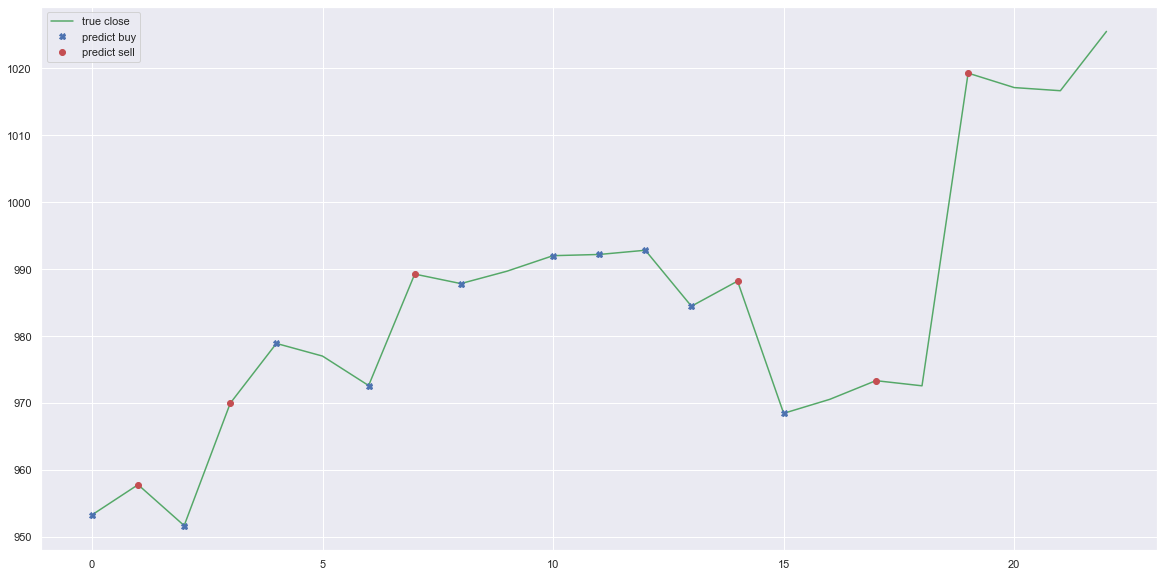

In [35]:
agent.buy()